<div style="display: flex; flex-direction: column; align-items: center; max-width: 100%; padding: 20px 0; margin: auto;">
    <img src="https://media.licdn.com/dms/image/v2/D4D3DAQFGx0XnuUvugA/image-scale_191_1128/image-scale_191_1128/0/1662458005755/nova_ims_information_management_school_cover?e=2147483647&v=beta&t=J3Q4LlZi36_4UAFhj2019QdtfXLn0kQwaX25jgaBhOQ" 
         alt="Logo" 
         style="width: 100%; max-width: 800px; height: auto; max-height: 150px; object-fit: cover; border: 3px solid hsla(120, 71.40%, 43.90%, 0.30); border-radius: 5px;">
    <div style="text-align: center; padding: 10px 0; max-width: 800px;">
        <h5 style="margin: 10px 0;">This analysis is conducted as part of the <b><i>Neural and Evolutionary Learning</i></b> course, a component of the Master's program in Data Science and Advanced Analytics at the <b><u>Nova Information Management School</u></b>.</h5>
    </div>
    <h1 style="color: hsla(120, 71.40%, 43.90%, 0.30); margin: 10px 0;"><b>Predict the Crude Protein Weight</b></h1>
</div>

<div style="text-align: center; margin: 20px 0;">
    <h3 style="margin-bottom: 15px;"><u>Group 22</u></h3>
    <table style="margin: 0 auto; border-collapse: collapse; width: 80%; max-width: 500px;">
        <thead>
            <tr>
                <th style="border-bottom: 1px solid #ddd; padding: 8px;">Student Name</th>
                <th style="border-bottom: 1px solid #ddd; padding: 8px;">Student ID</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td style="border-bottom: 1px solid #ddd; padding: 8px;">Catarina Nunes</td>
                <td style="border-bottom: 1px solid #ddd; padding: 8px;">20230083</td>
            </tr>
            <tr>
                <td style="border-bottom: 1px solid #ddd; padding: 8px;">Sofia Jacinto</td>
                <td style="border-bottom: 1px solid #ddd; padding: 8px;">20240598</td>
            </tr>
            <tr>
                <td style="padding: 8px;">José Cavaco</td>
                <td style="padding: 8px;"> 20240513</td>
            </tr>
        </tbody>
    </table>
</div>

<a id="idx"></a>
<div style="background-color: hsla(120, 71.40%, 43.90%, 0.30); padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h1 style="color: white; margin: 0;">Index</h1>
</div>

1. [Preprocessing the data](#preprocessing)
2. [Choosing the method and parameters](#method-selection)
3. [Estimating the predictive error](#error-estimation)
4. [Comparison among the algorithms using statistical analysis](#final-testing)

#### Metadata

|Feature |Definition|
|----|-----|
|wing_tag |Chicken unique ID|
|weight |The chicken total weight|
|hot_carcass_weight |The weight of the carcass immediately after slaughter|
|carcass_weight_with_head_and_legs |The weight of the carcass including the head and legs|
|cold_carcass_weight| The weight of the carcass after cooling|
|breast_weight |The weight of the breast meat of the chicken|
|thigh_weight |The weight of the thigh meat of the chicken|
|spleen |The weight of the chicken’s spleen|
|liver |The weight of the chicken’s liver|
|heart |The weight of the chicken’s heart|
|intestine |The weight of the chicken’s intestine|
|empty_muscular_stomach| Indicates the presence or absence of the empty muscular stomach of the chicken|
|glandular_stomach |The weight of the chicken’s glandular stomach|
|crude_protein| The weight of crude protein in the carcass|
|ether_extract |The weight of ether extract, which measures the total fat in the carcass|

#### Imports & Settings

In [1]:
#pip install -r requirements.txt
# pip install neat-python

In [2]:
# Standard library imports
import os
import gc
import pickle
import datetime
import random
import warnings
from collections import Counter
from itertools import product

# Third-party numerical/scientific computing
import numpy as np
import pandas as pd
import scikit_posthocs as sp
from scipy.stats import wilcoxon, friedmanchisquare

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from tqdm import tqdm
from IPython.display import display, HTML

# Machine Learning
from sklearn.datasets import fetch_openml
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, make_scorer

# Deep Learning (PyTorch)
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

# Deep Learning (TensorFlow/Keras)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import SGD, RMSprop, Adam

#NEAT
import sys
import torch
import neat
import visualize
import json
import shutil
import ast
import visualize

# Custom/local imports
from slim.main_gp import gp
from slim_gsgp.main_gsgp import gsgp
from slim_gsgp.main_slim import slim
from slim_gsgp.datasets.data_loader import *
from slim.evaluators.fitness_functions import rmse
from slim.utils.utils import train_test_split

import time

# Suppress warnings
warnings.filterwarnings('ignore')

C:\Users\catar\AppData\Local\Temp\ipykernel_6300\1535921884.py:58: DeprecationWarning: The `gsgp_slim` package is deprecated. Please use the `slim_gsgp` package instead: https://pypi.org/project/slim_gsgp/
  from slim.main_gp import gp


In [3]:
from nested_cv import nested_cv_gp_slim_gsgp

In [4]:
os.environ["PATH"] += os.pathsep + "C:\\Program Files\\Graphviz\\bin"

In [5]:
seed = 42
np.random.seed(seed)
random.seed(seed)

In [6]:
train_color = 'blue'
test_color = 'orange'

In [7]:
#! ls

#### Helpfull Functions

In [8]:
def plot_boxplots(df_clients, columns):
    """
    Plot multiple boxplots horizontally with scrolling enabled.
    """
    n_cols = len(columns)
    
    fig = make_subplots(
        rows=1,
        cols=n_cols,
        shared_yaxes=False,
        horizontal_spacing=0.05,  # space between boxplots
        subplot_titles=[col.replace("_", " ").title() for col in columns]
    )

    for idx, column in enumerate(columns, start=1):
        fig.add_trace(
            go.Box(
                y=df_clients[column],
                name=column.replace("_", " ").title(),
                boxpoints='outliers',  # only show outliers
                whiskerwidth=0.2,
                marker_color='mediumseagreen',
                line_color='seagreen',
                fillcolor='rgba(60,179,113,0.3)',
                marker_size=4
            ),
            row=1,
            col=idx
        )

    fig.update_layout(
        title='Outliers Analysis',
        title_font_size=24,
        plot_bgcolor='white',
        height=600,
        width=300 * n_cols,  # make width proportional to number of boxplots
        showlegend=False
    )

    fig.update_yaxes(zeroline=False)

    fig.show()

### <a id="preprocessing"></a> 
<div style="background-color: hsla(120, 71.40%, 43.90%, 0.30); padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h3 style="color: white; margin: 0;">Preprocessing the data</h3>
</div>

[Back to Index](#idx)

#### Data Loading

In [9]:
df = pd.read_excel(r"data\sustavianfeed.xlsx")

In [10]:
df.head()

WING TAG  WEIGHT  HOT CARCASS WEIGHT  CARCASS WEIGHT WITH HEAD AND LEGS  \
0     G403  2223.3              1429.6                             1725.6   
1     G439  2201.9              1450.2                             1769.8   
2     G454  2159.9              1398.4                             1724.9   
3     G465  2198.7              1473.9                             1800.4   
4     G428  2003.2              1291.2                             1581.6   

   COLD CARCASS WEIGHT  BREAST WEIGHT (2)  THIGH WEIGHT (2)  SPLEEN   LIVER  \
0               1394.0              214.0             489.4   3.716  38.636   
1               1405.4              236.0             538.7   3.494  34.725   
2               1461.7              241.8             512.1   4.023  31.932   
3               1425.1              227.7             549.9   3.087  32.326   
4               1260.1              224.7             473.2   3.723  30.105   

    HEART  INTESTINE EMPTY MUSCULAR STOMACH  GLANDULAR STOMACH  CRUDE PROTEIN  \
0   9.305    123.171                      /             13.170      86.105469   
1  10.084     71.800                 45.273              9.781      86.143472   
2  10.635     61.380                      /              6.217      86.416898   
3  11.927     64.879                 35.861              8.358      85.959935   
4   9.855     68.562                 36.526              7.572      81.693637   

   ETHER EXTRACT  
0           0.38  
1           1.66  
2           0.98  
3           1.10  
4           6.34

lets rename the columns according to the metadata:

In [11]:
# column name mapping
column_mapping = {
    'WING TAG': 'wing_tag',
    'WEIGHT': 'weight',
    'HOT CARCASS WEIGHT': 'hot_carcass_weight',
    'CARCASS WEIGHT WITH HEAD AND LEGS': 'carcass_weight_with_head_and_legs',
    'COLD CARCASS WEIGHT': 'cold_carcass_weight',
    'BREAST WEIGHT (2)': 'breast_weight',
    'THIGH WEIGHT (2)': 'thigh_weight',
    'SPLEEN': 'spleen',
    'LIVER': 'liver',
    'HEART': 'heart',
    'INTESTINE': 'intestine',
    'EMPTY MUSCULAR STOMACH': 'empty_muscular_stomach',
    'GLANDULAR STOMACH': 'glandular_stomach',
    'CRUDE PROTEIN': 'crude_protein',
    'ETHER EXTRACT': 'ether_extract'
}

df = df.rename(columns=column_mapping)

#### Descriptive Summary

In [12]:
df.describe().T

count         mean         std  \
weight                              96.0  2339.682292  200.943424   
hot_carcass_weight                  96.0  1521.955208  144.126939   
carcass_weight_with_head_and_legs   96.0  1833.378125  154.000550   
cold_carcass_weight                 96.0  1481.479167  142.830115   
breast_weight                       96.0   234.116667   37.818405   
thigh_weight                        96.0   542.205208   60.994468   
spleen                              96.0     4.219917    0.998836   
liver                               96.0    36.781427    5.438894   
heart                               96.0    12.059240    1.932239   
intestine                           96.0    69.149156   11.727467   
glandular_stomach                   96.0     8.184677    1.697425   
crude_protein                       96.0    87.313708    2.043895   
ether_extract                       96.0     2.090417    1.351645   

                                           min          25%          50%  \
weight                             1968.400000  2201.775000  2299.500000   
hot_carcass_weight                 1284.900000  1425.775000  1493.050000   
carcass_weight_with_head_and_legs  1554.400000  1723.800000  1809.400000   
cold_carcass_weight                1252.600000  1380.825000  1452.800000   
breast_weight                       177.100000   218.775000   231.550000   
thigh_weight                        177.800000   508.225000   538.100000   
spleen                                2.464000     3.534250     4.048000   
liver                                25.916000    33.053000    35.936000   
heart                                 8.561000    10.584250    11.679000   
intestine                            44.133000    62.274250    68.019500   
glandular_stomach                     5.425000     7.012750     7.809500   
crude_protein                        73.837184    86.544416    87.574947   
ether_extract                         0.320000     1.130000     1.710000   

                                           75%          max  
weight                             2473.800000  2890.500000  
hot_carcass_weight                 1608.400000  1929.400000  
carcass_weight_with_head_and_legs  1922.725000  2262.800000  
cold_carcass_weight                1573.700000  1891.700000  
breast_weight                       243.275000   533.200000  
thigh_weight                        573.850000   690.600000  
spleen                                4.817000     7.758000  
liver                                40.485000    53.133000  
heart                                13.449750    17.194000  
intestine                            75.103000   123.171000  
glandular_stomach                     9.016750    13.170000  
crude_protein                        88.508026    91.211353  
ether_extract                         2.527500     6.680000

In [13]:
df.describe(include='O').T

count unique   top freq
wing_tag                  96     96  G403    1
empty_muscular_stomach    96     91     /    5

In [14]:
df.isna().sum()

wing_tag                             0
weight                               0
hot_carcass_weight                   0
carcass_weight_with_head_and_legs    0
cold_carcass_weight                  0
breast_weight                        0
thigh_weight                         0
spleen                               0
liver                                0
heart                                0
intestine                            0
empty_muscular_stomach               0
glandular_stomach                    0
crude_protein                        0
ether_extract                        0
dtype: int64

- no missing values
- `wing_tag` uniquely represents each chicken so can be placed as index.

In [15]:
df.set_index('wing_tag', inplace = True)

In [16]:
df.duplicated().sum()

0

#### Data Types

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, G403 to V428
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   weight                             96 non-null     float64
 1   hot_carcass_weight                 96 non-null     float64
 2   carcass_weight_with_head_and_legs  96 non-null     float64
 3   cold_carcass_weight                96 non-null     float64
 4   breast_weight                      96 non-null     float64
 5   thigh_weight                       96 non-null     float64
 6   spleen                             96 non-null     float64
 7   liver                              96 non-null     float64
 8   heart                              96 non-null     float64
 9   intestine                          96 non-null     float64
 10  empty_muscular_stomach             96 non-null     object 
 11  glandular_stomach                  96 non-null     float64
 

In [18]:
df['empty_muscular_stomach'].unique()

array(['/', 45.273, 35.861, 36.526, 40.993, 40.949, 45.323, 42.091,
       49.148, 46.807, 31.103, 49.057, 39.621, 43.128, 53.485, 38.836,
       44.487, 47.665, 50.006, 43.695, 59.547, 61.306, 61.702, 60.063,
       45.428, 53.456, 43.586, 49.648, 63.571, 47.523, 63.86, 64.538,
       42.852, 50.119, 32.665, 35.164, 46.656, 44.855, 44.962, 51.851,
       45.507, 50.136, 43.821, 66.616, 29.712, 40.936, 52.518, 35.408,
       51.944, 41.483, 56.23, 55.663, 42.66, 32.12, 43.964, 75.767,
       45.327, 42.129, 47.964, 44.811, 32.599, 32.947, 38.155, 48.009,
       56.347, 59.583, 51.322, 58.708, 41.917, 40.425, 51.903, 56.698,
       40.7, 45.321, 55.671, 68.602, 44.006, 54.71, 45.636, 34.692,
       48.933, 45.045, 48.02, 42.632, 45.366, 52.457, 49.281, 54.021,
       42.173, 49.7, 46.816], dtype=object)

The metadata for the column `empty_muscular_stomach` specifies that it should be a binary flag, '_Indicates the presence or absence of the empty muscular stomach of the chicken_'. However, the data contains a '/' that represents 'yes' for an empty stomach, and other values that indicate that the stomach is not empty, such as percentages or grams. We will evaluate whether it is more valuable to maintain this column as a float or a binary flag, based on its correlation with the target variable. Ultimately, we plan to adhere to the guidance provided in the metadata, but lets see:

In [19]:
df['empty_muscular_stomach_bin'] = np.where(
    df['empty_muscular_stomach'] == '/', 1, 0
).astype(int)

In [20]:
df['empty_muscular_stomach_float'] = df['empty_muscular_stomach'].replace('/', 0).astype(float)

#### Outliers

In [21]:
plot_boxplots(df, df.columns)

Given the presence of outliers and the small size of the dataset, the best approach is to incorporate the Robust Scaler into the model's pipeline.

#### Correlations

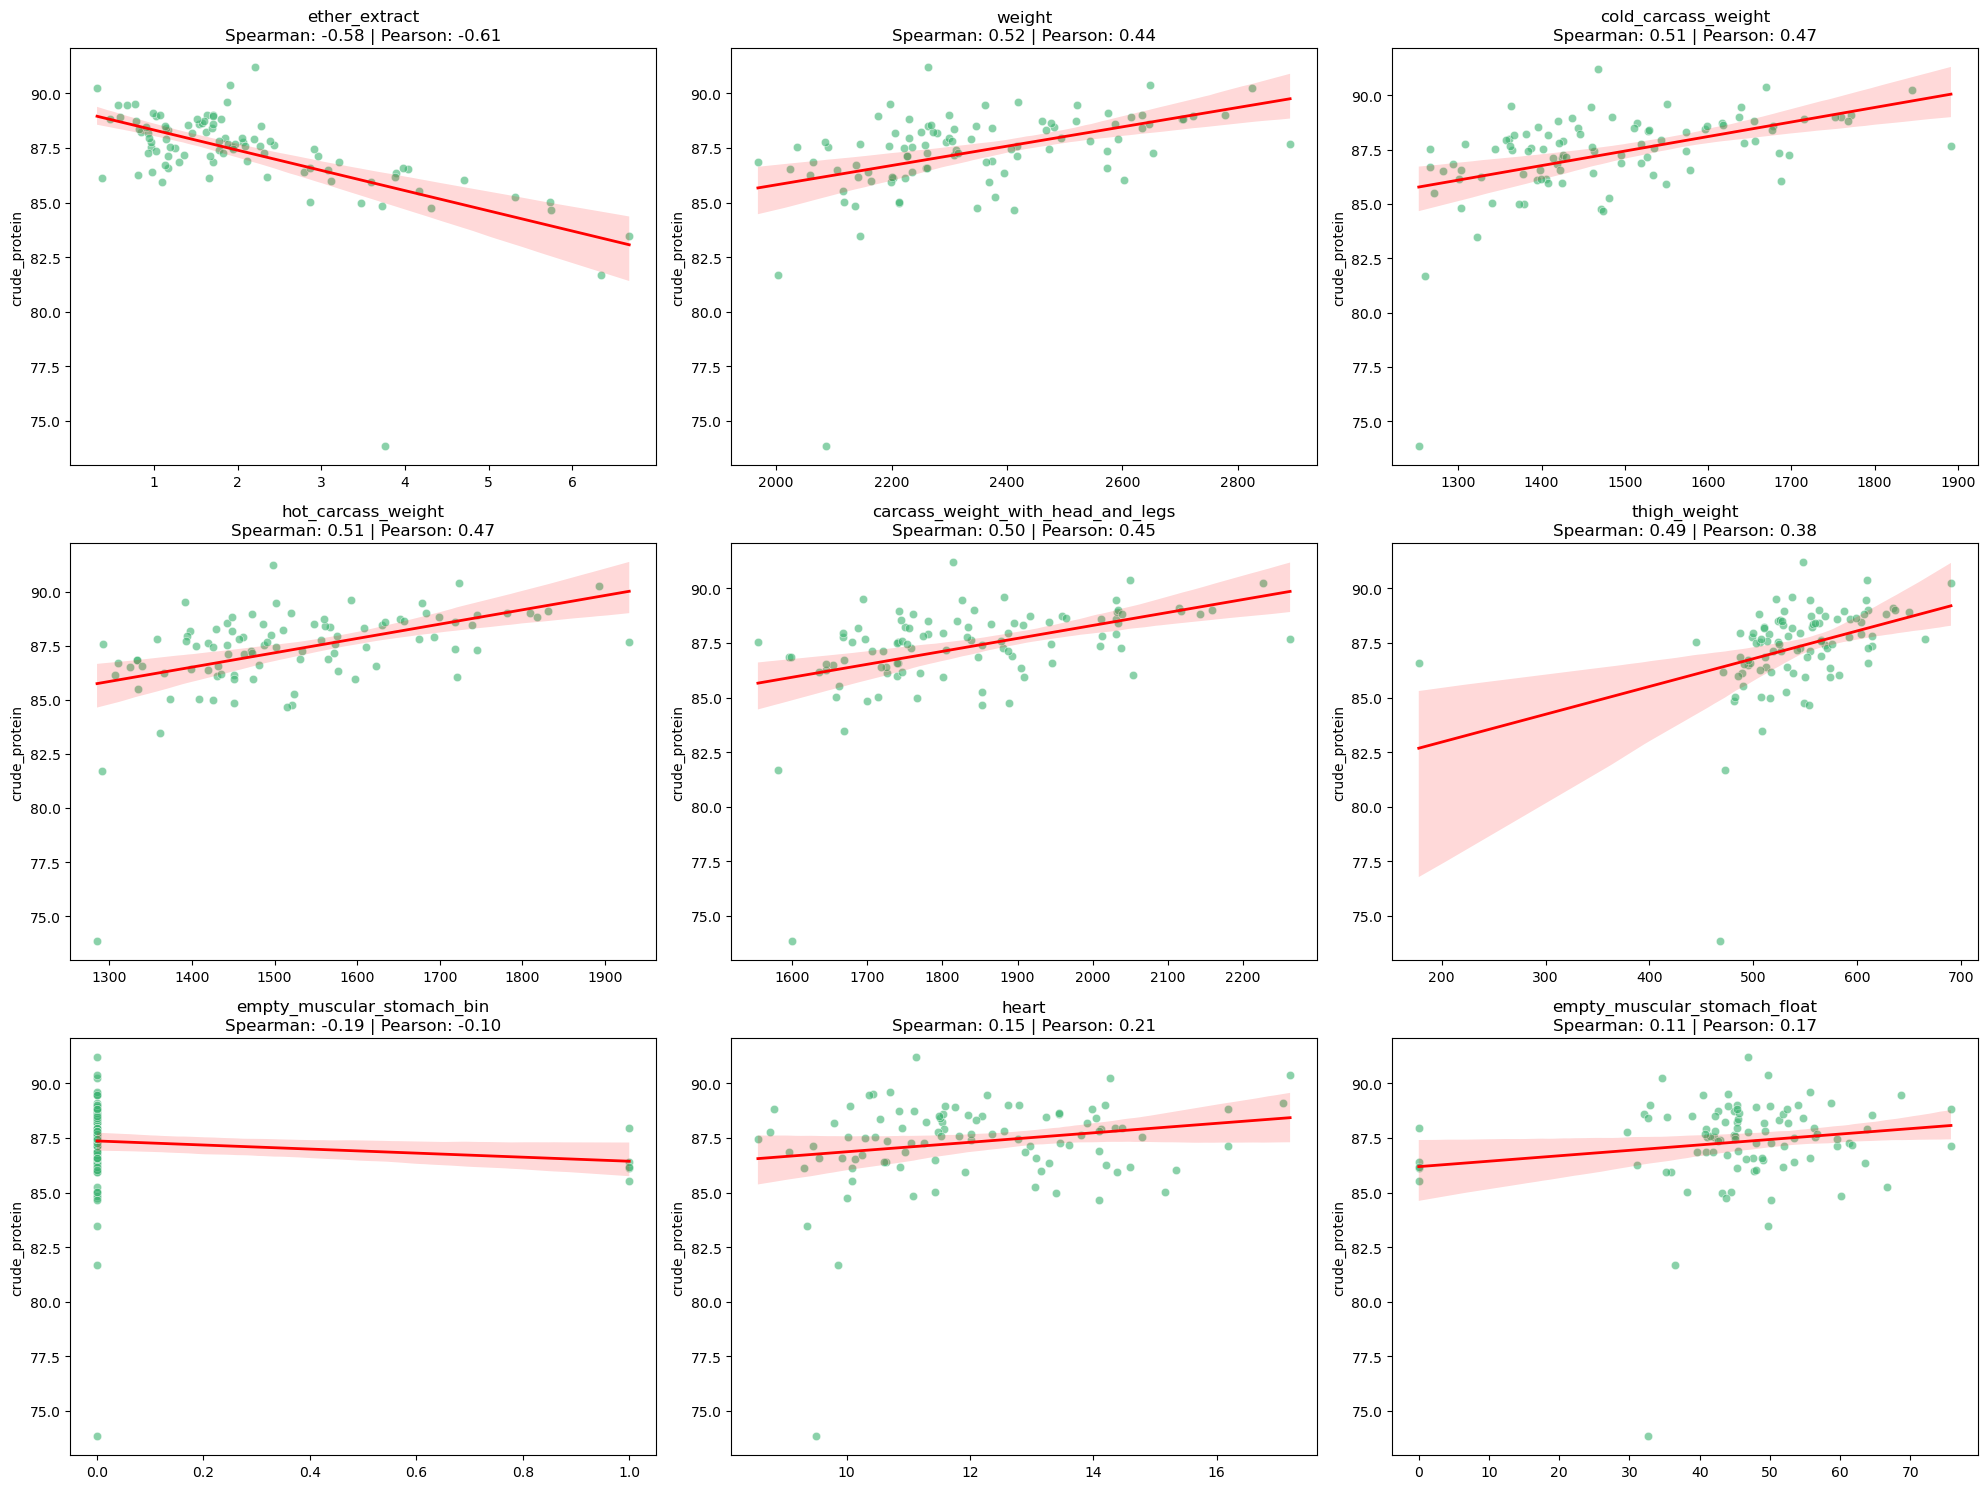

Correlations with crude_protein:


In [22]:
#code adapted from previous work

# correlations with crude_protein
target = 'crude_protein'
numeric_cols = df.select_dtypes(include=['number']).columns
features = [col for col in numeric_cols if col != target] 

# both correlation types
corr_data = df[features + [target]]  # Note: target needs to be in a list
spearman_corr = corr_data.corr(method='spearman')[target]
pearson_corr = corr_data.corr(method='pearson')[target]

# Combine into a DataFrame for easier analysis
corr_df = pd.DataFrame({
    'feature': features,
    'spearman': spearman_corr[features],
    'pearson': pearson_corr[features]
}).sort_values(by='spearman', key=abs, ascending=False)

# Set threshold (adjust as needed)
threshold = 0.15
significant_features = corr_df[(abs(corr_df['spearman']) >= threshold) | 
                             (abs(corr_df['pearson']) >= threshold)]

# Plot settings
num_features = len(significant_features)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows))
if num_features > 0:  # Only proceed if there are significant features
    if num_rows == 1:
        axes = axes.reshape(1, -1)  # Ensure axes is always 2D

    # Plot each significant feature against target
    for i, (_, row) in enumerate(significant_features.iterrows()):
        ax = axes[i//num_cols, i%num_cols]
        feature = row['feature']
        
        # Scatterplot
        sns.scatterplot(x=df[feature], y=df[target], ax=ax, color='mediumseagreen', alpha=0.6)
        
        # Regression line if possible
        if df[feature].nunique() > 1:
            try:
                sns.regplot(x=df[feature], y=df[target], ax=ax, 
                            scatter=False, color='red', line_kws={'linewidth':2})
            except:
                pass
        
        # Add correlation info to title
        ax.set_title(f"{feature}\nSpearman: {row['spearman']:.2f} | Pearson: {row['pearson']:.2f}")
        ax.set_xlabel('')
        ax.set_ylabel('crude_protein')

    # Hide empty subplots
    for j in range(i+1, num_rows*num_cols):
        fig.delaxes(axes.flatten()[j])

    plt.tight_layout()
    plt.show()

    # Show correlation table
    corr_df = corr_df.set_index('feature')
    print("Correlations with crude_protein:")
    display(corr_df.style.background_gradient(cmap='BuGn', vmin=-1, vmax=1))
else:
    print(f"No features found with correlation >= {threshold}")

When  picking features for modeling, it's crucial to give a special focus on those that have the strongest correlation with the target variable, since they tend to boost predictive performance the most.

In this scenario, features like ether_extract, weight, cold_carcass_weight, hot_carcass_weight, carcass_weight_with_head_and_legs, and thigh_weight stand out with the highest correlation to the target, making them key candidates for inclusion. 

But just because a feature has a high correlation doesn’t mean thy are useless, features that might seem less significant on their own—like heart, liver, or breast_weight—can still bring value when paired with others, especially in non-linear models or when considering interaction effects. So, while the strongest features lay a solid groundwork, it’s wise not to overlook the weaker ones too quickly without doing some additional testing in the modeling process.

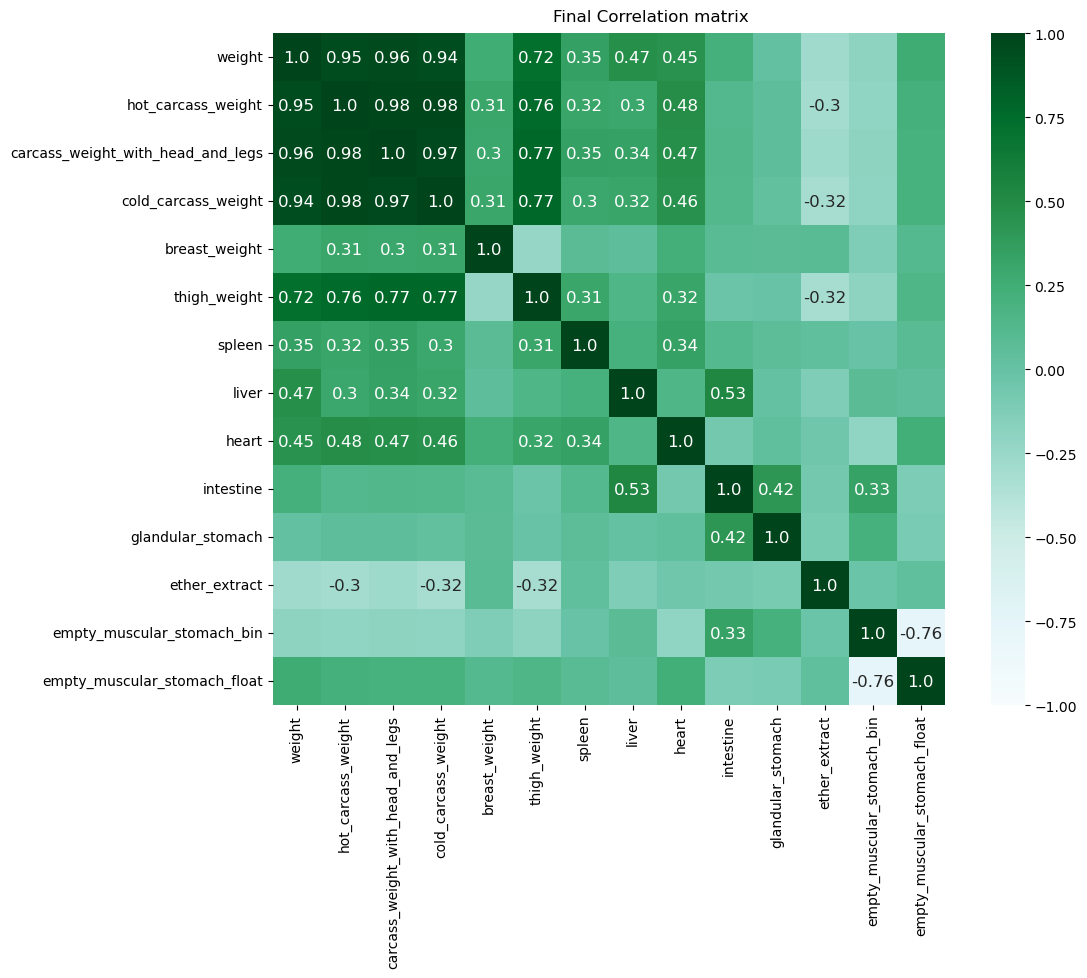

In [23]:
corr = df[features].corr().round(2)
fig = plt.figure(figsize=(12, 8))

# annotation matrix - values above |0.3| will appear in the plot
mask_annot = np.absolute(corr.values) >= 0.3
annot = np.where(mask_annot, corr.values, np.full(corr.shape, ''))
sns.heatmap(data = corr, annot = annot, cmap = 'BuGn', fmt = 's', vmin = -1, vmax = 1, center = 0, square = True, linewidths = 0, annot_kws = {'size': 12})

fig.subplots_adjust(top = 0.95)
fig.suptitle('Final Correlation matrix');

The correlation matrix reveals some strong linear relationships among various variables, which points to possible redundancy in the dataset:

- For example, weight, hot_carcass_weight, carcass_weight_with_head_and_legs, and cold_carcass_weight are all highly correlated with each other, with values ranging from 0.94 to 0.98, very high. This indicates that including all four in a model or analysis could lead to multicollinearity issues.

- So, to simplify, we might want to keep just one representative variable—like hot_carcass_weight—and leave the others out.

We are going to keep `empty_muscular_stomach_bin` since it has a better correlation witht the target.

In [24]:
df['empty_muscular_stomach'] = df['empty_muscular_stomach_bin'] 

In [25]:
df = df.drop(columns=['empty_muscular_stomach_float', 'empty_muscular_stomach_bin'])

`IMPORTANT:`the project description spcifically says "predict the crude protein weight using the remaining features in the dataset, excluding the animal ID." so we corrected the `empty_muscular_stomach` but we will not perform feature selection at this stage, basically we ll have this initial approach were we will test the models with all the features. If futher instructions state otherwise we will follow the analysis above.

In [26]:
scaler = RobustScaler()
scaled_values = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_values, columns=df.columns, index=df.index)

# Create interactive scatter plot
fig = go.Figure()

# Plot all features in light grey
for col in scaled_df.columns:
    if col != 'crude_protein':
        fig.add_trace(go.Scatter(
            x=scaled_df.index,
            y=scaled_df[col],
            mode='markers',
            marker=dict(color='lightgrey', size=6),
            name=col,
            text=[f'{col}: {val:.2f}' for val in scaled_df[col]],
            hoverinfo='text'
        ))

# Plot 'crude_protein' in green
fig.add_trace(go.Scatter(
    x=scaled_df.index,
    y=scaled_df['crude_protein'],
    mode='markers',
    marker=dict(color='green', size=7),
    name='crude_protein',
    text=[f'crude_protein: {val:.2f}' for val in scaled_df['crude_protein']],
    hoverinfo='text'
))

# Layout with scrollable x-axis
fig.update_layout(
    title='Robust Scaled Feature Values Across Index (Highlighting Crude Protein)',
    xaxis=dict(title='Index', rangeslider=dict(visible=True)),
    yaxis=dict(title='Scaled Value'),
    height=600,
    showlegend=False
)

fig.show()

We have two extreme cases that may potentially affect the results: V439 and V419. Cases like the G428 and B463 have a crude protein lower than the rest, but we can see that the variables like the ether_extract can accompany this variation. 

### <a id="method-selection"></a> 
<div style="background-color: hsla(120, 71.40%, 43.90%, 0.30); padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h3 style="color: white; margin: 0;">Choosing the method and parameters for each model</h3>
</div>

[Back to Index](#idx)

- [1. Nested cross-validation vs. Monte Carlo cross-validation](#method) 
- [2. Genetic Programming (GP)](#gp) - Delivery 1 (Done)
- [3. Geometric Semantic Geometric Programming (GSGP)](#gsgp) - Delivery 2 (Done)
- [4. Semantic Learning algorithm with Inflate and deflate Mutations (SLIM)](#slim) - Delivery 3 (Done)
- [5. Neural Network (NN)](#nn) - Delivery 4 (Done)
- [6. NeuroEvolution of Augmenting Topologies (NEAT)](#neat) - Delivery 5 (Done)
- [7. Evolving a Neural Network with Genetic Algorithm](#nn-ga) - Extra

#### <a id="method"></a> 
<div style="background-color: hsla(120, 71.40%, 43.90%, 0.30); padding: 10px; border-radius: 8px; text-align: left; margin-top: 20px; margin-bottom: 20px;">
    <h4 style="color: white; margin: 0;">1. Nested cross-validation vs. Monte Carlo cross-validatio</h4>
</div>

[Back to Index](#idx)

In this project, we opted for **nested cross-validation (nested CV)** as our dataset partitioning strategy for both model selection (hyperparameter tuning) and performance evaluation.

This decision was based on the following considerations:

1. **Final Comparative Evaluation Across Algorithms**  
   At the end of the project, _"the same partitions should be used across all the algorithms to be studied"_, we will compare Genetic Programming (GP) and Geometric Semantic Genetic Programming (GSGP) and other machine learning algorithms.  
   To ensure a **fair and unbiased comparison**, the **same dataset partitions** must be used across all algorithms (are all evaluated under the same conditions basically) - Nested CV provides a systematic and reproducible way to maintain this consistency.

2. **Separation of Concerns: Tuning vs. Evaluation**  
   Nested CV explicitly separates the hyperparameter optimization (inner loop) from the model evaluation (outer loop).  
   This avoids **information leakage** and reduces the risk of **overfitting during model selection**, which is particularly relevant for algorithms like GP that are prone to overfitting and premature convergence.
   "the advantage of doing several iterations in cross-validation is that it allows us to obtain an error estimate that is not dependent on a single data splitting and a particular choice of the training data"_ (Vanneschi & Silva, Sec. 5.3, p.130). Nested CV extends this robustness by adding an inner loop for model selection, which further reduces the risk of biased or optimistic performance estimation.

3. **Avoiding Pitfalls of Monte Carlo CV in This Context**
   Although Monte Carlo cross-validation (or repeated random subsampling) can be viewd as an alternative (Vanneschi & Silva, p.130-131), it comes with a notable limitation: _"some observations may never be selected for the test set, while others will be selected more than once"_. In this project, where a **comparative and reproducible evaluation across multiple algorithms is required**, this irregularity makes Monte Carlo CV less appropriate than nested CV.  Using a **K-Fold outer loop** (e.g., `K=10`) ensures that every instance in the dataset is used for testing exactly once, and for training K-1 times, and combined with an **inner K-Fold** (e.g., `K=5`) for tuning, this strategy enables robust **statistical comparisons** (e.g., Wilcoxon tests, Friedman + Nemenyi post-hoc), which are essential to draw valid conclusions about performance differences between models.

   The  different CV strategies may be appropriate for different phases: _"it may make sense to use 5-fold or 10-fold cross-validation for choosing the method and parameters (...) and then use Monte Carlo (...) for a thorough estimation of the error"_ (p.131).  
   However, since our pipeline includes both tuning and evaluation as part of the **same CV process**, and comparison across methods is the final goal, we apply nested CV consistently for both.

4. Despite the relatively small size of our dataset (96 instances), we argue that nested cross-validation remains a justified choice. As pointed out by Vanneschi & Silva (Section 5.3), the reliability of performance estimation is a crucial concern when data is scarce. Nested CV is particularly effective in avoiding overfitting during hyperparameter tuning, which becomes even more critical under these circumstances.

The training and test sets generated in each fold still preserve enough data to fit and evaluate meaningful models. Moreover, since the dataset is small, the computational overhead introduced by nested CV is negligible.

In summary, while some may consider using Monte Carlo cross-validation to reduce computational cost or avoid small folds, the benefits of using nested cross-validation — particularly in terms of fair model selection and unbiased generalization error estimation — outweigh the drawbacks, especially when working with limited data.


In [27]:
target = 'crude_protein'
X = df.drop(columns=[target])
y = df[target]

In [28]:
k_outer = 5
k_inner = 3
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
outer_cv = KFold(n_splits=k_outer, shuffle=True, random_state=seed)
inner_cv = KFold(n_splits=k_inner, shuffle=True, random_state=seed)

total_instances = X.shape[0]
outer_test_size = total_instances // k_outer
outer_train_size = total_instances - outer_test_size
inner_val_size = outer_train_size // k_inner
inner_train_size = outer_train_size - inner_val_size

print(f'Total Instances:\t{total_instances}\n--')
print(f'Outer Train set:\t{outer_train_size}')
print(f'Test set:\t\t{outer_test_size}\n--')
print(f'Inner Train set:\t{inner_train_size}')
print(f'Validation set:\t\t{inner_val_size}\n')

Total Instances:	96
--
Outer Train set:	77
Test set:		19
--
Inner Train set:	52
Validation set:		25



- Dataset size: 96 samples -> GP can overfit easily on small data if trees get too big or the population too complex

In [29]:
# ===================== Nested CV Generator =====================
def nested_cv_generator(X, y, k_outer=10, k_inner=3, random_state=42):
    """ https://machinelearningmastery.com/nested-cross-validation-for-machine-learning-with-python/"""
    outer_cv = KFold(n_splits=k_outer, shuffle=True, random_state=random_state)
    for outer_train_idx, outer_test_idx in outer_cv.split(X):
        X_outer_train = X.iloc[outer_train_idx].reset_index(drop=True)
        y_outer_train = y.iloc[outer_train_idx].reset_index(drop=True)
        X_test = X.iloc[outer_test_idx].reset_index(drop=True)
        y_test = y.iloc[outer_test_idx].reset_index(drop=True)

        inner_cv = KFold(n_splits=k_inner, shuffle=True, random_state=random_state)
        inner_splits = list(inner_cv.split(X_outer_train))

        yield {
            'X_outer_train': X_outer_train,
            'y_outer_train': y_outer_train,
            'X_test': X_test,
            'y_test': y_test,
            'inner_splits': inner_splits,
        }

In [30]:
# ========== Safe Inverse Transform ========== #
def safe_inverse_transform(scaler, y):
    if y.ndim == 1:
        y = y.reshape(-1, 1)
    return scaler.inverse_transform(y).flatten()

#### <a id="gp"></a> 
<div style="background-color: hsla(120, 71.40%, 43.90%, 0.30); padding: 10px; border-radius: 8px; text-align: left; margin-top: 20px; margin-bottom: 20px;">
    <h4 style="color: white; margin: 0;">2. Genetic Programming (GP)</h4>
</div>

[Back to Index](#idx)

| **Parameter**        | **Test Values**                                | **Why ??**                                                                                             |
| -------------------- | ----------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------- |
| `init_depth`         | `[3, 4]`                                              | Smaller initial trees (shallow depth) reduce the risk of overfitting early on. With 96 entries, you want simplicity and better generalization.  |
| `max_depth`          | `[10]`                                             | Limits the model's complexity. Deep trees overfit easily on small datasets. Capping depth avoids bloated or overly specific programs.           |
| `tree_constants`     | `[random.uniform(0, 1) for _ in range(9)] + [-1.]`    | Constants allow models to fine-tune predictions. Using a limited, balanced range prevents excessive reliance on constants (avoids "bloat").     |
| `p_constants`        | `[0.1, 0.5]`                                          | High constant probability makes the tree more about constants than structure. This is dangerous for small data — prefer 10–20% range.           |
| `tree_functions`     | `['add', 'subtract', 'multiply', 'divide']` | Basic arithmetic gives expressive power. `protected_divide` avoids runtime errors. Don’t add too many functions — it increases search space.    |
| `pop_size`           | `[20, 30, 50]`                                        | Small datasets don’t need huge populations. Lower sizes = faster runs and still enough diversity. 20–50 is a good starting point.               |
| `p_xo`               | `[0.7, 0.9]`                                          | Crossover (recombination) promotes diversity and generalization. On small data, too much crossover (close to 1.0) might disrupt good solutions. |
| `initializer`        | `"grow", "rhh"`                                       | `grow` creates variable-sized trees. `rhh` mixes it with `full`, adding diversity. `full` alone — it tends to create deep, overfit trees. |
| `elitism`            | `[True]`                                              | Keep the best solution in each generation. With few samples, losing the best-performing individual can seriously hurt performance.              |
| `n_iter`             | `30`                                                  | Reasonable trade-off between computation and convergence. Too many iterations with small data can lead to overfitting.                          |


In [31]:
TREE_CONSTANTS = [random.uniform(0, 1) for _ in range(9)] + [-1.]
param_grid = {
    'initializer': ['grow', 'rhh'],
    'sspace.p_constants': [0.1, 0.5], 
    'sspace.max_init_depth': [3, 4],
    'sspace.max_depth': [10],
    'sspace.tree_constants': [TREE_CONSTANTS],
    'pop_size': [30, 50],
    'xo_prob': [0.7, 0.9],
    'generations': [30],
}

# Seeds to test
seeds = [42, 123, 456]  # You can change these to any seeds you prefer

# Store results from all seeds
all_scores = []
all_best_models = []
all_results = []
all_validation = []

for seed in seeds:
    print(f"\n=== Running with seed: {seed} ===\n")
    
    # Set random seeds for reproducibility
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    
    # Run the experiment
    scores, best_models, df_results, val_results = nested_cv_gp_slim_gsgp(
        X=X, y=y,
        param_grid=param_grid,
        gp_class=gp,
        k_outer=5, k_inner=3,
        seed=seed
    )
    
    # Store results
    all_scores.append(scores)
    all_best_models.append(best_models)
    all_results.append(df_results)
    all_validation.append(val_results)


=== Running with seed: 42 ===


========== OUTER FOLD 1/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:16,  1.92it/s]

  Config 1/32 | Inner Mean RMSE: 1.8603


Grid Search:   6%|▋         | 2/32 [00:01<00:17,  1.70it/s]

  Config 2/32 | Inner Mean RMSE: 1.9002


Grid Search:   9%|▉         | 3/32 [00:02<00:20,  1.41it/s]

  Config 3/32 | Inner Mean RMSE: 1.6543


Grid Search:  12%|█▎        | 4/32 [00:02<00:17,  1.64it/s]

  Config 4/32 | Inner Mean RMSE: 1.9240


Grid Search:  16%|█▌        | 5/32 [00:03<00:16,  1.67it/s]

  Config 5/32 | Inner Mean RMSE: 2.3164


Grid Search:  19%|█▉        | 6/32 [00:03<00:13,  1.99it/s]

  Config 6/32 | Inner Mean RMSE: 1.9600


Grid Search:  22%|██▏       | 7/32 [00:04<00:19,  1.26it/s]

  Config 7/32 | Inner Mean RMSE: 1.9821


Grid Search:  25%|██▌       | 8/32 [00:05<00:17,  1.36it/s]

  Config 8/32 | Inner Mean RMSE: 1.8741


Grid Search:  28%|██▊       | 9/32 [00:05<00:14,  1.61it/s]

  Config 9/32 | Inner Mean RMSE: 1.8833


Grid Search:  31%|███▏      | 10/32 [00:06<00:11,  1.92it/s]

  Config 10/32 | Inner Mean RMSE: 1.9641


Grid Search:  34%|███▍      | 11/32 [00:06<00:12,  1.72it/s]

  Config 11/32 | Inner Mean RMSE: 1.6543


Grid Search:  38%|███▊      | 12/32 [00:07<00:10,  1.87it/s]

  Config 12/32 | Inner Mean RMSE: 1.8572


Grid Search:  41%|████      | 13/32 [00:07<00:09,  1.96it/s]

  Config 13/32 | Inner Mean RMSE: 1.8379


Grid Search:  44%|████▍     | 14/32 [00:07<00:08,  2.23it/s]

  Config 14/32 | Inner Mean RMSE: 1.9468


Grid Search:  47%|████▋     | 15/32 [00:08<00:08,  1.91it/s]

  Config 15/32 | Inner Mean RMSE: 1.8021


Grid Search:  50%|█████     | 16/32 [00:09<00:08,  1.95it/s]

  Config 16/32 | Inner Mean RMSE: 2.2070


Grid Search:  53%|█████▎    | 17/32 [00:09<00:07,  2.09it/s]

  Config 17/32 | Inner Mean RMSE: 2.0864


Grid Search:  56%|█████▋    | 18/32 [00:09<00:05,  2.39it/s]

  Config 18/32 | Inner Mean RMSE: 1.9380


Grid Search:  59%|█████▉    | 19/32 [00:10<00:08,  1.62it/s]

  Config 19/32 | Inner Mean RMSE: 2.7775


Grid Search:  62%|██████▎   | 20/32 [00:11<00:07,  1.69it/s]

  Config 20/32 | Inner Mean RMSE: 2.0365


Grid Search:  66%|██████▌   | 21/32 [00:11<00:05,  1.85it/s]

  Config 21/32 | Inner Mean RMSE: 1.8281


Grid Search:  69%|██████▉   | 22/32 [00:12<00:04,  2.05it/s]

  Config 22/32 | Inner Mean RMSE: 1.9162


Grid Search:  72%|███████▏  | 23/32 [00:13<00:05,  1.60it/s]

  Config 23/32 | Inner Mean RMSE: 2.1900


Grid Search:  75%|███████▌  | 24/32 [00:14<00:05,  1.43it/s]

  Config 24/32 | Inner Mean RMSE: 1.7471


Grid Search:  78%|███████▊  | 25/32 [00:14<00:04,  1.65it/s]

  Config 25/32 | Inner Mean RMSE: 1.5752


Grid Search:  81%|████████▏ | 26/32 [00:14<00:03,  1.97it/s]

  Config 26/32 | Inner Mean RMSE: 1.9157


Grid Search:  84%|████████▍ | 27/32 [00:15<00:02,  1.75it/s]

  Config 27/32 | Inner Mean RMSE: 1.8288


Grid Search:  88%|████████▊ | 28/32 [00:15<00:02,  1.84it/s]

  Config 28/32 | Inner Mean RMSE: 1.8741


Grid Search:  91%|█████████ | 29/32 [00:16<00:01,  1.97it/s]

  Config 29/32 | Inner Mean RMSE: 1.7942


Grid Search:  94%|█████████▍| 30/32 [00:16<00:01,  1.81it/s]

  Config 30/32 | Inner Mean RMSE: 1.9329


Grid Search:  97%|█████████▋| 31/32 [00:17<00:00,  1.46it/s]

  Config 31/32 | Inner Mean RMSE: 1.9842


Grid Search: 100%|██████████| 32/32 [00:18<00:00,  1.73it/s]

  Config 32/32 | Inner Mean RMSE: 1.9584

✅ Best config for outer fold 1:
{'initializer': 'rhh', 'sspace': {'p_constants': 0.5, 'max_init_depth': 3, 'tree_constants': [0.6394267984578837, 0.025010755222666936, 0.27502931836911926, 0.22321073814882275, 0.7364712141640124, 0.6766994874229113, 0.8921795677048454, 0.08693883262941615, 0.4219218196852704, -1.0]}, 'pop_size': 30, 'generations': 30, 'seed': 42, 'max_depth': 10, 'xo_prob': 0.7}
Best inner RMSE: 1.5752

Statistical test on inner fold scores:
Friedman test statistic: 25.0774, p-value: 0.7642
No significant differences found between configs.



[Outer Fold 1] Test RMSE: 1.7715

========== OUTER FOLD 2/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:14,  2.13it/s]

  Config 1/32 | Inner Mean RMSE: 2.4449


Grid Search:   6%|▋         | 2/32 [00:00<00:10,  2.83it/s]

  Config 2/32 | Inner Mean RMSE: 2.1495


Grid Search:   9%|▉         | 3/32 [00:01<00:16,  1.75it/s]

  Config 3/32 | Inner Mean RMSE: 2.7868


Grid Search:  12%|█▎        | 4/32 [00:02<00:15,  1.80it/s]

  Config 4/32 | Inner Mean RMSE: 4.5620


Grid Search:  16%|█▌        | 5/32 [00:02<00:14,  1.84it/s]

  Config 5/32 | Inner Mean RMSE: 20.7927


Grid Search:  19%|█▉        | 6/32 [00:02<00:12,  2.08it/s]

  Config 6/32 | Inner Mean RMSE: 3.6853


Grid Search:  22%|██▏       | 7/32 [00:04<00:19,  1.31it/s]

  Config 7/32 | Inner Mean RMSE: 2.3638


Grid Search:  25%|██▌       | 8/32 [00:05<00:23,  1.04it/s]

  Config 8/32 | Inner Mean RMSE: 2.7274


Grid Search:  28%|██▊       | 9/32 [00:06<00:18,  1.22it/s]

  Config 9/32 | Inner Mean RMSE: 1.9642


Grid Search:  31%|███▏      | 10/32 [00:06<00:14,  1.55it/s]

  Config 10/32 | Inner Mean RMSE: 2.0309


Grid Search:  34%|███▍      | 11/32 [00:07<00:12,  1.62it/s]

  Config 11/32 | Inner Mean RMSE: 1.5639


Grid Search:  38%|███▊      | 12/32 [00:07<00:11,  1.78it/s]

  Config 12/32 | Inner Mean RMSE: 1.8370


Grid Search:  44%|████▍     | 14/32 [00:08<00:07,  2.37it/s]

  Config 13/32 | Inner Mean RMSE: 2.3751
Error in config 13: Expected 2D array, got scalar array instead:
array=-0.09704440832138062.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.


Grid Search:  47%|████▋     | 15/32 [00:08<00:08,  2.03it/s]

  Config 15/32 | Inner Mean RMSE: 8.3293


Grid Search:  50%|█████     | 16/32 [00:09<00:08,  1.99it/s]

  Config 16/32 | Inner Mean RMSE: 2.1452


Grid Search:  53%|█████▎    | 17/32 [00:09<00:07,  2.07it/s]

  Config 17/32 | Inner Mean RMSE: 5.1416


Grid Search:  56%|█████▋    | 18/32 [00:09<00:05,  2.43it/s]

  Config 18/32 | Inner Mean RMSE: 2.1538


Grid Search:  59%|█████▉    | 19/32 [00:10<00:07,  1.69it/s]

  Config 19/32 | Inner Mean RMSE: 2.9573


Grid Search:  62%|██████▎   | 20/32 [00:11<00:06,  1.81it/s]

  Config 20/32 | Inner Mean RMSE: 4.6060


Grid Search:  66%|██████▌   | 21/32 [00:11<00:06,  1.82it/s]

  Config 21/32 | Inner Mean RMSE: 2.0593


Grid Search:  69%|██████▉   | 22/32 [00:12<00:04,  2.13it/s]

  Config 22/32 | Inner Mean RMSE: 2.7208


Grid Search:  72%|███████▏  | 23/32 [00:13<00:05,  1.71it/s]

  Config 23/32 | Inner Mean RMSE: 2.0500


Grid Search:  75%|███████▌  | 24/32 [00:13<00:05,  1.52it/s]

  Config 24/32 | Inner Mean RMSE: 3.2252


Grid Search:  78%|███████▊  | 25/32 [00:14<00:04,  1.75it/s]

  Config 25/32 | Inner Mean RMSE: 2.2846


Grid Search:  81%|████████▏ | 26/32 [00:14<00:02,  2.09it/s]

  Config 26/32 | Inner Mean RMSE: 1.9767


Grid Search:  84%|████████▍ | 27/32 [00:15<00:03,  1.56it/s]

  Config 27/32 | Inner Mean RMSE: 1.7251


Grid Search:  88%|████████▊ | 28/32 [00:16<00:02,  1.69it/s]

  Config 28/32 | Inner Mean RMSE: 105.6324


Grid Search:  91%|█████████ | 29/32 [00:16<00:01,  1.81it/s]

  Config 29/32 | Inner Mean RMSE: 1.9732


Grid Search:  94%|█████████▍| 30/32 [00:16<00:00,  2.10it/s]

  Config 30/32 | Inner Mean RMSE: 2.1771


Grid Search:  97%|█████████▋| 31/32 [00:17<00:00,  1.81it/s]

  Config 31/32 | Inner Mean RMSE: 5.6477


Grid Search: 100%|██████████| 32/32 [00:18<00:00,  1.76it/s]

  Config 32/32 | Inner Mean RMSE: 2.8153

✅ Best config for outer fold 2:
{'initializer': 'grow', 'sspace': {'p_constants': 0.5, 'max_init_depth': 3, 'tree_constants': [0.6394267984578837, 0.025010755222666936, 0.27502931836911926, 0.22321073814882275, 0.7364712141640124, 0.6766994874229113, 0.8921795677048454, 0.08693883262941615, 0.4219218196852704, -1.0]}, 'pop_size': 50, 'generations': 30, 'seed': 42, 'max_depth': 10, 'xo_prob': 0.7}
Best inner RMSE: 1.5639

Statistical test on inner fold scores:
Friedman test statistic: 24.7582, p-value: 0.7367
No significant differences found between configs.



[Outer Fold 2] Test RMSE: 1.3470

========== OUTER FOLD 3/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:20,  1.48it/s]

  Config 1/32 | Inner Mean RMSE: 1.5275


Grid Search:   6%|▋         | 2/32 [00:00<00:13,  2.16it/s]

  Config 2/32 | Inner Mean RMSE: 1.4602


Grid Search:   9%|▉         | 3/32 [00:01<00:17,  1.64it/s]

  Config 3/32 | Inner Mean RMSE: 1.4165


Grid Search:  12%|█▎        | 4/32 [00:02<00:17,  1.60it/s]

  Config 4/32 | Inner Mean RMSE: 1.2539


Grid Search:  16%|█▌        | 5/32 [00:03<00:18,  1.49it/s]

  Config 5/32 | Inner Mean RMSE: 1.8917


Grid Search:  19%|█▉        | 6/32 [00:03<00:14,  1.85it/s]

  Config 6/32 | Inner Mean RMSE: 1.4432


Grid Search:  22%|██▏       | 7/32 [00:04<00:19,  1.27it/s]

  Config 7/32 | Inner Mean RMSE: 6.6620


Grid Search:  25%|██▌       | 8/32 [00:05<00:22,  1.07it/s]

  Config 8/32 | Inner Mean RMSE: 1.6251


Grid Search:  28%|██▊       | 9/32 [00:06<00:17,  1.32it/s]

  Config 9/32 | Inner Mean RMSE: 1.5057


Grid Search:  31%|███▏      | 10/32 [00:06<00:13,  1.65it/s]

  Config 10/32 | Inner Mean RMSE: 1.3665


Grid Search:  34%|███▍      | 11/32 [00:07<00:12,  1.62it/s]

  Config 11/32 | Inner Mean RMSE: 1.3426


Grid Search:  38%|███▊      | 12/32 [00:07<00:11,  1.82it/s]

  Config 12/32 | Inner Mean RMSE: 1.3878


Grid Search:  41%|████      | 13/32 [00:08<00:09,  1.92it/s]

  Config 13/32 | Inner Mean RMSE: 1.1492


Grid Search:  44%|████▍     | 14/32 [00:08<00:08,  2.10it/s]

  Config 14/32 | Inner Mean RMSE: 1.4272


Grid Search:  47%|████▋     | 15/32 [00:09<00:09,  1.80it/s]

  Config 15/32 | Inner Mean RMSE: 1.1574


Grid Search:  50%|█████     | 16/32 [00:09<00:08,  1.83it/s]

  Config 16/32 | Inner Mean RMSE: 1.4017


Grid Search:  53%|█████▎    | 17/32 [00:10<00:08,  1.82it/s]

  Config 17/32 | Inner Mean RMSE: 1.5673


Grid Search:  56%|█████▋    | 18/32 [00:10<00:06,  2.09it/s]

  Config 18/32 | Inner Mean RMSE: 1.3182


Grid Search:  59%|█████▉    | 19/32 [00:12<00:10,  1.18it/s]

  Config 19/32 | Inner Mean RMSE: 1.1345


Grid Search:  62%|██████▎   | 20/32 [00:13<00:09,  1.24it/s]

  Config 20/32 | Inner Mean RMSE: 1.7336


Grid Search:  66%|██████▌   | 21/32 [00:13<00:08,  1.36it/s]

  Config 21/32 | Inner Mean RMSE: 1.4062


Grid Search:  69%|██████▉   | 22/32 [00:13<00:06,  1.65it/s]

  Config 22/32 | Inner Mean RMSE: 1.2800


Grid Search:  72%|███████▏  | 23/32 [00:14<00:06,  1.48it/s]

  Config 23/32 | Inner Mean RMSE: 1.3829


Grid Search:  75%|███████▌  | 24/32 [00:15<00:05,  1.52it/s]

  Config 24/32 | Inner Mean RMSE: 1.3742


Grid Search:  78%|███████▊  | 25/32 [00:15<00:04,  1.67it/s]

  Config 25/32 | Inner Mean RMSE: 1.3418


Grid Search:  81%|████████▏ | 26/32 [00:16<00:03,  1.97it/s]

  Config 26/32 | Inner Mean RMSE: 1.6519


Grid Search:  84%|████████▍ | 27/32 [00:17<00:03,  1.49it/s]

  Config 27/32 | Inner Mean RMSE: 1.1806


Grid Search:  88%|████████▊ | 28/32 [00:17<00:02,  1.56it/s]

  Config 28/32 | Inner Mean RMSE: 1.4268


Grid Search:  91%|█████████ | 29/32 [00:18<00:01,  1.70it/s]

  Config 29/32 | Inner Mean RMSE: 1.3657


Grid Search:  94%|█████████▍| 30/32 [00:18<00:01,  1.85it/s]

  Config 30/32 | Inner Mean RMSE: 1.3530


Grid Search:  97%|█████████▋| 31/32 [00:19<00:00,  1.81it/s]

  Config 31/32 | Inner Mean RMSE: 1.1679


Grid Search: 100%|██████████| 32/32 [00:19<00:00,  1.62it/s]

  Config 32/32 | Inner Mean RMSE: 1.2953

✅ Best config for outer fold 3:
{'initializer': 'rhh', 'sspace': {'p_constants': 0.1, 'max_init_depth': 3, 'tree_constants': [0.6394267984578837, 0.025010755222666936, 0.27502931836911926, 0.22321073814882275, 0.7364712141640124, 0.6766994874229113, 0.8921795677048454, 0.08693883262941615, 0.4219218196852704, -1.0]}, 'pop_size': 50, 'generations': 30, 'seed': 42, 'max_depth': 10, 'xo_prob': 0.7}
Best inner RMSE: 1.1345

Statistical test on inner fold scores:
Friedman test statistic: 39.5486, p-value: 0.1395
No significant differences found between configs.



[Outer Fold 3] Test RMSE: 2.9472

========== OUTER FOLD 4/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:12,  2.47it/s]

  Config 1/32 | Inner Mean RMSE: 1.9025


Grid Search:   6%|▋         | 2/32 [00:00<00:10,  2.89it/s]

  Config 2/32 | Inner Mean RMSE: 1.8661


Grid Search:   9%|▉         | 3/32 [00:01<00:19,  1.49it/s]

  Config 3/32 | Inner Mean RMSE: 2.7425


Grid Search:  12%|█▎        | 4/32 [00:02<00:18,  1.51it/s]

  Config 4/32 | Inner Mean RMSE: 2.6416


Grid Search:  16%|█▌        | 5/32 [00:02<00:15,  1.71it/s]

  Config 5/32 | Inner Mean RMSE: 1.9946


Grid Search:  19%|█▉        | 6/32 [00:03<00:12,  2.12it/s]

  Config 6/32 | Inner Mean RMSE: 52.0197


Grid Search:  22%|██▏       | 7/32 [00:04<00:20,  1.22it/s]

Error in config 6: Expected 2D array, got scalar array instead:
array=-0.15570831298828125.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.


Grid Search:  25%|██▌       | 8/32 [00:05<00:18,  1.33it/s]

  Config 8/32 | Inner Mean RMSE: 1.8448


Grid Search:  28%|██▊       | 9/32 [00:05<00:14,  1.55it/s]

  Config 9/32 | Inner Mean RMSE: 1.7806


Grid Search:  31%|███▏      | 10/32 [00:05<00:11,  1.90it/s]

  Config 10/32 | Inner Mean RMSE: 2.1789


Grid Search:  34%|███▍      | 11/32 [00:06<00:11,  1.78it/s]

  Config 11/32 | Inner Mean RMSE: 1.7512


Grid Search:  38%|███▊      | 12/32 [00:07<00:10,  1.88it/s]

  Config 12/32 | Inner Mean RMSE: 1.8843


Grid Search:  41%|████      | 13/32 [00:07<00:09,  1.94it/s]

  Config 13/32 | Inner Mean RMSE: 1.7212


Grid Search:  44%|████▍     | 14/32 [00:07<00:08,  2.19it/s]

  Config 14/32 | Inner Mean RMSE: 1.8811


Grid Search:  47%|████▋     | 15/32 [00:08<00:11,  1.54it/s]

  Config 15/32 | Inner Mean RMSE: 1.6653


Grid Search:  50%|█████     | 16/32 [00:09<00:09,  1.70it/s]

  Config 16/32 | Inner Mean RMSE: 2.1378


Grid Search:  53%|█████▎    | 17/32 [00:09<00:08,  1.79it/s]

  Config 17/32 | Inner Mean RMSE: 1.6213


Grid Search:  56%|█████▋    | 18/32 [00:10<00:06,  2.13it/s]

  Config 18/32 | Inner Mean RMSE: 1.8660


Grid Search:  59%|█████▉    | 19/32 [00:11<00:08,  1.49it/s]

  Config 19/32 | Inner Mean RMSE: 3.6887


Grid Search:  62%|██████▎   | 20/32 [00:11<00:07,  1.67it/s]

  Config 20/32 | Inner Mean RMSE: 2.1806


Grid Search:  66%|██████▌   | 21/32 [00:12<00:06,  1.72it/s]

  Config 21/32 | Inner Mean RMSE: 1.9786


Grid Search:  69%|██████▉   | 22/32 [00:12<00:05,  1.83it/s]

  Config 22/32 | Inner Mean RMSE: 1.9605


Grid Search:  72%|███████▏  | 23/32 [00:13<00:06,  1.44it/s]

  Config 23/32 | Inner Mean RMSE: 3.2369


Grid Search:  75%|███████▌  | 24/32 [00:14<00:05,  1.44it/s]

  Config 24/32 | Inner Mean RMSE: 1.9079


Grid Search:  78%|███████▊  | 25/32 [00:14<00:04,  1.56it/s]

  Config 25/32 | Inner Mean RMSE: 2.2457


Grid Search:  81%|████████▏ | 26/32 [00:15<00:03,  1.86it/s]

  Config 26/32 | Inner Mean RMSE: 1.7762


Grid Search:  84%|████████▍ | 27/32 [00:16<00:03,  1.64it/s]

  Config 27/32 | Inner Mean RMSE: 2.0540


Grid Search:  88%|████████▊ | 28/32 [00:16<00:02,  1.79it/s]

  Config 28/32 | Inner Mean RMSE: 1.9496


Grid Search:  91%|█████████ | 29/32 [00:17<00:01,  1.78it/s]

  Config 29/32 | Inner Mean RMSE: 2.0327


Grid Search:  94%|█████████▍| 30/32 [00:17<00:00,  2.08it/s]

  Config 30/32 | Inner Mean RMSE: 2.0695


Grid Search:  97%|█████████▋| 31/32 [00:18<00:00,  1.84it/s]

  Config 31/32 | Inner Mean RMSE: 2.1329


Grid Search: 100%|██████████| 32/32 [00:18<00:00,  1.73it/s]

  Config 32/32 | Inner Mean RMSE: 2.1762

✅ Best config for outer fold 4:
{'initializer': 'rhh', 'sspace': {'p_constants': 0.1, 'max_init_depth': 3, 'tree_constants': [0.6394267984578837, 0.025010755222666936, 0.27502931836911926, 0.22321073814882275, 0.7364712141640124, 0.6766994874229113, 0.8921795677048454, 0.08693883262941615, 0.4219218196852704, -1.0]}, 'pop_size': 30, 'generations': 30, 'seed': 42, 'max_depth': 10, 'xo_prob': 0.7}
Best inner RMSE: 1.6213

Statistical test on inner fold scores:
Friedman test statistic: 33.9502, p-value: 0.2828
No significant differences found between configs.



[Outer Fold 4] Test RMSE: 1.4551

========== OUTER FOLD 5/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:12,  2.45it/s]

  Config 1/32 | Inner Mean RMSE: 2.7003


Grid Search:   6%|▋         | 2/32 [00:00<00:11,  2.64it/s]

  Config 2/32 | Inner Mean RMSE: 2.3417


Grid Search:   9%|▉         | 3/32 [00:01<00:18,  1.61it/s]

  Config 3/32 | Inner Mean RMSE: 1.9921


Grid Search:  12%|█▎        | 4/32 [00:02<00:18,  1.47it/s]

  Config 4/32 | Inner Mean RMSE: 2.1500


Grid Search:  16%|█▌        | 5/32 [00:03<00:17,  1.55it/s]

  Config 5/32 | Inner Mean RMSE: 2.1230


Grid Search:  19%|█▉        | 6/32 [00:03<00:16,  1.59it/s]

  Config 6/32 | Inner Mean RMSE: 2.1590


Grid Search:  22%|██▏       | 7/32 [00:04<00:20,  1.23it/s]

  Config 7/32 | Inner Mean RMSE: 1.7292


Grid Search:  25%|██▌       | 8/32 [00:05<00:20,  1.17it/s]

  Config 8/32 | Inner Mean RMSE: 1.5881


Grid Search:  28%|██▊       | 9/32 [00:06<00:17,  1.33it/s]

  Config 9/32 | Inner Mean RMSE: 1.9583


Grid Search:  31%|███▏      | 10/32 [00:06<00:13,  1.65it/s]

  Config 10/32 | Inner Mean RMSE: 2.0107


Grid Search:  34%|███▍      | 11/32 [00:07<00:12,  1.62it/s]

  Config 11/32 | Inner Mean RMSE: 1.8527


Grid Search:  38%|███▊      | 12/32 [00:07<00:12,  1.60it/s]

  Config 12/32 | Inner Mean RMSE: 1.8939


Grid Search:  41%|████      | 13/32 [00:08<00:10,  1.77it/s]

  Config 13/32 | Inner Mean RMSE: 2.1035


Grid Search:  44%|████▍     | 14/32 [00:08<00:08,  2.06it/s]

  Config 14/32 | Inner Mean RMSE: 2.1424


Grid Search:  47%|████▋     | 15/32 [00:09<00:09,  1.70it/s]

  Config 15/32 | Inner Mean RMSE: 1.9438


Grid Search:  50%|█████     | 16/32 [00:09<00:08,  1.78it/s]

  Config 16/32 | Inner Mean RMSE: 1.9603


Grid Search:  53%|█████▎    | 17/32 [00:10<00:07,  1.88it/s]

  Config 17/32 | Inner Mean RMSE: 1.7089


Grid Search:  56%|█████▋    | 18/32 [00:10<00:06,  2.23it/s]

  Config 18/32 | Inner Mean RMSE: 1.9991


Grid Search:  59%|█████▉    | 19/32 [00:11<00:09,  1.38it/s]

  Config 19/32 | Inner Mean RMSE: 1.8493


Grid Search:  62%|██████▎   | 20/32 [00:12<00:07,  1.58it/s]

  Config 20/32 | Inner Mean RMSE: 2.3363


Grid Search:  66%|██████▌   | 21/32 [00:13<00:07,  1.47it/s]

  Config 21/32 | Inner Mean RMSE: 2.7977


Grid Search:  69%|██████▉   | 22/32 [00:13<00:05,  1.77it/s]

  Config 22/32 | Inner Mean RMSE: 2.0556


Grid Search:  72%|███████▏  | 23/32 [00:14<00:06,  1.38it/s]

  Config 23/32 | Inner Mean RMSE: 1.9596


Grid Search:  75%|███████▌  | 24/32 [00:15<00:05,  1.38it/s]

  Config 24/32 | Inner Mean RMSE: 2.4689


Grid Search:  78%|███████▊  | 25/32 [00:15<00:04,  1.61it/s]

  Config 25/32 | Inner Mean RMSE: 1.7792


Grid Search:  81%|████████▏ | 26/32 [00:15<00:03,  1.95it/s]

  Config 26/32 | Inner Mean RMSE: 2.1828


Grid Search:  84%|████████▍ | 27/32 [00:16<00:03,  1.60it/s]

  Config 27/32 | Inner Mean RMSE: 2.2725


Grid Search:  88%|████████▊ | 28/32 [00:17<00:02,  1.76it/s]

  Config 28/32 | Inner Mean RMSE: 2.0826


Grid Search:  91%|█████████ | 29/32 [00:17<00:01,  1.80it/s]

  Config 29/32 | Inner Mean RMSE: 2.0315


Grid Search:  94%|█████████▍| 30/32 [00:18<00:01,  1.98it/s]

  Config 30/32 | Inner Mean RMSE: 2.1617


Grid Search:  97%|█████████▋| 31/32 [00:19<00:00,  1.44it/s]

  Config 31/32 | Inner Mean RMSE: 1.9357


Grid Search: 100%|██████████| 32/32 [00:19<00:00,  1.60it/s]

  Config 32/32 | Inner Mean RMSE: 2.2474

✅ Best config for outer fold 5:
{'initializer': 'grow', 'sspace': {'p_constants': 0.1, 'max_init_depth': 4, 'tree_constants': [0.6394267984578837, 0.025010755222666936, 0.27502931836911926, 0.22321073814882275, 0.7364712141640124, 0.6766994874229113, 0.8921795677048454, 0.08693883262941615, 0.4219218196852704, -1.0]}, 'pop_size': 50, 'generations': 30, 'seed': 42, 'max_depth': 10, 'xo_prob': 0.9}
Best inner RMSE: 1.5881

Statistical test on inner fold scores:
Friedman test statistic: 37.2712, p-value: 0.2028
No significant differences found between configs.



[Outer Fold 5] Test RMSE: 0.8870

=== Running with seed: 123 ===


========== OUTER FOLD 1/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:12,  2.54it/s]

  Config 1/32 | Inner Mean RMSE: 1.5922


Grid Search:   6%|▋         | 2/32 [00:00<00:11,  2.66it/s]

  Config 2/32 | Inner Mean RMSE: 1.6724


Grid Search:   9%|▉         | 3/32 [00:02<00:22,  1.28it/s]

  Config 3/32 | Inner Mean RMSE: 1.2057


Grid Search:  12%|█▎        | 4/32 [00:02<00:19,  1.41it/s]

  Config 4/32 | Inner Mean RMSE: 1.7295


Grid Search:  16%|█▌        | 5/32 [00:02<00:15,  1.70it/s]

  Config 5/32 | Inner Mean RMSE: 1.2146


Grid Search:  19%|█▉        | 6/32 [00:03<00:13,  1.93it/s]

  Config 6/32 | Inner Mean RMSE: 1.2404


Grid Search:  22%|██▏       | 7/32 [00:04<00:15,  1.60it/s]

  Config 7/32 | Inner Mean RMSE: 1.1549


Grid Search:  25%|██▌       | 8/32 [00:04<00:14,  1.69it/s]

  Config 8/32 | Inner Mean RMSE: 1.2981


Grid Search:  28%|██▊       | 9/32 [00:05<00:12,  1.85it/s]

  Config 9/32 | Inner Mean RMSE: 1.1833


Grid Search:  31%|███▏      | 10/32 [00:05<00:10,  2.19it/s]

  Config 10/32 | Inner Mean RMSE: 1.1839


Grid Search:  34%|███▍      | 11/32 [00:06<00:11,  1.82it/s]

  Config 11/32 | Inner Mean RMSE: 1.3651


Grid Search:  38%|███▊      | 12/32 [00:06<00:10,  1.93it/s]

  Config 12/32 | Inner Mean RMSE: 1.2379


Grid Search:  41%|████      | 13/32 [00:07<00:09,  1.93it/s]

  Config 13/32 | Inner Mean RMSE: 1.4954


Grid Search:  44%|████▍     | 14/32 [00:07<00:08,  2.17it/s]

  Config 14/32 | Inner Mean RMSE: 1.2547


Grid Search:  47%|████▋     | 15/32 [00:08<00:08,  1.93it/s]

  Config 15/32 | Inner Mean RMSE: 1.2652


Grid Search:  50%|█████     | 16/32 [00:08<00:08,  1.82it/s]

  Config 16/32 | Inner Mean RMSE: 1.2470


Grid Search:  53%|█████▎    | 17/32 [00:09<00:07,  2.01it/s]

  Config 17/32 | Inner Mean RMSE: 1.2446


Grid Search:  56%|█████▋    | 18/32 [00:09<00:05,  2.34it/s]

  Config 18/32 | Inner Mean RMSE: 1.2760


Grid Search:  59%|█████▉    | 19/32 [00:10<00:07,  1.71it/s]

  Config 19/32 | Inner Mean RMSE: 1.1427


Grid Search:  62%|██████▎   | 20/32 [00:10<00:06,  1.86it/s]

  Config 20/32 | Inner Mean RMSE: 1.1810


Grid Search:  66%|██████▌   | 21/32 [00:11<00:05,  1.98it/s]

  Config 21/32 | Inner Mean RMSE: 1.0335


Grid Search:  69%|██████▉   | 22/32 [00:11<00:04,  2.22it/s]

  Config 22/32 | Inner Mean RMSE: 1.2101


Grid Search:  72%|███████▏  | 23/32 [00:12<00:04,  1.98it/s]

  Config 23/32 | Inner Mean RMSE: 1.2546


Grid Search:  75%|███████▌  | 24/32 [00:12<00:03,  2.09it/s]

  Config 24/32 | Inner Mean RMSE: 1.3447


Grid Search:  78%|███████▊  | 25/32 [00:12<00:03,  2.21it/s]

  Config 25/32 | Inner Mean RMSE: 1.1659


Grid Search:  81%|████████▏ | 26/32 [00:13<00:02,  2.46it/s]

  Config 26/32 | Inner Mean RMSE: 1.2656


Grid Search:  84%|████████▍ | 27/32 [00:14<00:02,  1.80it/s]

  Config 27/32 | Inner Mean RMSE: 1.7274


Grid Search:  88%|████████▊ | 28/32 [00:14<00:02,  1.84it/s]

  Config 28/32 | Inner Mean RMSE: 1.2705


Grid Search:  91%|█████████ | 29/32 [00:15<00:01,  1.80it/s]

  Config 29/32 | Inner Mean RMSE: 1.1241


Grid Search:  94%|█████████▍| 30/32 [00:15<00:01,  1.90it/s]

  Config 30/32 | Inner Mean RMSE: 1.2950


Grid Search:  97%|█████████▋| 31/32 [00:16<00:00,  1.70it/s]

  Config 31/32 | Inner Mean RMSE: 1.2015


Grid Search: 100%|██████████| 32/32 [00:16<00:00,  1.89it/s]

  Config 32/32 | Inner Mean RMSE: 1.2612

✅ Best config for outer fold 1:
{'initializer': 'rhh', 'sspace': {'p_constants': 0.1, 'max_init_depth': 4, 'tree_constants': [0.6394267984578837, 0.025010755222666936, 0.27502931836911926, 0.22321073814882275, 0.7364712141640124, 0.6766994874229113, 0.8921795677048454, 0.08693883262941615, 0.4219218196852704, -1.0]}, 'pop_size': 30, 'generations': 30, 'seed': 123, 'max_depth': 10, 'xo_prob': 0.7}
Best inner RMSE: 1.0335

Statistical test on inner fold scores:
Friedman test statistic: 32.1410, p-value: 0.4099
No significant differences found between configs.



[Outer Fold 1] Test RMSE: 3.0527

========== OUTER FOLD 2/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:11,  2.69it/s]

  Config 1/32 | Inner Mean RMSE: 2.2790


Grid Search:   6%|▋         | 2/32 [00:00<00:10,  2.90it/s]

  Config 2/32 | Inner Mean RMSE: 2.4191


Grid Search:   9%|▉         | 3/32 [00:01<00:19,  1.46it/s]

  Config 3/32 | Inner Mean RMSE: 1.7263


Grid Search:  12%|█▎        | 4/32 [00:03<00:25,  1.12it/s]

  Config 4/32 | Inner Mean RMSE: 1.9717


Grid Search:  16%|█▌        | 5/32 [00:03<00:19,  1.41it/s]

  Config 5/32 | Inner Mean RMSE: 1.7559


Grid Search:  19%|█▉        | 6/32 [00:03<00:14,  1.78it/s]

  Config 6/32 | Inner Mean RMSE: 2.1650


Grid Search:  22%|██▏       | 7/32 [00:04<00:16,  1.50it/s]

  Config 7/32 | Inner Mean RMSE: 1.7344


Grid Search:  25%|██▌       | 8/32 [00:04<00:14,  1.67it/s]

  Config 8/32 | Inner Mean RMSE: 1.8725


Grid Search:  28%|██▊       | 9/32 [00:05<00:13,  1.70it/s]

  Config 9/32 | Inner Mean RMSE: 1.6265


Grid Search:  31%|███▏      | 10/32 [00:05<00:11,  1.97it/s]

  Config 10/32 | Inner Mean RMSE: 1.8392


Grid Search:  34%|███▍      | 11/32 [00:06<00:12,  1.67it/s]

  Config 11/32 | Inner Mean RMSE: 1.9441


Grid Search:  38%|███▊      | 12/32 [00:07<00:11,  1.78it/s]

  Config 12/32 | Inner Mean RMSE: 1.5772


Grid Search:  41%|████      | 13/32 [00:07<00:10,  1.86it/s]

  Config 13/32 | Inner Mean RMSE: 1.9202


Grid Search:  44%|████▍     | 14/32 [00:08<00:08,  2.06it/s]

  Config 14/32 | Inner Mean RMSE: 1.7471


Grid Search:  47%|████▋     | 15/32 [00:09<00:11,  1.42it/s]

  Config 15/32 | Inner Mean RMSE: 1.6344


Grid Search:  50%|█████     | 16/32 [00:10<00:11,  1.34it/s]

  Config 16/32 | Inner Mean RMSE: 1.6891


Grid Search:  53%|█████▎    | 17/32 [00:10<00:10,  1.49it/s]

  Config 17/32 | Inner Mean RMSE: 1.7001


Grid Search:  56%|█████▋    | 18/32 [00:10<00:07,  1.78it/s]

  Config 18/32 | Inner Mean RMSE: 1.7383


Grid Search:  59%|█████▉    | 19/32 [00:11<00:09,  1.44it/s]

  Config 19/32 | Inner Mean RMSE: 1.8750


Grid Search:  62%|██████▎   | 20/32 [00:12<00:08,  1.50it/s]

  Config 20/32 | Inner Mean RMSE: 2.0596


Grid Search:  66%|██████▌   | 21/32 [00:12<00:06,  1.63it/s]

  Config 21/32 | Inner Mean RMSE: 1.6010


Grid Search:  69%|██████▉   | 22/32 [00:13<00:05,  1.94it/s]

  Config 22/32 | Inner Mean RMSE: 1.8599


Grid Search:  72%|███████▏  | 23/32 [00:14<00:05,  1.51it/s]

  Config 23/32 | Inner Mean RMSE: 2.0661


Grid Search:  75%|███████▌  | 24/32 [00:14<00:04,  1.64it/s]

  Config 24/32 | Inner Mean RMSE: 2.1696


Grid Search:  78%|███████▊  | 25/32 [00:15<00:03,  1.85it/s]

  Config 25/32 | Inner Mean RMSE: 2.0329


Grid Search:  81%|████████▏ | 26/32 [00:15<00:02,  2.17it/s]

  Config 26/32 | Inner Mean RMSE: 1.8004


Grid Search:  84%|████████▍ | 27/32 [00:16<00:02,  1.81it/s]

  Config 27/32 | Inner Mean RMSE: 1.6083


Grid Search:  88%|████████▊ | 28/32 [00:16<00:02,  1.87it/s]

  Config 28/32 | Inner Mean RMSE: 1.7524


Grid Search:  91%|█████████ | 29/32 [00:17<00:01,  1.96it/s]

  Config 29/32 | Inner Mean RMSE: 1.7977


Grid Search:  94%|█████████▍| 30/32 [00:17<00:00,  2.15it/s]

  Config 30/32 | Inner Mean RMSE: 2.3022


Grid Search:  97%|█████████▋| 31/32 [00:18<00:00,  1.58it/s]

  Config 31/32 | Inner Mean RMSE: 1.6818


Grid Search: 100%|██████████| 32/32 [00:18<00:00,  1.69it/s]

  Config 32/32 | Inner Mean RMSE: 1.8950

✅ Best config for outer fold 2:
{'initializer': 'grow', 'sspace': {'p_constants': 0.5, 'max_init_depth': 3, 'tree_constants': [0.6394267984578837, 0.025010755222666936, 0.27502931836911926, 0.22321073814882275, 0.7364712141640124, 0.6766994874229113, 0.8921795677048454, 0.08693883262941615, 0.4219218196852704, -1.0]}, 'pop_size': 50, 'generations': 30, 'seed': 123, 'max_depth': 10, 'xo_prob': 0.9}
Best inner RMSE: 1.5772

Statistical test on inner fold scores:
Friedman test statistic: 34.7218, p-value: 0.2950
No significant differences found between configs.



[Outer Fold 2] Test RMSE: 0.9787

========== OUTER FOLD 3/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:21,  1.44it/s]

  Config 1/32 | Inner Mean RMSE: 2.4249


Grid Search:   6%|▋         | 2/32 [00:00<00:13,  2.25it/s]

  Config 2/32 | Inner Mean RMSE: 1.8140


Grid Search:   9%|▉         | 3/32 [00:02<00:20,  1.38it/s]

  Config 3/32 | Inner Mean RMSE: 1.6938


Grid Search:  12%|█▎        | 4/32 [00:02<00:22,  1.22it/s]

  Config 4/32 | Inner Mean RMSE: 2.2741


Grid Search:  16%|█▌        | 5/32 [00:03<00:18,  1.47it/s]

  Config 5/32 | Inner Mean RMSE: 1.9399


Grid Search:  19%|█▉        | 6/32 [00:03<00:14,  1.74it/s]

  Config 6/32 | Inner Mean RMSE: 2.0272


Grid Search:  22%|██▏       | 7/32 [00:04<00:17,  1.46it/s]

  Config 7/32 | Inner Mean RMSE: 2.4643


Grid Search:  25%|██▌       | 8/32 [00:05<00:14,  1.61it/s]

  Config 8/32 | Inner Mean RMSE: 2.3481


Grid Search:  28%|██▊       | 9/32 [00:05<00:12,  1.88it/s]

  Config 9/32 | Inner Mean RMSE: 1.7699


Grid Search:  31%|███▏      | 10/32 [00:05<00:09,  2.21it/s]

  Config 10/32 | Inner Mean RMSE: 1.9758


Grid Search:  34%|███▍      | 11/32 [00:06<00:12,  1.63it/s]

  Config 11/32 | Inner Mean RMSE: 1.6590


Grid Search:  38%|███▊      | 12/32 [00:07<00:11,  1.73it/s]

  Config 12/32 | Inner Mean RMSE: 1.8581


Grid Search:  41%|████      | 13/32 [00:07<00:11,  1.70it/s]

  Config 13/32 | Inner Mean RMSE: 7.2929


Grid Search:  44%|████▍     | 14/32 [00:08<00:09,  1.90it/s]

  Config 14/32 | Inner Mean RMSE: 1.7929


Grid Search:  47%|████▋     | 15/32 [00:09<00:11,  1.45it/s]

  Config 15/32 | Inner Mean RMSE: 9.0478


Grid Search:  50%|█████     | 16/32 [00:09<00:10,  1.59it/s]

  Config 16/32 | Inner Mean RMSE: 2.0292


Grid Search:  53%|█████▎    | 17/32 [00:10<00:08,  1.69it/s]

  Config 17/32 | Inner Mean RMSE: 1.9051


Grid Search:  56%|█████▋    | 18/32 [00:10<00:07,  1.87it/s]

  Config 18/32 | Inner Mean RMSE: 1.9298


Grid Search:  59%|█████▉    | 19/32 [00:11<00:08,  1.59it/s]

  Config 19/32 | Inner Mean RMSE: 1.9355


Grid Search:  62%|██████▎   | 20/32 [00:12<00:06,  1.76it/s]

  Config 20/32 | Inner Mean RMSE: 1.9289


Grid Search:  66%|██████▌   | 21/32 [00:12<00:06,  1.76it/s]

  Config 21/32 | Inner Mean RMSE: 2.6259


Grid Search:  69%|██████▉   | 22/32 [00:12<00:04,  2.03it/s]

  Config 22/32 | Inner Mean RMSE: 2.4491


Grid Search:  72%|███████▏  | 23/32 [00:14<00:06,  1.45it/s]

  Config 23/32 | Inner Mean RMSE: 2.0884


Grid Search:  75%|███████▌  | 24/32 [00:14<00:05,  1.39it/s]

  Config 24/32 | Inner Mean RMSE: 1.7411


Grid Search:  78%|███████▊  | 25/32 [00:15<00:04,  1.47it/s]

  Config 25/32 | Inner Mean RMSE: 2.2371


Grid Search:  81%|████████▏ | 26/32 [00:15<00:03,  1.77it/s]

  Config 26/32 | Inner Mean RMSE: 1.8090


Grid Search:  84%|████████▍ | 27/32 [00:16<00:03,  1.45it/s]

  Config 27/32 | Inner Mean RMSE: 1.7203


Grid Search:  88%|████████▊ | 28/32 [00:17<00:02,  1.41it/s]

  Config 28/32 | Inner Mean RMSE: 2.2946


Grid Search:  91%|█████████ | 29/32 [00:18<00:02,  1.42it/s]

  Config 29/32 | Inner Mean RMSE: 1.5899


Grid Search:  94%|█████████▍| 30/32 [00:18<00:01,  1.45it/s]

  Config 30/32 | Inner Mean RMSE: 1.7972


Grid Search:  97%|█████████▋| 31/32 [00:20<00:00,  1.13it/s]

  Config 31/32 | Inner Mean RMSE: 3.0574


Grid Search: 100%|██████████| 32/32 [00:20<00:00,  1.54it/s]

  Config 32/32 | Inner Mean RMSE: 1.8877

✅ Best config for outer fold 3:
{'initializer': 'rhh', 'sspace': {'p_constants': 0.5, 'max_init_depth': 4, 'tree_constants': [0.6394267984578837, 0.025010755222666936, 0.27502931836911926, 0.22321073814882275, 0.7364712141640124, 0.6766994874229113, 0.8921795677048454, 0.08693883262941615, 0.4219218196852704, -1.0]}, 'pop_size': 30, 'generations': 30, 'seed': 123, 'max_depth': 10, 'xo_prob': 0.7}
Best inner RMSE: 1.5899

Statistical test on inner fold scores:
Friedman test statistic: 26.2378, p-value: 0.7099
No significant differences found between configs.



[Outer Fold 3] Test RMSE: 1.3429

========== OUTER FOLD 4/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:17,  1.82it/s]

  Config 1/32 | Inner Mean RMSE: 2.1231


Grid Search:   6%|▋         | 2/32 [00:00<00:11,  2.52it/s]

  Config 2/32 | Inner Mean RMSE: 2.3653


Grid Search:   9%|▉         | 3/32 [00:02<00:23,  1.25it/s]

  Config 3/32 | Inner Mean RMSE: 1.7560


Grid Search:  12%|█▎        | 4/32 [00:03<00:25,  1.09it/s]

  Config 4/32 | Inner Mean RMSE: 1.6375


Grid Search:  16%|█▌        | 5/32 [00:03<00:20,  1.34it/s]

  Config 5/32 | Inner Mean RMSE: 1.9689


Grid Search:  19%|█▉        | 6/32 [00:04<00:16,  1.61it/s]

  Config 6/32 | Inner Mean RMSE: 1.8905


Grid Search:  22%|██▏       | 7/32 [00:05<00:18,  1.33it/s]

  Config 7/32 | Inner Mean RMSE: 1.6998


Grid Search:  25%|██▌       | 8/32 [00:05<00:15,  1.53it/s]

  Config 8/32 | Inner Mean RMSE: 1.7923


Grid Search:  28%|██▊       | 9/32 [00:05<00:13,  1.66it/s]

  Config 9/32 | Inner Mean RMSE: 1.8820


Grid Search:  31%|███▏      | 10/32 [00:06<00:11,  1.97it/s]

  Config 10/32 | Inner Mean RMSE: 1.8994


Grid Search:  34%|███▍      | 11/32 [00:07<00:12,  1.67it/s]

  Config 11/32 | Inner Mean RMSE: 1.9310


Grid Search:  38%|███▊      | 12/32 [00:07<00:11,  1.79it/s]

  Config 12/32 | Inner Mean RMSE: 1.7814


Grid Search:  41%|████      | 13/32 [00:07<00:09,  1.97it/s]

  Config 13/32 | Inner Mean RMSE: 1.7900


Grid Search:  44%|████▍     | 14/32 [00:08<00:08,  2.21it/s]

  Config 14/32 | Inner Mean RMSE: 1.8553


Grid Search:  47%|████▋     | 15/32 [00:09<00:09,  1.79it/s]

  Config 15/32 | Inner Mean RMSE: 1.5540


Grid Search:  50%|█████     | 16/32 [00:09<00:09,  1.73it/s]

  Config 16/32 | Inner Mean RMSE: 1.6174


Grid Search:  53%|█████▎    | 17/32 [00:10<00:08,  1.81it/s]

  Config 17/32 | Inner Mean RMSE: 1.6609


Grid Search:  56%|█████▋    | 18/32 [00:10<00:07,  1.98it/s]

  Config 18/32 | Inner Mean RMSE: 2.3490


Grid Search:  59%|█████▉    | 19/32 [00:11<00:07,  1.70it/s]

  Config 19/32 | Inner Mean RMSE: 2.0546


Grid Search:  62%|██████▎   | 20/32 [00:11<00:06,  1.78it/s]

  Config 20/32 | Inner Mean RMSE: 2.2630


Grid Search:  66%|██████▌   | 21/32 [00:12<00:06,  1.70it/s]

  Config 21/32 | Inner Mean RMSE: 2.2521


Grid Search:  69%|██████▉   | 22/32 [00:13<00:05,  1.74it/s]

  Config 22/32 | Inner Mean RMSE: 1.7821


Grid Search:  72%|███████▏  | 23/32 [00:14<00:06,  1.33it/s]

  Config 23/32 | Inner Mean RMSE: 3.0840


Grid Search:  75%|███████▌  | 24/32 [00:14<00:05,  1.43it/s]

  Config 24/32 | Inner Mean RMSE: 2.6186


Grid Search:  78%|███████▊  | 25/32 [00:15<00:04,  1.56it/s]

  Config 25/32 | Inner Mean RMSE: 1.6177


Grid Search:  81%|████████▏ | 26/32 [00:15<00:03,  1.77it/s]

  Config 26/32 | Inner Mean RMSE: 1.8062


Grid Search:  84%|████████▍ | 27/32 [00:16<00:03,  1.56it/s]

  Config 27/32 | Inner Mean RMSE: 1.9011


Grid Search:  88%|████████▊ | 28/32 [00:17<00:02,  1.64it/s]

  Config 28/32 | Inner Mean RMSE: 2.1527


Grid Search:  91%|█████████ | 29/32 [00:17<00:01,  1.77it/s]

  Config 29/32 | Inner Mean RMSE: 2.1468


Grid Search:  94%|█████████▍| 30/32 [00:18<00:01,  1.65it/s]

  Config 30/32 | Inner Mean RMSE: 2.2496


Grid Search:  97%|█████████▋| 31/32 [00:19<00:00,  1.50it/s]

  Config 31/32 | Inner Mean RMSE: 2.1556


Grid Search: 100%|██████████| 32/32 [00:19<00:00,  1.63it/s]

  Config 32/32 | Inner Mean RMSE: 1.5479

✅ Best config for outer fold 4:
{'initializer': 'rhh', 'sspace': {'p_constants': 0.5, 'max_init_depth': 4, 'tree_constants': [0.6394267984578837, 0.025010755222666936, 0.27502931836911926, 0.22321073814882275, 0.7364712141640124, 0.6766994874229113, 0.8921795677048454, 0.08693883262941615, 0.4219218196852704, -1.0]}, 'pop_size': 50, 'generations': 30, 'seed': 123, 'max_depth': 10, 'xo_prob': 0.9}
Best inner RMSE: 1.5479

Statistical test on inner fold scores:
Friedman test statistic: 35.4584, p-value: 0.2660
No significant differences found between configs.



[Outer Fold 4] Test RMSE: 1.1211

========== OUTER FOLD 5/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:15,  2.03it/s]

  Config 1/32 | Inner Mean RMSE: 2.6126


Grid Search:   6%|▋         | 2/32 [00:00<00:11,  2.67it/s]

  Config 2/32 | Inner Mean RMSE: 2.2511


Grid Search:   9%|▉         | 3/32 [00:02<00:33,  1.15s/it]

  Config 3/32 | Inner Mean RMSE: 1.9030


Grid Search:  12%|█▎        | 4/32 [00:03<00:27,  1.00it/s]

  Config 4/32 | Inner Mean RMSE: 1.7107


Grid Search:  16%|█▌        | 5/32 [00:04<00:21,  1.27it/s]

  Config 5/32 | Inner Mean RMSE: 1.6724


Grid Search:  19%|█▉        | 6/32 [00:04<00:17,  1.50it/s]

  Config 6/32 | Inner Mean RMSE: 1.6351


Grid Search:  22%|██▏       | 7/32 [00:05<00:17,  1.39it/s]

  Config 7/32 | Inner Mean RMSE: 1.6849


Grid Search:  25%|██▌       | 8/32 [00:05<00:15,  1.56it/s]

  Config 8/32 | Inner Mean RMSE: 1.5753


Grid Search:  28%|██▊       | 9/32 [00:06<00:13,  1.73it/s]

  Config 9/32 | Inner Mean RMSE: 1.9768


Grid Search:  31%|███▏      | 10/32 [00:06<00:10,  2.06it/s]

  Config 10/32 | Inner Mean RMSE: 2.1299


Grid Search:  34%|███▍      | 11/32 [00:07<00:11,  1.77it/s]

  Config 11/32 | Inner Mean RMSE: 1.5205


Grid Search:  38%|███▊      | 12/32 [00:07<00:10,  1.89it/s]

  Config 12/32 | Inner Mean RMSE: 1.4930


Grid Search:  41%|████      | 13/32 [00:08<00:09,  2.09it/s]

  Config 13/32 | Inner Mean RMSE: 2.5862


Grid Search:  44%|████▍     | 14/32 [00:08<00:07,  2.33it/s]

  Config 14/32 | Inner Mean RMSE: 1.8977


Grid Search:  47%|████▋     | 15/32 [00:09<00:08,  1.97it/s]

  Config 15/32 | Inner Mean RMSE: 1.4864


Grid Search:  50%|█████     | 16/32 [00:09<00:08,  1.94it/s]

  Config 16/32 | Inner Mean RMSE: 1.8582


Grid Search:  53%|█████▎    | 17/32 [00:10<00:07,  1.93it/s]

  Config 17/32 | Inner Mean RMSE: 1.8510


Grid Search:  56%|█████▋    | 18/32 [00:10<00:06,  2.03it/s]

  Config 18/32 | Inner Mean RMSE: 41.8252


Grid Search:  59%|█████▉    | 19/32 [00:11<00:07,  1.81it/s]

  Config 19/32 | Inner Mean RMSE: 4.5261


Grid Search:  62%|██████▎   | 20/32 [00:11<00:06,  1.90it/s]

  Config 20/32 | Inner Mean RMSE: 2.1564


Grid Search:  66%|██████▌   | 21/32 [00:12<00:05,  2.05it/s]

  Config 21/32 | Inner Mean RMSE: 1.7762


Grid Search:  69%|██████▉   | 22/32 [00:12<00:04,  2.30it/s]

  Config 22/32 | Inner Mean RMSE: 2.0167


Grid Search:  72%|███████▏  | 23/32 [00:13<00:05,  1.80it/s]

  Config 23/32 | Inner Mean RMSE: 1.7741


Grid Search:  75%|███████▌  | 24/32 [00:13<00:04,  1.74it/s]

  Config 24/32 | Inner Mean RMSE: 1.6144


Grid Search:  78%|███████▊  | 25/32 [00:14<00:03,  1.76it/s]

  Config 25/32 | Inner Mean RMSE: 1.5845


Grid Search:  81%|████████▏ | 26/32 [00:14<00:03,  1.98it/s]

  Config 26/32 | Inner Mean RMSE: 1.8563


Grid Search:  84%|████████▍ | 27/32 [00:15<00:03,  1.46it/s]

  Config 27/32 | Inner Mean RMSE: 2.1163


Grid Search:  88%|████████▊ | 28/32 [00:16<00:02,  1.61it/s]

  Config 28/32 | Inner Mean RMSE: 2.1703


Grid Search:  91%|█████████ | 29/32 [00:16<00:01,  1.69it/s]

  Config 29/32 | Inner Mean RMSE: 1.6807


Grid Search:  94%|█████████▍| 30/32 [00:17<00:01,  1.93it/s]

  Config 30/32 | Inner Mean RMSE: 1.7936


Grid Search:  97%|█████████▋| 31/32 [00:18<00:00,  1.56it/s]

  Config 31/32 | Inner Mean RMSE: 1.7512


Grid Search: 100%|██████████| 32/32 [00:18<00:00,  1.71it/s]

  Config 32/32 | Inner Mean RMSE: 1.9263

✅ Best config for outer fold 5:
{'initializer': 'grow', 'sspace': {'p_constants': 0.5, 'max_init_depth': 4, 'tree_constants': [0.6394267984578837, 0.025010755222666936, 0.27502931836911926, 0.22321073814882275, 0.7364712141640124, 0.6766994874229113, 0.8921795677048454, 0.08693883262941615, 0.4219218196852704, -1.0]}, 'pop_size': 50, 'generations': 30, 'seed': 123, 'max_depth': 10, 'xo_prob': 0.7}
Best inner RMSE: 1.4864

Statistical test on inner fold scores:
Friedman test statistic: 36.7681, p-value: 0.2192
No significant differences found between configs.



[Outer Fold 5] Test RMSE: 1.5778

=== Running with seed: 456 ===


========== OUTER FOLD 1/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:12,  2.40it/s]

  Config 1/32 | Inner Mean RMSE: 1.1493


Grid Search:   6%|▋         | 2/32 [00:00<00:11,  2.71it/s]

  Config 2/32 | Inner Mean RMSE: 1.4125


Grid Search:   9%|▉         | 3/32 [00:01<00:17,  1.61it/s]

  Config 3/32 | Inner Mean RMSE: 1.3804


Grid Search:  12%|█▎        | 4/32 [00:02<00:17,  1.56it/s]

  Config 4/32 | Inner Mean RMSE: 1.0318


Grid Search:  16%|█▌        | 5/32 [00:02<00:14,  1.84it/s]

  Config 5/32 | Inner Mean RMSE: 0.9793


Grid Search:  19%|█▉        | 6/32 [00:03<00:12,  2.14it/s]

  Config 6/32 | Inner Mean RMSE: 1.2216


Grid Search:  22%|██▏       | 7/32 [00:04<00:15,  1.58it/s]

  Config 7/32 | Inner Mean RMSE: 1.1750


Grid Search:  25%|██▌       | 8/32 [00:04<00:13,  1.72it/s]

  Config 8/32 | Inner Mean RMSE: 1.0343


Grid Search:  28%|██▊       | 9/32 [00:04<00:12,  1.81it/s]

  Config 9/32 | Inner Mean RMSE: 1.0370


Grid Search:  31%|███▏      | 10/32 [00:05<00:10,  2.09it/s]

  Config 10/32 | Inner Mean RMSE: 0.9609


Grid Search:  34%|███▍      | 11/32 [00:06<00:12,  1.71it/s]

  Config 11/32 | Inner Mean RMSE: 0.9385


Grid Search:  38%|███▊      | 12/32 [00:06<00:11,  1.79it/s]

  Config 12/32 | Inner Mean RMSE: 3.0615


Grid Search:  41%|████      | 13/32 [00:07<00:09,  1.92it/s]

  Config 13/32 | Inner Mean RMSE: 0.9700


Grid Search:  44%|████▍     | 14/32 [00:07<00:08,  2.21it/s]

  Config 14/32 | Inner Mean RMSE: 1.0353


Grid Search:  47%|████▋     | 15/32 [00:08<00:10,  1.65it/s]

  Config 15/32 | Inner Mean RMSE: 1.3033


Grid Search:  50%|█████     | 16/32 [00:08<00:09,  1.71it/s]

  Config 16/32 | Inner Mean RMSE: 0.9766


Grid Search:  53%|█████▎    | 17/32 [00:09<00:08,  1.73it/s]

  Config 17/32 | Inner Mean RMSE: 1.3645


Grid Search:  56%|█████▋    | 18/32 [00:09<00:07,  1.99it/s]

  Config 18/32 | Inner Mean RMSE: 1.1404


Grid Search:  59%|█████▉    | 19/32 [00:10<00:08,  1.49it/s]

  Config 19/32 | Inner Mean RMSE: 1.1885


Grid Search:  62%|██████▎   | 20/32 [00:11<00:08,  1.39it/s]

  Config 20/32 | Inner Mean RMSE: 1.1164


Grid Search:  66%|██████▌   | 21/32 [00:12<00:07,  1.48it/s]

  Config 21/32 | Inner Mean RMSE: 1.0665


Grid Search:  69%|██████▉   | 22/32 [00:12<00:06,  1.55it/s]

  Config 22/32 | Inner Mean RMSE: 0.9962


Grid Search:  72%|███████▏  | 23/32 [00:13<00:05,  1.50it/s]

  Config 23/32 | Inner Mean RMSE: 1.2610


Grid Search:  75%|███████▌  | 24/32 [00:13<00:04,  1.62it/s]

  Config 24/32 | Inner Mean RMSE: 1.2026


Grid Search:  78%|███████▊  | 25/32 [00:14<00:04,  1.75it/s]

  Config 25/32 | Inner Mean RMSE: 1.1676


Grid Search:  81%|████████▏ | 26/32 [00:14<00:02,  2.04it/s]

  Config 26/32 | Inner Mean RMSE: 1.1884


Grid Search:  84%|████████▍ | 27/32 [00:15<00:02,  1.85it/s]

  Config 27/32 | Inner Mean RMSE: 1.0177


Grid Search:  88%|████████▊ | 28/32 [00:15<00:02,  1.94it/s]

  Config 28/32 | Inner Mean RMSE: 0.9932


Grid Search:  91%|█████████ | 29/32 [00:16<00:01,  1.97it/s]

  Config 29/32 | Inner Mean RMSE: 0.9919


Grid Search:  94%|█████████▍| 30/32 [00:16<00:00,  2.23it/s]

  Config 30/32 | Inner Mean RMSE: 1.1139


Grid Search:  97%|█████████▋| 31/32 [00:18<00:00,  1.36it/s]

  Config 31/32 | Inner Mean RMSE: 0.9756


Grid Search: 100%|██████████| 32/32 [00:18<00:00,  1.72it/s]

  Config 32/32 | Inner Mean RMSE: 0.9605

✅ Best config for outer fold 1:
{'initializer': 'grow', 'sspace': {'p_constants': 0.5, 'max_init_depth': 3, 'tree_constants': [0.6394267984578837, 0.025010755222666936, 0.27502931836911926, 0.22321073814882275, 0.7364712141640124, 0.6766994874229113, 0.8921795677048454, 0.08693883262941615, 0.4219218196852704, -1.0]}, 'pop_size': 50, 'generations': 30, 'seed': 456, 'max_depth': 10, 'xo_prob': 0.7}
Best inner RMSE: 0.9385

Statistical test on inner fold scores:
Friedman test statistic: 41.3970, p-value: 0.1005
No significant differences found between configs.



[Outer Fold 1] Test RMSE: 2.8684

========== OUTER FOLD 2/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:19,  1.62it/s]

  Config 1/32 | Inner Mean RMSE: 15.3893


Grid Search:   6%|▋         | 2/32 [00:00<00:12,  2.37it/s]

  Config 2/32 | Inner Mean RMSE: 2.0325


Grid Search:   9%|▉         | 3/32 [00:01<00:16,  1.73it/s]

  Config 3/32 | Inner Mean RMSE: 1.9529


Grid Search:  12%|█▎        | 4/32 [00:03<00:26,  1.06it/s]

  Config 4/32 | Inner Mean RMSE: 2.1838


Grid Search:  16%|█▌        | 5/32 [00:03<00:21,  1.28it/s]

  Config 5/32 | Inner Mean RMSE: 3.5719


Grid Search:  19%|█▉        | 6/32 [00:04<00:16,  1.54it/s]

  Config 6/32 | Inner Mean RMSE: 1.8311


Grid Search:  22%|██▏       | 7/32 [00:04<00:18,  1.38it/s]

  Config 7/32 | Inner Mean RMSE: 1.9526


Grid Search:  25%|██▌       | 8/32 [00:05<00:15,  1.50it/s]

  Config 8/32 | Inner Mean RMSE: 2.2401


Grid Search:  28%|██▊       | 9/32 [00:05<00:13,  1.71it/s]

  Config 9/32 | Inner Mean RMSE: 1.6993


Grid Search:  31%|███▏      | 10/32 [00:06<00:11,  1.95it/s]

  Config 10/32 | Inner Mean RMSE: 1.8066


Grid Search:  34%|███▍      | 11/32 [00:07<00:12,  1.67it/s]

  Config 11/32 | Inner Mean RMSE: 1.6904


Grid Search:  38%|███▊      | 12/32 [00:07<00:11,  1.75it/s]

  Config 12/32 | Inner Mean RMSE: 1.7246


Grid Search:  41%|████      | 13/32 [00:08<00:10,  1.80it/s]

  Config 13/32 | Inner Mean RMSE: 1.8996


Grid Search:  44%|████▍     | 14/32 [00:08<00:08,  2.11it/s]

  Config 14/32 | Inner Mean RMSE: 1.7420


Grid Search:  47%|████▋     | 15/32 [00:09<00:10,  1.66it/s]

  Config 15/32 | Inner Mean RMSE: 2.3463


Grid Search:  50%|█████     | 16/32 [00:09<00:08,  1.78it/s]

  Config 16/32 | Inner Mean RMSE: 1.8451


Grid Search:  53%|█████▎    | 17/32 [00:10<00:08,  1.75it/s]

  Config 17/32 | Inner Mean RMSE: 1.9437


Grid Search:  56%|█████▋    | 18/32 [00:10<00:06,  2.00it/s]

  Config 18/32 | Inner Mean RMSE: 1.9265


Grid Search:  59%|█████▉    | 19/32 [00:11<00:07,  1.67it/s]

  Config 19/32 | Inner Mean RMSE: 1.7958


Grid Search:  62%|██████▎   | 20/32 [00:12<00:07,  1.66it/s]

  Config 20/32 | Inner Mean RMSE: 1.8758


Grid Search:  66%|██████▌   | 21/32 [00:12<00:06,  1.72it/s]

  Config 21/32 | Inner Mean RMSE: 1.8808


Grid Search:  69%|██████▉   | 22/32 [00:12<00:05,  1.99it/s]

  Config 22/32 | Inner Mean RMSE: 1.8813


Grid Search:  72%|███████▏  | 23/32 [00:13<00:05,  1.61it/s]

  Config 23/32 | Inner Mean RMSE: 1.8506


Grid Search:  75%|███████▌  | 24/32 [00:14<00:04,  1.76it/s]

  Config 24/32 | Inner Mean RMSE: 1.6821


Grid Search:  78%|███████▊  | 25/32 [00:14<00:03,  1.91it/s]

  Config 25/32 | Inner Mean RMSE: 1.8231


Grid Search:  81%|████████▏ | 26/32 [00:14<00:02,  2.19it/s]

  Config 26/32 | Inner Mean RMSE: 1.7450


Grid Search:  84%|████████▍ | 27/32 [00:15<00:02,  1.92it/s]

  Config 27/32 | Inner Mean RMSE: 1.7898


Grid Search:  88%|████████▊ | 28/32 [00:16<00:02,  1.88it/s]

  Config 28/32 | Inner Mean RMSE: 2.6918


Grid Search:  91%|█████████ | 29/32 [00:16<00:01,  2.01it/s]

  Config 29/32 | Inner Mean RMSE: 1.9398


Grid Search:  94%|█████████▍| 30/32 [00:16<00:00,  2.35it/s]

  Config 30/32 | Inner Mean RMSE: 1.8429


Grid Search:  97%|█████████▋| 31/32 [00:17<00:00,  1.90it/s]

  Config 31/32 | Inner Mean RMSE: 2.4364


Grid Search: 100%|██████████| 32/32 [00:18<00:00,  1.77it/s]

  Config 32/32 | Inner Mean RMSE: 1.8048

✅ Best config for outer fold 2:
{'initializer': 'rhh', 'sspace': {'p_constants': 0.1, 'max_init_depth': 4, 'tree_constants': [0.6394267984578837, 0.025010755222666936, 0.27502931836911926, 0.22321073814882275, 0.7364712141640124, 0.6766994874229113, 0.8921795677048454, 0.08693883262941615, 0.4219218196852704, -1.0]}, 'pop_size': 50, 'generations': 30, 'seed': 456, 'max_depth': 10, 'xo_prob': 0.9}
Best inner RMSE: 1.6821

Statistical test on inner fold scores:
Friedman test statistic: 25.6519, p-value: 0.7378
No significant differences found between configs.



[Outer Fold 2] Test RMSE: 0.9501

========== OUTER FOLD 3/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:14,  2.12it/s]

  Config 1/32 | Inner Mean RMSE: 2.0839


Grid Search:   6%|▋         | 2/32 [00:00<00:10,  2.86it/s]

  Config 2/32 | Inner Mean RMSE: 1.6095


Grid Search:   9%|▉         | 3/32 [00:01<00:18,  1.57it/s]

  Config 3/32 | Inner Mean RMSE: 1.6177


Grid Search:  12%|█▎        | 4/32 [00:02<00:17,  1.58it/s]

  Config 4/32 | Inner Mean RMSE: 1.7113


Grid Search:  16%|█▌        | 5/32 [00:02<00:15,  1.71it/s]

  Config 5/32 | Inner Mean RMSE: 1.7964


Grid Search:  19%|█▉        | 6/32 [00:03<00:13,  1.93it/s]

  Config 6/32 | Inner Mean RMSE: 1.6072


Grid Search:  22%|██▏       | 7/32 [00:04<00:17,  1.41it/s]

  Config 7/32 | Inner Mean RMSE: 2.0039


Grid Search:  25%|██▌       | 8/32 [00:04<00:15,  1.56it/s]

  Config 8/32 | Inner Mean RMSE: 2.0811


Grid Search:  28%|██▊       | 9/32 [00:05<00:14,  1.62it/s]

  Config 9/32 | Inner Mean RMSE: 1.4336


Grid Search:  31%|███▏      | 10/32 [00:05<00:11,  1.91it/s]

  Config 10/32 | Inner Mean RMSE: 1.3939


Grid Search:  34%|███▍      | 11/32 [00:06<00:13,  1.61it/s]

  Config 11/32 | Inner Mean RMSE: 1.5785


Grid Search:  38%|███▊      | 12/32 [00:07<00:12,  1.62it/s]

  Config 12/32 | Inner Mean RMSE: 1.4272


Grid Search:  41%|████      | 13/32 [00:07<00:11,  1.71it/s]

  Config 13/32 | Inner Mean RMSE: 1.7032


Grid Search:  44%|████▍     | 14/32 [00:07<00:08,  2.02it/s]

  Config 14/32 | Inner Mean RMSE: 1.6642


Grid Search:  47%|████▋     | 15/32 [00:08<00:11,  1.53it/s]

  Config 15/32 | Inner Mean RMSE: 1.6640


Grid Search:  50%|█████     | 16/32 [00:09<00:09,  1.62it/s]

  Config 16/32 | Inner Mean RMSE: 1.4479


Grid Search:  53%|█████▎    | 17/32 [00:10<00:09,  1.59it/s]

  Config 17/32 | Inner Mean RMSE: 1.6064


Grid Search:  56%|█████▋    | 18/32 [00:10<00:07,  1.83it/s]

  Config 18/32 | Inner Mean RMSE: 1.6239


Grid Search:  59%|█████▉    | 19/32 [00:11<00:08,  1.53it/s]

  Config 19/32 | Inner Mean RMSE: 1.8782


Grid Search:  62%|██████▎   | 20/32 [00:12<00:07,  1.58it/s]

  Config 20/32 | Inner Mean RMSE: 1.7000


Grid Search:  66%|██████▌   | 21/32 [00:12<00:06,  1.61it/s]

  Config 21/32 | Inner Mean RMSE: 1.8635


Grid Search:  69%|██████▉   | 22/32 [00:12<00:05,  1.91it/s]

  Config 22/32 | Inner Mean RMSE: 1.7509


Grid Search:  72%|███████▏  | 23/32 [00:13<00:05,  1.66it/s]

  Config 23/32 | Inner Mean RMSE: 1.6952


Grid Search:  75%|███████▌  | 24/32 [00:14<00:04,  1.75it/s]

  Config 24/32 | Inner Mean RMSE: 1.9453


Grid Search:  78%|███████▊  | 25/32 [00:14<00:03,  1.93it/s]

  Config 25/32 | Inner Mean RMSE: 1.4738


Grid Search:  81%|████████▏ | 26/32 [00:14<00:02,  2.18it/s]

  Config 26/32 | Inner Mean RMSE: 1.5142


Grid Search:  84%|████████▍ | 27/32 [00:15<00:02,  1.97it/s]

  Config 27/32 | Inner Mean RMSE: 1.9207


Grid Search:  88%|████████▊ | 28/32 [00:16<00:02,  1.96it/s]

  Config 28/32 | Inner Mean RMSE: 1.5693


Grid Search:  91%|█████████ | 29/32 [00:16<00:01,  2.07it/s]

  Config 29/32 | Inner Mean RMSE: 1.6388


Grid Search:  94%|█████████▍| 30/32 [00:16<00:00,  2.36it/s]

  Config 30/32 | Inner Mean RMSE: 2.0001


Grid Search:  97%|█████████▋| 31/32 [00:17<00:00,  1.87it/s]

  Config 31/32 | Inner Mean RMSE: 1.4551


Grid Search: 100%|██████████| 32/32 [00:18<00:00,  1.77it/s]

  Config 32/32 | Inner Mean RMSE: 1.4844

✅ Best config for outer fold 3:
{'initializer': 'grow', 'sspace': {'p_constants': 0.5, 'max_init_depth': 3, 'tree_constants': [0.6394267984578837, 0.025010755222666936, 0.27502931836911926, 0.22321073814882275, 0.7364712141640124, 0.6766994874229113, 0.8921795677048454, 0.08693883262941615, 0.4219218196852704, -1.0]}, 'pop_size': 30, 'generations': 30, 'seed': 456, 'max_depth': 10, 'xo_prob': 0.9}
Best inner RMSE: 1.3939

Statistical test on inner fold scores:
Friedman test statistic: 41.6670, p-value: 0.0956
No significant differences found between configs.



[Outer Fold 3] Test RMSE: 1.5046

========== OUTER FOLD 4/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:14,  2.20it/s]

  Config 1/32 | Inner Mean RMSE: 1.7899


Grid Search:   6%|▋         | 2/32 [00:00<00:11,  2.63it/s]

  Config 2/32 | Inner Mean RMSE: 2.0384


Grid Search:   9%|▉         | 3/32 [00:01<00:19,  1.46it/s]

  Config 3/32 | Inner Mean RMSE: 2.1589


Grid Search:  12%|█▎        | 4/32 [00:02<00:19,  1.45it/s]

  Config 4/32 | Inner Mean RMSE: 2.0571


Grid Search:  16%|█▌        | 5/32 [00:02<00:16,  1.68it/s]

  Config 5/32 | Inner Mean RMSE: 1.8958


Grid Search:  19%|█▉        | 6/32 [00:03<00:13,  1.86it/s]

  Config 6/32 | Inner Mean RMSE: 1.8900


Grid Search:  22%|██▏       | 7/32 [00:04<00:15,  1.64it/s]

  Config 7/32 | Inner Mean RMSE: 1.9459


Grid Search:  25%|██▌       | 8/32 [00:04<00:13,  1.74it/s]

  Config 8/32 | Inner Mean RMSE: 1.7910


Grid Search:  28%|██▊       | 9/32 [00:05<00:12,  1.88it/s]

  Config 9/32 | Inner Mean RMSE: 1.6548


Grid Search:  31%|███▏      | 10/32 [00:05<00:10,  2.15it/s]

  Config 10/32 | Inner Mean RMSE: 1.6289


Grid Search:  34%|███▍      | 11/32 [00:06<00:11,  1.82it/s]

  Config 11/32 | Inner Mean RMSE: 1.6270


Grid Search:  38%|███▊      | 12/32 [00:06<00:10,  1.88it/s]

  Config 12/32 | Inner Mean RMSE: 1.8325


Grid Search:  41%|████      | 13/32 [00:07<00:09,  1.92it/s]

  Config 13/32 | Inner Mean RMSE: 1.8080


Grid Search:  44%|████▍     | 14/32 [00:07<00:08,  2.16it/s]

  Config 14/32 | Inner Mean RMSE: 2.0702


Grid Search:  47%|████▋     | 15/32 [00:08<00:08,  1.92it/s]

  Config 15/32 | Inner Mean RMSE: 1.8040


Grid Search:  50%|█████     | 16/32 [00:08<00:08,  1.92it/s]

  Config 16/32 | Inner Mean RMSE: 1.7319


Grid Search:  53%|█████▎    | 17/32 [00:09<00:08,  1.85it/s]

  Config 17/32 | Inner Mean RMSE: 4.0347


Grid Search:  56%|█████▋    | 18/32 [00:09<00:06,  2.16it/s]

  Config 18/32 | Inner Mean RMSE: 2.6355


Grid Search:  59%|█████▉    | 19/32 [00:10<00:07,  1.72it/s]

  Config 19/32 | Inner Mean RMSE: 1.9823


Grid Search:  62%|██████▎   | 20/32 [00:11<00:07,  1.57it/s]

  Config 20/32 | Inner Mean RMSE: 2.5800


Grid Search:  66%|██████▌   | 21/32 [00:11<00:06,  1.61it/s]

  Config 21/32 | Inner Mean RMSE: 1.9187


Grid Search:  69%|██████▉   | 22/32 [00:12<00:05,  1.79it/s]

  Config 22/32 | Inner Mean RMSE: 2.1594


Grid Search:  72%|███████▏  | 23/32 [00:13<00:05,  1.51it/s]

  Config 23/32 | Inner Mean RMSE: 2.1709


Grid Search:  75%|███████▌  | 24/32 [00:13<00:04,  1.65it/s]

  Config 24/32 | Inner Mean RMSE: 2.0117


Grid Search:  78%|███████▊  | 25/32 [00:13<00:03,  1.75it/s]

  Config 25/32 | Inner Mean RMSE: 1.8427


Grid Search:  81%|████████▏ | 26/32 [00:14<00:02,  2.05it/s]

  Config 26/32 | Inner Mean RMSE: 4.6201


Grid Search:  84%|████████▍ | 27/32 [00:14<00:02,  1.80it/s]

  Config 27/32 | Inner Mean RMSE: 17.2220


Grid Search:  88%|████████▊ | 28/32 [00:15<00:02,  1.88it/s]

  Config 28/32 | Inner Mean RMSE: 1.9620


Grid Search:  91%|█████████ | 29/32 [00:15<00:01,  1.91it/s]

  Config 29/32 | Inner Mean RMSE: 2.1922


Grid Search:  94%|█████████▍| 30/32 [00:16<00:00,  2.22it/s]

  Config 30/32 | Inner Mean RMSE: 1.8603


Grid Search:  97%|█████████▋| 31/32 [00:17<00:00,  1.68it/s]

  Config 31/32 | Inner Mean RMSE: 1.5574


Grid Search: 100%|██████████| 32/32 [00:17<00:00,  1.81it/s]

  Config 32/32 | Inner Mean RMSE: 1.8519

✅ Best config for outer fold 4:
{'initializer': 'rhh', 'sspace': {'p_constants': 0.5, 'max_init_depth': 4, 'tree_constants': [0.6394267984578837, 0.025010755222666936, 0.27502931836911926, 0.22321073814882275, 0.7364712141640124, 0.6766994874229113, 0.8921795677048454, 0.08693883262941615, 0.4219218196852704, -1.0]}, 'pop_size': 50, 'generations': 30, 'seed': 456, 'max_depth': 10, 'xo_prob': 0.7}
Best inner RMSE: 1.5574

Statistical test on inner fold scores:
Friedman test statistic: 34.9475, p-value: 0.2859
No significant differences found between configs.



[Outer Fold 4] Test RMSE: 0.8581

========== OUTER FOLD 5/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:10,  2.83it/s]

  Config 1/32 | Inner Mean RMSE: 1.6201


Grid Search:   6%|▋         | 2/32 [00:00<00:09,  3.20it/s]

  Config 2/32 | Inner Mean RMSE: 1.7641


Grid Search:   9%|▉         | 3/32 [00:01<00:16,  1.77it/s]

  Config 3/32 | Inner Mean RMSE: 1.6354


Grid Search:  12%|█▎        | 4/32 [00:01<00:14,  1.89it/s]

  Config 4/32 | Inner Mean RMSE: 1.9147


Grid Search:  16%|█▌        | 5/32 [00:02<00:13,  1.93it/s]

  Config 5/32 | Inner Mean RMSE: 1.6179


Grid Search:  19%|█▉        | 6/32 [00:02<00:11,  2.23it/s]

  Config 6/32 | Inner Mean RMSE: 2.0232


Grid Search:  22%|██▏       | 7/32 [00:03<00:15,  1.59it/s]

  Config 7/32 | Inner Mean RMSE: 1.5232


Grid Search:  25%|██▌       | 8/32 [00:04<00:14,  1.68it/s]

  Config 8/32 | Inner Mean RMSE: 1.8014


Grid Search:  28%|██▊       | 9/32 [00:04<00:12,  1.88it/s]

  Config 9/32 | Inner Mean RMSE: 1.5612


Grid Search:  31%|███▏      | 10/32 [00:04<00:10,  2.18it/s]

  Config 10/32 | Inner Mean RMSE: 1.5887


Grid Search:  34%|███▍      | 11/32 [00:05<00:12,  1.73it/s]

  Config 11/32 | Inner Mean RMSE: 1.4530


Grid Search:  38%|███▊      | 12/32 [00:06<00:12,  1.63it/s]

  Config 12/32 | Inner Mean RMSE: 1.5672


Grid Search:  41%|████      | 13/32 [00:06<00:10,  1.82it/s]

  Config 13/32 | Inner Mean RMSE: 1.7010


Grid Search:  44%|████▍     | 14/32 [00:07<00:08,  2.17it/s]

  Config 14/32 | Inner Mean RMSE: 1.9754


Grid Search:  47%|████▋     | 15/32 [00:08<00:09,  1.71it/s]

  Config 15/32 | Inner Mean RMSE: 1.6111


Grid Search:  50%|█████     | 16/32 [00:08<00:08,  1.81it/s]

  Config 16/32 | Inner Mean RMSE: 1.6381


Grid Search:  53%|█████▎    | 17/32 [00:09<00:08,  1.82it/s]

  Config 17/32 | Inner Mean RMSE: 2.1020


Grid Search:  56%|█████▋    | 18/32 [00:09<00:07,  1.99it/s]

  Config 18/32 | Inner Mean RMSE: 1.9176


Grid Search:  59%|█████▉    | 19/32 [00:10<00:07,  1.76it/s]

  Config 19/32 | Inner Mean RMSE: 1.6621


Grid Search:  62%|██████▎   | 20/32 [00:10<00:06,  1.91it/s]

  Config 20/32 | Inner Mean RMSE: 1.8643


Grid Search:  66%|██████▌   | 21/32 [00:11<00:05,  1.95it/s]

  Config 21/32 | Inner Mean RMSE: 2.1004


Grid Search:  69%|██████▉   | 22/32 [00:11<00:04,  2.22it/s]

  Config 22/32 | Inner Mean RMSE: 1.9536


Grid Search:  72%|███████▏  | 23/32 [00:12<00:04,  1.81it/s]

  Config 23/32 | Inner Mean RMSE: 3.4226


Grid Search:  75%|███████▌  | 24/32 [00:12<00:04,  1.88it/s]

  Config 24/32 | Inner Mean RMSE: 1.9576


Grid Search:  78%|███████▊  | 25/32 [00:13<00:03,  2.04it/s]

  Config 25/32 | Inner Mean RMSE: 1.7755


Grid Search:  81%|████████▏ | 26/32 [00:13<00:02,  2.36it/s]

  Config 26/32 | Inner Mean RMSE: 1.7298


Grid Search:  84%|████████▍ | 27/32 [00:14<00:02,  1.89it/s]

  Config 27/32 | Inner Mean RMSE: 1.9649


Grid Search:  88%|████████▊ | 28/32 [00:14<00:02,  1.96it/s]

  Config 28/32 | Inner Mean RMSE: 1.6135


Grid Search:  91%|█████████ | 29/32 [00:15<00:01,  2.09it/s]

  Config 29/32 | Inner Mean RMSE: 1.4733


Grid Search:  94%|█████████▍| 30/32 [00:15<00:00,  2.39it/s]

  Config 30/32 | Inner Mean RMSE: 1.7523


Grid Search:  97%|█████████▋| 31/32 [00:16<00:00,  1.76it/s]

  Config 31/32 | Inner Mean RMSE: 1.5723


Grid Search: 100%|██████████| 32/32 [00:16<00:00,  1.91it/s]

  Config 32/32 | Inner Mean RMSE: 1.7112

✅ Best config for outer fold 5:
{'initializer': 'grow', 'sspace': {'p_constants': 0.5, 'max_init_depth': 3, 'tree_constants': [0.6394267984578837, 0.025010755222666936, 0.27502931836911926, 0.22321073814882275, 0.7364712141640124, 0.6766994874229113, 0.8921795677048454, 0.08693883262941615, 0.4219218196852704, -1.0]}, 'pop_size': 50, 'generations': 30, 'seed': 456, 'max_depth': 10, 'xo_prob': 0.7}
Best inner RMSE: 1.4530

Statistical test on inner fold scores:
Friedman test statistic: 33.7222, p-value: 0.3371
No significant differences found between configs.



[Outer Fold 5] Test RMSE: 0.9146


Running the full CV 3 times with different seeds to mitigate randomness from GP (e.g., in init, selection, mutation), and get statistically more reliable average performance (like doing 30 folds total) -> common trick in evolutionary algorithms due to their stochastic nature.

In [32]:
def dict_to_hashable(d):
    def make_hashable(value):
        if isinstance(value, dict):
            return tuple(sorted((k, make_hashable(v)) for k, v in value.items()))
        elif isinstance(value, list):
            return tuple(make_hashable(x) for x in value)
        elif isinstance(value, set):
            return tuple(sorted(make_hashable(x) for x in value))
        else:
            return value
    
    return tuple(sorted((k, make_hashable(v)) for k, v in d.items()))

# Now process the results
mean_scores = np.mean([scores for scores in all_scores], axis=0)
std_scores = np.std([scores for scores in all_scores], axis=0)

try:
    all_configs_hashed = [dict_to_hashable(config) for seed_models in all_best_models for config in seed_models]
    config_counts = Counter(all_configs_hashed)
    
    if config_counts:
        most_common_config_hash = config_counts.most_common(1)[0][0]
        best_config = dict((k, dict(v) if isinstance(v, tuple) else v) 
                        for k, v in most_common_config_hash)
        
        print("\n=== Final Results ===")
        print(f"Mean RMSE across seeds: {np.mean(mean_scores):.4f} ± {np.mean(std_scores):.4f}")
        print("\nBest configuration found in most runs:")
        for k, v in best_config.items():
            if isinstance(v, dict):
                print(f"  {k}:")
                for sub_k, sub_v in v.items():
                    print(f"    {sub_k}: {sub_v}")
            else:
                print(f"  {k}: {v}")
    else:
        print("No valid configurations found in all_best_models")
except Exception as e:
    print(f"Error processing configurations: {str(e)}")


=== Final Results ===
Mean RMSE across seeds: 1.5718 ± 0.4062

Best configuration found in most runs:
  generations: 30
  initializer: grow
  max_depth: 10
  pop_size: 50
  seed: 456
  sspace:
    max_init_depth: 3
    p_constants: 0.5
    tree_constants: (0.6394267984578837, 0.025010755222666936, 0.27502931836911926, 0.22321073814882275, 0.7364712141640124, 0.6766994874229113, 0.8921795677048454, 0.08693883262941615, 0.4219218196852704, -1.0)
  xo_prob: 0.7


> Running GP with Best Config  

In [114]:
# ========== Config from Best Run ==========
best_config = {
    'initializer': 'grow',
    'prob_const': 0.5,
    'init_depth': 3,
    'max_depth': 10,
    'tree_constants': [
        0.6394267984578837, 0.025010755222666936, 0.27502931836911926,
        0.22321073814882275, 0.7364712141640124, 0.6766994874229113,
        0.8921795677048454, 0.08693883262941615, 0.4219218196852704, -1.0
    ],
    'pop_size': 50,
    'xo_prob': 0.7,
    'generations': 30,
    'seed': 456
}

In [115]:
def evaluate_gp_with_best_config(X, y, best_config, gp_class, k_outer=5, seed=42, verbose=True):
    
    outer_cv = KFold(n_splits=k_outer, shuffle=True, random_state=42)
    outer_scores = []
    models = []

    os.makedirs("./log/GP/", exist_ok=True)
    
    for fold_idx, (train_idx, test_idx) in enumerate(outer_cv.split(X)):
        print(f"\n=== Outer Fold {fold_idx+1}/{k_outer} ===")

        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Scaling
        x_scaler = RobustScaler()
        y_scaler = RobustScaler()
        X_train_scaled = x_scaler.fit_transform(X_train)
        y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
        X_test_scaled = x_scaler.transform(X_test)
        y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).flatten()

        X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)
        X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
        y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)

        model = gp_class(
            X_train=X_train_tensor, y_train=y_train_tensor,
            X_test=X_test_tensor, y_test=y_test_tensor,
            dataset_name="🐓 Chicken 🐓",
            fitness_function='rmse',
            minimization=True,
            initializer=best_config['initializer'],
            tree_constants=best_config['tree_constants'],
            tree_functions=['add', 'subtract', 'multiply', 'divide'],
            prob_const=best_config['prob_const'],
            init_depth=best_config['init_depth'],
            max_depth=best_config['max_depth'],
            pop_size=best_config['pop_size'],
            p_xo=best_config['xo_prob'],
            elitism=True,
            n_elites=1,
            tournament_size=2,
            n_iter=best_config['generations'],
            test_elite=True,
            log_level=2,
            log_path=f"./log/GP/fold_{fold_idx+1}.csv",
            verbose=1 if verbose else 0,
            n_jobs=1,
            seed=best_config['seed']
        )

        models.append(model)

        with torch.no_grad():
            y_pred_scaled = model.predict(X_test_tensor).numpy()
            y_pred_rescaled = safe_inverse_transform(y_scaler, y_pred_scaled)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred_rescaled))
        print(f'Predicted Values: {y_pred_rescaled}')
        print(f'Real Values: {y_test.values}')
        print(f"Fold {fold_idx+1} RMSE: {rmse:.4f}")
        outer_scores.append(rmse)

    print(f"\n✅ Final RMSE across {k_outer} folds: {np.mean(outer_scores):.4f} ± {np.std(outer_scores):.4f}")
    return outer_scores, models

In [116]:
outer_scores, models = evaluate_gp_with_best_config(X, y, best_config, gp_class=gp, k_outer=5)


=== Outer Fold 1/5 ===
Verbose Reporter
-----------------------------------------------------------------------------------------------------------------------------------------
|         Dataset         |  Generation  |     Train Fitness     |       Test Fitness       |        Timing          |      Nodes       |
-----------------------------------------------------------------------------------------------------------------------------------------
|     🐓 Chicken 🐓         |       0      |   0.8606956005096436  |   0.7390228509902954     |   0.02447032928466797  |      5           |
|     🐓 Chicken 🐓         |       1      |   0.8606956005096436  |   0.7390228509902954     |   0.008202791213989258 |      5           |
|     🐓 Chicken 🐓         |       2      |   0.8606956005096436  |   0.7390228509902954     |   0.006086826324462891 |      5           |
|     🐓 Chicken 🐓         |       3      |   0.8606956005096436  |   0.7390228509902954     |   0.005463361740112305 |      5      

In [117]:
outer_scores_gp = outer_scores

In [118]:
for fold_idx, model in enumerate(models, start=1):
    print(f"\n=== Tree Representation (Fold {fold_idx}) ===")
    if hasattr(model, 'print_tree_representation'):
        model.print_tree_representation()  # Direct print if available
    else:
        # Fallback for unsupported methods
        print("No tree printing method found. Try manual inspection:")
        print("Model attributes:", [attr for attr in dir(model) if not attr.startswith('_')])


=== Tree Representation (Fold 1) ===
subtract(
  divide(
    x1
    divide(
      constant_0.8921795677048454
      divide(
        x1
        divide(
          x1
          constant_0.4219218196852704
        )
      )
    )
  )
  multiply(
    constant_0.6394267984578837
    x12
  )
)

=== Tree Representation (Fold 2) ===
subtract(
  multiply(
    multiply(
      constant_0.08693883262941615
      divide(
        constant_0.6394267984578837
        constant_0.22321073814882275
      )
    )
    divide(
      x0
      add(
        constant_0.08693883262941615
        subtract(
          x1
          constant__1.0
        )
      )
    )
  )
  multiply(
    constant_0.08693883262941615
    divide(
      constant_0.6394267984578837
      constant_0.22321073814882275
    )
  )
)

=== Tree Representation (Fold 3) ===
subtract(
  add(
    multiply(
      constant_0.08693883262941615
      add(
        x2
        constant_0.6766994874229113
      )
    )
    multiply(
      constant_0.6394

In [119]:
LOG_DIR = "log/GP/"
folds = [pd.read_csv(f"{LOG_DIR}fold_{i}.csv", header=None) for i in range(1, 6)]

In [120]:
COLUMN_NAMES = [
    "Algorithm",      # 0
    "Instance_ID",    # 1
    "Dataset",        # 2
    "Seed",           # 3
    "Generation",     # 4
    "Fitness",        # 5 (Train RMSE)
    "Running_time",   # 6
    "Population_nodes", # 7
    "Test_fitness",   # 8 (Test RMSE)
    "Elite_nodes",    # 9 (Tree size)
    "Niche_entropy",  # 10
    "SD_pop_fit",     # 11 (Fitness diversity)
    "Log_level"       # 12
]

# Load all folds with column names
folds = []
for i in range(1, 6):
    df = pd.read_csv(f"log/GP/fold_{i}.csv", header=None)
    df.columns = COLUMN_NAMES  # Assign column names
    folds.append(df)

In [121]:
folds[0].head()
#folds[0]['Niche_entropy'].unique() --- always 0

Algorithm                           Instance_ID      Dataset  Seed  \
0  StandardGP  990d0bef-449f-11f0-aa04-cc5ef8d750ac  🐓 Chicken 🐓   456   
1  StandardGP  990d0bef-449f-11f0-aa04-cc5ef8d750ac  🐓 Chicken 🐓   456   
2  StandardGP  990d0bef-449f-11f0-aa04-cc5ef8d750ac  🐓 Chicken 🐓   456   
3  StandardGP  990d0bef-449f-11f0-aa04-cc5ef8d750ac  🐓 Chicken 🐓   456   
4  StandardGP  990d0bef-449f-11f0-aa04-cc5ef8d750ac  🐓 Chicken 🐓   456   

   Generation   Fitness  Running_time  Population_nodes  Test_fitness  \
0           0  0.860696      0.024470             184.0      0.739023   
1           1  0.860696      0.008203             208.0      0.739023   
2           2  0.860696      0.006087             224.0      0.739023   
3           3  0.860696      0.005463             230.0      0.739023   
4           4  0.860696      0.007559             262.0      0.739023   

   Elite_nodes  Niche_entropy  SD_pop_fit  Log_level  
0            5            0.0    7.259564          2  
1            5            0.0    7.505854          2  
2            5            0.0    7.502975          2  
3            5            0.0    1.190438          2  
4            5            0.0    0.451782          2

In [122]:
NUMERIC_COLS = ["Generation", "Fitness", "Running_time", "Population_nodes", 
                "Test_fitness", "Elite_nodes", "Niche_entropy", "SD_pop_fit"]
numeric_folds = [df[NUMERIC_COLS] for df in folds]

In [123]:
numeric_folds[0].head()

Generation   Fitness  Running_time  Population_nodes  Test_fitness  \
0           0  0.860696      0.024470             184.0      0.739023   
1           1  0.860696      0.008203             208.0      0.739023   
2           2  0.860696      0.006087             224.0      0.739023   
3           3  0.860696      0.005463             230.0      0.739023   
4           4  0.860696      0.007559             262.0      0.739023   

   Elite_nodes  Niche_entropy  SD_pop_fit  
0            5            0.0    7.259564  
1            5            0.0    7.505854  
2            5            0.0    7.502975  
3            5            0.0    1.190438  
4            5            0.0    0.451782

In [124]:
all_data = np.stack([df.values for df in numeric_folds])

#  mean and std across folds
mean = np.mean(all_data, axis=0)  
std = np.std(all_data, axis=0)
mean_df = pd.DataFrame(mean, columns=NUMERIC_COLS)
std_df = pd.DataFrame(std, columns=NUMERIC_COLS)

In [125]:
fig = go.Figure()

# Train Fitness (mean ± std)
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Fitness"],
    mode='lines',
    name='Train RMSE (mean)',
    line=dict(color='blue', width=2)
))
# Add std as a shaded region (light blue)
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Fitness"] + std_df["Fitness"],
    mode='lines',
    line=dict(width=0),
    showlegend=False,
    fillcolor='rgba(0, 100, 255, 0.2)',
    fill='tonexty'
))
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Fitness"] - std_df["Fitness"],
    mode='lines',
    line=dict(width=0),
    name='±1 std (Train)',
    fillcolor='rgba(0, 100, 255, 0.2)'
))

# Test Fitness (mean ± std)
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Test_fitness"],
    mode='lines',
    name='Test RMSE (mean)',
    line=dict(color='red', width=2)
))
# Add std as a shaded region (light red)
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Test_fitness"] + std_df["Test_fitness"],
    mode='lines',
    line=dict(width=0),
    showlegend=False,
    fillcolor='rgba(255, 50, 50, 0.2)',
    fill='tonexty'
))
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Test_fitness"] - std_df["Test_fitness"],
    mode='lines',
    line=dict(width=0),
    name='±1 std (Test)',
    fillcolor='rgba(255, 50, 50, 0.2)'
))

fig.update_layout(
    title=f'GP Fitness Evolution (Chicken Datset, 5-fold mean ± std)',
    xaxis_title='Generation',
    yaxis_title='RMSE',
    hovermode='x unified',
    height=400,
    width=800
)
fig.show()

In [126]:
fig = go.Figure()

# Mean Size (Elite_nodes)
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Elite_nodes"],
    mode='lines',
    name='Size (mean)',
    line=dict(color='green', width=2)
))

# Std as shaded region (light green)
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Elite_nodes"] + std_df["Elite_nodes"],
    mode='lines',
    line=dict(width=0),
    showlegend=False,
    fillcolor='rgba(50, 200, 50, 0.2)',
    fill='tonexty'
))
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Elite_nodes"] - std_df["Elite_nodes"],
    mode='lines',
    line=dict(width=0),
    name='±1 std',
    fillcolor='rgba(50, 200, 50, 0.2)'
))

fig.update_layout(
    title=f'GP - Size Evolution (Chicken Dataset, 5-fold mean ± std)',
    xaxis_title='Generation',
    yaxis_title='Number of Nodes',
    yaxis_range=[0, None],  # Start y-axis at 0
    height=400,
    width=800,
    margin=dict(t=50),
    hovermode='x unified'
)
fig.show()

In [127]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Niche_entropy"],
    mode='lines',
    name='Niche Entropy (mean)',
    line=dict(color='purple', width=2)
))
# Add std as dashed lines (dark purple)
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Niche_entropy"] + std_df["Niche_entropy"],
    mode='lines',
    line=dict(color='purple', width=1, dash='dash'),
    name='+1 std',
    opacity=0.6
))
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Niche_entropy"] - std_df["Niche_entropy"],
    mode='lines',
    line=dict(color='purple', width=1, dash='dash'),
    name='-1 std',
    opacity=0.6
))

fig.update_layout(
    title=f'GP - Niche Entropy (Chicken Dataset, 5-fold mean)',
    xaxis_title='Generation',
    yaxis_title='Entropy',
    yaxis_range=[0, None],
    height=400,
    width=800,
    margin=dict(t=50)
)
fig.show()

Although the best-performing configuration was found after the tuning, we ended up testing it again this time with the verbose parameter so we can analyze the generations across folds more in depth - we used the **5-fold outer cross-validation** to get am unbiased estimate of how well the model would perform on completely unseen data (as we explained before) -> Again, this helps avoid the trap of getting overly optimistic results from a single lucky train-test split.

---

**Per fold Analysis: Overfitting, Bloat and Premature Convergence**

- **Outer Fold 1**

This fold showed some interesting early behavior. The algorithm converged too quickly, locking into a solution by the **first generation**. This kind of **"stagnation"** suggests that the population lost diversity early and was not exploring better regions of the solution space. However, the model increased complexity, reaching **9 nodes by generation 14**, in an attempt to escape this local optimum—and it succeeded. But by **generation 20**, it tried again without improving test fitness, only benefiting training fitness.  

This last attempt (after generation 20) also hinted at **overfitting**, as training error continued to decrease while test error increased slightly. Both errors eventually settled around **0.70–0.80**, indicating that the model found a reasonably generalizable solution.  

As for **bloat**, tree sizes remained small and consistent early on, growing from **5 to 9 nodes**, but later expanded to **13 nodes** in later generations → This is not ideal


- **Outer Fold 2**

Fold 2 started with stagnation for 8 generations, it held at a train RMSE of 0.861 and a test RMSE of 0.418—mediocre but stable. At generation 9, the model suddenly spiked to 19 nodes, which worsened test performance (RMSE jumped to 0.751) despite a slightly better train RMSE (0.814). This suggests the algorithm overfit the training data with added complexity, harming generalization. Worse, it never recovered, both metrics locked in place for all remaining generations, trapping the population in a poor local optima. The final test RMSE of 0.751 (matching the Fold 2 RMSE of 1.5251 on raw predictions) confirms this failure to generalize. Unlike Fold 1, where complexity grew strategically, here the 5→19 node leap was purely destructive—bloating the model without payoff. So, premature convergence doomed early diversity, and the "escape" attempt (gen 9) just dug a deeper hole.


- **Outer Fold 3**

Fold 3 performed significantly worse than previous folds, starting with a terrible generalization gap (train RMSE: 0.569, test RMSE: 1.489) that never improved over 24 generations. The model remained stuck at 5 nodes with identical fitness values, showing zero exploration—likely trapped in a bad local optima. At generation 24, a minor complexity increase to 9 nodes slightly reduced train error (0.564) but further degraded test performance (RMSE: 1.508), confirming the model was just overfitting. The only notable change came at generation 29, where the model expanded to 17 nodes, finally reducing both train (0.532) and test RMSE (1.468)—but this was too little, too late. The final test RMSE of 1.468 (aligning with the Fold 3 RMSE of 2.8324 on raw predictions) is high, indicating the algorithm failed to generalize. Unlike Folds 1–2, this run showed no recovery phase—just prolonged stagnation with a last-minute bloat increase that barely helped. The consistently large gap between train and test errors suggests either insufficient model capacity or a fundamental mismatch between the algorithm and the problem’s complexity.

- **Outer Fold 4**

Fold 4 displayed complete stagnation—unchanged train (~0.837) and test RMSE (~0.562) across all 30 generations, with the model frozen at 5 nodes. Unlike previous folds, there was zero attempt to escape: no complexity increases, no fitness improvements, just 30 generations of identical values. The test RMSE (0.562) is better than Folds 2–3, but the total lack of evolution suggests the algorithm either:

- Prematurely converged to a shallow local optima (no diversity left to explore)
- Had overly restrictive parameters 

The train-test gap (~0.837 vs. 0.562) implies the model was consistently underfitting—unable to reduce error on either set. This is arguably worse than Fold 3’s late adjustment: here, the algorithm didn’t even try. The timing column shows negligible overhead (no costly evaluations), confirming broken exploration.

- **Outer Fold 5**

This fold finally delivered the kind of performance we hoped for, showing improvement without the stagnation or overfitting that plagued other folds. Starting with a decent test RMSE of 0.479, it made steady progress - by generation 6, it had reduced test error to 0.403, latter stabilizing at 0.397. Unlike other runs where complexity increased without benefit, here the model settled at just 7 nodes, proving efficient learning was possible. The key difference was the algorithm's ability to actually improve solutions rather than get stuck - train and test errors decreased together, avoiding the divergence we saw in Folds 2-4. 

As for **bloat**, there wasn’t any. The tree sizes stayed small and consistent, growing from 5 to 7 nodes early on and holding steady -> That’s a good sign the model was penalizing complexity.

This success suggests the method has potential when it avoids premature convergence. Fold 5 proves the approach can work, but highlights how sensitive it is to getting the evolutionary dynamics right.

#### <a id="gsgp"></a> 
<div style="background-color: hsla(120, 71.40%, 43.90%, 0.30); padding: 10px; border-radius: 8px; text-align: left; margin-top: 20px; margin-bottom: 20px;">
    <h4 style="color: white; margin: 0;">3. Geometric Semantic Geometric Programming (GSGP)</h4>
</div>

[Back to Index](#idx)

| **Parameter**        | **Test Values**                                | **Why ??**                                                                                             |
| -------------------- | ----------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------- |
| `init_depth`         | `[3, 5]`                                              | Smaller initial trees (shallow depth) reduce the risk of overfitting early on. With 96 entries, you want simplicity and better generalization.  |
| `tree_constants`     | `[random.uniform(0, 1) for _ in range(9)] + [-1.]`    | Constants allow models to fine-tune predictions. Using a limited, balanced range prevents excessive reliance on constants (avoids "bloat").     |
| `p_constants`        | `[0.1, 0.5]`                                          | High constant probability makes the tree more about constants than structure. This is dangerous for small data — prefer 10–20% range.           |
| `tree_functions`     | `['add', 'subtract', 'multiply', 'divide']` | Basic arithmetic gives expressive power. `protected_divide` avoids runtime errors. Don’t add too many functions — it increases search space.    |
| `pop_size`           | `[20, 30, 50]`                                        | Small datasets don’t need huge populations. Lower sizes = faster runs and still enough diversity. 20–50 is a good starting point.               |
| `p_xo`               | `[0.7, 0.9]`                                          | Crossover (recombination) promotes diversity and generalization. On small data, too much crossover (close to 1.0) might disrupt good solutions. |
| `initializer`        | `"grow", "rhh"`                                       | `grow` creates variable-sized trees. `rhh` mixes it with `full`, adding diversity. `full` alone — it tends to create deep, overfit trees. |
| `elitism`            | `[True]`                                              | Keep the best solution in each generation. With few samples, losing the best-performing individual can seriously hurt performance.              |
| `n_iter`             | `[10, 15]`                                                  | Has to be lower than in regular GP, given that there is no maximum depth GSGP tends to bloat very quickly                        |
| `reconstruct`             | `True`                                                  | GSGP requires this parameter to store the trees' structure to construct the new generation                        |

In [47]:
TREE_CONSTANTS = [random.uniform(0, 1) for _ in range(9)] + [-1.]

param_grid = {
    'initializer': ['grow', 'rhh'],
    'sspace.p_constants': [0.1, 0.5], 
    'sspace.max_init_depth': [3, 5],
    'sspace.tree_constants': [TREE_CONSTANTS],
    'pop_size': [30, 50],
    'xo_prob': [0.7, 0.9],
    'generations': [10],
    'ms_lower': [0],
    'ms_upper': [1],
    'reconstruct': [True]
}

# Seeds to test
seeds = [42, 123, 456]  # You can change these to any seeds you prefer

# Store results from all seeds
all_scores = []
all_best_models = []
all_results = []
all_validation = []

for seed in seeds:
    print(f"\n=== Running with seed: {seed} ===\n")
    
    # Set random seeds for reproducibility
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    
    # Run the experiment
    scores, best_models, df_results, val_results = nested_cv_gp_slim_gsgp(
        X=X, y=y,
        param_grid=param_grid,
        gp_class=gsgp,
        k_outer=5, k_inner=3,
        seed=seed
    )
    
    # Store results
    all_scores.append(scores)
    all_best_models.append(best_models)
    all_results.append(df_results)
    all_validation.append(val_results)


=== Running with seed: 42 ===


========== OUTER FOLD 1/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:13,  2.31it/s]

  Config 1/32 | Inner Mean RMSE: 1.8491


Grid Search:   6%|▋         | 2/32 [00:00<00:12,  2.50it/s]

  Config 2/32 | Inner Mean RMSE: 1.9409


Grid Search:   9%|▉         | 3/32 [00:01<00:13,  2.08it/s]

  Config 3/32 | Inner Mean RMSE: 1.6439


Grid Search:  12%|█▎        | 4/32 [00:01<00:14,  1.95it/s]

  Config 4/32 | Inner Mean RMSE: 2.0112


Grid Search:  16%|█▌        | 5/32 [00:02<00:12,  2.18it/s]

  Config 5/32 | Inner Mean RMSE: 1.8200


Grid Search:  19%|█▉        | 6/32 [00:02<00:10,  2.40it/s]

  Config 6/32 | Inner Mean RMSE: 1.7187


Grid Search:  22%|██▏       | 7/32 [00:03<00:11,  2.10it/s]

  Config 7/32 | Inner Mean RMSE: 1.9631


Grid Search:  25%|██▌       | 8/32 [00:03<00:12,  1.96it/s]

  Config 8/32 | Inner Mean RMSE: 1.8556


Grid Search:  28%|██▊       | 9/32 [00:04<00:10,  2.13it/s]

  Config 9/32 | Inner Mean RMSE: 1.7200


Grid Search:  31%|███▏      | 10/32 [00:04<00:09,  2.31it/s]

  Config 10/32 | Inner Mean RMSE: 1.7845


Grid Search:  34%|███▍      | 11/32 [00:05<00:10,  2.09it/s]

  Config 11/32 | Inner Mean RMSE: 1.6591


Grid Search:  38%|███▊      | 12/32 [00:05<00:10,  1.98it/s]

  Config 12/32 | Inner Mean RMSE: 1.7424


Grid Search:  41%|████      | 13/32 [00:06<00:08,  2.16it/s]

  Config 13/32 | Inner Mean RMSE: 1.9118


Grid Search:  44%|████▍     | 14/32 [00:06<00:08,  2.24it/s]

  Config 14/32 | Inner Mean RMSE: 1.8182


Grid Search:  47%|████▋     | 15/32 [00:07<00:08,  2.08it/s]

  Config 15/32 | Inner Mean RMSE: 1.8943


Grid Search:  50%|█████     | 16/32 [00:07<00:07,  2.01it/s]

  Config 16/32 | Inner Mean RMSE: 2.0274


Grid Search:  53%|█████▎    | 17/32 [00:07<00:06,  2.22it/s]

  Config 17/32 | Inner Mean RMSE: 1.8051


Grid Search:  56%|█████▋    | 18/32 [00:08<00:05,  2.41it/s]

  Config 18/32 | Inner Mean RMSE: 1.8894


Grid Search:  59%|█████▉    | 19/32 [00:08<00:06,  2.16it/s]

  Config 19/32 | Inner Mean RMSE: 2.0827


Grid Search:  62%|██████▎   | 20/32 [00:09<00:05,  2.05it/s]

  Config 20/32 | Inner Mean RMSE: 1.7497


Grid Search:  66%|██████▌   | 21/32 [00:09<00:04,  2.23it/s]

  Config 21/32 | Inner Mean RMSE: 1.9307


Grid Search:  69%|██████▉   | 22/32 [00:10<00:04,  2.37it/s]

  Config 22/32 | Inner Mean RMSE: 1.8753


Grid Search:  72%|███████▏  | 23/32 [00:10<00:04,  2.13it/s]

  Config 23/32 | Inner Mean RMSE: 1.8353


Grid Search:  75%|███████▌  | 24/32 [00:11<00:04,  1.94it/s]

  Config 24/32 | Inner Mean RMSE: 1.9286


Grid Search:  78%|███████▊  | 25/32 [00:11<00:03,  2.15it/s]

  Config 25/32 | Inner Mean RMSE: 1.7119


Grid Search:  81%|████████▏ | 26/32 [00:11<00:02,  2.35it/s]

  Config 26/32 | Inner Mean RMSE: 2.0785


Grid Search:  84%|████████▍ | 27/32 [00:12<00:02,  2.17it/s]

  Config 27/32 | Inner Mean RMSE: 1.8170


Grid Search:  88%|████████▊ | 28/32 [00:13<00:02,  1.98it/s]

  Config 28/32 | Inner Mean RMSE: 1.9489


Grid Search:  91%|█████████ | 29/32 [00:13<00:01,  2.12it/s]

  Config 29/32 | Inner Mean RMSE: 1.7509


Grid Search:  94%|█████████▍| 30/32 [00:13<00:00,  2.27it/s]

  Config 30/32 | Inner Mean RMSE: 1.7799


Grid Search:  97%|█████████▋| 31/32 [00:14<00:00,  1.79it/s]

  Config 31/32 | Inner Mean RMSE: 2.1509


Grid Search: 100%|██████████| 32/32 [00:15<00:00,  2.10it/s]

  Config 32/32 | Inner Mean RMSE: 6.2212

✅ Best config for outer fold 1:
{'initializer': 'grow', 'sspace': {'p_constants': 0.1, 'max_init_depth': 3, 'tree_constants': [0.9334630256556551, 0.35921079540538214, 0.7304401270517412, 0.6687753568948929, 0.2770795322550941, 0.6399185872118538, 0.43172004754133064, 0.3012672463928785, 0.2904851093779177, -1.0]}, 'pop_size': 50, 'generations': 10, 'seed': 42, 'ms_lower': 0, 'ms_upper': 1, 'reconstruct': True, 'xo_prob': 0.7}
Best inner RMSE: 1.6439

Statistical test on inner fold scores:
Friedman test statistic: 36.3864, p-value: 0.2322
No significant differences found between configs.



[Outer Fold 1] Test RMSE: 1.2245

========== OUTER FOLD 2/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:11,  2.63it/s]

  Config 1/32 | Inner Mean RMSE: 1.8428


Grid Search:   6%|▋         | 2/32 [00:00<00:11,  2.69it/s]

  Config 2/32 | Inner Mean RMSE: 2.4020


Grid Search:   9%|▉         | 3/32 [00:01<00:13,  2.18it/s]

  Config 3/32 | Inner Mean RMSE: 2.5823


Grid Search:  12%|█▎        | 4/32 [00:01<00:14,  1.97it/s]

  Config 4/32 | Inner Mean RMSE: 1.6147


Grid Search:  16%|█▌        | 5/32 [00:02<00:12,  2.18it/s]

  Config 5/32 | Inner Mean RMSE: 1.7439


Grid Search:  19%|█▉        | 6/32 [00:02<00:11,  2.35it/s]

  Config 6/32 | Inner Mean RMSE: 1.8622


Grid Search:  22%|██▏       | 7/32 [00:03<00:12,  2.04it/s]

  Config 7/32 | Inner Mean RMSE: 1.9726


Grid Search:  25%|██▌       | 8/32 [00:03<00:12,  1.93it/s]

  Config 8/32 | Inner Mean RMSE: 1.8400


Grid Search:  28%|██▊       | 9/32 [00:04<00:10,  2.16it/s]

  Config 9/32 | Inner Mean RMSE: 1.7104


Grid Search:  31%|███▏      | 10/32 [00:04<00:09,  2.35it/s]

  Config 10/32 | Inner Mean RMSE: 1.8992


Grid Search:  34%|███▍      | 11/32 [00:05<00:09,  2.12it/s]

  Config 11/32 | Inner Mean RMSE: 1.7052


Grid Search:  38%|███▊      | 12/32 [00:05<00:09,  2.07it/s]

  Config 12/32 | Inner Mean RMSE: 1.7953


Grid Search:  41%|████      | 13/32 [00:05<00:08,  2.24it/s]

  Config 13/32 | Inner Mean RMSE: 1.7623


Grid Search:  44%|████▍     | 14/32 [00:06<00:07,  2.41it/s]

  Config 14/32 | Inner Mean RMSE: 1.8033


Grid Search:  47%|████▋     | 15/32 [00:06<00:07,  2.17it/s]

  Config 15/32 | Inner Mean RMSE: 1.8099


Grid Search:  50%|█████     | 16/32 [00:07<00:07,  2.08it/s]

  Config 16/32 | Inner Mean RMSE: 1.8076


Grid Search:  53%|█████▎    | 17/32 [00:07<00:06,  2.29it/s]

  Config 17/32 | Inner Mean RMSE: 1.6933


Grid Search:  56%|█████▋    | 18/32 [00:08<00:05,  2.44it/s]

  Config 18/32 | Inner Mean RMSE: 1.8700


Grid Search:  59%|█████▉    | 19/32 [00:08<00:05,  2.18it/s]

  Config 19/32 | Inner Mean RMSE: 1.9521


Grid Search:  62%|██████▎   | 20/32 [00:09<00:05,  2.10it/s]

  Config 20/32 | Inner Mean RMSE: 1.7872


Grid Search:  66%|██████▌   | 21/32 [00:09<00:04,  2.25it/s]

  Config 21/32 | Inner Mean RMSE: 1.9845


Grid Search:  69%|██████▉   | 22/32 [00:09<00:04,  2.41it/s]

  Config 22/32 | Inner Mean RMSE: 1.9686


Grid Search:  72%|███████▏  | 23/32 [00:10<00:04,  2.16it/s]

  Config 23/32 | Inner Mean RMSE: 1.9691


Grid Search:  75%|███████▌  | 24/32 [00:11<00:03,  2.02it/s]

  Config 24/32 | Inner Mean RMSE: 2.0905


Grid Search:  78%|███████▊  | 25/32 [00:11<00:03,  2.16it/s]

  Config 25/32 | Inner Mean RMSE: 1.8878


Grid Search:  81%|████████▏ | 26/32 [00:11<00:02,  2.35it/s]

  Config 26/32 | Inner Mean RMSE: 2.0010


Grid Search:  84%|████████▍ | 27/32 [00:12<00:02,  2.18it/s]

  Config 27/32 | Inner Mean RMSE: 1.7497


Grid Search:  88%|████████▊ | 28/32 [00:12<00:01,  2.10it/s]

  Config 28/32 | Inner Mean RMSE: 1.8591


Grid Search:  91%|█████████ | 29/32 [00:13<00:01,  2.10it/s]

  Config 29/32 | Inner Mean RMSE: 2.0117


Grid Search:  94%|█████████▍| 30/32 [00:13<00:00,  2.22it/s]

  Config 30/32 | Inner Mean RMSE: 1.9305


Grid Search:  97%|█████████▋| 31/32 [00:14<00:00,  2.02it/s]

  Config 31/32 | Inner Mean RMSE: 1.7151


Grid Search: 100%|██████████| 32/32 [00:14<00:00,  2.16it/s]

  Config 32/32 | Inner Mean RMSE: 1.8523

✅ Best config for outer fold 2:
{'initializer': 'grow', 'sspace': {'p_constants': 0.1, 'max_init_depth': 3, 'tree_constants': [0.9334630256556551, 0.35921079540538214, 0.7304401270517412, 0.6687753568948929, 0.2770795322550941, 0.6399185872118538, 0.43172004754133064, 0.3012672463928785, 0.2904851093779177, -1.0]}, 'pop_size': 50, 'generations': 10, 'seed': 42, 'ms_lower': 0, 'ms_upper': 1, 'reconstruct': True, 'xo_prob': 0.9}
Best inner RMSE: 1.6147

Statistical test on inner fold scores:
Friedman test statistic: 42.4318, p-value: 0.0828
No significant differences found between configs.



[Outer Fold 2] Test RMSE: 1.4134

========== OUTER FOLD 3/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:13,  2.38it/s]

  Config 1/32 | Inner Mean RMSE: 1.1063


Grid Search:   6%|▋         | 2/32 [00:00<00:11,  2.59it/s]

  Config 2/32 | Inner Mean RMSE: 1.3211


Grid Search:   9%|▉         | 3/32 [00:01<00:13,  2.13it/s]

  Config 3/32 | Inner Mean RMSE: 1.2948


Grid Search:  12%|█▎        | 4/32 [00:01<00:14,  2.00it/s]

  Config 4/32 | Inner Mean RMSE: 1.3904


Grid Search:  16%|█▌        | 5/32 [00:02<00:12,  2.22it/s]

  Config 5/32 | Inner Mean RMSE: 1.3615


Grid Search:  19%|█▉        | 6/32 [00:02<00:11,  2.36it/s]

  Config 6/32 | Inner Mean RMSE: 1.3004


Grid Search:  22%|██▏       | 7/32 [00:03<00:11,  2.11it/s]

  Config 7/32 | Inner Mean RMSE: 1.1639


Grid Search:  25%|██▌       | 8/32 [00:03<00:12,  2.00it/s]

  Config 8/32 | Inner Mean RMSE: 1.2230


Grid Search:  28%|██▊       | 9/32 [00:04<00:10,  2.19it/s]

  Config 9/32 | Inner Mean RMSE: 1.3125


Grid Search:  31%|███▏      | 10/32 [00:04<00:09,  2.34it/s]

  Config 10/32 | Inner Mean RMSE: 1.2840


Grid Search:  34%|███▍      | 11/32 [00:05<00:09,  2.13it/s]

  Config 11/32 | Inner Mean RMSE: 1.1018


Grid Search:  38%|███▊      | 12/32 [00:05<00:09,  2.03it/s]

  Config 12/32 | Inner Mean RMSE: 1.2848


Grid Search:  41%|████      | 13/32 [00:05<00:08,  2.20it/s]

  Config 13/32 | Inner Mean RMSE: 1.2486


Grid Search:  44%|████▍     | 14/32 [00:06<00:07,  2.36it/s]

  Config 14/32 | Inner Mean RMSE: 1.2640


Grid Search:  47%|████▋     | 15/32 [00:06<00:07,  2.15it/s]

  Config 15/32 | Inner Mean RMSE: 1.2601


Grid Search:  50%|█████     | 16/32 [00:07<00:08,  1.99it/s]

  Config 16/32 | Inner Mean RMSE: 1.2760


Grid Search:  53%|█████▎    | 17/32 [00:07<00:06,  2.17it/s]

  Config 17/32 | Inner Mean RMSE: 1.1640


Grid Search:  56%|█████▋    | 18/32 [00:08<00:06,  2.32it/s]

  Config 18/32 | Inner Mean RMSE: 1.3665


Grid Search:  59%|█████▉    | 19/32 [00:08<00:06,  2.08it/s]

  Config 19/32 | Inner Mean RMSE: 1.1581


Grid Search:  62%|██████▎   | 20/32 [00:09<00:06,  1.99it/s]

  Config 20/32 | Inner Mean RMSE: 1.4536


Grid Search:  66%|██████▌   | 21/32 [00:09<00:05,  2.15it/s]

  Config 21/32 | Inner Mean RMSE: 1.4631


Grid Search:  69%|██████▉   | 22/32 [00:10<00:04,  2.19it/s]

  Config 22/32 | Inner Mean RMSE: 1.2696


Grid Search:  72%|███████▏  | 23/32 [00:10<00:04,  1.98it/s]

  Config 23/32 | Inner Mean RMSE: 1.2036


Grid Search:  75%|███████▌  | 24/32 [00:11<00:04,  1.87it/s]

  Config 24/32 | Inner Mean RMSE: 1.3788


Grid Search:  78%|███████▊  | 25/32 [00:11<00:03,  2.06it/s]

  Config 25/32 | Inner Mean RMSE: 1.3160


Grid Search:  81%|████████▏ | 26/32 [00:12<00:02,  2.19it/s]

  Config 26/32 | Inner Mean RMSE: 1.2514


Grid Search:  84%|████████▍ | 27/32 [00:12<00:02,  2.05it/s]

  Config 27/32 | Inner Mean RMSE: 1.2136


Grid Search:  88%|████████▊ | 28/32 [00:13<00:02,  1.92it/s]

  Config 28/32 | Inner Mean RMSE: 1.3539


Grid Search:  91%|█████████ | 29/32 [00:13<00:01,  2.05it/s]

  Config 29/32 | Inner Mean RMSE: 1.2741


Grid Search:  94%|█████████▍| 30/32 [00:14<00:00,  2.23it/s]

  Config 30/32 | Inner Mean RMSE: 1.3323


Grid Search:  97%|█████████▋| 31/32 [00:14<00:00,  2.00it/s]

  Config 31/32 | Inner Mean RMSE: 1.2527


Grid Search: 100%|██████████| 32/32 [00:15<00:00,  2.06it/s]

  Config 32/32 | Inner Mean RMSE: 1.2253

✅ Best config for outer fold 3:
{'initializer': 'grow', 'sspace': {'p_constants': 0.5, 'max_init_depth': 3, 'tree_constants': [0.9334630256556551, 0.35921079540538214, 0.7304401270517412, 0.6687753568948929, 0.2770795322550941, 0.6399185872118538, 0.43172004754133064, 0.3012672463928785, 0.2904851093779177, -1.0]}, 'pop_size': 50, 'generations': 10, 'seed': 42, 'ms_lower': 0, 'ms_upper': 1, 'reconstruct': True, 'xo_prob': 0.7}
Best inner RMSE: 1.1018

Statistical test on inner fold scores:
Friedman test statistic: 42.0530, p-value: 0.0889
No significant differences found between configs.



[Outer Fold 3] Test RMSE: 2.9980

========== OUTER FOLD 4/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:14,  2.13it/s]

  Config 1/32 | Inner Mean RMSE: 1.9046


Grid Search:   6%|▋         | 2/32 [00:00<00:13,  2.24it/s]

  Config 2/32 | Inner Mean RMSE: 2.0468


Grid Search:   9%|▉         | 3/32 [00:01<00:14,  1.95it/s]

  Config 3/32 | Inner Mean RMSE: 2.3794


Grid Search:  12%|█▎        | 4/32 [00:02<00:15,  1.86it/s]

  Config 4/32 | Inner Mean RMSE: 2.5063


Grid Search:  16%|█▌        | 5/32 [00:02<00:13,  2.06it/s]

  Config 5/32 | Inner Mean RMSE: 1.8777


Grid Search:  19%|█▉        | 6/32 [00:02<00:11,  2.20it/s]

  Config 6/32 | Inner Mean RMSE: 1.8475


Grid Search:  22%|██▏       | 7/32 [00:03<00:12,  2.03it/s]

  Config 7/32 | Inner Mean RMSE: 1.8915


Grid Search:  25%|██▌       | 8/32 [00:04<00:12,  1.90it/s]

  Config 8/32 | Inner Mean RMSE: 1.9436


Grid Search:  28%|██▊       | 9/32 [00:04<00:10,  2.12it/s]

  Config 9/32 | Inner Mean RMSE: 1.8531


Grid Search:  31%|███▏      | 10/32 [00:04<00:09,  2.29it/s]

  Config 10/32 | Inner Mean RMSE: 1.9385


Grid Search:  34%|███▍      | 11/32 [00:05<00:10,  1.98it/s]

  Config 11/32 | Inner Mean RMSE: 1.8045


Grid Search:  38%|███▊      | 12/32 [00:05<00:10,  1.95it/s]

  Config 12/32 | Inner Mean RMSE: 1.9162


Grid Search:  41%|████      | 13/32 [00:06<00:09,  2.07it/s]

  Config 13/32 | Inner Mean RMSE: 1.9669


Grid Search:  44%|████▍     | 14/32 [00:06<00:08,  2.24it/s]

  Config 14/32 | Inner Mean RMSE: 2.0316


Grid Search:  47%|████▋     | 15/32 [00:07<00:08,  2.02it/s]

  Config 15/32 | Inner Mean RMSE: 1.8302


Grid Search:  50%|█████     | 16/32 [00:07<00:08,  1.93it/s]

  Config 16/32 | Inner Mean RMSE: 1.9249


Grid Search:  53%|█████▎    | 17/32 [00:08<00:07,  2.14it/s]

  Config 17/32 | Inner Mean RMSE: 1.8963


Grid Search:  56%|█████▋    | 18/32 [00:08<00:05,  2.34it/s]

  Config 18/32 | Inner Mean RMSE: 1.9092


Grid Search:  59%|█████▉    | 19/32 [00:09<00:06,  2.12it/s]

  Config 19/32 | Inner Mean RMSE: 2.1207


Grid Search:  62%|██████▎   | 20/32 [00:09<00:06,  1.92it/s]

  Config 20/32 | Inner Mean RMSE: 2.0839


Grid Search:  66%|██████▌   | 21/32 [00:10<00:05,  2.11it/s]

  Config 21/32 | Inner Mean RMSE: 1.9083


Grid Search:  69%|██████▉   | 22/32 [00:10<00:04,  2.27it/s]

  Config 22/32 | Inner Mean RMSE: 2.3831


Grid Search:  72%|███████▏  | 23/32 [00:11<00:04,  2.04it/s]

  Config 23/32 | Inner Mean RMSE: 2.0385


Grid Search:  75%|███████▌  | 24/32 [00:11<00:04,  1.92it/s]

  Config 24/32 | Inner Mean RMSE: 1.9653


Grid Search:  78%|███████▊  | 25/32 [00:12<00:03,  2.09it/s]

  Config 25/32 | Inner Mean RMSE: 1.9498


Grid Search:  81%|████████▏ | 26/32 [00:12<00:02,  2.16it/s]

  Config 26/32 | Inner Mean RMSE: 1.8818


Grid Search:  84%|████████▍ | 27/32 [00:13<00:02,  2.03it/s]

  Config 27/32 | Inner Mean RMSE: 1.8134


Grid Search:  88%|████████▊ | 28/32 [00:13<00:02,  1.99it/s]

  Config 28/32 | Inner Mean RMSE: 1.8792


Grid Search:  91%|█████████ | 29/32 [00:14<00:01,  2.12it/s]

  Config 29/32 | Inner Mean RMSE: 1.8626


Grid Search:  94%|█████████▍| 30/32 [00:14<00:00,  2.21it/s]

  Config 30/32 | Inner Mean RMSE: 1.9537


Grid Search:  97%|█████████▋| 31/32 [00:15<00:00,  2.01it/s]

  Config 31/32 | Inner Mean RMSE: 2.1619


Grid Search: 100%|██████████| 32/32 [00:15<00:00,  2.05it/s]

  Config 32/32 | Inner Mean RMSE: 1.8398

✅ Best config for outer fold 4:
{'initializer': 'grow', 'sspace': {'p_constants': 0.5, 'max_init_depth': 3, 'tree_constants': [0.9334630256556551, 0.35921079540538214, 0.7304401270517412, 0.6687753568948929, 0.2770795322550941, 0.6399185872118538, 0.43172004754133064, 0.3012672463928785, 0.2904851093779177, -1.0]}, 'pop_size': 50, 'generations': 10, 'seed': 42, 'ms_lower': 0, 'ms_upper': 1, 'reconstruct': True, 'xo_prob': 0.7}
Best inner RMSE: 1.8045

Statistical test on inner fold scores:
Friedman test statistic: 20.6439, p-value: 0.9210
No significant differences found between configs.



[Outer Fold 4] Test RMSE: 1.1864

========== OUTER FOLD 5/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:11,  2.61it/s]

  Config 1/32 | Inner Mean RMSE: 2.1570


Grid Search:   6%|▋         | 2/32 [00:00<00:10,  2.80it/s]

  Config 2/32 | Inner Mean RMSE: 2.2236


Grid Search:   9%|▉         | 3/32 [00:01<00:13,  2.07it/s]

  Config 3/32 | Inner Mean RMSE: 1.8244


Grid Search:  12%|█▎        | 4/32 [00:01<00:14,  1.95it/s]

  Config 4/32 | Inner Mean RMSE: 1.8584


Grid Search:  16%|█▌        | 5/32 [00:02<00:12,  2.19it/s]

  Config 5/32 | Inner Mean RMSE: 1.9916


Grid Search:  19%|█▉        | 6/32 [00:02<00:11,  2.32it/s]

  Config 6/32 | Inner Mean RMSE: 1.9742


Grid Search:  22%|██▏       | 7/32 [00:03<00:12,  2.04it/s]

  Config 7/32 | Inner Mean RMSE: 1.9052


Grid Search:  25%|██▌       | 8/32 [00:03<00:12,  1.91it/s]

  Config 8/32 | Inner Mean RMSE: 1.8897


Grid Search:  28%|██▊       | 9/32 [00:04<00:11,  2.07it/s]

  Config 9/32 | Inner Mean RMSE: 2.0412


Grid Search:  31%|███▏      | 10/32 [00:04<00:09,  2.22it/s]

  Config 10/32 | Inner Mean RMSE: 1.9389


Grid Search:  34%|███▍      | 11/32 [00:05<00:10,  2.02it/s]

  Config 11/32 | Inner Mean RMSE: 2.0445


Grid Search:  38%|███▊      | 12/32 [00:05<00:10,  1.99it/s]

  Config 12/32 | Inner Mean RMSE: 2.0030


Grid Search:  41%|████      | 13/32 [00:06<00:08,  2.19it/s]

  Config 13/32 | Inner Mean RMSE: 1.8502


Grid Search:  44%|████▍     | 14/32 [00:06<00:07,  2.38it/s]

  Config 14/32 | Inner Mean RMSE: 1.9825


Grid Search:  47%|████▋     | 15/32 [00:07<00:09,  1.76it/s]

  Config 15/32 | Inner Mean RMSE: 1.9352


Grid Search:  50%|█████     | 16/32 [00:08<00:09,  1.65it/s]

  Config 16/32 | Inner Mean RMSE: 1.9463


Grid Search:  53%|█████▎    | 17/32 [00:08<00:08,  1.76it/s]

  Config 17/32 | Inner Mean RMSE: 1.9648


Grid Search:  56%|█████▋    | 18/32 [00:08<00:07,  1.93it/s]

  Config 18/32 | Inner Mean RMSE: 2.5752


Grid Search:  59%|█████▉    | 19/32 [00:09<00:07,  1.81it/s]

  Config 19/32 | Inner Mean RMSE: 1.9568


Grid Search:  62%|██████▎   | 20/32 [00:10<00:06,  1.75it/s]

  Config 20/32 | Inner Mean RMSE: 2.1537


Grid Search:  66%|██████▌   | 21/32 [00:10<00:05,  1.89it/s]

  Config 21/32 | Inner Mean RMSE: 1.9840


Grid Search:  69%|██████▉   | 22/32 [00:11<00:05,  1.90it/s]

  Config 22/32 | Inner Mean RMSE: 2.0465


Grid Search:  72%|███████▏  | 23/32 [00:11<00:05,  1.63it/s]

  Config 23/32 | Inner Mean RMSE: 2.1091


Grid Search:  75%|███████▌  | 24/32 [00:12<00:05,  1.52it/s]

  Config 24/32 | Inner Mean RMSE: 2.5524


Grid Search:  78%|███████▊  | 25/32 [00:13<00:04,  1.67it/s]

  Config 25/32 | Inner Mean RMSE: 1.9249


Grid Search:  81%|████████▏ | 26/32 [00:13<00:03,  1.87it/s]

  Config 26/32 | Inner Mean RMSE: 2.0372


Grid Search:  84%|████████▍ | 27/32 [00:14<00:02,  1.75it/s]

  Config 27/32 | Inner Mean RMSE: 1.9241


Grid Search:  88%|████████▊ | 28/32 [00:14<00:02,  1.72it/s]

  Config 28/32 | Inner Mean RMSE: 1.9739


Grid Search:  91%|█████████ | 29/32 [00:15<00:01,  1.88it/s]

  Config 29/32 | Inner Mean RMSE: 1.9140


Grid Search:  94%|█████████▍| 30/32 [00:15<00:01,  1.92it/s]

  Config 30/32 | Inner Mean RMSE: 1.9894


Grid Search:  97%|█████████▋| 31/32 [00:16<00:00,  1.68it/s]

  Config 31/32 | Inner Mean RMSE: 1.8566


Grid Search: 100%|██████████| 32/32 [00:17<00:00,  1.86it/s]

  Config 32/32 | Inner Mean RMSE: 1.9526

✅ Best config for outer fold 5:
{'initializer': 'grow', 'sspace': {'p_constants': 0.1, 'max_init_depth': 3, 'tree_constants': [0.9334630256556551, 0.35921079540538214, 0.7304401270517412, 0.6687753568948929, 0.2770795322550941, 0.6399185872118538, 0.43172004754133064, 0.3012672463928785, 0.2904851093779177, -1.0]}, 'pop_size': 50, 'generations': 10, 'seed': 42, 'ms_lower': 0, 'ms_upper': 1, 'reconstruct': True, 'xo_prob': 0.7}
Best inner RMSE: 1.8244

Statistical test on inner fold scores:
Friedman test statistic: 34.9167, p-value: 0.2871
No significant differences found between configs.



[Outer Fold 5] Test RMSE: 1.0312

=== Running with seed: 123 ===


========== OUTER FOLD 1/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:15,  1.96it/s]

  Config 1/32 | Inner Mean RMSE: 1.4849


Grid Search:   6%|▋         | 2/32 [00:00<00:13,  2.25it/s]

  Config 2/32 | Inner Mean RMSE: 1.3767


Grid Search:   9%|▉         | 3/32 [00:01<00:15,  1.93it/s]

  Config 3/32 | Inner Mean RMSE: 1.2476


Grid Search:  12%|█▎        | 4/32 [00:02<00:15,  1.80it/s]

  Config 4/32 | Inner Mean RMSE: 1.2843


Grid Search:  16%|█▌        | 5/32 [00:02<00:13,  2.03it/s]

  Config 5/32 | Inner Mean RMSE: 1.1926


Grid Search:  19%|█▉        | 6/32 [00:02<00:11,  2.24it/s]

  Config 6/32 | Inner Mean RMSE: 1.2814


Grid Search:  22%|██▏       | 7/32 [00:03<00:12,  1.99it/s]

  Config 7/32 | Inner Mean RMSE: 1.2424


Grid Search:  25%|██▌       | 8/32 [00:04<00:12,  1.96it/s]

  Config 8/32 | Inner Mean RMSE: 1.1557


Grid Search:  28%|██▊       | 9/32 [00:04<00:10,  2.12it/s]

  Config 9/32 | Inner Mean RMSE: 1.3127


Grid Search:  31%|███▏      | 10/32 [00:04<00:09,  2.25it/s]

  Config 10/32 | Inner Mean RMSE: 1.3573


Grid Search:  34%|███▍      | 11/32 [00:05<00:10,  2.02it/s]

  Config 11/32 | Inner Mean RMSE: 1.2018


Grid Search:  38%|███▊      | 12/32 [00:05<00:10,  1.98it/s]

  Config 12/32 | Inner Mean RMSE: 1.2715


Grid Search:  41%|████      | 13/32 [00:06<00:08,  2.17it/s]

  Config 13/32 | Inner Mean RMSE: 1.2486


Grid Search:  44%|████▍     | 14/32 [00:06<00:07,  2.34it/s]

  Config 14/32 | Inner Mean RMSE: 1.2995


Grid Search:  47%|████▋     | 15/32 [00:07<00:08,  2.12it/s]

  Config 15/32 | Inner Mean RMSE: 1.2791


Grid Search:  50%|█████     | 16/32 [00:07<00:07,  2.07it/s]

  Config 16/32 | Inner Mean RMSE: 1.3493


Grid Search:  53%|█████▎    | 17/32 [00:08<00:06,  2.23it/s]

  Config 17/32 | Inner Mean RMSE: 1.4068


Grid Search:  56%|█████▋    | 18/32 [00:08<00:06,  2.21it/s]

  Config 18/32 | Inner Mean RMSE: 1.2374


Grid Search:  59%|█████▉    | 19/32 [00:09<00:06,  1.94it/s]

  Config 19/32 | Inner Mean RMSE: 1.4522


Grid Search:  62%|██████▎   | 20/32 [00:09<00:06,  1.87it/s]

  Config 20/32 | Inner Mean RMSE: 1.3937


Grid Search:  66%|██████▌   | 21/32 [00:10<00:06,  1.83it/s]

  Config 21/32 | Inner Mean RMSE: 1.5095


Grid Search:  69%|██████▉   | 22/32 [00:10<00:04,  2.00it/s]

  Config 22/32 | Inner Mean RMSE: 1.6676


Grid Search:  72%|███████▏  | 23/32 [00:11<00:04,  1.84it/s]

  Config 23/32 | Inner Mean RMSE: 1.3647


Grid Search:  75%|███████▌  | 24/32 [00:12<00:04,  1.74it/s]

  Config 24/32 | Inner Mean RMSE: 1.5436


Grid Search:  78%|███████▊  | 25/32 [00:12<00:03,  1.98it/s]

  Config 25/32 | Inner Mean RMSE: 1.1713


Grid Search:  81%|████████▏ | 26/32 [00:12<00:02,  2.17it/s]

  Config 26/32 | Inner Mean RMSE: 1.2348


Grid Search:  84%|████████▍ | 27/32 [00:13<00:02,  1.97it/s]

  Config 27/32 | Inner Mean RMSE: 1.2966


Grid Search:  88%|████████▊ | 28/32 [00:13<00:02,  1.90it/s]

  Config 28/32 | Inner Mean RMSE: 1.1421


Grid Search:  91%|█████████ | 29/32 [00:14<00:01,  2.11it/s]

  Config 29/32 | Inner Mean RMSE: 1.2575


Grid Search:  94%|█████████▍| 30/32 [00:14<00:00,  2.14it/s]

  Config 30/32 | Inner Mean RMSE: 1.2094


Grid Search:  97%|█████████▋| 31/32 [00:15<00:00,  1.85it/s]

  Config 31/32 | Inner Mean RMSE: 1.2568


Grid Search: 100%|██████████| 32/32 [00:16<00:00,  1.99it/s]

  Config 32/32 | Inner Mean RMSE: 1.5246

✅ Best config for outer fold 1:
{'initializer': 'rhh', 'sspace': {'p_constants': 0.5, 'max_init_depth': 3, 'tree_constants': [0.9334630256556551, 0.35921079540538214, 0.7304401270517412, 0.6687753568948929, 0.2770795322550941, 0.6399185872118538, 0.43172004754133064, 0.3012672463928785, 0.2904851093779177, -1.0]}, 'pop_size': 50, 'generations': 10, 'seed': 123, 'ms_lower': 0, 'ms_upper': 1, 'reconstruct': True, 'xo_prob': 0.9}
Best inner RMSE: 1.1421

Statistical test on inner fold scores:
Friedman test statistic: 56.3636, p-value: 0.0035


Friedman test was significant, but no significant pairwise differences found.



[Outer Fold 1] Test RMSE: 3.1220

========== OUTER FOLD 2/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:13,  2.30it/s]

  Config 1/32 | Inner Mean RMSE: 2.0913


Grid Search:   6%|▋         | 2/32 [00:00<00:12,  2.32it/s]

  Config 2/32 | Inner Mean RMSE: 2.0381


Grid Search:   9%|▉         | 3/32 [00:01<00:15,  1.85it/s]

  Config 3/32 | Inner Mean RMSE: 1.8727


Grid Search:  12%|█▎        | 4/32 [00:02<00:16,  1.72it/s]

  Config 4/32 | Inner Mean RMSE: 1.9308


Grid Search:  16%|█▌        | 5/32 [00:02<00:13,  1.95it/s]

  Config 5/32 | Inner Mean RMSE: 1.7464


Grid Search:  19%|█▉        | 6/32 [00:03<00:12,  2.06it/s]

  Config 6/32 | Inner Mean RMSE: 1.7408


Grid Search:  22%|██▏       | 7/32 [00:03<00:13,  1.83it/s]

  Config 7/32 | Inner Mean RMSE: 1.9114


Grid Search:  25%|██▌       | 8/32 [00:04<00:13,  1.79it/s]

  Config 8/32 | Inner Mean RMSE: 1.8054


Grid Search:  28%|██▊       | 9/32 [00:04<00:11,  1.93it/s]

  Config 9/32 | Inner Mean RMSE: 1.9063


Grid Search:  31%|███▏      | 10/32 [00:05<00:10,  2.13it/s]

  Config 10/32 | Inner Mean RMSE: 1.9427


Grid Search:  34%|███▍      | 11/32 [00:05<00:10,  1.96it/s]

  Config 11/32 | Inner Mean RMSE: 1.8839


Grid Search:  38%|███▊      | 12/32 [00:06<00:10,  1.91it/s]

  Config 12/32 | Inner Mean RMSE: 1.8223


Grid Search:  41%|████      | 13/32 [00:06<00:09,  2.07it/s]

  Config 13/32 | Inner Mean RMSE: 1.8197


Grid Search:  44%|████▍     | 14/32 [00:06<00:07,  2.29it/s]

  Config 14/32 | Inner Mean RMSE: 1.7462


Grid Search:  47%|████▋     | 15/32 [00:07<00:08,  2.04it/s]

  Config 15/32 | Inner Mean RMSE: 1.6983


Grid Search:  50%|█████     | 16/32 [00:08<00:08,  1.93it/s]

  Config 16/32 | Inner Mean RMSE: 1.8491


Grid Search:  53%|█████▎    | 17/32 [00:08<00:07,  2.09it/s]

  Config 17/32 | Inner Mean RMSE: 1.9817


Grid Search:  56%|█████▋    | 18/32 [00:08<00:06,  2.14it/s]

  Config 18/32 | Inner Mean RMSE: 1.8475


Grid Search:  59%|█████▉    | 19/32 [00:09<00:06,  1.92it/s]

  Config 19/32 | Inner Mean RMSE: 1.9425


Grid Search:  62%|██████▎   | 20/32 [00:10<00:06,  1.86it/s]

  Config 20/32 | Inner Mean RMSE: 1.8657


Grid Search:  66%|██████▌   | 21/32 [00:10<00:05,  1.99it/s]

  Config 21/32 | Inner Mean RMSE: 1.9057


Grid Search:  69%|██████▉   | 22/32 [00:11<00:04,  2.03it/s]

  Config 22/32 | Inner Mean RMSE: 1.9616


Grid Search:  72%|███████▏  | 23/32 [00:11<00:04,  1.86it/s]

  Config 23/32 | Inner Mean RMSE: 1.8685


Grid Search:  75%|███████▌  | 24/32 [00:12<00:04,  1.69it/s]

  Config 24/32 | Inner Mean RMSE: 1.9137


Grid Search:  78%|███████▊  | 25/32 [00:12<00:03,  1.89it/s]

  Config 25/32 | Inner Mean RMSE: 1.7471


Grid Search:  81%|████████▏ | 26/32 [00:13<00:03,  1.99it/s]

  Config 26/32 | Inner Mean RMSE: 1.8590


Grid Search:  84%|████████▍ | 27/32 [00:13<00:02,  1.84it/s]

  Config 27/32 | Inner Mean RMSE: 1.7825


Grid Search:  88%|████████▊ | 28/32 [00:14<00:02,  1.79it/s]

  Config 28/32 | Inner Mean RMSE: 1.8021


Grid Search:  91%|█████████ | 29/32 [00:14<00:01,  1.96it/s]

  Config 29/32 | Inner Mean RMSE: 1.6961


Grid Search:  94%|█████████▍| 30/32 [00:15<00:00,  2.13it/s]

  Config 30/32 | Inner Mean RMSE: 1.6889


Grid Search:  97%|█████████▋| 31/32 [00:15<00:00,  1.89it/s]

  Config 31/32 | Inner Mean RMSE: 1.8794


Grid Search: 100%|██████████| 32/32 [00:16<00:00,  1.94it/s]

  Config 32/32 | Inner Mean RMSE: 1.8239

✅ Best config for outer fold 2:
{'initializer': 'rhh', 'sspace': {'p_constants': 0.5, 'max_init_depth': 5, 'tree_constants': [0.9334630256556551, 0.35921079540538214, 0.7304401270517412, 0.6687753568948929, 0.2770795322550941, 0.6399185872118538, 0.43172004754133064, 0.3012672463928785, 0.2904851093779177, -1.0]}, 'pop_size': 30, 'generations': 10, 'seed': 123, 'ms_lower': 0, 'ms_upper': 1, 'reconstruct': True, 'xo_prob': 0.9}
Best inner RMSE: 1.6889

Statistical test on inner fold scores:
Friedman test statistic: 43.7045, p-value: 0.0647
No significant differences found between configs.



[Outer Fold 2] Test RMSE: 0.9955

========== OUTER FOLD 3/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:10,  2.82it/s]

  Config 1/32 | Inner Mean RMSE: 1.9428


Grid Search:   6%|▋         | 2/32 [00:00<00:10,  2.79it/s]

  Config 2/32 | Inner Mean RMSE: 1.7015


Grid Search:   9%|▉         | 3/32 [00:01<00:12,  2.27it/s]

  Config 3/32 | Inner Mean RMSE: 1.7392


Grid Search:  12%|█▎        | 4/32 [00:01<00:13,  2.05it/s]

  Config 4/32 | Inner Mean RMSE: 1.5666


Grid Search:  16%|█▌        | 5/32 [00:02<00:12,  2.23it/s]

  Config 5/32 | Inner Mean RMSE: 1.7217


Grid Search:  19%|█▉        | 6/32 [00:02<00:12,  2.03it/s]

  Config 6/32 | Inner Mean RMSE: 1.7301


Grid Search:  22%|██▏       | 7/32 [00:03<00:13,  1.89it/s]

  Config 7/32 | Inner Mean RMSE: 1.5374


Grid Search:  25%|██▌       | 8/32 [00:03<00:12,  1.85it/s]

  Config 8/32 | Inner Mean RMSE: 1.5657


Grid Search:  28%|██▊       | 9/32 [00:04<00:11,  2.07it/s]

  Config 9/32 | Inner Mean RMSE: 2.0024


Grid Search:  31%|███▏      | 10/32 [00:04<00:09,  2.20it/s]

  Config 10/32 | Inner Mean RMSE: 1.8491


Grid Search:  34%|███▍      | 11/32 [00:05<00:10,  2.00it/s]

  Config 11/32 | Inner Mean RMSE: 1.9275


Grid Search:  38%|███▊      | 12/32 [00:05<00:10,  1.88it/s]

  Config 12/32 | Inner Mean RMSE: 1.7847


Grid Search:  41%|████      | 13/32 [00:06<00:09,  2.08it/s]

  Config 13/32 | Inner Mean RMSE: 1.6911


Grid Search:  44%|████▍     | 14/32 [00:06<00:08,  2.16it/s]

  Config 14/32 | Inner Mean RMSE: 1.7533


Grid Search:  47%|████▋     | 15/32 [00:07<00:08,  2.01it/s]

  Config 15/32 | Inner Mean RMSE: 1.9090


Grid Search:  50%|█████     | 16/32 [00:07<00:08,  1.98it/s]

  Config 16/32 | Inner Mean RMSE: 1.6108


Grid Search:  53%|█████▎    | 17/32 [00:08<00:06,  2.16it/s]

  Config 17/32 | Inner Mean RMSE: 1.7777


Grid Search:  56%|█████▋    | 18/32 [00:08<00:06,  2.27it/s]

  Config 18/32 | Inner Mean RMSE: 1.7797


Grid Search:  59%|█████▉    | 19/32 [00:09<00:06,  2.07it/s]

  Config 19/32 | Inner Mean RMSE: 1.8390


Grid Search:  62%|██████▎   | 20/32 [00:09<00:05,  2.02it/s]

  Config 20/32 | Inner Mean RMSE: 1.8586


Grid Search:  66%|██████▌   | 21/32 [00:09<00:04,  2.20it/s]

  Config 21/32 | Inner Mean RMSE: 1.7264


Grid Search:  69%|██████▉   | 22/32 [00:10<00:04,  2.23it/s]

  Config 22/32 | Inner Mean RMSE: 1.7021


Grid Search:  72%|███████▏  | 23/32 [00:11<00:04,  2.02it/s]

  Config 23/32 | Inner Mean RMSE: 2.0202


Grid Search:  75%|███████▌  | 24/32 [00:11<00:04,  1.92it/s]

  Config 24/32 | Inner Mean RMSE: 1.7253


Grid Search:  78%|███████▊  | 25/32 [00:11<00:03,  2.13it/s]

  Config 25/32 | Inner Mean RMSE: 1.6824


Grid Search:  81%|████████▏ | 26/32 [00:12<00:02,  2.25it/s]

  Config 26/32 | Inner Mean RMSE: 1.7104


Grid Search:  84%|████████▍ | 27/32 [00:12<00:02,  2.10it/s]

  Config 27/32 | Inner Mean RMSE: 1.7297


Grid Search:  88%|████████▊ | 28/32 [00:13<00:01,  2.01it/s]

  Config 28/32 | Inner Mean RMSE: 1.7435


Grid Search:  91%|█████████ | 29/32 [00:13<00:01,  2.20it/s]

  Config 29/32 | Inner Mean RMSE: 1.7988


Grid Search:  94%|█████████▍| 30/32 [00:14<00:00,  2.29it/s]

  Config 30/32 | Inner Mean RMSE: 1.6855


Grid Search:  97%|█████████▋| 31/32 [00:14<00:00,  2.09it/s]

  Config 31/32 | Inner Mean RMSE: 1.7497


Grid Search: 100%|██████████| 32/32 [00:15<00:00,  2.05it/s]

  Config 32/32 | Inner Mean RMSE: 1.8206

✅ Best config for outer fold 3:
{'initializer': 'grow', 'sspace': {'p_constants': 0.1, 'max_init_depth': 5, 'tree_constants': [0.9334630256556551, 0.35921079540538214, 0.7304401270517412, 0.6687753568948929, 0.2770795322550941, 0.6399185872118538, 0.43172004754133064, 0.3012672463928785, 0.2904851093779177, -1.0]}, 'pop_size': 50, 'generations': 10, 'seed': 123, 'ms_lower': 0, 'ms_upper': 1, 'reconstruct': True, 'xo_prob': 0.7}
Best inner RMSE: 1.5374

Statistical test on inner fold scores:
Friedman test statistic: 37.4848, p-value: 0.1961
No significant differences found between configs.



[Outer Fold 3] Test RMSE: 1.0791

========== OUTER FOLD 4/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:11,  2.64it/s]

  Config 1/32 | Inner Mean RMSE: 1.8302


Grid Search:   6%|▋         | 2/32 [00:00<00:11,  2.66it/s]

  Config 2/32 | Inner Mean RMSE: 1.8954


Grid Search:   9%|▉         | 3/32 [00:01<00:13,  2.16it/s]

  Config 3/32 | Inner Mean RMSE: 1.7694


Grid Search:  12%|█▎        | 4/32 [00:01<00:14,  1.96it/s]

  Config 4/32 | Inner Mean RMSE: 1.7278


Grid Search:  16%|█▌        | 5/32 [00:02<00:13,  2.06it/s]

  Config 5/32 | Inner Mean RMSE: 1.8433


Grid Search:  19%|█▉        | 6/32 [00:02<00:11,  2.24it/s]

  Config 6/32 | Inner Mean RMSE: 2.1539


Grid Search:  22%|██▏       | 7/32 [00:03<00:12,  2.02it/s]

  Config 7/32 | Inner Mean RMSE: 1.5930


Grid Search:  25%|██▌       | 8/32 [00:03<00:12,  1.89it/s]

  Config 8/32 | Inner Mean RMSE: 1.6355


Grid Search:  28%|██▊       | 9/32 [00:04<00:11,  2.08it/s]

  Config 9/32 | Inner Mean RMSE: 2.1039


Grid Search:  31%|███▏      | 10/32 [00:04<00:09,  2.26it/s]

  Config 10/32 | Inner Mean RMSE: 1.9105


Grid Search:  34%|███▍      | 11/32 [00:05<00:10,  2.03it/s]

  Config 11/32 | Inner Mean RMSE: 1.8169


Grid Search:  38%|███▊      | 12/32 [00:05<00:10,  1.91it/s]

  Config 12/32 | Inner Mean RMSE: 1.8573


Grid Search:  41%|████      | 13/32 [00:06<00:09,  2.10it/s]

  Config 13/32 | Inner Mean RMSE: 1.7808


Grid Search:  44%|████▍     | 14/32 [00:06<00:07,  2.30it/s]

  Config 14/32 | Inner Mean RMSE: 1.7207


Grid Search:  47%|████▋     | 15/32 [00:07<00:08,  2.11it/s]

  Config 15/32 | Inner Mean RMSE: 1.6806


Grid Search:  50%|█████     | 16/32 [00:07<00:07,  2.01it/s]

  Config 16/32 | Inner Mean RMSE: 1.5790


Grid Search:  53%|█████▎    | 17/32 [00:08<00:06,  2.22it/s]

  Config 17/32 | Inner Mean RMSE: 1.8170


Grid Search:  56%|█████▋    | 18/32 [00:08<00:06,  2.30it/s]

  Config 18/32 | Inner Mean RMSE: 1.7415


Grid Search:  59%|█████▉    | 19/32 [00:08<00:06,  2.12it/s]

  Config 19/32 | Inner Mean RMSE: 1.9490


Grid Search:  62%|██████▎   | 20/32 [00:09<00:06,  1.96it/s]

  Config 20/32 | Inner Mean RMSE: 1.8966


Grid Search:  66%|██████▌   | 21/32 [00:09<00:05,  2.13it/s]

  Config 21/32 | Inner Mean RMSE: 1.8637


Grid Search:  69%|██████▉   | 22/32 [00:10<00:04,  2.30it/s]

  Config 22/32 | Inner Mean RMSE: 1.9494


Grid Search:  72%|███████▏  | 23/32 [00:10<00:04,  2.07it/s]

  Config 23/32 | Inner Mean RMSE: 1.8274


Grid Search:  75%|███████▌  | 24/32 [00:11<00:04,  1.89it/s]

  Config 24/32 | Inner Mean RMSE: 1.7493


Grid Search:  78%|███████▊  | 25/32 [00:11<00:03,  2.08it/s]

  Config 25/32 | Inner Mean RMSE: 1.7369


Grid Search:  81%|████████▏ | 26/32 [00:12<00:02,  2.25it/s]

  Config 26/32 | Inner Mean RMSE: 1.8469


Grid Search:  84%|████████▍ | 27/32 [00:12<00:02,  2.03it/s]

  Config 27/32 | Inner Mean RMSE: 1.6366


Grid Search:  88%|████████▊ | 28/32 [00:13<00:02,  1.98it/s]

  Config 28/32 | Inner Mean RMSE: 1.8390


Grid Search:  91%|█████████ | 29/32 [00:13<00:01,  2.18it/s]

  Config 29/32 | Inner Mean RMSE: 1.7085


Grid Search:  94%|█████████▍| 30/32 [00:14<00:00,  2.34it/s]

  Config 30/32 | Inner Mean RMSE: 1.6167


Grid Search:  97%|█████████▋| 31/32 [00:14<00:00,  2.09it/s]

  Config 31/32 | Inner Mean RMSE: 1.7468


Grid Search: 100%|██████████| 32/32 [00:15<00:00,  2.06it/s]

  Config 32/32 | Inner Mean RMSE: 1.8309

✅ Best config for outer fold 4:
{'initializer': 'grow', 'sspace': {'p_constants': 0.5, 'max_init_depth': 5, 'tree_constants': [0.9334630256556551, 0.35921079540538214, 0.7304401270517412, 0.6687753568948929, 0.2770795322550941, 0.6399185872118538, 0.43172004754133064, 0.3012672463928785, 0.2904851093779177, -1.0]}, 'pop_size': 50, 'generations': 10, 'seed': 123, 'ms_lower': 0, 'ms_upper': 1, 'reconstruct': True, 'xo_prob': 0.9}
Best inner RMSE: 1.5790

Statistical test on inner fold scores:
Friedman test statistic: 31.0682, p-value: 0.4628
No significant differences found between configs.



[Outer Fold 4] Test RMSE: 1.1570

========== OUTER FOLD 5/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:12,  2.57it/s]

  Config 1/32 | Inner Mean RMSE: 1.8322


Grid Search:   6%|▋         | 2/32 [00:00<00:11,  2.66it/s]

  Config 2/32 | Inner Mean RMSE: 1.9107


Grid Search:   9%|▉         | 3/32 [00:01<00:15,  1.92it/s]

  Config 3/32 | Inner Mean RMSE: 1.8128


Grid Search:  12%|█▎        | 4/32 [00:01<00:14,  1.88it/s]

  Config 4/32 | Inner Mean RMSE: 2.0445


Grid Search:  16%|█▌        | 5/32 [00:02<00:12,  2.09it/s]

  Config 5/32 | Inner Mean RMSE: 1.8965


Grid Search:  19%|█▉        | 6/32 [00:02<00:11,  2.28it/s]

  Config 6/32 | Inner Mean RMSE: 1.7979


Grid Search:  22%|██▏       | 7/32 [00:03<00:12,  2.04it/s]

  Config 7/32 | Inner Mean RMSE: 1.6668


Grid Search:  25%|██▌       | 8/32 [00:03<00:12,  2.00it/s]

  Config 8/32 | Inner Mean RMSE: 1.7281


Grid Search:  28%|██▊       | 9/32 [00:04<00:10,  2.20it/s]

  Config 9/32 | Inner Mean RMSE: 1.9249


Grid Search:  31%|███▏      | 10/32 [00:04<00:09,  2.40it/s]

  Config 10/32 | Inner Mean RMSE: 1.9582


Grid Search:  34%|███▍      | 11/32 [00:05<00:09,  2.20it/s]

  Config 11/32 | Inner Mean RMSE: 1.7163


Grid Search:  38%|███▊      | 12/32 [00:05<00:09,  2.09it/s]

  Config 12/32 | Inner Mean RMSE: 2.1512


Grid Search:  41%|████      | 13/32 [00:05<00:08,  2.26it/s]

  Config 13/32 | Inner Mean RMSE: 1.6947


Grid Search:  44%|████▍     | 14/32 [00:06<00:07,  2.42it/s]

  Config 14/32 | Inner Mean RMSE: 1.7678


Grid Search:  47%|████▋     | 15/32 [00:06<00:07,  2.19it/s]

  Config 15/32 | Inner Mean RMSE: 1.8194


Grid Search:  50%|█████     | 16/32 [00:07<00:07,  2.06it/s]

  Config 16/32 | Inner Mean RMSE: 1.8083


Grid Search:  53%|█████▎    | 17/32 [00:07<00:07,  2.10it/s]

  Config 17/32 | Inner Mean RMSE: 1.7757


Grid Search:  56%|█████▋    | 18/32 [00:08<00:06,  2.19it/s]

  Config 18/32 | Inner Mean RMSE: 1.7340


Grid Search:  59%|█████▉    | 19/32 [00:08<00:06,  2.04it/s]

  Config 19/32 | Inner Mean RMSE: 1.8701


Grid Search:  62%|██████▎   | 20/32 [00:09<00:06,  1.98it/s]

  Config 20/32 | Inner Mean RMSE: 1.8330


Grid Search:  66%|██████▌   | 21/32 [00:09<00:05,  2.10it/s]

  Config 21/32 | Inner Mean RMSE: 1.9438


Grid Search:  69%|██████▉   | 22/32 [00:10<00:04,  2.24it/s]

  Config 22/32 | Inner Mean RMSE: 1.9647


Grid Search:  72%|███████▏  | 23/32 [00:10<00:04,  2.03it/s]

  Config 23/32 | Inner Mean RMSE: 1.9767


Grid Search:  75%|███████▌  | 24/32 [00:11<00:04,  1.93it/s]

  Config 24/32 | Inner Mean RMSE: 1.8484


Grid Search:  78%|███████▊  | 25/32 [00:11<00:03,  2.13it/s]

  Config 25/32 | Inner Mean RMSE: 1.6486


Grid Search:  81%|████████▏ | 26/32 [00:12<00:02,  2.34it/s]

  Config 26/32 | Inner Mean RMSE: 1.8161


Grid Search:  84%|████████▍ | 27/32 [00:12<00:02,  2.17it/s]

  Config 27/32 | Inner Mean RMSE: 1.8712


Grid Search:  88%|████████▊ | 28/32 [00:13<00:01,  2.03it/s]

  Config 28/32 | Inner Mean RMSE: 1.7208


Grid Search:  91%|█████████ | 29/32 [00:13<00:01,  2.19it/s]

  Config 29/32 | Inner Mean RMSE: 1.6596


Grid Search:  94%|█████████▍| 30/32 [00:13<00:00,  2.24it/s]

  Config 30/32 | Inner Mean RMSE: 1.8401


Grid Search:  97%|█████████▋| 31/32 [00:14<00:00,  2.00it/s]

  Config 31/32 | Inner Mean RMSE: 1.8400


Grid Search: 100%|██████████| 32/32 [00:15<00:00,  2.08it/s]

  Config 32/32 | Inner Mean RMSE: 1.8436

✅ Best config for outer fold 5:
{'initializer': 'rhh', 'sspace': {'p_constants': 0.5, 'max_init_depth': 3, 'tree_constants': [0.9334630256556551, 0.35921079540538214, 0.7304401270517412, 0.6687753568948929, 0.2770795322550941, 0.6399185872118538, 0.43172004754133064, 0.3012672463928785, 0.2904851093779177, -1.0]}, 'pop_size': 30, 'generations': 10, 'seed': 123, 'ms_lower': 0, 'ms_upper': 1, 'reconstruct': True, 'xo_prob': 0.7}
Best inner RMSE: 1.6486

Statistical test on inner fold scores:
Friedman test statistic: 37.5227, p-value: 0.1949
No significant differences found between configs.



[Outer Fold 5] Test RMSE: 1.4675

=== Running with seed: 456 ===


========== OUTER FOLD 1/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:11,  2.69it/s]

  Config 1/32 | Inner Mean RMSE: 1.2527


Grid Search:   6%|▋         | 2/32 [00:00<00:11,  2.71it/s]

  Config 2/32 | Inner Mean RMSE: 1.3295


Grid Search:   9%|▉         | 3/32 [00:01<00:13,  2.19it/s]

  Config 3/32 | Inner Mean RMSE: 1.3207


Grid Search:  12%|█▎        | 4/32 [00:01<00:13,  2.01it/s]

  Config 4/32 | Inner Mean RMSE: 1.5191


Grid Search:  16%|█▌        | 5/32 [00:02<00:12,  2.15it/s]

  Config 5/32 | Inner Mean RMSE: 1.2515


Grid Search:  19%|█▉        | 6/32 [00:02<00:10,  2.37it/s]

  Config 6/32 | Inner Mean RMSE: 1.2749


Grid Search:  22%|██▏       | 7/32 [00:03<00:13,  1.88it/s]

  Config 7/32 | Inner Mean RMSE: 1.2147


Grid Search:  25%|██▌       | 8/32 [00:03<00:12,  1.88it/s]

  Config 8/32 | Inner Mean RMSE: 1.0789


Grid Search:  28%|██▊       | 9/32 [00:04<00:11,  2.09it/s]

  Config 9/32 | Inner Mean RMSE: 1.0908


Grid Search:  31%|███▏      | 10/32 [00:04<00:09,  2.30it/s]

  Config 10/32 | Inner Mean RMSE: 1.0720


Grid Search:  34%|███▍      | 11/32 [00:05<00:09,  2.11it/s]

  Config 11/32 | Inner Mean RMSE: 0.9880


Grid Search:  38%|███▊      | 12/32 [00:05<00:09,  2.03it/s]

  Config 12/32 | Inner Mean RMSE: 1.0645


Grid Search:  41%|████      | 13/32 [00:06<00:08,  2.21it/s]

  Config 13/32 | Inner Mean RMSE: 1.3755


Grid Search:  44%|████▍     | 14/32 [00:06<00:07,  2.37it/s]

  Config 14/32 | Inner Mean RMSE: 1.5268


Grid Search:  47%|████▋     | 15/32 [00:06<00:07,  2.14it/s]

  Config 15/32 | Inner Mean RMSE: 1.3074


Grid Search:  50%|█████     | 16/32 [00:07<00:07,  2.01it/s]

  Config 16/32 | Inner Mean RMSE: 1.4021


Grid Search:  53%|█████▎    | 17/32 [00:07<00:06,  2.20it/s]

  Config 17/32 | Inner Mean RMSE: 1.1550


Grid Search:  56%|█████▋    | 18/32 [00:08<00:05,  2.35it/s]

  Config 18/32 | Inner Mean RMSE: 1.1099


Grid Search:  59%|█████▉    | 19/32 [00:08<00:06,  2.11it/s]

  Config 19/32 | Inner Mean RMSE: 1.0826


Grid Search:  62%|██████▎   | 20/32 [00:09<00:05,  2.02it/s]

  Config 20/32 | Inner Mean RMSE: 1.0375


Grid Search:  66%|██████▌   | 21/32 [00:09<00:05,  2.17it/s]

  Config 21/32 | Inner Mean RMSE: 0.9896


Grid Search:  69%|██████▉   | 22/32 [00:10<00:04,  2.28it/s]

  Config 22/32 | Inner Mean RMSE: 1.1094


Grid Search:  72%|███████▏  | 23/32 [00:10<00:04,  2.02it/s]

  Config 23/32 | Inner Mean RMSE: 1.0731


Grid Search:  75%|███████▌  | 24/32 [00:11<00:04,  1.91it/s]

  Config 24/32 | Inner Mean RMSE: 1.1099


Grid Search:  78%|███████▊  | 25/32 [00:11<00:03,  2.08it/s]

  Config 25/32 | Inner Mean RMSE: 0.9754


Grid Search:  81%|████████▏ | 26/32 [00:12<00:02,  2.29it/s]

  Config 26/32 | Inner Mean RMSE: 1.1642


Grid Search:  84%|████████▍ | 27/32 [00:12<00:02,  2.09it/s]

  Config 27/32 | Inner Mean RMSE: 1.0513


Grid Search:  88%|████████▊ | 28/32 [00:13<00:02,  2.00it/s]

  Config 28/32 | Inner Mean RMSE: 1.2076


Grid Search:  91%|█████████ | 29/32 [00:13<00:01,  2.14it/s]

  Config 29/32 | Inner Mean RMSE: 1.1573


Grid Search:  94%|█████████▍| 30/32 [00:13<00:00,  2.28it/s]

  Config 30/32 | Inner Mean RMSE: 1.0867


Grid Search:  97%|█████████▋| 31/32 [00:14<00:00,  2.07it/s]

  Config 31/32 | Inner Mean RMSE: 0.9067


Grid Search: 100%|██████████| 32/32 [00:15<00:00,  2.11it/s]

  Config 32/32 | Inner Mean RMSE: 1.1214

✅ Best config for outer fold 1:
{'initializer': 'rhh', 'sspace': {'p_constants': 0.5, 'max_init_depth': 5, 'tree_constants': [0.9334630256556551, 0.35921079540538214, 0.7304401270517412, 0.6687753568948929, 0.2770795322550941, 0.6399185872118538, 0.43172004754133064, 0.3012672463928785, 0.2904851093779177, -1.0]}, 'pop_size': 50, 'generations': 10, 'seed': 456, 'ms_lower': 0, 'ms_upper': 1, 'reconstruct': True, 'xo_prob': 0.7}
Best inner RMSE: 0.9067

Statistical test on inner fold scores:
Friedman test statistic: 58.0000, p-value: 0.0023
Friedman test was significant, but no significant pairwise differences found.



[Outer Fold 1] Test RMSE: 2.9105

========== OUTER FOLD 2/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:11,  2.70it/s]

  Config 1/32 | Inner Mean RMSE: 1.8313


Grid Search:   6%|▋         | 2/32 [00:00<00:11,  2.55it/s]

  Config 2/32 | Inner Mean RMSE: 1.9356


Grid Search:   9%|▉         | 3/32 [00:01<00:13,  2.11it/s]

  Config 3/32 | Inner Mean RMSE: 1.8727


Grid Search:  12%|█▎        | 4/32 [00:01<00:13,  2.03it/s]

  Config 4/32 | Inner Mean RMSE: 1.7766


Grid Search:  16%|█▌        | 5/32 [00:02<00:12,  2.19it/s]

  Config 5/32 | Inner Mean RMSE: 1.9514


Grid Search:  19%|█▉        | 6/32 [00:02<00:11,  2.30it/s]

  Config 6/32 | Inner Mean RMSE: 1.8688


Grid Search:  22%|██▏       | 7/32 [00:03<00:12,  1.95it/s]

  Config 7/32 | Inner Mean RMSE: 1.7466


Grid Search:  25%|██▌       | 8/32 [00:03<00:12,  1.88it/s]

  Config 8/32 | Inner Mean RMSE: 1.9908


Grid Search:  28%|██▊       | 9/32 [00:04<00:11,  2.09it/s]

  Config 9/32 | Inner Mean RMSE: 1.6068


Grid Search:  31%|███▏      | 10/32 [00:04<00:09,  2.30it/s]

  Config 10/32 | Inner Mean RMSE: 1.6088


Grid Search:  34%|███▍      | 11/32 [00:05<00:09,  2.10it/s]

  Config 11/32 | Inner Mean RMSE: 1.5410


Grid Search:  38%|███▊      | 12/32 [00:05<00:09,  2.05it/s]

  Config 12/32 | Inner Mean RMSE: 1.5704


Grid Search:  41%|████      | 13/32 [00:06<00:08,  2.14it/s]

  Config 13/32 | Inner Mean RMSE: 2.0587


Grid Search:  44%|████▍     | 14/32 [00:06<00:08,  2.23it/s]

  Config 14/32 | Inner Mean RMSE: 1.9248


Grid Search:  47%|████▋     | 15/32 [00:07<00:08,  2.00it/s]

  Config 15/32 | Inner Mean RMSE: 1.9822


Grid Search:  50%|█████     | 16/32 [00:07<00:08,  1.87it/s]

  Config 16/32 | Inner Mean RMSE: 1.7679


Grid Search:  53%|█████▎    | 17/32 [00:08<00:07,  2.03it/s]

  Config 17/32 | Inner Mean RMSE: 1.7502


Grid Search:  56%|█████▋    | 18/32 [00:08<00:06,  2.10it/s]

  Config 18/32 | Inner Mean RMSE: 1.6919


Grid Search:  59%|█████▉    | 19/32 [00:09<00:06,  1.97it/s]

  Config 19/32 | Inner Mean RMSE: 1.6903


Grid Search:  62%|██████▎   | 20/32 [00:09<00:06,  1.88it/s]

  Config 20/32 | Inner Mean RMSE: 1.8264


Grid Search:  66%|██████▌   | 21/32 [00:10<00:05,  2.04it/s]

  Config 21/32 | Inner Mean RMSE: 1.6669


Grid Search:  69%|██████▉   | 22/32 [00:10<00:04,  2.24it/s]

  Config 22/32 | Inner Mean RMSE: 1.8473


Grid Search:  72%|███████▏  | 23/32 [00:11<00:04,  1.96it/s]

  Config 23/32 | Inner Mean RMSE: 1.6589


Grid Search:  75%|███████▌  | 24/32 [00:11<00:04,  1.84it/s]

  Config 24/32 | Inner Mean RMSE: 1.7676


Grid Search:  78%|███████▊  | 25/32 [00:12<00:03,  2.01it/s]

  Config 25/32 | Inner Mean RMSE: 1.7225


Grid Search:  81%|████████▏ | 26/32 [00:12<00:02,  2.19it/s]

  Config 26/32 | Inner Mean RMSE: 1.5633


Grid Search:  84%|████████▍ | 27/32 [00:13<00:02,  2.02it/s]

  Config 27/32 | Inner Mean RMSE: 1.6671


Grid Search:  88%|████████▊ | 28/32 [00:13<00:02,  1.94it/s]

  Config 28/32 | Inner Mean RMSE: 1.7283


Grid Search:  91%|█████████ | 29/32 [00:14<00:01,  2.10it/s]

  Config 29/32 | Inner Mean RMSE: 1.6803


Grid Search:  94%|█████████▍| 30/32 [00:14<00:00,  2.20it/s]

  Config 30/32 | Inner Mean RMSE: 1.7495


Grid Search:  97%|█████████▋| 31/32 [00:15<00:00,  1.71it/s]

  Config 31/32 | Inner Mean RMSE: 1.6910


Grid Search: 100%|██████████| 32/32 [00:15<00:00,  2.00it/s]

  Config 32/32 | Inner Mean RMSE: 2.0488

✅ Best config for outer fold 2:
{'initializer': 'grow', 'sspace': {'p_constants': 0.5, 'max_init_depth': 3, 'tree_constants': [0.9334630256556551, 0.35921079540538214, 0.7304401270517412, 0.6687753568948929, 0.2770795322550941, 0.6399185872118538, 0.43172004754133064, 0.3012672463928785, 0.2904851093779177, -1.0]}, 'pop_size': 50, 'generations': 10, 'seed': 456, 'ms_lower': 0, 'ms_upper': 1, 'reconstruct': True, 'xo_prob': 0.7}
Best inner RMSE: 1.5410

Statistical test on inner fold scores:
Friedman test statistic: 43.6515, p-value: 0.0654
No significant differences found between configs.



[Outer Fold 2] Test RMSE: 0.8022

========== OUTER FOLD 3/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:11,  2.81it/s]

  Config 1/32 | Inner Mean RMSE: 1.8769


Grid Search:   6%|▋         | 2/32 [00:00<00:10,  2.90it/s]

  Config 2/32 | Inner Mean RMSE: 1.7265


Grid Search:   9%|▉         | 3/32 [00:01<00:13,  2.21it/s]

  Config 3/32 | Inner Mean RMSE: 1.7688


Grid Search:  12%|█▎        | 4/32 [00:01<00:13,  2.02it/s]

  Config 4/32 | Inner Mean RMSE: 1.8596


Grid Search:  16%|█▌        | 5/32 [00:02<00:12,  2.15it/s]

  Config 5/32 | Inner Mean RMSE: 1.9089


Grid Search:  19%|█▉        | 6/32 [00:02<00:11,  2.29it/s]

  Config 6/32 | Inner Mean RMSE: 1.9001


Grid Search:  22%|██▏       | 7/32 [00:03<00:12,  2.08it/s]

  Config 7/32 | Inner Mean RMSE: 1.7772


Grid Search:  25%|██▌       | 8/32 [00:03<00:12,  1.99it/s]

  Config 8/32 | Inner Mean RMSE: 1.7563


Grid Search:  28%|██▊       | 9/32 [00:04<00:10,  2.22it/s]

  Config 9/32 | Inner Mean RMSE: 1.5386


Grid Search:  31%|███▏      | 10/32 [00:04<00:09,  2.41it/s]

  Config 10/32 | Inner Mean RMSE: 1.5489


Grid Search:  34%|███▍      | 11/32 [00:04<00:09,  2.18it/s]

  Config 11/32 | Inner Mean RMSE: 1.5565


Grid Search:  38%|███▊      | 12/32 [00:05<00:09,  2.03it/s]

  Config 12/32 | Inner Mean RMSE: 1.3924


Grid Search:  41%|████      | 13/32 [00:05<00:08,  2.19it/s]

  Config 13/32 | Inner Mean RMSE: 2.0339


Grid Search:  44%|████▍     | 14/32 [00:06<00:07,  2.33it/s]

  Config 14/32 | Inner Mean RMSE: 1.8728


Grid Search:  47%|████▋     | 15/32 [00:06<00:08,  2.10it/s]

  Config 15/32 | Inner Mean RMSE: 1.7549


Grid Search:  50%|█████     | 16/32 [00:07<00:07,  2.02it/s]

  Config 16/32 | Inner Mean RMSE: 1.9447


Grid Search:  53%|█████▎    | 17/32 [00:07<00:06,  2.19it/s]

  Config 17/32 | Inner Mean RMSE: 1.5811


Grid Search:  56%|█████▋    | 18/32 [00:08<00:06,  2.31it/s]

  Config 18/32 | Inner Mean RMSE: 1.5451


Grid Search:  59%|█████▉    | 19/32 [00:08<00:06,  2.09it/s]

  Config 19/32 | Inner Mean RMSE: 1.7423


Grid Search:  62%|██████▎   | 20/32 [00:09<00:06,  1.98it/s]

  Config 20/32 | Inner Mean RMSE: 1.5303


Grid Search:  66%|██████▌   | 21/32 [00:09<00:05,  2.14it/s]

  Config 21/32 | Inner Mean RMSE: 1.5383


Grid Search:  69%|██████▉   | 22/32 [00:10<00:04,  2.25it/s]

  Config 22/32 | Inner Mean RMSE: 1.5677


Grid Search:  72%|███████▏  | 23/32 [00:10<00:04,  2.01it/s]

  Config 23/32 | Inner Mean RMSE: 1.5642


Grid Search:  75%|███████▌  | 24/32 [00:11<00:04,  1.89it/s]

  Config 24/32 | Inner Mean RMSE: 1.4534


Grid Search:  78%|███████▊  | 25/32 [00:11<00:03,  2.08it/s]

  Config 25/32 | Inner Mean RMSE: 1.5789


Grid Search:  81%|████████▏ | 26/32 [00:12<00:02,  2.26it/s]

  Config 26/32 | Inner Mean RMSE: 1.4976


Grid Search:  84%|████████▍ | 27/32 [00:12<00:02,  2.09it/s]

  Config 27/32 | Inner Mean RMSE: 1.4797


Grid Search:  88%|████████▊ | 28/32 [00:13<00:01,  2.02it/s]

  Config 28/32 | Inner Mean RMSE: 1.6181


Grid Search:  91%|█████████ | 29/32 [00:13<00:01,  2.16it/s]

  Config 29/32 | Inner Mean RMSE: 1.5165


Grid Search:  94%|█████████▍| 30/32 [00:13<00:00,  2.27it/s]

  Config 30/32 | Inner Mean RMSE: 1.7050


Grid Search:  97%|█████████▋| 31/32 [00:14<00:00,  2.06it/s]

  Config 31/32 | Inner Mean RMSE: 1.6342


Grid Search: 100%|██████████| 32/32 [00:15<00:00,  2.09it/s]

  Config 32/32 | Inner Mean RMSE: 1.4918

✅ Best config for outer fold 3:
{'initializer': 'grow', 'sspace': {'p_constants': 0.5, 'max_init_depth': 3, 'tree_constants': [0.9334630256556551, 0.35921079540538214, 0.7304401270517412, 0.6687753568948929, 0.2770795322550941, 0.6399185872118538, 0.43172004754133064, 0.3012672463928785, 0.2904851093779177, -1.0]}, 'pop_size': 50, 'generations': 10, 'seed': 456, 'ms_lower': 0, 'ms_upper': 1, 'reconstruct': True, 'xo_prob': 0.9}
Best inner RMSE: 1.3924

Statistical test on inner fold scores:
Friedman test statistic: 64.9470, p-value: 0.0003
Friedman test was significant, but no significant pairwise differences found.



[Outer Fold 3] Test RMSE: 1.3724

========== OUTER FOLD 4/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:10,  2.89it/s]

  Config 1/32 | Inner Mean RMSE: 1.8071


Grid Search:   6%|▋         | 2/32 [00:00<00:10,  2.88it/s]

  Config 2/32 | Inner Mean RMSE: 1.9154


Grid Search:   9%|▉         | 3/32 [00:01<00:12,  2.26it/s]

  Config 3/32 | Inner Mean RMSE: 1.7869


Grid Search:  12%|█▎        | 4/32 [00:01<00:13,  2.07it/s]

  Config 4/32 | Inner Mean RMSE: 1.9423


Grid Search:  16%|█▌        | 5/32 [00:02<00:12,  2.23it/s]

  Config 5/32 | Inner Mean RMSE: 1.7742


Grid Search:  19%|█▉        | 6/32 [00:02<00:10,  2.40it/s]

  Config 6/32 | Inner Mean RMSE: 1.9409


Grid Search:  22%|██▏       | 7/32 [00:03<00:11,  2.16it/s]

  Config 7/32 | Inner Mean RMSE: 1.7358


Grid Search:  25%|██▌       | 8/32 [00:03<00:11,  2.03it/s]

  Config 8/32 | Inner Mean RMSE: 1.8293


Grid Search:  28%|██▊       | 9/32 [00:03<00:10,  2.24it/s]

  Config 9/32 | Inner Mean RMSE: 1.5267


Grid Search:  31%|███▏      | 10/32 [00:04<00:08,  2.45it/s]

  Config 10/32 | Inner Mean RMSE: 1.5900


Grid Search:  34%|███▍      | 11/32 [00:04<00:09,  2.25it/s]

  Config 11/32 | Inner Mean RMSE: 1.6340


Grid Search:  38%|███▊      | 12/32 [00:05<00:09,  2.09it/s]

  Config 12/32 | Inner Mean RMSE: 1.6018


Grid Search:  41%|████      | 13/32 [00:05<00:08,  2.23it/s]

  Config 13/32 | Inner Mean RMSE: 1.8603


Grid Search:  44%|████▍     | 14/32 [00:06<00:07,  2.42it/s]

  Config 14/32 | Inner Mean RMSE: 1.9087


Grid Search:  47%|████▋     | 15/32 [00:06<00:08,  1.98it/s]

  Config 15/32 | Inner Mean RMSE: 1.7572


Grid Search:  50%|█████     | 16/32 [00:07<00:08,  1.94it/s]

  Config 16/32 | Inner Mean RMSE: 1.7978


Grid Search:  53%|█████▎    | 17/32 [00:07<00:07,  2.12it/s]

  Config 17/32 | Inner Mean RMSE: 1.7618


Grid Search:  56%|█████▋    | 18/32 [00:08<00:06,  2.26it/s]

  Config 18/32 | Inner Mean RMSE: 1.7120


Grid Search:  59%|█████▉    | 19/32 [00:08<00:06,  2.10it/s]

  Config 19/32 | Inner Mean RMSE: 1.9301


Grid Search:  62%|██████▎   | 20/32 [00:09<00:06,  2.00it/s]

  Config 20/32 | Inner Mean RMSE: 1.7129


Grid Search:  66%|██████▌   | 21/32 [00:09<00:05,  2.19it/s]

  Config 21/32 | Inner Mean RMSE: 1.8736


Grid Search:  69%|██████▉   | 22/32 [00:09<00:04,  2.35it/s]

  Config 22/32 | Inner Mean RMSE: 1.8318


Grid Search:  72%|███████▏  | 23/32 [00:10<00:04,  2.09it/s]

  Config 23/32 | Inner Mean RMSE: 1.6668


Grid Search:  75%|███████▌  | 24/32 [00:11<00:04,  1.91it/s]

  Config 24/32 | Inner Mean RMSE: 1.9679


Grid Search:  78%|███████▊  | 25/32 [00:11<00:03,  2.09it/s]

  Config 25/32 | Inner Mean RMSE: 1.8360


Grid Search:  81%|████████▏ | 26/32 [00:11<00:02,  2.29it/s]

  Config 26/32 | Inner Mean RMSE: 1.9116


Grid Search:  84%|████████▍ | 27/32 [00:12<00:02,  2.10it/s]

  Config 27/32 | Inner Mean RMSE: 1.8197


Grid Search:  88%|████████▊ | 28/32 [00:12<00:01,  2.03it/s]

  Config 28/32 | Inner Mean RMSE: 1.7700


Grid Search:  91%|█████████ | 29/32 [00:13<00:01,  2.19it/s]

  Config 29/32 | Inner Mean RMSE: 2.5252


Grid Search:  94%|█████████▍| 30/32 [00:13<00:00,  2.27it/s]

  Config 30/32 | Inner Mean RMSE: 1.6944


Grid Search:  97%|█████████▋| 31/32 [00:14<00:00,  1.72it/s]

  Config 31/32 | Inner Mean RMSE: 1.5804


Grid Search: 100%|██████████| 32/32 [00:15<00:00,  2.10it/s]

  Config 32/32 | Inner Mean RMSE: 1.9976

✅ Best config for outer fold 4:
{'initializer': 'grow', 'sspace': {'p_constants': 0.5, 'max_init_depth': 3, 'tree_constants': [0.9334630256556551, 0.35921079540538214, 0.7304401270517412, 0.6687753568948929, 0.2770795322550941, 0.6399185872118538, 0.43172004754133064, 0.3012672463928785, 0.2904851093779177, -1.0]}, 'pop_size': 30, 'generations': 10, 'seed': 456, 'ms_lower': 0, 'ms_upper': 1, 'reconstruct': True, 'xo_prob': 0.7}
Best inner RMSE: 1.5267

Statistical test on inner fold scores:
Friedman test statistic: 37.2803, p-value: 0.2025
No significant differences found between configs.



[Outer Fold 4] Test RMSE: 0.9538

========== OUTER FOLD 5/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:12,  2.50it/s]

  Config 1/32 | Inner Mean RMSE: 1.8173


Grid Search:   6%|▋         | 2/32 [00:00<00:11,  2.67it/s]

  Config 2/32 | Inner Mean RMSE: 1.7879


Grid Search:   9%|▉         | 3/32 [00:01<00:13,  2.10it/s]

  Config 3/32 | Inner Mean RMSE: 1.7262


Grid Search:  12%|█▎        | 4/32 [00:01<00:14,  1.94it/s]

  Config 4/32 | Inner Mean RMSE: 1.7276


Grid Search:  16%|█▌        | 5/32 [00:02<00:12,  2.16it/s]

  Config 5/32 | Inner Mean RMSE: 1.7908


Grid Search:  19%|█▉        | 6/32 [00:02<00:11,  2.30it/s]

  Config 6/32 | Inner Mean RMSE: 1.8525


Grid Search:  22%|██▏       | 7/32 [00:03<00:12,  2.04it/s]

  Config 7/32 | Inner Mean RMSE: 1.7510


Grid Search:  25%|██▌       | 8/32 [00:03<00:12,  1.93it/s]

  Config 8/32 | Inner Mean RMSE: 1.6832


Grid Search:  28%|██▊       | 9/32 [00:04<00:10,  2.14it/s]

  Config 9/32 | Inner Mean RMSE: 1.5223


Grid Search:  31%|███▏      | 10/32 [00:04<00:09,  2.29it/s]

  Config 10/32 | Inner Mean RMSE: 1.4757


Grid Search:  34%|███▍      | 11/32 [00:05<00:09,  2.12it/s]

  Config 11/32 | Inner Mean RMSE: 1.6699


Grid Search:  38%|███▊      | 12/32 [00:05<00:09,  2.06it/s]

  Config 12/32 | Inner Mean RMSE: 1.5082


Grid Search:  41%|████      | 13/32 [00:06<00:08,  2.25it/s]

  Config 13/32 | Inner Mean RMSE: 1.8255


Grid Search:  44%|████▍     | 14/32 [00:06<00:07,  2.40it/s]

  Config 14/32 | Inner Mean RMSE: 1.8924


Grid Search:  47%|████▋     | 15/32 [00:06<00:07,  2.14it/s]

  Config 15/32 | Inner Mean RMSE: 1.7900


Grid Search:  50%|█████     | 16/32 [00:07<00:08,  1.98it/s]

  Config 16/32 | Inner Mean RMSE: 1.7990


Grid Search:  53%|█████▎    | 17/32 [00:07<00:07,  2.08it/s]

  Config 17/32 | Inner Mean RMSE: 1.8474


Grid Search:  56%|█████▋    | 18/32 [00:08<00:06,  2.19it/s]

  Config 18/32 | Inner Mean RMSE: 1.5661


Grid Search:  59%|█████▉    | 19/32 [00:09<00:06,  1.87it/s]

  Config 19/32 | Inner Mean RMSE: 1.8479


Grid Search:  62%|██████▎   | 20/32 [00:09<00:06,  1.81it/s]

  Config 20/32 | Inner Mean RMSE: 1.6667


Grid Search:  66%|██████▌   | 21/32 [00:10<00:05,  1.99it/s]

  Config 21/32 | Inner Mean RMSE: 2.2194


Grid Search:  69%|██████▉   | 22/32 [00:10<00:04,  2.11it/s]

  Config 22/32 | Inner Mean RMSE: 1.7346


Grid Search:  72%|███████▏  | 23/32 [00:11<00:04,  1.94it/s]

  Config 23/32 | Inner Mean RMSE: 1.6592


Grid Search:  75%|███████▌  | 24/32 [00:11<00:04,  1.83it/s]

  Config 24/32 | Inner Mean RMSE: 1.6872


Grid Search:  78%|███████▊  | 25/32 [00:12<00:03,  2.04it/s]

  Config 25/32 | Inner Mean RMSE: 1.7370


Grid Search:  81%|████████▏ | 26/32 [00:12<00:02,  2.16it/s]

  Config 26/32 | Inner Mean RMSE: 1.7654


Grid Search:  84%|████████▍ | 27/32 [00:13<00:02,  1.99it/s]

  Config 27/32 | Inner Mean RMSE: 1.5711


Grid Search:  88%|████████▊ | 28/32 [00:13<00:02,  1.88it/s]

  Config 28/32 | Inner Mean RMSE: 1.6484


Grid Search:  91%|█████████ | 29/32 [00:14<00:01,  2.00it/s]

  Config 29/32 | Inner Mean RMSE: 1.9933


Grid Search:  94%|█████████▍| 30/32 [00:14<00:00,  2.11it/s]

  Config 30/32 | Inner Mean RMSE: 1.5186


Grid Search:  97%|█████████▋| 31/32 [00:15<00:00,  1.88it/s]

  Config 31/32 | Inner Mean RMSE: 1.4353


Grid Search: 100%|██████████| 32/32 [00:16<00:00,  1.99it/s]

  Config 32/32 | Inner Mean RMSE: 1.8279

✅ Best config for outer fold 5:
{'initializer': 'rhh', 'sspace': {'p_constants': 0.5, 'max_init_depth': 5, 'tree_constants': [0.9334630256556551, 0.35921079540538214, 0.7304401270517412, 0.6687753568948929, 0.2770795322550941, 0.6399185872118538, 0.43172004754133064, 0.3012672463928785, 0.2904851093779177, -1.0]}, 'pop_size': 50, 'generations': 10, 'seed': 456, 'ms_lower': 0, 'ms_upper': 1, 'reconstruct': True, 'xo_prob': 0.7}
Best inner RMSE: 1.4353

Statistical test on inner fold scores:
Friedman test statistic: 42.5833, p-value: 0.0804
No significant differences found between configs.



[Outer Fold 5] Test RMSE: 0.9231


Running the full CV 3 times with different seeds to mitigate randomness from GP (e.g., in init, selection, mutation), and get statistically more reliable average performance (like doing 30 folds total) -> common trick in evolutionary algorithms due to their stochastic nature.

In [48]:
def dict_to_hashable(d):
    def make_hashable(value):
        if isinstance(value, dict):
            return tuple(sorted((k, make_hashable(v)) for k, v in value.items()))
        elif isinstance(value, list):
            return tuple(make_hashable(x) for x in value)
        elif isinstance(value, set):
            return tuple(sorted(make_hashable(x) for x in value))
        else:
            return value
    
    return tuple(sorted((k, make_hashable(v)) for k, v in d.items()))

# Now process the results
mean_scores = np.mean([scores for scores in all_scores], axis=0)
std_scores = np.std([scores for scores in all_scores], axis=0)

try:
    all_configs_hashed = [dict_to_hashable(config) for seed_models in all_best_models for config in seed_models]
    config_counts = Counter(all_configs_hashed)
    
    if config_counts:
        most_common_config_hash = config_counts.most_common(1)[0][0]
        best_config = dict((k, dict(v) if isinstance(v, tuple) else v) 
                        for k, v in most_common_config_hash)
        
        print("\n=== Final Results ===")
        print(f"Mean RMSE across seeds: {np.mean(mean_scores):.4f} ± {np.mean(std_scores):.4f}")
        print("\nBest configuration found in most runs:")
        for k, v in best_config.items():
            if isinstance(v, dict):
                print(f"  {k}:")
                for sub_k, sub_v in v.items():
                    print(f"    {sub_k}: {sub_v}")
            else:
                print(f"  {k}: {v}")
    else:
        print("No valid configurations found in all_best_models")
except Exception as e:
    print(f"Error processing configurations: {str(e)}")


=== Final Results ===
Mean RMSE across seeds: 1.5091 ± 0.4574

Best configuration found in most runs:
  generations: 10
  initializer: grow
  ms_lower: 0
  ms_upper: 1
  pop_size: 50
  reconstruct: True
  seed: 42
  sspace:
    max_init_depth: 3
    p_constants: 0.1
    tree_constants: (0.9334630256556551, 0.35921079540538214, 0.7304401270517412, 0.6687753568948929, 0.2770795322550941, 0.6399185872118538, 0.43172004754133064, 0.3012672463928785, 0.2904851093779177, -1.0)
  xo_prob: 0.7


> GSGP best configuration

In [49]:
# ========== Config from Best Run ==========
best_config = {
    'initializer': 'grow',
    'prob_const': 0.1,
    'init_depth': 5,
    'tree_constants': [0.6394267984578837, 0.025010755222666936, 0.27502931836911926,
                       0.22321073814882275, 0.7364712141640124, 0.6766994874229113,
                       0.8921795677048454, 0.08693883262941615, 0.4219218196852704, -1.0],
    'pop_size': 30,
    'xo_prob': 0.9,
    'generations': 10,
    'ms_lower': 0,
    'ms_upper': 1,
    'reconstruct': True,
    'seed': 123
}

In [50]:
def evaluate_gp_with_best_config(X, y, best_config, gp_class, k_outer=5, seed=42, verbose=True):
    
    outer_cv = KFold(n_splits=k_outer, shuffle=True, random_state=42)
    outer_scores = []
    models = []

    for fold_idx, (train_idx, test_idx) in enumerate(outer_cv.split(X)):
        print(f"\n=== Outer Fold {fold_idx+1}/{k_outer} ===")

        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Scaling
        x_scaler = RobustScaler()
        y_scaler = RobustScaler()
        X_train_scaled = x_scaler.fit_transform(X_train)
        y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
        X_test_scaled = x_scaler.transform(X_test)
        y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).flatten()

        X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)
        X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
        y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)

        model = gp_class(
            # Problem Instance
            X_train=X_train_tensor, y_train=y_train_tensor,
            X_test=X_test_tensor, y_test=y_test_tensor,
            dataset_name="🐓 Chicken 🐓",
            fitness_function='rmse',
            minimization=True,

            # Search Space
            tree_constants=best_config['tree_constants'],
            tree_functions=['add', 'subtract', 'multiply', 'divide'],
            prob_const=best_config['prob_const'],
            init_depth=best_config['init_depth'],
            #max_depth=best_config['max_depth'],

            # GSGP instance
            pop_size=best_config['pop_size'],
            p_xo=best_config['xo_prob'],
            initializer=best_config['initializer'],
            tournament_size=2,
            ms_lower = best_config['ms_lower'], #`ms_lower`: lower bound for generating the random number used as mutation step.
            ms_upper = best_config['ms_upper'], #`ms_upper`: upper bound for generating the random number used as mutation step.
            reconstruct = best_config['reconstruct'],

            # Solve settings
            n_iter=best_config['generations'],
            elitism=True,
            n_elites=1,
            test_elite=True,
            log_level=2,
            log_path=f"./log/GSGP/fold_{fold_idx+1}.csv",
            verbose=1 if verbose else 0,
            n_jobs=1,
            seed=best_config['seed']
        )

        models.append(model)

        with torch.no_grad():
            y_pred_scaled = model.predict(X_test_tensor).numpy()
            y_pred_rescaled = safe_inverse_transform(y_scaler, y_pred_scaled)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred_rescaled))
        print(f'Predicted Values: {y_pred_rescaled}')
        print(f'Real Values: {y_test.values}')
        print(f"Fold {fold_idx+1} RMSE: {rmse:.4f}")
        outer_scores.append(rmse)

    print(f"\n✅ Final RMSE across {k_outer} folds: {np.mean(outer_scores):.4f} ± {np.std(outer_scores):.4f}")
    return outer_scores, models

In [51]:
outer_scores, models = evaluate_gp_with_best_config(X, y, best_config, gp_class=gsgp, k_outer=5)


=== Outer Fold 1/5 ===
Verbose Reporter
-----------------------------------------------------------------------------------------------------------------------------------------
|         Dataset         |  Generation  |     Train Fitness     |       Test Fitness       |        Timing          |      Nodes       |
-----------------------------------------------------------------------------------------------------------------------------------------
|     🐓 Chicken 🐓         |       0      |   0.9431016445159912  |   0.9419897198677063     |   0.007993936538696289 |      3           |
|     🐓 Chicken 🐓         |       1      |   0.9030965566635132  |   0.7001339197158813     |   0.01631617546081543  |      19          |
|     🐓 Chicken 🐓         |       2      |   0.8914344906806946  |   1.0021134614944458     |   0.019428730010986328 |      49          |
|     🐓 Chicken 🐓         |       3      |   0.8338349461555481  |   0.6210746765136719     |   0.01896953582763672  |      65     

In [52]:
outer_scores_gsgp = outer_scores

In [53]:
# Log level 2
# -----------
# 0  - Algorithm
# 1  - Instance ID
# 2  - Dataset
# 3  - Seed
# 4  - Generation
# 5  - Fitness
# 6  - Running time
# 7  - Population nodes
# 8  - Test fitness
# 9  - Elite nodes
# 10 - Genotype diversity: gsgp_pop_div_from_vectors (Calculate the diversity of a population from semantic vectors)
# 11 - Phenotype diversity: sd(pop.fit)
# 12 - Log level

COLUMN_NAMES = [
    "Algorithm",      # 0
    "Instance_ID",    # 1
    "Dataset",        # 2
    "Seed",           # 3
    "Generation",     # 4
    "Fitness",        # 5 (Train RMSE)
    "Running_time",   # 6
    "Population_nodes", # 7
    "Test_fitness",   # 8 (Test RMSE)
    "Elite_nodes",    # 9 (Tree size)
    "Genotype_diversity",  # 10
    "Phenotype_diversity",     # 11 (Fitness diversity)
    "Log_level"       # 12
]

# Load all folds with column names
folds = []
for i in range(1, 6):
    df = pd.read_csv(f"log/GSGP/fold_{i}.csv", header=None)
    df.columns = COLUMN_NAMES  # Assign column names
    folds.append(df)

In [54]:
folds[0].head()

Algorithm                           Instance_ID      Dataset  Seed  \
0  StandardGSGP  c5f609e9-446c-11f0-a19a-cc5ef8d750ac  🐓 Chicken 🐓   123   
1  StandardGSGP  c5f609e9-446c-11f0-a19a-cc5ef8d750ac  🐓 Chicken 🐓   123   
2  StandardGSGP  c5f609e9-446c-11f0-a19a-cc5ef8d750ac  🐓 Chicken 🐓   123   
3  StandardGSGP  c5f609e9-446c-11f0-a19a-cc5ef8d750ac  🐓 Chicken 🐓   123   
4  StandardGSGP  c5f609e9-446c-11f0-a19a-cc5ef8d750ac  🐓 Chicken 🐓   123   

   Generation   Fitness  Running_time  Population_nodes  Test_fitness  \
0           0  0.943102      0.005512             108.0      0.941990   
1           1  0.903097      0.009526             506.0      0.700134   
2           2  0.891434      0.010239            1250.0      1.002113   
3           3  0.833835      0.009708            2788.0      0.621075   
4           4  0.830966      0.008815            4940.0      0.782796   

   Elite_nodes Genotype_diversity  Phenotype_diversity  Log_level  
0            3    tensor(45.5076)             8.272994          2  
1           19     tensor(9.3397)             0.371360          2  
2           49     tensor(5.1823)             0.081386          2  
3           65     tensor(3.7610)             0.060304          2  
4          161     tensor(3.0963)             0.048189          2

In [55]:
for fold_idx, model in enumerate(models, start=1):
    print(f"\n=== Tree Representation (Fold {fold_idx}) ===")
    print(str(model.structure))
    print(model.structure[1].structure)


=== Tree Representation (Fold 1) ===
[<function geometric_crossover at 0x000001AC905B2340>, <slim_gsgp.algorithms.GSGP.representations.tree.Tree object at 0x000001AC92D209B0>, <slim_gsgp.algorithms.GSGP.representations.tree.Tree object at 0x000001AC92D23E00>, <slim_gsgp.algorithms.GSGP.representations.tree.Tree object at 0x000001AC913334D0>]
[<function standard_geometric_mutation at 0x000001AC905B3C40>, <slim_gsgp.algorithms.GSGP.representations.tree.Tree object at 0x000001AC91331EE0>, <slim_gsgp.algorithms.GSGP.representations.tree.Tree object at 0x000001AC92D216A0>, <slim_gsgp.algorithms.GSGP.representations.tree.Tree object at 0x000001AC92D23C50>, 0.3237139962244159]

=== Tree Representation (Fold 2) ===
[<function geometric_crossover at 0x000001AC905B2340>, <slim_gsgp.algorithms.GSGP.representations.tree.Tree object at 0x000001AC92D20B30>, <slim_gsgp.algorithms.GSGP.representations.tree.Tree object at 0x000001AC92C02F60>, <slim_gsgp.algorithms.GSGP.representations.tree.Tree object

In [56]:
NUMERIC_COLS = ["Generation", "Fitness", "Running_time", "Population_nodes", 
                "Test_fitness", "Elite_nodes", "Genotype_diversity", "Phenotype_diversity"]
numeric_folds = [df[NUMERIC_COLS] for df in folds]

In [57]:
numeric_folds[0].head()

Generation   Fitness  Running_time  Population_nodes  Test_fitness  \
0           0  0.943102      0.005512             108.0      0.941990   
1           1  0.903097      0.009526             506.0      0.700134   
2           2  0.891434      0.010239            1250.0      1.002113   
3           3  0.833835      0.009708            2788.0      0.621075   
4           4  0.830966      0.008815            4940.0      0.782796   

   Elite_nodes Genotype_diversity  Phenotype_diversity  
0            3    tensor(45.5076)             8.272994  
1           19     tensor(9.3397)             0.371360  
2           49     tensor(5.1823)             0.081386  
3           65     tensor(3.7610)             0.060304  
4          161     tensor(3.0963)             0.048189

In [58]:
# all_data = np.stack([df.values for df in numeric_folds])

all_data = [df[NUMERIC_COLS].apply(pd.to_numeric, errors='coerce') for df in folds]

#  mean and std across folds
mean = np.mean(all_data, axis=0)  
std = np.std(all_data, axis=0)
mean_df = pd.DataFrame(mean, columns=NUMERIC_COLS)
std_df = pd.DataFrame(std, columns=NUMERIC_COLS)

In [59]:
DATASET_NAME = 'Chicken Dataset'
fig = go.Figure()

# Train Fitness (mean ± std)
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Fitness"],
    mode='lines',
    name='Train RMSE (mean)',
    line=dict(color='blue', width=2)
))
# Add std as a shaded region (light blue)
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Fitness"] + std_df["Fitness"],
    mode='lines',
    line=dict(width=0),
    showlegend=False,
    fillcolor='rgba(0, 100, 255, 0.2)',
    fill='tonexty'
))
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Fitness"] - std_df["Fitness"],
    mode='lines',
    line=dict(width=0),
    name='±1 std (Train)',
    fillcolor='rgba(0, 100, 255, 0.2)'
))

# Test Fitness (mean ± std)
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Test_fitness"],
    mode='lines',
    name='Test RMSE (mean)',
    line=dict(color='red', width=2)
))
# Add std as a shaded region (light red)
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Test_fitness"] + std_df["Test_fitness"],
    mode='lines',
    line=dict(width=0),
    showlegend=False,
    fillcolor='rgba(255, 50, 50, 0.2)',
    fill='tonexty'
))
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Test_fitness"] - std_df["Test_fitness"],
    mode='lines',
    line=dict(width=0),
    name='±1 std (Test)',
    fillcolor='rgba(255, 50, 50, 0.2)'
))

fig.update_layout(
    title=f'GSGP Fitness Evolution ({DATASET_NAME}, 5-fold mean ± std)',
    xaxis_title='Generation',
    yaxis_title='RMSE',
    hovermode='x unified',
    height=400,
    width=800
)
fig.show()

The train fitness and the test fitness end up to converge wich is a good generalization sign.

In [60]:
fig = go.Figure()

# Mean Size (Elite_nodes)
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Elite_nodes"],
    mode='lines',
    name='Size (mean)',
    line=dict(color='green', width=2)
))

# Std as shaded region (light green)
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Elite_nodes"] + std_df["Elite_nodes"],
    mode='lines',
    line=dict(width=0),
    showlegend=False,
    fillcolor='rgba(50, 200, 50, 0.2)',
    fill='tonexty'
))
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Elite_nodes"] - std_df["Elite_nodes"],
    mode='lines',
    line=dict(width=0),
    name='±1 std',
    fillcolor='rgba(50, 200, 50, 0.2)'
))

fig.update_layout(
    title=f'GSGP - Size Evolution ({DATASET_NAME}, 5-fold mean ± std)',
    xaxis_title='Generation',
    yaxis_title='Number of Nodes',
    yaxis_range=[0, None],  # Start y-axis at 0
    height=400,
    width=800,
    margin=dict(t=50),
    hovermode='x unified'
)
fig.show()

We have a considerable increse in complexity wich is expected for the gsgp algorithm.

In [61]:
fig = go.Figure()

# Mean Size (Elite_nodes)
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Phenotype_diversity"],
    mode='lines',
    name='Size (mean)',
    line=dict(color='green', width=2)
))

# Std as shaded region (light green)
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Phenotype_diversity"] + std_df["Phenotype_diversity"],
    mode='lines',
    line=dict(width=0),
    showlegend=False,
    fillcolor='rgba(50, 200, 50, 0.2)',
    fill='tonexty'
))
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Phenotype_diversity"] - std_df["Phenotype_diversity"],
    mode='lines',
    line=dict(width=0),
    name='±1 std',
    fillcolor='rgba(50, 200, 50, 0.2)'
))

fig.update_layout(
    title=f'GSGP - Population Fitness Diversity ({DATASET_NAME}, 5-fold mean ± std)',
    xaxis_title='Generation',
    yaxis_title='Fitness Standard Deviation',
    yaxis_range=[0, None],  # Start y-axis at 0
    height=400,
    width=800,
    margin=dict(t=50),
    hovermode='x unified'
)
fig.show()

`Geral Notes:` We notice that using a large population size or a high number of iterations in GSGP lead to a significant bloating, doing some research lead to the conclusion that since its generation introduces new semantic components without reducing the complexity of the existing structure this is normal so to reduce the big node count we used a smaller initial population and generations. 

Also, like for GP, although the best-performing configuration was found after the tuning, we ended up testing it again this time with the verbose parameter so we can analyze the generations across folds more in depth - we used the **5-fold outer cross-validation** to get am unbiased estimate of how well the model would perform on completely unseen data (as we explained before) -> Again, this helps avoid the trap of getting overly optimistic results from a single lucky train-test split.

---

- **Outer Fold 1 and Outer Fold 2 (More bloat in this one beacause the model tried to excape local opt more than one time)**

This fold initially performed quite well, showing promise in the early generations, it converged on generation 9. But, at the beginning, from generation 0 to 3, the test fitness drooped from 0.94 → 0.62 and training fitness from 0.94 → 0.83, and then in generation 4, the model began to overfit → the training fitness kept decreasing, but the test fitness did increase a bit 0.62 → 0.78 → 0.75.This suggests the model failed to generalize better despite training improvements.

Bloat was significant but the gsgp model is also more prone to that, we did have imporvements with some adjustments we did during the tunning, specifically experimenting with poppulation and interaction sizes, but we can explore that further. The increased complexity started when the signs of overfitting appear so we conclude that the model tried to increase complexity to improve the test score but without benefit from it.

Basically the model found a good region early but lacked mechanisms to control complexity or escape local optima.

- **Outer Fold 3**

This was the worst-performing fold in terms of rmse  so far, like in gp this fols with the low test value of 73 usually leads to problems, in this case the model converged early in gen 4/5 and then started to increase complexity / bloat to try to escape this lcocal optima, in the end did imporve a little bit but the trade off btw complexity and and the score was not worthed.

Training fitness, on the other hand, kept improving (0.76 → 0.45), indicating overfitting.

- **Outer Fold 4**

Again, it converged early in generations 4/5 and like in the other folds it started to add complexity to escape this local opt leading it to bloat, it did converged again on generation 9 but the score is worse than in generation 5, and since the training kept decreasing we can conclude the existance of overfitting. 

In the end, this fold demonstrates one of the best trade-offs between accuracy and complexity.

- **Outer Fold 5**

Similar thing happen in this fold, but the model was able to escape the local optmia with the increased bloat.



#### <a id="slim"></a> 
<div style="background-color: hsla(120, 71.40%, 43.90%, 0.30); padding: 10px; border-radius: 8px; text-align: left; margin-top: 20px; margin-bottom: 20px;">
    <h4 style="color: white; margin: 0;">4. Semantic Learning algorithm with Inflate and deflate Mutations (SLIM)</h4>
</div>

[Back to Index](#idx)

We already talked abou the other parameters above but for slim specific parameters:

| **Parameter**  | **Test Values**                                                                | **Why?**                                                                                                                                    |
| -------------- | ------------------------------------------------------------------------------ | ------------------------------------------------------------------------------------------------------------------------------------------- |
| `slim_version` | `['SLIM+SIG2', 'SLIM+SIG1', 'SLIM+ABS', 'SLIM*SIG2', 'SLIM*SIG1', 'SLIM*ABS']` | These cover both the standard and modified variants of SLIM with different mutation strategies, giving a broad view of performance impacts. |
| `p_inflate`    | `0.5`                                                                          | A balanced value to give equal chances to inflate and deflate mutations, supporting diverse structural exploration.                         |
| `copy_parent`  | `True`, `False`                                                                | `True` helps preserve valid individuals when mutation fails (good for stability). `False` increases selection pressure by discarding them.  |




In [62]:
TREE_CONSTANTS = [random.uniform(0, 1) for _ in range(9)] + [-1.]
SLIM_VERSIONS = [ 'SLIM+ABS'] #'SLIM+SIG2', 'SLIM+SIG1','SLIM*SIG2', 'SLIM*SIG1','SLIM*ABS'

#We run them all! its juyst because they had a worse performance and like this makes the notebook faster to run


# Grid of parameters to test
param_grid = {
    'initializer': ['grow', 'rhh'],                   
    'sspace.p_constants': [0.1, 0.5],                
    'sspace.max_init_depth': [3],                                          
    'sspace.tree_constants': [TREE_CONSTANTS],        
    'pop_size': [30, 50],                                                                       
    'generations': [30, 50],                         
    'ms_lower': [0],                               
    'ms_upper': [1],                               
    'reconstruct': [True],                   
    'slim_version': SLIM_VERSIONS,                                   
    'p_inflate': [0.5],                               
    'copy_parent': [True, False]                            

}

# Seeds to test for reproducibility and robustness
seeds = [42, 123, 456]

# Collecting results across seeds
all_scores = []
all_best_models = []
all_results = []
all_validation = []

# Cross-validation loop with multiple seeds
for seed in seeds:
    print(f"\n=== Running with seed: {seed} ===\n")

    # Ensuring reproducibility
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

    # Run nested cross-validation using SLIM-GSGP
    scores, best_models, df_results, val_results = nested_cv_gp_slim_gsgp(
        X=X, y=y,
        param_grid=param_grid,
        gp_class=slim,
        k_outer=5, k_inner=3,
        seed=seed
    )

    # Store results
    all_scores.append(scores)
    all_best_models.append(best_models)
    all_results.append(df_results)
    all_validation.append(val_results)


=== Running with seed: 42 ===


========== OUTER FOLD 1/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:22,  1.39it/s]

  Config 1/32 | Inner Mean RMSE: 2.3573


Grid Search:   6%|▋         | 2/32 [00:01<00:24,  1.25it/s]

  Config 2/32 | Inner Mean RMSE: 2.2555


Grid Search:   9%|▉         | 3/32 [00:02<00:26,  1.08it/s]

  Config 3/32 | Inner Mean RMSE: 2.3458


Grid Search:  12%|█▎        | 4/32 [00:03<00:30,  1.08s/it]

  Config 4/32 | Inner Mean RMSE: 2.2406


Grid Search:  16%|█▌        | 5/32 [00:05<00:30,  1.13s/it]

  Config 5/32 | Inner Mean RMSE: 2.2146


Grid Search:  19%|█▉        | 6/32 [00:06<00:32,  1.25s/it]

  Config 6/32 | Inner Mean RMSE: 2.0973


Grid Search:  22%|██▏       | 7/32 [00:08<00:33,  1.35s/it]

  Config 7/32 | Inner Mean RMSE: 2.1531


Grid Search:  25%|██▌       | 8/32 [00:10<00:38,  1.61s/it]

  Config 8/32 | Inner Mean RMSE: 2.0804


Grid Search:  28%|██▊       | 9/32 [00:10<00:29,  1.28s/it]

  Config 9/32 | Inner Mean RMSE: 2.0184


Grid Search:  31%|███▏      | 10/32 [00:11<00:24,  1.13s/it]

  Config 10/32 | Inner Mean RMSE: 2.0120


Grid Search:  34%|███▍      | 11/32 [00:12<00:22,  1.07s/it]

  Config 11/32 | Inner Mean RMSE: 2.0184


Grid Search:  38%|███▊      | 12/32 [00:13<00:22,  1.11s/it]

  Config 12/32 | Inner Mean RMSE: 2.0404


Grid Search:  41%|████      | 13/32 [00:14<00:20,  1.07s/it]

  Config 13/32 | Inner Mean RMSE: 1.9783


Grid Search:  44%|████▍     | 14/32 [00:16<00:20,  1.12s/it]

  Config 14/32 | Inner Mean RMSE: 1.9790


Grid Search:  47%|████▋     | 15/32 [00:17<00:21,  1.26s/it]

  Config 15/32 | Inner Mean RMSE: 1.8765


Grid Search:  50%|█████     | 16/32 [00:19<00:25,  1.58s/it]

  Config 16/32 | Inner Mean RMSE: 2.0562


Grid Search:  53%|█████▎    | 17/32 [00:20<00:19,  1.30s/it]

  Config 17/32 | Inner Mean RMSE: 1.8795


Grid Search:  56%|█████▋    | 18/32 [00:21<00:16,  1.14s/it]

  Config 18/32 | Inner Mean RMSE: 1.8819


Grid Search:  59%|█████▉    | 19/32 [00:22<00:14,  1.10s/it]

  Config 19/32 | Inner Mean RMSE: 1.7123


Grid Search:  62%|██████▎   | 20/32 [00:23<00:13,  1.16s/it]

  Config 20/32 | Inner Mean RMSE: 1.8782


Grid Search:  66%|██████▌   | 21/32 [00:24<00:12,  1.17s/it]

  Config 21/32 | Inner Mean RMSE: 1.7711


Grid Search:  69%|██████▉   | 22/32 [00:26<00:13,  1.34s/it]

  Config 22/32 | Inner Mean RMSE: 1.9162


Grid Search:  72%|███████▏  | 23/32 [00:28<00:13,  1.48s/it]

  Config 23/32 | Inner Mean RMSE: 1.8846


Grid Search:  75%|███████▌  | 24/32 [00:30<00:13,  1.66s/it]

  Config 24/32 | Inner Mean RMSE: 2.0172


Grid Search:  78%|███████▊  | 25/32 [00:31<00:09,  1.34s/it]

  Config 25/32 | Inner Mean RMSE: 1.8623


Grid Search:  81%|████████▏ | 26/32 [00:31<00:07,  1.19s/it]

  Config 26/32 | Inner Mean RMSE: 1.9677


Grid Search:  84%|████████▍ | 27/32 [00:33<00:05,  1.15s/it]

  Config 27/32 | Inner Mean RMSE: 1.7881


Grid Search:  88%|████████▊ | 28/32 [00:34<00:04,  1.18s/it]

  Config 28/32 | Inner Mean RMSE: 1.8605


Grid Search:  91%|█████████ | 29/32 [00:35<00:03,  1.16s/it]

  Config 29/32 | Inner Mean RMSE: 1.8682


Grid Search:  94%|█████████▍| 30/32 [00:36<00:02,  1.29s/it]

  Config 30/32 | Inner Mean RMSE: 1.7587


Grid Search:  97%|█████████▋| 31/32 [00:38<00:01,  1.47s/it]

  Config 31/32 | Inner Mean RMSE: 1.8656


Grid Search: 100%|██████████| 32/32 [00:41<00:00,  1.29s/it]

  Config 32/32 | Inner Mean RMSE: 1.7736

✅ Best config for outer fold 1:
{'initializer': 'rhh', 'sspace': {'p_constants': 0.1, 'max_init_depth': 3, 'tree_constants': [0.4511040431587333, 0.6500100299091685, 0.2240130460346894, 0.3462316311057265, 0.09619661851520467, 0.1568618326262794, 0.7053575784583693, 0.5942406846066144, 0.5918426068503213, -1.0]}, 'pop_size': 30, 'generations': 50, 'seed': 42, 'max_depth': 9, 'ms_lower': 0, 'ms_upper': 1, 'reconstruct': True, 'slim_version': 'SLIM+ABS', 'p_inflate': 0.5, 'copy_parent': True}
Best inner RMSE: 1.7123

Statistical test on inner fold scores:
Friedman test statistic: 31.7997, p-value: 0.4265
No significant differences found between configs.



[Outer Fold 1] Test RMSE: 1.4558

========== OUTER FOLD 2/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:19,  1.56it/s]

  Config 1/32 | Inner Mean RMSE: 2.1825


Grid Search:   6%|▋         | 2/32 [00:01<00:23,  1.26it/s]

  Config 2/32 | Inner Mean RMSE: 2.1040


Grid Search:   9%|▉         | 3/32 [00:02<00:25,  1.12it/s]

  Config 3/32 | Inner Mean RMSE: 2.1742


Grid Search:  12%|█▎        | 4/32 [00:03<00:29,  1.06s/it]

  Config 4/32 | Inner Mean RMSE: 2.1179


Grid Search:  16%|█▌        | 5/32 [00:05<00:32,  1.20s/it]

  Config 5/32 | Inner Mean RMSE: 2.1860


Grid Search:  19%|█▉        | 6/32 [00:06<00:33,  1.28s/it]

  Config 6/32 | Inner Mean RMSE: 2.1630


Grid Search:  22%|██▏       | 7/32 [00:08<00:38,  1.53s/it]

  Config 7/32 | Inner Mean RMSE: 2.0288


Grid Search:  25%|██▌       | 8/32 [00:11<00:45,  1.88s/it]

  Config 8/32 | Inner Mean RMSE: 2.0974


Grid Search:  28%|██▊       | 9/32 [00:12<00:34,  1.51s/it]

  Config 9/32 | Inner Mean RMSE: 2.6532


Grid Search:  31%|███▏      | 10/32 [00:13<00:29,  1.33s/it]

  Config 10/32 | Inner Mean RMSE: 2.4588


Grid Search:  34%|███▍      | 11/32 [00:14<00:26,  1.26s/it]

  Config 11/32 | Inner Mean RMSE: 2.5576


Grid Search:  38%|███▊      | 12/32 [00:15<00:26,  1.33s/it]

  Config 12/32 | Inner Mean RMSE: 2.3742


Grid Search:  41%|████      | 13/32 [00:16<00:25,  1.33s/it]

  Config 13/32 | Inner Mean RMSE: 2.0832


Grid Search:  44%|████▍     | 14/32 [00:18<00:24,  1.38s/it]

  Config 14/32 | Inner Mean RMSE: 1.9923


Grid Search:  47%|████▋     | 15/32 [00:20<00:25,  1.48s/it]

  Config 15/32 | Inner Mean RMSE: 2.2191


Grid Search:  50%|█████     | 16/32 [00:22<00:27,  1.72s/it]

  Config 16/32 | Inner Mean RMSE: 1.9997


Grid Search:  53%|█████▎    | 17/32 [00:23<00:20,  1.39s/it]

  Config 17/32 | Inner Mean RMSE: 1.8442


Grid Search:  56%|█████▋    | 18/32 [00:23<00:16,  1.21s/it]

  Config 18/32 | Inner Mean RMSE: 1.9790


Grid Search:  59%|█████▉    | 19/32 [00:24<00:14,  1.13s/it]

  Config 19/32 | Inner Mean RMSE: 1.8442


Grid Search:  62%|██████▎   | 20/32 [00:26<00:13,  1.16s/it]

  Config 20/32 | Inner Mean RMSE: 2.0044


Grid Search:  66%|██████▌   | 21/32 [00:27<00:12,  1.14s/it]

  Config 21/32 | Inner Mean RMSE: 1.8335


Grid Search:  69%|██████▉   | 22/32 [00:28<00:11,  1.20s/it]

  Config 22/32 | Inner Mean RMSE: 1.8260


Grid Search:  72%|███████▏  | 23/32 [00:30<00:13,  1.47s/it]

  Config 23/32 | Inner Mean RMSE: 1.9478


Grid Search:  75%|███████▌  | 24/32 [00:33<00:14,  1.81s/it]

  Config 24/32 | Inner Mean RMSE: 1.9002


Grid Search:  78%|███████▊  | 25/32 [00:33<00:10,  1.45s/it]

  Config 25/32 | Inner Mean RMSE: 1.8588


Grid Search:  81%|████████▏ | 26/32 [00:34<00:07,  1.24s/it]

  Config 26/32 | Inner Mean RMSE: 1.9919


Grid Search:  84%|████████▍ | 27/32 [00:35<00:05,  1.15s/it]

  Config 27/32 | Inner Mean RMSE: 1.9944


Grid Search:  88%|████████▊ | 28/32 [00:36<00:04,  1.17s/it]

  Config 28/32 | Inner Mean RMSE: 1.7994


Grid Search:  91%|█████████ | 29/32 [00:37<00:03,  1.13s/it]

  Config 29/32 | Inner Mean RMSE: 1.8508


Grid Search:  94%|█████████▍| 30/32 [00:39<00:02,  1.18s/it]

  Config 30/32 | Inner Mean RMSE: 1.7928


Grid Search:  97%|█████████▋| 31/32 [00:40<00:01,  1.34s/it]

  Config 31/32 | Inner Mean RMSE: 1.8359


Grid Search: 100%|██████████| 32/32 [00:42<00:00,  1.34s/it]

  Config 32/32 | Inner Mean RMSE: 1.7808

✅ Best config for outer fold 2:
{'initializer': 'rhh', 'sspace': {'p_constants': 0.5, 'max_init_depth': 3, 'tree_constants': [0.4511040431587333, 0.6500100299091685, 0.2240130460346894, 0.3462316311057265, 0.09619661851520467, 0.1568618326262794, 0.7053575784583693, 0.5942406846066144, 0.5918426068503213, -1.0]}, 'pop_size': 50, 'generations': 50, 'seed': 42, 'max_depth': 9, 'ms_lower': 0, 'ms_upper': 1, 'reconstruct': True, 'slim_version': 'SLIM+ABS', 'p_inflate': 0.5, 'copy_parent': False}
Best inner RMSE: 1.7808

Statistical test on inner fold scores:
Friedman test statistic: 44.1506, p-value: 0.0592
No significant differences found between configs.



[Outer Fold 2] Test RMSE: 1.0367

========== OUTER FOLD 3/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:20,  1.55it/s]

  Config 1/32 | Inner Mean RMSE: 1.7672


Grid Search:   6%|▋         | 2/32 [00:01<00:22,  1.32it/s]

  Config 2/32 | Inner Mean RMSE: 1.6967


Grid Search:   9%|▉         | 3/32 [00:02<00:25,  1.15it/s]

  Config 3/32 | Inner Mean RMSE: 1.7211


Grid Search:  12%|█▎        | 4/32 [00:03<00:29,  1.05s/it]

  Config 4/32 | Inner Mean RMSE: 1.5890


Grid Search:  16%|█▌        | 5/32 [00:04<00:29,  1.09s/it]

  Config 5/32 | Inner Mean RMSE: 1.7514


Grid Search:  19%|█▉        | 6/32 [00:06<00:33,  1.29s/it]

  Config 6/32 | Inner Mean RMSE: 1.5639


Grid Search:  22%|██▏       | 7/32 [00:08<00:36,  1.45s/it]

  Config 7/32 | Inner Mean RMSE: 1.7380


Grid Search:  25%|██▌       | 8/32 [00:10<00:41,  1.72s/it]

  Config 8/32 | Inner Mean RMSE: 1.6219


Grid Search:  28%|██▊       | 9/32 [00:11<00:31,  1.38s/it]

  Config 9/32 | Inner Mean RMSE: 1.4058


Grid Search:  31%|███▏      | 10/32 [00:12<00:26,  1.21s/it]

  Config 10/32 | Inner Mean RMSE: 1.3893


Grid Search:  34%|███▍      | 11/32 [00:13<00:23,  1.12s/it]

  Config 11/32 | Inner Mean RMSE: 1.4281


Grid Search:  38%|███▊      | 12/32 [00:14<00:25,  1.28s/it]

  Config 12/32 | Inner Mean RMSE: 1.3785


Grid Search:  41%|████      | 13/32 [00:15<00:23,  1.21s/it]

  Config 13/32 | Inner Mean RMSE: 1.3437


Grid Search:  44%|████▍     | 14/32 [00:17<00:22,  1.25s/it]

  Config 14/32 | Inner Mean RMSE: 1.2922


Grid Search:  47%|████▋     | 15/32 [00:18<00:23,  1.40s/it]

  Config 15/32 | Inner Mean RMSE: 1.2518


Grid Search:  50%|█████     | 16/32 [00:21<00:26,  1.64s/it]

  Config 16/32 | Inner Mean RMSE: 1.2922


Grid Search:  53%|█████▎    | 17/32 [00:21<00:20,  1.34s/it]

  Config 17/32 | Inner Mean RMSE: 1.1868


Grid Search:  56%|█████▋    | 18/32 [00:22<00:16,  1.17s/it]

  Config 18/32 | Inner Mean RMSE: 1.2722


Grid Search:  59%|█████▉    | 19/32 [00:23<00:14,  1.11s/it]

  Config 19/32 | Inner Mean RMSE: 1.1826


Grid Search:  62%|██████▎   | 20/32 [00:24<00:13,  1.15s/it]

  Config 20/32 | Inner Mean RMSE: 1.2294


Grid Search:  66%|██████▌   | 21/32 [00:25<00:12,  1.12s/it]

  Config 21/32 | Inner Mean RMSE: 1.2899


Grid Search:  69%|██████▉   | 22/32 [00:27<00:13,  1.35s/it]

  Config 22/32 | Inner Mean RMSE: 1.2592


Grid Search:  72%|███████▏  | 23/32 [00:29<00:12,  1.42s/it]

  Config 23/32 | Inner Mean RMSE: 1.2305


Grid Search:  75%|███████▌  | 24/32 [00:31<00:13,  1.63s/it]

  Config 24/32 | Inner Mean RMSE: 1.3063


Grid Search:  78%|███████▊  | 25/32 [00:32<00:09,  1.33s/it]

  Config 25/32 | Inner Mean RMSE: 1.4090


Grid Search:  81%|████████▏ | 26/32 [00:32<00:07,  1.17s/it]

  Config 26/32 | Inner Mean RMSE: 1.2721


Grid Search:  84%|████████▍ | 27/32 [00:33<00:05,  1.10s/it]

  Config 27/32 | Inner Mean RMSE: 1.3712


Grid Search:  88%|████████▊ | 28/32 [00:35<00:04,  1.15s/it]

  Config 28/32 | Inner Mean RMSE: 1.2597


Grid Search:  91%|█████████ | 29/32 [00:36<00:03,  1.12s/it]

  Config 29/32 | Inner Mean RMSE: 1.2546


Grid Search:  94%|█████████▍| 30/32 [00:37<00:02,  1.19s/it]

  Config 30/32 | Inner Mean RMSE: 1.3818


Grid Search:  97%|█████████▋| 31/32 [00:39<00:01,  1.42s/it]

  Config 31/32 | Inner Mean RMSE: 1.3196


Grid Search: 100%|██████████| 32/32 [00:41<00:00,  1.30s/it]

  Config 32/32 | Inner Mean RMSE: 1.2441

✅ Best config for outer fold 3:
{'initializer': 'rhh', 'sspace': {'p_constants': 0.1, 'max_init_depth': 3, 'tree_constants': [0.4511040431587333, 0.6500100299091685, 0.2240130460346894, 0.3462316311057265, 0.09619661851520467, 0.1568618326262794, 0.7053575784583693, 0.5942406846066144, 0.5918426068503213, -1.0]}, 'pop_size': 30, 'generations': 50, 'seed': 42, 'max_depth': 9, 'ms_lower': 0, 'ms_upper': 1, 'reconstruct': True, 'slim_version': 'SLIM+ABS', 'p_inflate': 0.5, 'copy_parent': True}
Best inner RMSE: 1.1826

Statistical test on inner fold scores:
Friedman test statistic: 52.8484, p-value: 0.0085
Friedman test was significant, but no significant pairwise differences found.



[Outer Fold 3] Test RMSE: 2.8678

========== OUTER FOLD 4/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:19,  1.62it/s]

  Config 1/32 | Inner Mean RMSE: 2.3309


Grid Search:   6%|▋         | 2/32 [00:01<00:20,  1.44it/s]

  Config 2/32 | Inner Mean RMSE: 2.1421


Grid Search:   9%|▉         | 3/32 [00:02<00:24,  1.18it/s]

  Config 3/32 | Inner Mean RMSE: 2.3334


Grid Search:  12%|█▎        | 4/32 [00:03<00:28,  1.01s/it]

  Config 4/32 | Inner Mean RMSE: 2.1458


Grid Search:  16%|█▌        | 5/32 [00:04<00:28,  1.05s/it]

  Config 5/32 | Inner Mean RMSE: 2.7320


Grid Search:  19%|█▉        | 6/32 [00:06<00:29,  1.12s/it]

  Config 6/32 | Inner Mean RMSE: 3.1061


Grid Search:  22%|██▏       | 7/32 [00:07<00:31,  1.25s/it]

  Config 7/32 | Inner Mean RMSE: 2.7858


Grid Search:  25%|██▌       | 8/32 [00:09<00:36,  1.51s/it]

  Config 8/32 | Inner Mean RMSE: 3.1069


Grid Search:  28%|██▊       | 9/32 [00:10<00:28,  1.23s/it]

  Config 9/32 | Inner Mean RMSE: 1.9782


Grid Search:  31%|███▏      | 10/32 [00:10<00:23,  1.08s/it]

  Config 10/32 | Inner Mean RMSE: 1.8283


Grid Search:  34%|███▍      | 11/32 [00:11<00:21,  1.05s/it]

  Config 11/32 | Inner Mean RMSE: 1.9774


Grid Search:  38%|███▊      | 12/32 [00:13<00:21,  1.07s/it]

  Config 12/32 | Inner Mean RMSE: 1.9085


Grid Search:  41%|████      | 13/32 [00:14<00:19,  1.04s/it]

  Config 13/32 | Inner Mean RMSE: 2.1440


Grid Search:  44%|████▍     | 14/32 [00:15<00:20,  1.11s/it]

  Config 14/32 | Inner Mean RMSE: 2.1473


Grid Search:  47%|████▋     | 15/32 [00:17<00:22,  1.31s/it]

  Config 15/32 | Inner Mean RMSE: 2.1870


Grid Search:  50%|█████     | 16/32 [00:19<00:24,  1.54s/it]

  Config 16/32 | Inner Mean RMSE: 2.1666


Grid Search:  53%|█████▎    | 17/32 [00:19<00:18,  1.26s/it]

  Config 17/32 | Inner Mean RMSE: 2.0134


Grid Search:  56%|█████▋    | 18/32 [00:20<00:15,  1.12s/it]

  Config 18/32 | Inner Mean RMSE: 2.1085


Grid Search:  59%|█████▉    | 19/32 [00:21<00:13,  1.07s/it]

  Config 19/32 | Inner Mean RMSE: 1.9667


Grid Search:  62%|██████▎   | 20/32 [00:22<00:13,  1.12s/it]

  Config 20/32 | Inner Mean RMSE: 2.1034


Grid Search:  66%|██████▌   | 21/32 [00:23<00:11,  1.08s/it]

  Config 21/32 | Inner Mean RMSE: 2.1287


Grid Search:  69%|██████▉   | 22/32 [00:25<00:11,  1.14s/it]

  Config 22/32 | Inner Mean RMSE: 1.8510


Grid Search:  72%|███████▏  | 23/32 [00:26<00:11,  1.31s/it]

  Config 23/32 | Inner Mean RMSE: 2.0752


Grid Search:  75%|███████▌  | 24/32 [00:29<00:12,  1.62s/it]

  Config 24/32 | Inner Mean RMSE: 1.8249


Grid Search:  78%|███████▊  | 25/32 [00:29<00:09,  1.32s/it]

  Config 25/32 | Inner Mean RMSE: 1.9209


Grid Search:  81%|████████▏ | 26/32 [00:30<00:06,  1.15s/it]

  Config 26/32 | Inner Mean RMSE: 2.1842


Grid Search:  84%|████████▍ | 27/32 [00:31<00:05,  1.08s/it]

  Config 27/32 | Inner Mean RMSE: 1.8673


Grid Search:  88%|████████▊ | 28/32 [00:32<00:04,  1.11s/it]

  Config 28/32 | Inner Mean RMSE: 2.1792


Grid Search:  91%|█████████ | 29/32 [00:33<00:03,  1.08s/it]

  Config 29/32 | Inner Mean RMSE: 1.8847


Grid Search:  94%|█████████▍| 30/32 [00:34<00:02,  1.13s/it]

  Config 30/32 | Inner Mean RMSE: 1.9330


Grid Search:  97%|█████████▋| 31/32 [00:36<00:01,  1.30s/it]

  Config 31/32 | Inner Mean RMSE: 1.9094


Grid Search: 100%|██████████| 32/32 [00:38<00:00,  1.20s/it]

  Config 32/32 | Inner Mean RMSE: 2.0005

✅ Best config for outer fold 4:
{'initializer': 'rhh', 'sspace': {'p_constants': 0.1, 'max_init_depth': 3, 'tree_constants': [0.4511040431587333, 0.6500100299091685, 0.2240130460346894, 0.3462316311057265, 0.09619661851520467, 0.1568618326262794, 0.7053575784583693, 0.5942406846066144, 0.5918426068503213, -1.0]}, 'pop_size': 50, 'generations': 50, 'seed': 42, 'max_depth': 9, 'ms_lower': 0, 'ms_upper': 1, 'reconstruct': True, 'slim_version': 'SLIM+ABS', 'p_inflate': 0.5, 'copy_parent': False}
Best inner RMSE: 1.8249

Statistical test on inner fold scores:
Friedman test statistic: 51.8689, p-value: 0.0108
Friedman test was significant, but no significant pairwise differences found.



[Outer Fold 4] Test RMSE: 1.5950

========== OUTER FOLD 5/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:17,  1.77it/s]

  Config 1/32 | Inner Mean RMSE: 2.6477


Grid Search:   6%|▋         | 2/32 [00:01<00:20,  1.49it/s]

  Config 2/32 | Inner Mean RMSE: 2.6058


Grid Search:   9%|▉         | 3/32 [00:02<00:22,  1.31it/s]

  Config 3/32 | Inner Mean RMSE: 2.5880


Grid Search:  12%|█▎        | 4/32 [00:03<00:25,  1.08it/s]

  Config 4/32 | Inner Mean RMSE: 2.5608


Grid Search:  16%|█▌        | 5/32 [00:04<00:24,  1.08it/s]

  Config 5/32 | Inner Mean RMSE: 2.6696


Grid Search:  19%|█▉        | 6/32 [00:05<00:26,  1.03s/it]

  Config 6/32 | Inner Mean RMSE: 2.5529


Grid Search:  22%|██▏       | 7/32 [00:07<00:29,  1.20s/it]

  Config 7/32 | Inner Mean RMSE: 2.8706


Grid Search:  25%|██▌       | 8/32 [00:09<00:35,  1.47s/it]

  Config 8/32 | Inner Mean RMSE: 2.4777


Grid Search:  28%|██▊       | 9/32 [00:09<00:27,  1.19s/it]

  Config 9/32 | Inner Mean RMSE: 2.2531


Grid Search:  31%|███▏      | 10/32 [00:10<00:22,  1.04s/it]

  Config 10/32 | Inner Mean RMSE: 2.0015


Grid Search:  34%|███▍      | 11/32 [00:11<00:20,  1.03it/s]

  Config 11/32 | Inner Mean RMSE: 2.2461


Grid Search:  38%|███▊      | 12/32 [00:12<00:20,  1.02s/it]

  Config 12/32 | Inner Mean RMSE: 2.0298


Grid Search:  41%|████      | 13/32 [00:13<00:18,  1.02it/s]

  Config 13/32 | Inner Mean RMSE: 2.0481


Grid Search:  44%|████▍     | 14/32 [00:14<00:18,  1.05s/it]

  Config 14/32 | Inner Mean RMSE: 2.0872


Grid Search:  47%|████▋     | 15/32 [00:15<00:19,  1.15s/it]

  Config 15/32 | Inner Mean RMSE: 2.0797


Grid Search:  50%|█████     | 16/32 [00:17<00:23,  1.44s/it]

  Config 16/32 | Inner Mean RMSE: 2.0558


Grid Search:  53%|█████▎    | 17/32 [00:18<00:17,  1.19s/it]

  Config 17/32 | Inner Mean RMSE: 1.9747


Grid Search:  56%|█████▋    | 18/32 [00:19<00:14,  1.06s/it]

  Config 18/32 | Inner Mean RMSE: 1.9878


Grid Search:  59%|█████▉    | 19/32 [00:20<00:13,  1.02s/it]

  Config 19/32 | Inner Mean RMSE: 1.9698


Grid Search:  62%|██████▎   | 20/32 [00:21<00:12,  1.07s/it]

  Config 20/32 | Inner Mean RMSE: 2.0957


Grid Search:  66%|██████▌   | 21/32 [00:22<00:11,  1.04s/it]

  Config 21/32 | Inner Mean RMSE: 1.9924


Grid Search:  69%|██████▉   | 22/32 [00:23<00:10,  1.09s/it]

  Config 22/32 | Inner Mean RMSE: 2.0610


Grid Search:  72%|███████▏  | 23/32 [00:25<00:10,  1.22s/it]

  Config 23/32 | Inner Mean RMSE: 1.9567


Grid Search:  75%|███████▌  | 24/32 [00:27<00:12,  1.60s/it]

  Config 24/32 | Inner Mean RMSE: 2.0363


Grid Search:  78%|███████▊  | 25/32 [00:28<00:09,  1.29s/it]

  Config 25/32 | Inner Mean RMSE: 1.8936


Grid Search:  81%|████████▏ | 26/32 [00:28<00:06,  1.12s/it]

  Config 26/32 | Inner Mean RMSE: 2.0107


Grid Search:  84%|████████▍ | 27/32 [00:29<00:05,  1.05s/it]

  Config 27/32 | Inner Mean RMSE: 1.9454


Grid Search:  88%|████████▊ | 28/32 [00:30<00:04,  1.08s/it]

  Config 28/32 | Inner Mean RMSE: 1.8336


Grid Search:  91%|█████████ | 29/32 [00:31<00:03,  1.03s/it]

  Config 29/32 | Inner Mean RMSE: 1.9351


Grid Search:  94%|█████████▍| 30/32 [00:33<00:02,  1.09s/it]

  Config 30/32 | Inner Mean RMSE: 1.9551


Grid Search:  97%|█████████▋| 31/32 [00:34<00:01,  1.18s/it]

  Config 31/32 | Inner Mean RMSE: 1.9705


Grid Search: 100%|██████████| 32/32 [00:36<00:00,  1.14s/it]

  Config 32/32 | Inner Mean RMSE: 1.9260

✅ Best config for outer fold 5:
{'initializer': 'rhh', 'sspace': {'p_constants': 0.5, 'max_init_depth': 3, 'tree_constants': [0.4511040431587333, 0.6500100299091685, 0.2240130460346894, 0.3462316311057265, 0.09619661851520467, 0.1568618326262794, 0.7053575784583693, 0.5942406846066144, 0.5918426068503213, -1.0]}, 'pop_size': 30, 'generations': 50, 'seed': 42, 'max_depth': 9, 'ms_lower': 0, 'ms_upper': 1, 'reconstruct': True, 'slim_version': 'SLIM+ABS', 'p_inflate': 0.5, 'copy_parent': False}
Best inner RMSE: 1.8336

Statistical test on inner fold scores:
Friedman test statistic: 50.2904, p-value: 0.0157
Friedman test was significant, but no significant pairwise differences found.



[Outer Fold 5] Test RMSE: 0.9458

=== Running with seed: 123 ===


========== OUTER FOLD 1/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:18,  1.68it/s]

  Config 1/32 | Inner Mean RMSE: 1.9312


Grid Search:   6%|▋         | 2/32 [00:01<00:21,  1.43it/s]

  Config 2/32 | Inner Mean RMSE: 1.7603


Grid Search:   9%|▉         | 3/32 [00:02<00:23,  1.24it/s]

  Config 3/32 | Inner Mean RMSE: 1.8170


Grid Search:  12%|█▎        | 4/32 [00:03<00:27,  1.03it/s]

  Config 4/32 | Inner Mean RMSE: 1.7896


Grid Search:  16%|█▌        | 5/32 [00:04<00:26,  1.01it/s]

  Config 5/32 | Inner Mean RMSE: 1.5325


Grid Search:  19%|█▉        | 6/32 [00:05<00:28,  1.11s/it]

  Config 6/32 | Inner Mean RMSE: 1.6066


Grid Search:  22%|██▏       | 7/32 [00:07<00:31,  1.24s/it]

  Config 7/32 | Inner Mean RMSE: 1.4620


Grid Search:  25%|██▌       | 8/32 [00:09<00:37,  1.58s/it]

  Config 8/32 | Inner Mean RMSE: 1.6079


Grid Search:  28%|██▊       | 9/32 [00:10<00:29,  1.28s/it]

  Config 9/32 | Inner Mean RMSE: 1.3377


Grid Search:  31%|███▏      | 10/32 [00:11<00:24,  1.13s/it]

  Config 10/32 | Inner Mean RMSE: 1.2327


Grid Search:  34%|███▍      | 11/32 [00:12<00:22,  1.08s/it]

  Config 11/32 | Inner Mean RMSE: 1.1778


Grid Search:  38%|███▊      | 12/32 [00:13<00:22,  1.13s/it]

  Config 12/32 | Inner Mean RMSE: 1.3513


Grid Search:  41%|████      | 13/32 [00:14<00:20,  1.09s/it]

  Config 13/32 | Inner Mean RMSE: 1.3293


Grid Search:  44%|████▍     | 14/32 [00:15<00:20,  1.16s/it]

  Config 14/32 | Inner Mean RMSE: 1.1795


Grid Search:  47%|████▋     | 15/32 [00:17<00:22,  1.30s/it]

  Config 15/32 | Inner Mean RMSE: 1.3250


Grid Search:  50%|█████     | 16/32 [00:19<00:25,  1.58s/it]

  Config 16/32 | Inner Mean RMSE: 1.1759


Grid Search:  53%|█████▎    | 17/32 [00:20<00:19,  1.30s/it]

  Config 17/32 | Inner Mean RMSE: 1.3466


Grid Search:  56%|█████▋    | 18/32 [00:20<00:15,  1.14s/it]

  Config 18/32 | Inner Mean RMSE: 1.4478


Grid Search:  59%|█████▉    | 19/32 [00:21<00:13,  1.07s/it]

  Config 19/32 | Inner Mean RMSE: 1.4094


Grid Search:  62%|██████▎   | 20/32 [00:23<00:13,  1.11s/it]

  Config 20/32 | Inner Mean RMSE: 1.4393


Grid Search:  66%|██████▌   | 21/32 [00:24<00:11,  1.07s/it]

  Config 21/32 | Inner Mean RMSE: 1.1926


Grid Search:  69%|██████▉   | 22/32 [00:25<00:11,  1.14s/it]

  Config 22/32 | Inner Mean RMSE: 1.2058


Grid Search:  72%|███████▏  | 23/32 [00:27<00:12,  1.38s/it]

  Config 23/32 | Inner Mean RMSE: 1.1540


Grid Search:  75%|███████▌  | 24/32 [00:29<00:12,  1.60s/it]

  Config 24/32 | Inner Mean RMSE: 1.2900


Grid Search:  78%|███████▊  | 25/32 [00:29<00:09,  1.30s/it]

  Config 25/32 | Inner Mean RMSE: 1.3787


Grid Search:  81%|████████▏ | 26/32 [00:30<00:06,  1.13s/it]

  Config 26/32 | Inner Mean RMSE: 1.2850


Grid Search:  84%|████████▍ | 27/32 [00:31<00:05,  1.06s/it]

  Config 27/32 | Inner Mean RMSE: 1.3588


Grid Search:  88%|████████▊ | 28/32 [00:32<00:04,  1.11s/it]

  Config 28/32 | Inner Mean RMSE: 1.2312


Grid Search:  91%|█████████ | 29/32 [00:33<00:03,  1.08s/it]

  Config 29/32 | Inner Mean RMSE: 1.2392


Grid Search:  94%|█████████▍| 30/32 [00:35<00:02,  1.14s/it]

  Config 30/32 | Inner Mean RMSE: 1.1358


Grid Search:  97%|█████████▋| 31/32 [00:36<00:01,  1.33s/it]

  Config 31/32 | Inner Mean RMSE: 1.1483


Grid Search: 100%|██████████| 32/32 [00:38<00:00,  1.22s/it]

  Config 32/32 | Inner Mean RMSE: 1.2342

✅ Best config for outer fold 1:
{'initializer': 'rhh', 'sspace': {'p_constants': 0.5, 'max_init_depth': 3, 'tree_constants': [0.4511040431587333, 0.6500100299091685, 0.2240130460346894, 0.3462316311057265, 0.09619661851520467, 0.1568618326262794, 0.7053575784583693, 0.5942406846066144, 0.5918426068503213, -1.0]}, 'pop_size': 50, 'generations': 30, 'seed': 123, 'max_depth': 9, 'ms_lower': 0, 'ms_upper': 1, 'reconstruct': True, 'slim_version': 'SLIM+ABS', 'p_inflate': 0.5, 'copy_parent': False}
Best inner RMSE: 1.1358

Statistical test on inner fold scores:
Friedman test statistic: 51.5100, p-value: 0.0118
Friedman test was significant, but no significant pairwise differences found.



[Outer Fold 1] Test RMSE: 2.8326

========== OUTER FOLD 2/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:17,  1.78it/s]

  Config 1/32 | Inner Mean RMSE: 2.4449


Grid Search:   6%|▋         | 2/32 [00:01<00:20,  1.49it/s]

  Config 2/32 | Inner Mean RMSE: 2.7030


Grid Search:   9%|▉         | 3/32 [00:02<00:22,  1.30it/s]

  Config 3/32 | Inner Mean RMSE: 2.4979


Grid Search:  12%|█▎        | 4/32 [00:03<00:26,  1.08it/s]

  Config 4/32 | Inner Mean RMSE: 2.7300


Grid Search:  16%|█▌        | 5/32 [00:04<00:25,  1.06it/s]

  Config 5/32 | Inner Mean RMSE: 2.2782


Grid Search:  19%|█▉        | 6/32 [00:05<00:27,  1.04s/it]

  Config 6/32 | Inner Mean RMSE: 2.2251


Grid Search:  22%|██▏       | 7/32 [00:07<00:31,  1.25s/it]

  Config 7/32 | Inner Mean RMSE: 2.2426


Grid Search:  25%|██▌       | 8/32 [00:09<00:35,  1.49s/it]

  Config 8/32 | Inner Mean RMSE: 2.1892


Grid Search:  28%|██▊       | 9/32 [00:09<00:27,  1.21s/it]

  Config 9/32 | Inner Mean RMSE: 1.9349


Grid Search:  31%|███▏      | 10/32 [00:10<00:23,  1.07s/it]

  Config 10/32 | Inner Mean RMSE: 1.9770


Grid Search:  34%|███▍      | 11/32 [00:11<00:21,  1.01s/it]

  Config 11/32 | Inner Mean RMSE: 2.0389


Grid Search:  38%|███▊      | 12/32 [00:12<00:21,  1.06s/it]

  Config 12/32 | Inner Mean RMSE: 1.8947


Grid Search:  41%|████      | 13/32 [00:13<00:19,  1.04s/it]

  Config 13/32 | Inner Mean RMSE: 1.9375


Grid Search:  44%|████▍     | 14/32 [00:14<00:19,  1.10s/it]

  Config 14/32 | Inner Mean RMSE: 1.9224


Grid Search:  47%|████▋     | 15/32 [00:16<00:21,  1.28s/it]

  Config 15/32 | Inner Mean RMSE: 1.7645


Grid Search:  50%|█████     | 16/32 [00:18<00:23,  1.49s/it]

  Config 16/32 | Inner Mean RMSE: 1.9923


Grid Search:  53%|█████▎    | 17/32 [00:19<00:18,  1.23s/it]

  Config 17/32 | Inner Mean RMSE: 2.3553


Grid Search:  56%|█████▋    | 18/32 [00:19<00:15,  1.07s/it]

  Config 18/32 | Inner Mean RMSE: 1.9656


Grid Search:  59%|█████▉    | 19/32 [00:20<00:13,  1.03s/it]

  Config 19/32 | Inner Mean RMSE: 2.2855


Grid Search:  62%|██████▎   | 20/32 [00:21<00:12,  1.06s/it]

  Config 20/32 | Inner Mean RMSE: 1.8790


Grid Search:  66%|██████▌   | 21/32 [00:22<00:11,  1.04s/it]

  Config 21/32 | Inner Mean RMSE: 1.9495


Grid Search:  69%|██████▉   | 22/32 [00:24<00:10,  1.10s/it]

  Config 22/32 | Inner Mean RMSE: 1.8808


Grid Search:  72%|███████▏  | 23/32 [00:26<00:11,  1.33s/it]

  Config 23/32 | Inner Mean RMSE: 2.0190


Grid Search:  75%|███████▌  | 24/32 [00:28<00:12,  1.52s/it]

  Config 24/32 | Inner Mean RMSE: 1.8559


Grid Search:  78%|███████▊  | 25/32 [00:28<00:08,  1.25s/it]

  Config 25/32 | Inner Mean RMSE: 1.8483


Grid Search:  81%|████████▏ | 26/32 [00:29<00:06,  1.11s/it]

  Config 26/32 | Inner Mean RMSE: 1.7112


Grid Search:  84%|████████▍ | 27/32 [00:30<00:05,  1.06s/it]

  Config 27/32 | Inner Mean RMSE: 1.8300


Grid Search:  88%|████████▊ | 28/32 [00:31<00:04,  1.09s/it]

  Config 28/32 | Inner Mean RMSE: 1.7739


Grid Search:  91%|█████████ | 29/32 [00:32<00:03,  1.04s/it]

  Config 29/32 | Inner Mean RMSE: 1.7162


Grid Search:  94%|█████████▍| 30/32 [00:33<00:02,  1.09s/it]

  Config 30/32 | Inner Mean RMSE: 1.9517


Grid Search:  97%|█████████▋| 31/32 [00:35<00:01,  1.21s/it]

  Config 31/32 | Inner Mean RMSE: 1.7122


Grid Search: 100%|██████████| 32/32 [00:37<00:00,  1.16s/it]

  Config 32/32 | Inner Mean RMSE: 1.9508

✅ Best config for outer fold 2:
{'initializer': 'rhh', 'sspace': {'p_constants': 0.5, 'max_init_depth': 3, 'tree_constants': [0.4511040431587333, 0.6500100299091685, 0.2240130460346894, 0.3462316311057265, 0.09619661851520467, 0.1568618326262794, 0.7053575784583693, 0.5942406846066144, 0.5918426068503213, -1.0]}, 'pop_size': 30, 'generations': 30, 'seed': 123, 'max_depth': 9, 'ms_lower': 0, 'ms_upper': 1, 'reconstruct': True, 'slim_version': 'SLIM+ABS', 'p_inflate': 0.5, 'copy_parent': False}
Best inner RMSE: 1.7112

Statistical test on inner fold scores:
Friedman test statistic: 47.9291, p-value: 0.0267
Friedman test was significant, but no significant pairwise differences found.



[Outer Fold 2] Test RMSE: 0.9879

========== OUTER FOLD 3/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:18,  1.69it/s]

  Config 1/32 | Inner Mean RMSE: 2.2440


Grid Search:   6%|▋         | 2/32 [00:01<00:20,  1.44it/s]

  Config 2/32 | Inner Mean RMSE: 2.2816


Grid Search:   9%|▉         | 3/32 [00:02<00:22,  1.27it/s]

  Config 3/32 | Inner Mean RMSE: 2.2705


Grid Search:  12%|█▎        | 4/32 [00:03<00:26,  1.07it/s]

  Config 4/32 | Inner Mean RMSE: 2.2407


Grid Search:  16%|█▌        | 5/32 [00:04<00:25,  1.06it/s]

  Config 5/32 | Inner Mean RMSE: 1.9143


Grid Search:  19%|█▉        | 6/32 [00:05<00:26,  1.04s/it]

  Config 6/32 | Inner Mean RMSE: 2.0714


Grid Search:  22%|██▏       | 7/32 [00:07<00:30,  1.23s/it]

  Config 7/32 | Inner Mean RMSE: 1.8921


Grid Search:  25%|██▌       | 8/32 [00:09<00:35,  1.49s/it]

  Config 8/32 | Inner Mean RMSE: 2.0764


Grid Search:  28%|██▊       | 9/32 [00:09<00:27,  1.20s/it]

  Config 9/32 | Inner Mean RMSE: 1.8263


Grid Search:  31%|███▏      | 10/32 [00:10<00:23,  1.06s/it]

  Config 10/32 | Inner Mean RMSE: 1.8286


Grid Search:  34%|███▍      | 11/32 [00:11<00:21,  1.01s/it]

  Config 11/32 | Inner Mean RMSE: 1.9425


Grid Search:  38%|███▊      | 12/32 [00:12<00:21,  1.06s/it]

  Config 12/32 | Inner Mean RMSE: 1.9439


Grid Search:  41%|████      | 13/32 [00:13<00:19,  1.02s/it]

  Config 13/32 | Inner Mean RMSE: 1.9267


Grid Search:  44%|████▍     | 14/32 [00:14<00:19,  1.08s/it]

  Config 14/32 | Inner Mean RMSE: 1.8469


Grid Search:  47%|████▋     | 15/32 [00:16<00:21,  1.26s/it]

  Config 15/32 | Inner Mean RMSE: 1.9514


Grid Search:  50%|█████     | 16/32 [00:18<00:23,  1.50s/it]

  Config 16/32 | Inner Mean RMSE: 1.9784


Grid Search:  53%|█████▎    | 17/32 [00:19<00:18,  1.22s/it]

  Config 17/32 | Inner Mean RMSE: 2.0163


Grid Search:  56%|█████▋    | 18/32 [00:19<00:14,  1.07s/it]

  Config 18/32 | Inner Mean RMSE: 2.0234


Grid Search:  59%|█████▉    | 19/32 [00:20<00:13,  1.01s/it]

  Config 19/32 | Inner Mean RMSE: 2.0647


Grid Search:  62%|██████▎   | 20/32 [00:21<00:12,  1.05s/it]

  Config 20/32 | Inner Mean RMSE: 2.1021


Grid Search:  66%|██████▌   | 21/32 [00:22<00:11,  1.04s/it]

  Config 21/32 | Inner Mean RMSE: 1.8950


Grid Search:  69%|██████▉   | 22/32 [00:24<00:11,  1.15s/it]

  Config 22/32 | Inner Mean RMSE: 1.9162


Grid Search:  72%|███████▏  | 23/32 [00:25<00:11,  1.31s/it]

  Config 23/32 | Inner Mean RMSE: 1.8736


Grid Search:  75%|███████▌  | 24/32 [00:28<00:12,  1.62s/it]

  Config 24/32 | Inner Mean RMSE: 1.9362


Grid Search:  78%|███████▊  | 25/32 [00:28<00:09,  1.30s/it]

  Config 25/32 | Inner Mean RMSE: 1.8210


Grid Search:  81%|████████▏ | 26/32 [00:29<00:06,  1.13s/it]

  Config 26/32 | Inner Mean RMSE: 1.7341


Grid Search:  84%|████████▍ | 27/32 [00:30<00:05,  1.05s/it]

  Config 27/32 | Inner Mean RMSE: 1.8804


Grid Search:  88%|████████▊ | 28/32 [00:31<00:04,  1.08s/it]

  Config 28/32 | Inner Mean RMSE: 1.9547


Grid Search:  91%|█████████ | 29/32 [00:32<00:03,  1.03s/it]

  Config 29/32 | Inner Mean RMSE: 1.8124


Grid Search:  94%|█████████▍| 30/32 [00:33<00:02,  1.09s/it]

  Config 30/32 | Inner Mean RMSE: 1.8159


Grid Search:  97%|█████████▋| 31/32 [00:35<00:01,  1.25s/it]

  Config 31/32 | Inner Mean RMSE: 1.8416


Grid Search: 100%|██████████| 32/32 [00:37<00:00,  1.17s/it]

  Config 32/32 | Inner Mean RMSE: 1.8008

✅ Best config for outer fold 3:
{'initializer': 'rhh', 'sspace': {'p_constants': 0.5, 'max_init_depth': 3, 'tree_constants': [0.4511040431587333, 0.6500100299091685, 0.2240130460346894, 0.3462316311057265, 0.09619661851520467, 0.1568618326262794, 0.7053575784583693, 0.5942406846066144, 0.5918426068503213, -1.0]}, 'pop_size': 30, 'generations': 30, 'seed': 123, 'max_depth': 9, 'ms_lower': 0, 'ms_upper': 1, 'reconstruct': True, 'slim_version': 'SLIM+ABS', 'p_inflate': 0.5, 'copy_parent': False}
Best inner RMSE: 1.7341

Statistical test on inner fold scores:
Friedman test statistic: 51.6490, p-value: 0.0114
Friedman test was significant, but no significant pairwise differences found.



[Outer Fold 3] Test RMSE: 1.4484

========== OUTER FOLD 4/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:17,  1.78it/s]

  Config 1/32 | Inner Mean RMSE: 2.2733


Grid Search:   6%|▋         | 2/32 [00:01<00:20,  1.48it/s]

  Config 2/32 | Inner Mean RMSE: 2.5488


Grid Search:   9%|▉         | 3/32 [00:02<00:22,  1.31it/s]

  Config 3/32 | Inner Mean RMSE: 2.2914


Grid Search:  12%|█▎        | 4/32 [00:03<00:26,  1.07it/s]

  Config 4/32 | Inner Mean RMSE: 2.5488


Grid Search:  16%|█▌        | 5/32 [00:04<00:25,  1.07it/s]

  Config 5/32 | Inner Mean RMSE: 2.2958


Grid Search:  19%|█▉        | 6/32 [00:05<00:26,  1.04s/it]

  Config 6/32 | Inner Mean RMSE: 2.4172


Grid Search:  22%|██▏       | 7/32 [00:07<00:30,  1.22s/it]

  Config 7/32 | Inner Mean RMSE: 2.2681


Grid Search:  25%|██▌       | 8/32 [00:09<00:35,  1.48s/it]

  Config 8/32 | Inner Mean RMSE: 2.4539


Grid Search:  28%|██▊       | 9/32 [00:09<00:27,  1.20s/it]

  Config 9/32 | Inner Mean RMSE: 2.1036


Grid Search:  31%|███▏      | 10/32 [00:10<00:23,  1.05s/it]

  Config 10/32 | Inner Mean RMSE: 1.8667


Grid Search:  34%|███▍      | 11/32 [00:11<00:20,  1.01it/s]

  Config 11/32 | Inner Mean RMSE: 2.0021


Grid Search:  38%|███▊      | 12/32 [00:12<00:20,  1.04s/it]

  Config 12/32 | Inner Mean RMSE: 1.9255


Grid Search:  41%|████      | 13/32 [00:13<00:19,  1.02s/it]

  Config 13/32 | Inner Mean RMSE: 2.0472


Grid Search:  44%|████▍     | 14/32 [00:14<00:19,  1.08s/it]

  Config 14/32 | Inner Mean RMSE: 1.9428


Grid Search:  47%|████▋     | 15/32 [00:16<00:20,  1.21s/it]

  Config 15/32 | Inner Mean RMSE: 2.0192


Grid Search:  50%|█████     | 16/32 [00:18<00:23,  1.46s/it]

  Config 16/32 | Inner Mean RMSE: 1.9637


Grid Search:  53%|█████▎    | 17/32 [00:18<00:17,  1.18s/it]

  Config 17/32 | Inner Mean RMSE: 2.0720


Grid Search:  56%|█████▋    | 18/32 [00:19<00:14,  1.05s/it]

  Config 18/32 | Inner Mean RMSE: 2.0485


Grid Search:  59%|█████▉    | 19/32 [00:20<00:12,  1.00it/s]

  Config 19/32 | Inner Mean RMSE: 2.0652


Grid Search:  62%|██████▎   | 20/32 [00:21<00:12,  1.04s/it]

  Config 20/32 | Inner Mean RMSE: 2.0964


Grid Search:  66%|██████▌   | 21/32 [00:22<00:11,  1.01s/it]

  Config 21/32 | Inner Mean RMSE: 2.3435


Grid Search:  69%|██████▉   | 22/32 [00:23<00:10,  1.08s/it]

  Config 22/32 | Inner Mean RMSE: 2.4471


Grid Search:  72%|███████▏  | 23/32 [00:25<00:11,  1.27s/it]

  Config 23/32 | Inner Mean RMSE: 2.2438


Grid Search:  75%|███████▌  | 24/32 [00:27<00:12,  1.58s/it]

  Config 24/32 | Inner Mean RMSE: 2.3840


Grid Search:  78%|███████▊  | 25/32 [00:28<00:09,  1.29s/it]

  Config 25/32 | Inner Mean RMSE: 1.9252


Grid Search:  81%|████████▏ | 26/32 [00:29<00:06,  1.13s/it]

  Config 26/32 | Inner Mean RMSE: 1.8669


Grid Search:  84%|████████▍ | 27/32 [00:30<00:05,  1.06s/it]

  Config 27/32 | Inner Mean RMSE: 1.9103


Grid Search:  88%|████████▊ | 28/32 [00:31<00:04,  1.09s/it]

  Config 28/32 | Inner Mean RMSE: 1.9128


Grid Search:  91%|█████████ | 29/32 [00:32<00:03,  1.04s/it]

  Config 29/32 | Inner Mean RMSE: 2.0950


Grid Search:  94%|█████████▍| 30/32 [00:33<00:02,  1.09s/it]

  Config 30/32 | Inner Mean RMSE: 2.1398


Grid Search:  97%|█████████▋| 31/32 [00:34<00:01,  1.23s/it]

  Config 31/32 | Inner Mean RMSE: 2.0658


Grid Search: 100%|██████████| 32/32 [00:36<00:00,  1.15s/it]

  Config 32/32 | Inner Mean RMSE: 2.1173

✅ Best config for outer fold 4:
{'initializer': 'grow', 'sspace': {'p_constants': 0.5, 'max_init_depth': 3, 'tree_constants': [0.4511040431587333, 0.6500100299091685, 0.2240130460346894, 0.3462316311057265, 0.09619661851520467, 0.1568618326262794, 0.7053575784583693, 0.5942406846066144, 0.5918426068503213, -1.0]}, 'pop_size': 30, 'generations': 30, 'seed': 123, 'max_depth': 9, 'ms_lower': 0, 'ms_upper': 1, 'reconstruct': True, 'slim_version': 'SLIM+ABS', 'p_inflate': 0.5, 'copy_parent': False}
Best inner RMSE: 1.8667

Statistical test on inner fold scores:
Friedman test statistic: 23.4282, p-value: 0.8332
No significant differences found between configs.



[Outer Fold 4] Test RMSE: 1.2592

========== OUTER FOLD 5/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:17,  1.80it/s]

  Config 1/32 | Inner Mean RMSE: 2.2202


Grid Search:   6%|▋         | 2/32 [00:01<00:20,  1.49it/s]

  Config 2/32 | Inner Mean RMSE: 2.2116


Grid Search:   9%|▉         | 3/32 [00:02<00:22,  1.32it/s]

  Config 3/32 | Inner Mean RMSE: 2.1175


Grid Search:  12%|█▎        | 4/32 [00:03<00:26,  1.07it/s]

  Config 4/32 | Inner Mean RMSE: 2.1721


Grid Search:  16%|█▌        | 5/32 [00:04<00:25,  1.07it/s]

  Config 5/32 | Inner Mean RMSE: 1.9166


Grid Search:  19%|█▉        | 6/32 [00:05<00:26,  1.03s/it]

  Config 6/32 | Inner Mean RMSE: 1.8873


Grid Search:  22%|██▏       | 7/32 [00:07<00:30,  1.22s/it]

  Config 7/32 | Inner Mean RMSE: 1.8978


Grid Search:  25%|██▌       | 8/32 [00:09<00:35,  1.46s/it]

  Config 8/32 | Inner Mean RMSE: 1.8222


Grid Search:  28%|██▊       | 9/32 [00:09<00:27,  1.18s/it]

  Config 9/32 | Inner Mean RMSE: 2.0055


Grid Search:  31%|███▏      | 10/32 [00:10<00:24,  1.09s/it]

  Config 10/32 | Inner Mean RMSE: 2.1210


Grid Search:  34%|███▍      | 11/32 [00:11<00:22,  1.05s/it]

  Config 11/32 | Inner Mean RMSE: 2.0000


Grid Search:  38%|███▊      | 12/32 [00:12<00:21,  1.08s/it]

  Config 12/32 | Inner Mean RMSE: 2.0672


Grid Search:  41%|████      | 13/32 [00:13<00:19,  1.05s/it]

  Config 13/32 | Inner Mean RMSE: 2.0525


Grid Search:  44%|████▍     | 14/32 [00:14<00:19,  1.10s/it]

  Config 14/32 | Inner Mean RMSE: 1.9630


Grid Search:  47%|████▋     | 15/32 [00:16<00:22,  1.30s/it]

  Config 15/32 | Inner Mean RMSE: 1.9965


Grid Search:  50%|█████     | 16/32 [00:18<00:24,  1.51s/it]

  Config 16/32 | Inner Mean RMSE: 1.9737


Grid Search:  53%|█████▎    | 17/32 [00:19<00:18,  1.24s/it]

  Config 17/32 | Inner Mean RMSE: 1.9867


Grid Search:  56%|█████▋    | 18/32 [00:20<00:15,  1.09s/it]

  Config 18/32 | Inner Mean RMSE: 2.1146


Grid Search:  59%|█████▉    | 19/32 [00:20<00:13,  1.03s/it]

  Config 19/32 | Inner Mean RMSE: 2.0959


Grid Search:  62%|██████▎   | 20/32 [00:22<00:12,  1.08s/it]

  Config 20/32 | Inner Mean RMSE: 2.0835


Grid Search:  66%|██████▌   | 21/32 [00:23<00:11,  1.04s/it]

  Config 21/32 | Inner Mean RMSE: 1.8388


Grid Search:  69%|██████▉   | 22/32 [00:24<00:10,  1.10s/it]

  Config 22/32 | Inner Mean RMSE: 1.9583


Grid Search:  72%|███████▏  | 23/32 [00:25<00:11,  1.28s/it]

  Config 23/32 | Inner Mean RMSE: 1.7601


Grid Search:  75%|███████▌  | 24/32 [00:28<00:12,  1.57s/it]

  Config 24/32 | Inner Mean RMSE: 1.9905


Grid Search:  78%|███████▊  | 25/32 [00:28<00:09,  1.29s/it]

  Config 25/32 | Inner Mean RMSE: 1.8774


Grid Search:  81%|████████▏ | 26/32 [00:29<00:06,  1.11s/it]

  Config 26/32 | Inner Mean RMSE: 1.8671


Grid Search:  84%|████████▍ | 27/32 [00:30<00:05,  1.04s/it]

  Config 27/32 | Inner Mean RMSE: 1.9109


Grid Search:  88%|████████▊ | 28/32 [00:31<00:04,  1.06s/it]

  Config 28/32 | Inner Mean RMSE: 1.8724


Grid Search:  91%|█████████ | 29/32 [00:32<00:02,  1.01it/s]

  Config 29/32 | Inner Mean RMSE: 1.8154


Grid Search:  94%|█████████▍| 30/32 [00:33<00:02,  1.09s/it]

  Config 30/32 | Inner Mean RMSE: 1.7884


Grid Search:  97%|█████████▋| 31/32 [00:35<00:01,  1.17s/it]

  Config 31/32 | Inner Mean RMSE: 1.8285


Grid Search: 100%|██████████| 32/32 [00:37<00:00,  1.16s/it]

  Config 32/32 | Inner Mean RMSE: 1.8474

✅ Best config for outer fold 5:
{'initializer': 'rhh', 'sspace': {'p_constants': 0.1, 'max_init_depth': 3, 'tree_constants': [0.4511040431587333, 0.6500100299091685, 0.2240130460346894, 0.3462316311057265, 0.09619661851520467, 0.1568618326262794, 0.7053575784583693, 0.5942406846066144, 0.5918426068503213, -1.0]}, 'pop_size': 50, 'generations': 50, 'seed': 123, 'max_depth': 9, 'ms_lower': 0, 'ms_upper': 1, 'reconstruct': True, 'slim_version': 'SLIM+ABS', 'p_inflate': 0.5, 'copy_parent': True}
Best inner RMSE: 1.7601

Statistical test on inner fold scores:
Friedman test statistic: 28.6877, p-value: 0.5855
No significant differences found between configs.



[Outer Fold 5] Test RMSE: 2.6596

=== Running with seed: 456 ===


========== OUTER FOLD 1/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:18,  1.71it/s]

  Config 1/32 | Inner Mean RMSE: 1.3671


Grid Search:   6%|▋         | 2/32 [00:01<00:19,  1.54it/s]

  Config 2/32 | Inner Mean RMSE: 1.3971


Grid Search:   9%|▉         | 3/32 [00:02<00:21,  1.32it/s]

  Config 3/32 | Inner Mean RMSE: 1.3370


Grid Search:  12%|█▎        | 4/32 [00:03<00:25,  1.12it/s]

  Config 4/32 | Inner Mean RMSE: 1.3373


Grid Search:  16%|█▌        | 5/32 [00:04<00:24,  1.09it/s]

  Config 5/32 | Inner Mean RMSE: 1.4800


Grid Search:  19%|█▉        | 6/32 [00:05<00:26,  1.03s/it]

  Config 6/32 | Inner Mean RMSE: 1.4145


Grid Search:  22%|██▏       | 7/32 [00:07<00:30,  1.22s/it]

  Config 7/32 | Inner Mean RMSE: 1.3222


Grid Search:  25%|██▌       | 8/32 [00:09<00:35,  1.47s/it]

  Config 8/32 | Inner Mean RMSE: 1.4945


Grid Search:  28%|██▊       | 9/32 [00:09<00:27,  1.18s/it]

  Config 9/32 | Inner Mean RMSE: 1.1592


Grid Search:  31%|███▏      | 10/32 [00:10<00:22,  1.03s/it]

  Config 10/32 | Inner Mean RMSE: 1.1765


Grid Search:  34%|███▍      | 11/32 [00:11<00:20,  1.04it/s]

  Config 11/32 | Inner Mean RMSE: 1.1532


Grid Search:  38%|███▊      | 12/32 [00:12<00:19,  1.01it/s]

  Config 12/32 | Inner Mean RMSE: 1.1740


Grid Search:  41%|████      | 13/32 [00:13<00:18,  1.05it/s]

  Config 13/32 | Inner Mean RMSE: 1.1125


Grid Search:  44%|████▍     | 14/32 [00:14<00:18,  1.01s/it]

  Config 14/32 | Inner Mean RMSE: 1.1706


Grid Search:  47%|████▋     | 15/32 [00:15<00:18,  1.11s/it]

  Config 15/32 | Inner Mean RMSE: 1.0923


Grid Search:  50%|█████     | 16/32 [00:17<00:22,  1.39s/it]

  Config 16/32 | Inner Mean RMSE: 1.0941


Grid Search:  53%|█████▎    | 17/32 [00:18<00:17,  1.15s/it]

  Config 17/32 | Inner Mean RMSE: 1.2705


Grid Search:  56%|█████▋    | 18/32 [00:18<00:14,  1.02s/it]

  Config 18/32 | Inner Mean RMSE: 1.1482


Grid Search:  59%|█████▉    | 19/32 [00:19<00:12,  1.02it/s]

  Config 19/32 | Inner Mean RMSE: 1.1941


Grid Search:  62%|██████▎   | 20/32 [00:20<00:12,  1.05s/it]

  Config 20/32 | Inner Mean RMSE: 1.1151


Grid Search:  66%|██████▌   | 21/32 [00:21<00:11,  1.02s/it]

  Config 21/32 | Inner Mean RMSE: 1.0770


Grid Search:  69%|██████▉   | 22/32 [00:23<00:11,  1.11s/it]

  Config 22/32 | Inner Mean RMSE: 1.0537


Grid Search:  72%|███████▏  | 23/32 [00:24<00:11,  1.27s/it]

  Config 23/32 | Inner Mean RMSE: 1.1232


Grid Search:  75%|███████▌  | 24/32 [00:27<00:13,  1.65s/it]

  Config 24/32 | Inner Mean RMSE: 1.0792


Grid Search:  78%|███████▊  | 25/32 [00:28<00:09,  1.35s/it]

  Config 25/32 | Inner Mean RMSE: 1.1280


Grid Search:  81%|████████▏ | 26/32 [00:28<00:07,  1.18s/it]

  Config 26/32 | Inner Mean RMSE: 1.0118


Grid Search:  84%|████████▍ | 27/32 [00:29<00:05,  1.10s/it]

  Config 27/32 | Inner Mean RMSE: 1.1159


Grid Search:  88%|████████▊ | 28/32 [00:30<00:04,  1.14s/it]

  Config 28/32 | Inner Mean RMSE: 1.0271


Grid Search:  91%|█████████ | 29/32 [00:32<00:03,  1.17s/it]

  Config 29/32 | Inner Mean RMSE: 1.0921


Grid Search:  94%|█████████▍| 30/32 [00:33<00:02,  1.25s/it]

  Config 30/32 | Inner Mean RMSE: 1.0627


Grid Search:  97%|█████████▋| 31/32 [00:35<00:01,  1.43s/it]

  Config 31/32 | Inner Mean RMSE: 1.0631


Grid Search: 100%|██████████| 32/32 [00:37<00:00,  1.18s/it]

  Config 32/32 | Inner Mean RMSE: 1.0627

✅ Best config for outer fold 1:
{'initializer': 'rhh', 'sspace': {'p_constants': 0.5, 'max_init_depth': 3, 'tree_constants': [0.4511040431587333, 0.6500100299091685, 0.2240130460346894, 0.3462316311057265, 0.09619661851520467, 0.1568618326262794, 0.7053575784583693, 0.5942406846066144, 0.5918426068503213, -1.0]}, 'pop_size': 30, 'generations': 30, 'seed': 456, 'max_depth': 9, 'ms_lower': 0, 'ms_upper': 1, 'reconstruct': True, 'slim_version': 'SLIM+ABS', 'p_inflate': 0.5, 'copy_parent': False}
Best inner RMSE: 1.0118

Statistical test on inner fold scores:
Friedman test statistic: 34.5371, p-value: 0.3025
No significant differences found between configs.



[Outer Fold 1] Test RMSE: 3.1361

========== OUTER FOLD 2/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:16,  1.86it/s]

  Config 1/32 | Inner Mean RMSE: 1.9274


Grid Search:   6%|▋         | 2/32 [00:01<00:19,  1.50it/s]

  Config 2/32 | Inner Mean RMSE: 2.0643


Grid Search:   9%|▉         | 3/32 [00:02<00:21,  1.33it/s]

  Config 3/32 | Inner Mean RMSE: 2.0229


Grid Search:  12%|█▎        | 4/32 [00:03<00:27,  1.03it/s]

  Config 4/32 | Inner Mean RMSE: 1.9928


Grid Search:  16%|█▌        | 5/32 [00:04<00:26,  1.02it/s]

  Config 5/32 | Inner Mean RMSE: 1.9917


Grid Search:  19%|█▉        | 6/32 [00:05<00:29,  1.14s/it]

  Config 6/32 | Inner Mean RMSE: 2.0734


Grid Search:  22%|██▏       | 7/32 [00:07<00:33,  1.34s/it]

  Config 7/32 | Inner Mean RMSE: 2.0030


Grid Search:  25%|██▌       | 8/32 [00:09<00:39,  1.63s/it]

  Config 8/32 | Inner Mean RMSE: 2.0882


Grid Search:  28%|██▊       | 9/32 [00:10<00:31,  1.35s/it]

  Config 9/32 | Inner Mean RMSE: 1.9387


Grid Search:  31%|███▏      | 10/32 [00:11<00:27,  1.23s/it]

  Config 10/32 | Inner Mean RMSE: 1.9840


Grid Search:  34%|███▍      | 11/32 [00:12<00:25,  1.21s/it]

  Config 11/32 | Inner Mean RMSE: 1.8581


Grid Search:  38%|███▊      | 12/32 [00:14<00:27,  1.35s/it]

  Config 12/32 | Inner Mean RMSE: 1.9059


Grid Search:  41%|████      | 13/32 [00:15<00:24,  1.30s/it]

  Config 13/32 | Inner Mean RMSE: 1.9093


Grid Search:  44%|████▍     | 14/32 [00:17<00:24,  1.37s/it]

  Config 14/32 | Inner Mean RMSE: 1.7431


Grid Search:  47%|████▋     | 15/32 [00:19<00:26,  1.53s/it]

  Config 15/32 | Inner Mean RMSE: 1.9630


Grid Search:  50%|█████     | 16/32 [00:21<00:30,  1.89s/it]

  Config 16/32 | Inner Mean RMSE: 1.8709


Grid Search:  53%|█████▎    | 17/32 [00:22<00:23,  1.58s/it]

  Config 17/32 | Inner Mean RMSE: 2.1464


Grid Search:  56%|█████▋    | 18/32 [00:23<00:20,  1.49s/it]

  Config 18/32 | Inner Mean RMSE: 2.0367


Grid Search:  59%|█████▉    | 19/32 [00:25<00:19,  1.52s/it]

  Config 19/32 | Inner Mean RMSE: 2.0979


Grid Search:  62%|██████▎   | 20/32 [00:27<00:20,  1.69s/it]

  Config 20/32 | Inner Mean RMSE: 2.0136


Grid Search:  66%|██████▌   | 21/32 [00:29<00:18,  1.68s/it]

  Config 21/32 | Inner Mean RMSE: 1.9185


Grid Search:  69%|██████▉   | 22/32 [00:31<00:18,  1.83s/it]

  Config 22/32 | Inner Mean RMSE: 1.9941


Grid Search:  72%|███████▏  | 23/32 [00:33<00:17,  1.93s/it]

  Config 23/32 | Inner Mean RMSE: 1.8689


Grid Search:  75%|███████▌  | 24/32 [00:36<00:18,  2.34s/it]

  Config 24/32 | Inner Mean RMSE: 1.9557


Grid Search:  78%|███████▊  | 25/32 [00:37<00:13,  1.88s/it]

  Config 25/32 | Inner Mean RMSE: 1.9358


Grid Search:  81%|████████▏ | 26/32 [00:38<00:09,  1.63s/it]

  Config 26/32 | Inner Mean RMSE: 1.8317


Grid Search:  84%|████████▍ | 27/32 [00:39<00:07,  1.50s/it]

  Config 27/32 | Inner Mean RMSE: 1.9799


Grid Search:  88%|████████▊ | 28/32 [00:41<00:06,  1.58s/it]

  Config 28/32 | Inner Mean RMSE: 1.8580


Grid Search:  91%|█████████ | 29/32 [00:42<00:04,  1.49s/it]

  Config 29/32 | Inner Mean RMSE: 2.0103


Grid Search:  94%|█████████▍| 30/32 [00:44<00:03,  1.64s/it]

  Config 30/32 | Inner Mean RMSE: 1.8881


Grid Search:  97%|█████████▋| 31/32 [00:46<00:01,  1.74s/it]

  Config 31/32 | Inner Mean RMSE: 1.9667


Grid Search: 100%|██████████| 32/32 [00:49<00:00,  1.54s/it]

  Config 32/32 | Inner Mean RMSE: 1.7984

✅ Best config for outer fold 2:
{'initializer': 'grow', 'sspace': {'p_constants': 0.5, 'max_init_depth': 3, 'tree_constants': [0.4511040431587333, 0.6500100299091685, 0.2240130460346894, 0.3462316311057265, 0.09619661851520467, 0.1568618326262794, 0.7053575784583693, 0.5942406846066144, 0.5918426068503213, -1.0]}, 'pop_size': 50, 'generations': 30, 'seed': 456, 'max_depth': 9, 'ms_lower': 0, 'ms_upper': 1, 'reconstruct': True, 'slim_version': 'SLIM+ABS', 'p_inflate': 0.5, 'copy_parent': False}
Best inner RMSE: 1.7431

Statistical test on inner fold scores:
Friedman test statistic: 31.1554, p-value: 0.4584
No significant differences found between configs.



[Outer Fold 2] Test RMSE: 1.2811

========== OUTER FOLD 3/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:20,  1.51it/s]

  Config 1/32 | Inner Mean RMSE: 2.1000


Grid Search:   6%|▋         | 2/32 [00:01<00:23,  1.29it/s]

  Config 2/32 | Inner Mean RMSE: 2.1453


Grid Search:   9%|▉         | 3/32 [00:02<00:25,  1.13it/s]

  Config 3/32 | Inner Mean RMSE: 2.0995


Grid Search:  12%|█▎        | 4/32 [00:03<00:29,  1.05s/it]

  Config 4/32 | Inner Mean RMSE: 2.1416


Grid Search:  16%|█▌        | 5/32 [00:05<00:30,  1.14s/it]

  Config 5/32 | Inner Mean RMSE: 2.0958


Grid Search:  19%|█▉        | 6/32 [00:06<00:32,  1.25s/it]

  Config 6/32 | Inner Mean RMSE: 2.1734


Grid Search:  22%|██▏       | 7/32 [00:08<00:37,  1.50s/it]

  Config 7/32 | Inner Mean RMSE: 2.0730


Grid Search:  25%|██▌       | 8/32 [00:10<00:42,  1.76s/it]

  Config 8/32 | Inner Mean RMSE: 2.2563


Grid Search:  28%|██▊       | 9/32 [00:11<00:33,  1.46s/it]

  Config 9/32 | Inner Mean RMSE: 1.9941


Grid Search:  31%|███▏      | 10/32 [00:12<00:27,  1.27s/it]

  Config 10/32 | Inner Mean RMSE: 2.0631


Grid Search:  34%|███▍      | 11/32 [00:13<00:24,  1.18s/it]

  Config 11/32 | Inner Mean RMSE: 1.8796


Grid Search:  38%|███▊      | 12/32 [00:14<00:24,  1.22s/it]

  Config 12/32 | Inner Mean RMSE: 2.0103


Grid Search:  41%|████      | 13/32 [00:15<00:22,  1.18s/it]

  Config 13/32 | Inner Mean RMSE: 1.4552


Grid Search:  44%|████▍     | 14/32 [00:17<00:24,  1.36s/it]

  Config 14/32 | Inner Mean RMSE: 1.7649


Grid Search:  47%|████▋     | 15/32 [00:19<00:25,  1.53s/it]

  Config 15/32 | Inner Mean RMSE: 1.5575


Grid Search:  50%|█████     | 16/32 [00:22<00:31,  1.97s/it]

  Config 16/32 | Inner Mean RMSE: 1.8486


Grid Search:  53%|█████▎    | 17/32 [00:23<00:25,  1.69s/it]

  Config 17/32 | Inner Mean RMSE: 1.8344


Grid Search:  56%|█████▋    | 18/32 [00:24<00:21,  1.53s/it]

  Config 18/32 | Inner Mean RMSE: 1.6308


Grid Search:  59%|█████▉    | 19/32 [00:26<00:18,  1.42s/it]

  Config 19/32 | Inner Mean RMSE: 1.8164


Grid Search:  62%|██████▎   | 20/32 [00:27<00:18,  1.54s/it]

  Config 20/32 | Inner Mean RMSE: 1.6312


Grid Search:  66%|██████▌   | 21/32 [00:29<00:16,  1.47s/it]

  Config 21/32 | Inner Mean RMSE: 1.8716


Grid Search:  69%|██████▉   | 22/32 [00:30<00:15,  1.55s/it]

  Config 22/32 | Inner Mean RMSE: 1.8329


Grid Search:  72%|███████▏  | 23/32 [00:33<00:15,  1.75s/it]

  Config 23/32 | Inner Mean RMSE: 1.8521


Grid Search:  75%|███████▌  | 24/32 [00:36<00:17,  2.21s/it]

  Config 24/32 | Inner Mean RMSE: 1.8329


Grid Search:  78%|███████▊  | 25/32 [00:37<00:12,  1.80s/it]

  Config 25/32 | Inner Mean RMSE: 1.7975


Grid Search:  81%|████████▏ | 26/32 [00:38<00:09,  1.57s/it]

  Config 26/32 | Inner Mean RMSE: 1.8313


Grid Search:  84%|████████▍ | 27/32 [00:39<00:07,  1.48s/it]

  Config 27/32 | Inner Mean RMSE: 1.8087


Grid Search:  88%|████████▊ | 28/32 [00:41<00:06,  1.66s/it]

  Config 28/32 | Inner Mean RMSE: 1.8983


Grid Search:  91%|█████████ | 29/32 [00:42<00:04,  1.54s/it]

  Config 29/32 | Inner Mean RMSE: 1.9245


Grid Search:  94%|█████████▍| 30/32 [00:44<00:03,  1.67s/it]

  Config 30/32 | Inner Mean RMSE: 1.8720


Grid Search:  97%|█████████▋| 31/32 [00:47<00:01,  1.97s/it]

  Config 31/32 | Inner Mean RMSE: 1.9298


Grid Search: 100%|██████████| 32/32 [00:50<00:00,  1.57s/it]

  Config 32/32 | Inner Mean RMSE: 1.9338

✅ Best config for outer fold 3:
{'initializer': 'grow', 'sspace': {'p_constants': 0.5, 'max_init_depth': 3, 'tree_constants': [0.4511040431587333, 0.6500100299091685, 0.2240130460346894, 0.3462316311057265, 0.09619661851520467, 0.1568618326262794, 0.7053575784583693, 0.5942406846066144, 0.5918426068503213, -1.0]}, 'pop_size': 50, 'generations': 30, 'seed': 456, 'max_depth': 9, 'ms_lower': 0, 'ms_upper': 1, 'reconstruct': True, 'slim_version': 'SLIM+ABS', 'p_inflate': 0.5, 'copy_parent': True}
Best inner RMSE: 1.4552

Statistical test on inner fold scores:
Friedman test statistic: 33.0780, p-value: 0.3660
No significant differences found between configs.



[Outer Fold 3] Test RMSE: 1.3568

========== OUTER FOLD 4/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:21,  1.47it/s]

  Config 1/32 | Inner Mean RMSE: 2.1748


Grid Search:   6%|▋         | 2/32 [00:01<00:24,  1.21it/s]

  Config 2/32 | Inner Mean RMSE: 2.0626


Grid Search:   9%|▉         | 3/32 [00:02<00:26,  1.11it/s]

  Config 3/32 | Inner Mean RMSE: 2.0491


Grid Search:  12%|█▎        | 4/32 [00:03<00:30,  1.09s/it]

  Config 4/32 | Inner Mean RMSE: 2.0212


Grid Search:  16%|█▌        | 5/32 [00:05<00:32,  1.20s/it]

  Config 5/32 | Inner Mean RMSE: 2.0766


Grid Search:  19%|█▉        | 6/32 [00:06<00:33,  1.29s/it]

  Config 6/32 | Inner Mean RMSE: 1.9889


Grid Search:  22%|██▏       | 7/32 [00:08<00:36,  1.46s/it]

  Config 7/32 | Inner Mean RMSE: 2.1084


Grid Search:  25%|██▌       | 8/32 [00:10<00:40,  1.70s/it]

  Config 8/32 | Inner Mean RMSE: 1.9747


Grid Search:  28%|██▊       | 9/32 [00:11<00:31,  1.35s/it]

  Config 9/32 | Inner Mean RMSE: 1.9080


Grid Search:  31%|███▏      | 10/32 [00:12<00:26,  1.19s/it]

  Config 10/32 | Inner Mean RMSE: 1.9467


Grid Search:  34%|███▍      | 11/32 [00:13<00:23,  1.10s/it]

  Config 11/32 | Inner Mean RMSE: 1.9065


Grid Search:  38%|███▊      | 12/32 [00:14<00:23,  1.15s/it]

  Config 12/32 | Inner Mean RMSE: 1.9467


Grid Search:  41%|████      | 13/32 [00:15<00:22,  1.17s/it]

  Config 13/32 | Inner Mean RMSE: 1.7136


Grid Search:  44%|████▍     | 14/32 [00:16<00:21,  1.20s/it]

  Config 14/32 | Inner Mean RMSE: 1.6300


Grid Search:  47%|████▋     | 15/32 [00:18<00:23,  1.38s/it]

  Config 15/32 | Inner Mean RMSE: 1.6884


Grid Search:  50%|█████     | 16/32 [00:20<00:25,  1.58s/it]

  Config 16/32 | Inner Mean RMSE: 1.6191


Grid Search:  53%|█████▎    | 17/32 [00:21<00:19,  1.30s/it]

  Config 17/32 | Inner Mean RMSE: 2.3536


Grid Search:  56%|█████▋    | 18/32 [00:22<00:15,  1.14s/it]

  Config 18/32 | Inner Mean RMSE: 2.3023


Grid Search:  59%|█████▉    | 19/32 [00:23<00:14,  1.08s/it]

  Config 19/32 | Inner Mean RMSE: 2.3314


Grid Search:  62%|██████▎   | 20/32 [00:24<00:13,  1.14s/it]

  Config 20/32 | Inner Mean RMSE: 2.1488


Grid Search:  66%|██████▌   | 21/32 [00:25<00:12,  1.13s/it]

  Config 21/32 | Inner Mean RMSE: 2.1119


Grid Search:  69%|██████▉   | 22/32 [00:26<00:12,  1.22s/it]

  Config 22/32 | Inner Mean RMSE: 2.0380


Grid Search:  72%|███████▏  | 23/32 [00:28<00:12,  1.40s/it]

  Config 23/32 | Inner Mean RMSE: 2.1719


Grid Search:  75%|███████▌  | 24/32 [00:31<00:13,  1.72s/it]

  Config 24/32 | Inner Mean RMSE: 2.0342


Grid Search:  78%|███████▊  | 25/32 [00:31<00:09,  1.39s/it]

  Config 25/32 | Inner Mean RMSE: 1.9413


Grid Search:  81%|████████▏ | 26/32 [00:32<00:07,  1.21s/it]

  Config 26/32 | Inner Mean RMSE: 1.8241


Grid Search:  84%|████████▍ | 27/32 [00:33<00:05,  1.12s/it]

  Config 27/32 | Inner Mean RMSE: 1.9975


Grid Search:  88%|████████▊ | 28/32 [00:34<00:04,  1.16s/it]

  Config 28/32 | Inner Mean RMSE: 1.8704


Grid Search:  91%|█████████ | 29/32 [00:35<00:03,  1.12s/it]

  Config 29/32 | Inner Mean RMSE: 2.3184


Grid Search:  94%|█████████▍| 30/32 [00:37<00:02,  1.26s/it]

  Config 30/32 | Inner Mean RMSE: 2.5194


Grid Search:  97%|█████████▋| 31/32 [00:39<00:01,  1.38s/it]

  Config 31/32 | Inner Mean RMSE: 2.3774


Grid Search: 100%|██████████| 32/32 [00:41<00:00,  1.30s/it]

  Config 32/32 | Inner Mean RMSE: 2.4750

✅ Best config for outer fold 4:
{'initializer': 'grow', 'sspace': {'p_constants': 0.5, 'max_init_depth': 3, 'tree_constants': [0.4511040431587333, 0.6500100299091685, 0.2240130460346894, 0.3462316311057265, 0.09619661851520467, 0.1568618326262794, 0.7053575784583693, 0.5942406846066144, 0.5918426068503213, -1.0]}, 'pop_size': 50, 'generations': 50, 'seed': 456, 'max_depth': 9, 'ms_lower': 0, 'ms_upper': 1, 'reconstruct': True, 'slim_version': 'SLIM+ABS', 'p_inflate': 0.5, 'copy_parent': False}
Best inner RMSE: 1.6191

Statistical test on inner fold scores:
Friedman test statistic: 49.4608, p-value: 0.0190
Friedman test was significant, but no significant pairwise differences found.



[Outer Fold 4] Test RMSE: 0.8457

========== OUTER FOLD 5/5 ==========


Grid Search:   3%|▎         | 1/32 [00:00<00:19,  1.59it/s]

  Config 1/32 | Inner Mean RMSE: 1.9734


Grid Search:   6%|▋         | 2/32 [00:01<00:21,  1.41it/s]

  Config 2/32 | Inner Mean RMSE: 2.0907


Grid Search:   9%|▉         | 3/32 [00:02<00:23,  1.22it/s]

  Config 3/32 | Inner Mean RMSE: 1.9517


Grid Search:  12%|█▎        | 4/32 [00:03<00:27,  1.03it/s]

  Config 4/32 | Inner Mean RMSE: 2.0631


Grid Search:  16%|█▌        | 5/32 [00:04<00:26,  1.02it/s]

  Config 5/32 | Inner Mean RMSE: 1.9063


Grid Search:  19%|█▉        | 6/32 [00:05<00:28,  1.09s/it]

  Config 6/32 | Inner Mean RMSE: 1.9413


Grid Search:  22%|██▏       | 7/32 [00:07<00:31,  1.25s/it]

  Config 7/32 | Inner Mean RMSE: 1.8762


Grid Search:  25%|██▌       | 8/32 [00:09<00:38,  1.59s/it]

  Config 8/32 | Inner Mean RMSE: 1.9647


Grid Search:  28%|██▊       | 9/32 [00:10<00:29,  1.29s/it]

  Config 9/32 | Inner Mean RMSE: 1.9616


Grid Search:  31%|███▏      | 10/32 [00:11<00:24,  1.13s/it]

  Config 10/32 | Inner Mean RMSE: 1.9561


Grid Search:  34%|███▍      | 11/32 [00:12<00:22,  1.06s/it]

  Config 11/32 | Inner Mean RMSE: 1.9389


Grid Search:  38%|███▊      | 12/32 [00:13<00:22,  1.11s/it]

  Config 12/32 | Inner Mean RMSE: 1.8561


Grid Search:  41%|████      | 13/32 [00:14<00:20,  1.07s/it]

  Config 13/32 | Inner Mean RMSE: 1.6285


Grid Search:  44%|████▍     | 14/32 [00:15<00:20,  1.15s/it]

  Config 14/32 | Inner Mean RMSE: 1.6585


Grid Search:  47%|████▋     | 15/32 [00:17<00:23,  1.36s/it]

  Config 15/32 | Inner Mean RMSE: 1.6031


Grid Search:  50%|█████     | 16/32 [00:19<00:25,  1.62s/it]

  Config 16/32 | Inner Mean RMSE: 1.6046


Grid Search:  53%|█████▎    | 17/32 [00:20<00:19,  1.33s/it]

  Config 17/32 | Inner Mean RMSE: 2.0975


Grid Search:  56%|█████▋    | 18/32 [00:21<00:16,  1.17s/it]

  Config 18/32 | Inner Mean RMSE: 1.9572


Grid Search:  59%|█████▉    | 19/32 [00:22<00:14,  1.10s/it]

  Config 19/32 | Inner Mean RMSE: 2.0175


Grid Search:  62%|██████▎   | 20/32 [00:23<00:14,  1.20s/it]

  Config 20/32 | Inner Mean RMSE: 2.0037


Grid Search:  66%|██████▌   | 21/32 [00:24<00:13,  1.25s/it]

  Config 21/32 | Inner Mean RMSE: 1.8129


Grid Search:  69%|██████▉   | 22/32 [00:26<00:14,  1.46s/it]

  Config 22/32 | Inner Mean RMSE: 1.7774


Grid Search:  72%|███████▏  | 23/32 [00:28<00:14,  1.61s/it]

  Config 23/32 | Inner Mean RMSE: 1.7906


Grid Search:  75%|███████▌  | 24/32 [00:31<00:15,  1.93s/it]

  Config 24/32 | Inner Mean RMSE: 1.8838


Grid Search:  78%|███████▊  | 25/32 [00:32<00:10,  1.56s/it]

  Config 25/32 | Inner Mean RMSE: 1.6777


Grid Search:  81%|████████▏ | 26/32 [00:32<00:08,  1.34s/it]

  Config 26/32 | Inner Mean RMSE: 1.6445


Grid Search:  84%|████████▍ | 27/32 [00:33<00:06,  1.24s/it]

  Config 27/32 | Inner Mean RMSE: 1.7090


Grid Search:  88%|████████▊ | 28/32 [00:35<00:05,  1.31s/it]

  Config 28/32 | Inner Mean RMSE: 1.8490


Grid Search:  91%|█████████ | 29/32 [00:36<00:03,  1.30s/it]

  Config 29/32 | Inner Mean RMSE: 1.9572


Grid Search:  94%|█████████▍| 30/32 [00:38<00:02,  1.45s/it]

  Config 30/32 | Inner Mean RMSE: 1.8205


Grid Search:  97%|█████████▋| 31/32 [00:40<00:01,  1.52s/it]

  Config 31/32 | Inner Mean RMSE: 1.7447


Grid Search: 100%|██████████| 32/32 [00:42<00:00,  1.33s/it]

  Config 32/32 | Inner Mean RMSE: 1.8241

✅ Best config for outer fold 5:
{'initializer': 'grow', 'sspace': {'p_constants': 0.5, 'max_init_depth': 3, 'tree_constants': [0.4511040431587333, 0.6500100299091685, 0.2240130460346894, 0.3462316311057265, 0.09619661851520467, 0.1568618326262794, 0.7053575784583693, 0.5942406846066144, 0.5918426068503213, -1.0]}, 'pop_size': 50, 'generations': 50, 'seed': 456, 'max_depth': 9, 'ms_lower': 0, 'ms_upper': 1, 'reconstruct': True, 'slim_version': 'SLIM+ABS', 'p_inflate': 0.5, 'copy_parent': True}
Best inner RMSE: 1.6031

Statistical test on inner fold scores:
Friedman test statistic: 44.9993, p-value: 0.0499
Friedman test was significant, but no significant pairwise differences found.



[Outer Fold 5] Test RMSE: 1.0973


> We originally tested over 300 parameter combinations during the tuning phase. However, since re-running all of them would be extremely time-consuming, we narrowed the parameter space to include only the most promising configurations. For example, we found that using 20 generations consistently produced suboptimal results across all folds, so we excluded it. Also, an initial tree depth of 3 performed better than depth 5 that often led to higher and more inconsistent boxplot distributions. We also tested a population size of 30, but it didn't offer any advantage and was removed as well. The final set of parameters reflects those that showed more consistent and efficient performance (in this way is more manageable to run this notebook again for the evaluation).

> SLIM best configuration

In [63]:
# ========== Config from Best Run ==========
best_config = {
    'initializer': 'grow',
    'prob_const': 0.5,
    'init_depth': 3,
    'max_depth': 9,
    'tree_constants': [0.6394267984578837, 0.025010755222666936, 0.27502931836911926,
                       0.22321073814882275, 0.7364712141640124, 0.6766994874229113,
                       0.8921795677048454, 0.08693883262941615, 0.4219218196852704, -1.0],
    'pop_size': 50,
    'generations': 50,
    'ms_lower': 0,
    'ms_upper': 1,
    'reconstruct': True,
    'slim_version': 'SLIM+ABS',
    'p_inflate': 0.5,
    'copy_parent': False,
    'seed': 456
}

In [64]:
def evaluate_gp_with_best_config(X, y, best_config, gp_class, k_outer=5, seed=42, verbose=True):
    
    outer_cv = KFold(n_splits=k_outer, shuffle=True, random_state=456)
    outer_scores = []
    models = []

    for fold_idx, (train_idx, test_idx) in enumerate(outer_cv.split(X)):
        print(f"\n=== Outer Fold {fold_idx+1}/{k_outer} ===")

        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Scaling
        x_scaler = RobustScaler()
        y_scaler = RobustScaler()
        X_train_scaled = x_scaler.fit_transform(X_train)
        y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
        X_test_scaled = x_scaler.transform(X_test)
        y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).flatten()

        X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)
        X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
        y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)

        model = gp_class(
            # Problem Instance
            X_train=X_train_tensor, y_train=y_train_tensor,
            X_test=X_test_tensor, y_test=y_test_tensor,
            dataset_name="🐓 Chicken 🐓",
            fitness_function='rmse',
            minimization=True,

            # Search Space
            tree_constants=best_config['tree_constants'],
            tree_functions=['add', 'subtract', 'multiply', 'divide'],
            prob_const=best_config['prob_const'],
            init_depth=best_config['init_depth'],
            max_depth=best_config['max_depth'],

            # GSGP instance
            pop_size=best_config['pop_size'],
            initializer=best_config['initializer'],
            tournament_size=2,
            ms_lower = best_config['ms_lower'], #`ms_lower`: lower bound for generating the random number used as mutation step.
            ms_upper = best_config['ms_upper'], #`ms_upper`: upper bound for generating the random number used as mutation step.
            reconstruct = best_config['reconstruct'],
            slim_version=best_config['slim_version'],
            p_inflate=best_config['p_inflate'],
            copy_parent=best_config['copy_parent'],

            # Solve settings
            n_iter=best_config['generations'],
            elitism=True,
            n_elites=1,
            test_elite=True,
            log_level=2,
            log_path=f"./log/SLIM/fold_{fold_idx+1}.csv",
            verbose=1 if verbose else 0,
            n_jobs=1,
            seed=best_config['seed']
        )

        models.append(model)

        with torch.no_grad():
            y_pred_scaled = model.predict(X_test_tensor).numpy()
            y_pred_rescaled = safe_inverse_transform(y_scaler, y_pred_scaled)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred_rescaled))
        print(f'Predicted Values: {y_pred_rescaled}')
        print(f'Real Values: {y_test.values}')
        print(f"Fold {fold_idx+1} RMSE: {rmse:.4f}")
        outer_scores.append(rmse)

    print(f"\n✅ Final RMSE across {k_outer} folds: {np.mean(outer_scores):.4f} ± {np.std(outer_scores):.4f}")
    return outer_scores, models

In [65]:
outer_scores, models = evaluate_gp_with_best_config(X, y, best_config, gp_class=slim, k_outer=5)


=== Outer Fold 1/5 ===
Verbose Reporter
-----------------------------------------------------------------------------------------------------------------------------------------
|         Dataset         |  Generation  |     Train Fitness     |       Test Fitness       |        Timing          |      Nodes       |
-----------------------------------------------------------------------------------------------------------------------------------------
|     🐓 Chicken 🐓         |       0      |   0.534282922744751   |   1.6272245645523071     |   0.011883258819580078 |      5           |
|     🐓 Chicken 🐓         |       1      |   0.534282922744751   |   1.6272245645523071     |   0.031116962432861328 |      5           |
|     🐓 Chicken 🐓         |       2      |   0.5308755040168762  |   1.6199886798858643     |   0.02301192283630371  |      20          |
|     🐓 Chicken 🐓         |       3      |   0.517767608165741   |   1.5732768774032593     |   0.020930051803588867 |      18     

In [66]:
outer_scores_slim = outer_scores

In [67]:
# Log level 2
# -----------
# 0  - Algorithm
# 1  - Instance ID
# 2  - Dataset
# 3  - Seed
# 4  - Generation
# 5  - Fitness
# 6  - Running time
# 7  - Population nodes
# 8  - Test fitness
# 9  - Elite nodes
# 10 - Genotype diversity: gsgp_pop_div_from_vectors (Calculate the diversity of a population from semantic vectors)
# 11 - Phenotype diversity: sd(pop.fit)
# 12 - Log level

COLUMN_NAMES = [
    "Algorithm",      # 0
    "Instance_ID",    # 1
    "Dataset",        # 2
    "Seed",           # 3
    "Generation",     # 4
    "Fitness",        # 5 (Train RMSE)
    "Running_time",   # 6
    "Population_nodes", # 7
    "Test_fitness",   # 8 (Test RMSE)
    "Elite_nodes",    # 9 (Tree size)
    "Genotype_diversity",  # 10
    "Phenotype_diversity",     # 11 (Fitness diversity)
    "Log_level"       # 12
]

# Load all folds with column names
folds = []
for i in range(1, 6):
    df = pd.read_csv(f"log/SLIM/fold_{i}.csv", header=None)
    df.columns = COLUMN_NAMES  # Assign column names
    folds.append(df)

In [68]:
NUMERIC_COLS = ["Generation", "Fitness", "Running_time", "Population_nodes", 
                "Test_fitness", "Elite_nodes", "Genotype_diversity", "Phenotype_diversity"]
numeric_folds = [df[NUMERIC_COLS] for df in folds]

In [69]:
numeric_folds[0].head()

Generation   Fitness  Running_time  Population_nodes  Test_fitness  \
0           0  0.860696      0.013803             184.0      0.739023   
1           1  0.860696      0.026415             837.0      0.739023   
2           2  0.858182      0.024400            1033.0      0.738974   
3           3  0.856140      0.019976            1153.0      0.777233   
4           4  0.850993      0.011394             900.0      0.773935   

   Elite_nodes  Genotype_diversity  Phenotype_diversity  
0            5           42.207218             7.259564  
1            5            7.007042             0.242482  
2           20            5.902578             0.142989  
3           18            5.604623             0.104969  
4           18            4.883672             0.097764

In [70]:
# all_data = np.stack([df.values for df in numeric_folds])

all_data = [df[NUMERIC_COLS].apply(pd.to_numeric, errors='coerce') for df in folds]

#  mean and std across folds
mean = np.mean(all_data, axis=0)  
std = np.std(all_data, axis=0)
mean_df = pd.DataFrame(mean, columns=NUMERIC_COLS)
std_df = pd.DataFrame(std, columns=NUMERIC_COLS)

In [71]:
DATASET_NAME = 'Chicken Dataset'
fig = go.Figure()

# Train Fitness (mean ± std)
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Fitness"],
    mode='lines',
    name='Train RMSE (mean)',
    line=dict(color='blue', width=2)
))
# Add std as a shaded region (light blue)
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Fitness"] + std_df["Fitness"],
    mode='lines',
    line=dict(width=0),
    showlegend=False,
    fillcolor='rgba(0, 100, 255, 0.2)',
    fill='tonexty'
))
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Fitness"] - std_df["Fitness"],
    mode='lines',
    line=dict(width=0),
    name='±1 std (Train)',
    fillcolor='rgba(0, 100, 255, 0.2)'
))

# Test Fitness (mean ± std)
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Test_fitness"],
    mode='lines',
    name='Test RMSE (mean)',
    line=dict(color='red', width=2)
))
# Add std as a shaded region (light red)
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Test_fitness"] + std_df["Test_fitness"],
    mode='lines',
    line=dict(width=0),
    showlegend=False,
    fillcolor='rgba(255, 50, 50, 0.2)',
    fill='tonexty'
))
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Test_fitness"] - std_df["Test_fitness"],
    mode='lines',
    line=dict(width=0),
    name='±1 std (Test)',
    fillcolor='rgba(255, 50, 50, 0.2)'
))

fig.update_layout(
    title=f'SLIM Fitness Evolution ({DATASET_NAME}, 5-fold mean ± std)',
    xaxis_title='Generation',
    yaxis_title='RMSE',
    hovermode='x unified',
    height=400,
    width=800
)
fig.show()

In [72]:
fig = go.Figure()

# Mean Size (Elite_nodes)
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Elite_nodes"],
    mode='lines',
    name='Size (mean)',
    line=dict(color='green', width=2)
))

# Std as shaded region (light green)
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Elite_nodes"] + std_df["Elite_nodes"],
    mode='lines',
    line=dict(width=0),
    showlegend=False,
    fillcolor='rgba(50, 200, 50, 0.2)',
    fill='tonexty'
))
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Elite_nodes"] - std_df["Elite_nodes"],
    mode='lines',
    line=dict(width=0),
    name='±1 std',
    fillcolor='rgba(50, 200, 50, 0.2)'
))

fig.update_layout(
    title=f'SLIM - Size Evolution ({DATASET_NAME}, 5-fold mean ± std)',
    xaxis_title='Generation',
    yaxis_title='Number of Nodes',
    yaxis_range=[0, None],  # Start y-axis at 0
    height=400,
    width=800,
    margin=dict(t=50),
    hovermode='x unified'
)
fig.show()

we can see that the size stabilized after the gen 30. 

In [73]:
fig = go.Figure()

# Mean Size (Elite_nodes)
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Phenotype_diversity"],
    mode='lines',
    name='Size (mean)',
    line=dict(color='green', width=2)
))

# Std as shaded region (light green)
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Phenotype_diversity"] + std_df["Phenotype_diversity"],
    mode='lines',
    line=dict(width=0),
    showlegend=False,
    fillcolor='rgba(50, 200, 50, 0.2)',
    fill='tonexty'
))
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Phenotype_diversity"] - std_df["Phenotype_diversity"],
    mode='lines',
    line=dict(width=0),
    name='±1 std',
    fillcolor='rgba(50, 200, 50, 0.2)'
))

fig.update_layout(
    title=f'SLIM - Population Fitness Diversity ({DATASET_NAME}, 5-fold mean ± std)',
    xaxis_title='Generation',
    yaxis_title='Fitness Standard Deviation',
    yaxis_range=[0, None],  # Start y-axis at 0
    height=400,
    width=800,
    margin=dict(t=50),
    hovermode='x unified'
)
fig.show()

Like for GP and GSGP, although the best-performing configuration was found after the tuning, we ended up testing it again this time with the verbose parameter so we can analyze the generations across folds more in depth - we used the **5-fold outer cross-validation** to get am unbiased estimate of how well the model would perform on completely unseen data (as we explained before) -> Again, this helps avoid the trap of getting overly optimistic results from a single lucky train-test split.

---

- **Outer Fold 1**

The model tries to escape a local optima right after the generation 1, incresing the node count to 20, this lead to the increase of complexity without benefit in terms of test performance since, althought the train fitness kept decreasing, the test fitness gave us a hint of overfitting since it start increasing from 0.73 to 0.77, an later after a considerate bloat reaching 46 nodes it increased again when the model started o decrease the node count. The model gets stuck with no further improvement in test fitness and minimal changes in train fitness (at 0.7847) at generation 17, the node count stabilizes at 35 nodes, slightly lower than the peak we reffer but still significantly bloated compared to the starting point -> this plateau suggests early convergence and persistent overfitting. The fitness values remain constant for over 30 generations.

As an overfitting evidence, tthe predicted values clustered tightly around the central values ~82–89, while the real values had more spread from 82 to 91, showing a loss of nuance in prediction — again a sign the model over-learned patterns from training data and failed to generalize well.

The model found a moderately promising region by generation 3 but lacked mechanisms (like parsimony pressure or semantic simplification) to control bloat or escape its local optimum, and the small improvement in predictions in gen 17 did not justify the increasing complexity.


- **Outer Fold 2**

Similiar behaviour to fold 1 at the beginning, the model initially shows signs of overfitting early on, as it increases in complexity/ node count jumping from 5 to 31 by generation 13 without significant gains in test performance. After a brief improvement until generation 19, where test fitness reaches its best value, the model the model tries to escape this optima invreasing the complexity and enters a prolonged plateau with no further gains, in fact the worse performance is reached here, despite increasing complexity to 48 nodes. This extended stagnation over 15 generations shows a classic bloat and overfitting behavior, where additional structure only improves train fitness while test performance keps getting worse or has no improvements. It ended with a worse fitness when considering the test set.

- **Outer Fold 3**

This fold was very straightforward, at generation 14 it was able to reach the best test fitness with less complexity, but since it tried to escape the local optima it end up increasing the model complexity at generation 25, with a slight decrease in test fitness. So the early convergence made the model tried to escape the local minimum and this actually led to a decrease in generalization (overfitting sincce the trin score kept decreasing) and more complexity, wich is not good. This is also proven since we can see the predictions cannot reach the real value of 73 althought the predicted value was the lowest in this case (84).

- **Outer Fold 4**

Again, very similiar the model tries to escape the local optima after a early convergence at generation 5 -> 0.47, reaching the best test fitness at this stage with 33 nodes, althought the model is able to get back from the decrease in test fitness and increased bloating from generation 9 to 41, at generation 42 it goes back to 33 nodes but with a slightly higher rmse -> 0.49. the train fitness kept decreasing and converged on this same generation 42, indicating overfitting since the test did get worse from the local optima at the beginning.

- **Outer Fold 5**

This fold clearly illustrates the core issue with the model -> early convergence followed by unsuccessful attempts to escape a local optimum. After an initial phase where a decent test fitness is achieved with low complexity, the model begins to overfit, increasing node count significantly to improve training fitness while test performance stagnates or worsens. Despite stabilizing the node count in later generations, the model continues to focus on optimizing training fitness, which results in poor generalization. This persistent overfitting, combined with unnecessary bloat, mirrors the inefficiencies seen across the other folds.


**Final notes**: 

Across all five folds, the model consistently exhibits early convergence followed by attempts to escape local optima through increased complexity (bloat). These attempts often result in overfitting, where training fitness improves at the cost of test performance. The model lacks mechanisms to effectively regulate complexity, such as parsimony pressure or semantic guidance, leading to unnecessarily bloat with minimal or negative gains in generalization. Predictions tend to cluster narrowly around central values, failing to capture the full range of real outputs, another indicator of overfitting. The folds collectively show that while the model can initially identify promising regions of the search space, its inability to control bloat or maintain generalization ultimately limits its performance.

So this solution needs some improvment to generalize better and avoid improving the train fitness at the expense of the test fitness, our best approach would be to perfom feature selecion to try to help the model not to focus in every patter and generalize better, at the same time avoiding multicollinearity and features that add noise moree noise than help to the prediction. We tested with less generations and the problem still persisted. 

#### <a id="NN"></a> 
<div style="background-color: hsla(120, 71.40%, 43.90%, 0.30); padding: 10px; border-radius: 8px; text-align: left; margin-top: 20px; margin-bottom: 20px;">
    <h4 style="color: white; margin: 0;">5. Neural Network (NN)</h4>
</div>

[Back to Index](#idx)

>  4.1. Network architecture

NN with three **linear layers**:

- The first will upscale the 2 input layer nodes (2 features in the dataset) to 3 nodes.
- The second will upscale to 4 nodes.
- The third (output) will, then, downscale to 1 node.

Besides that, the **activation functions** should be:

- The ReLU function in the hidden layer, and
- The sigmoid function in the output layer.

> 4.2. Weights and bias initialization

For the weights and bias initialization, let's use methods that are already available in the PyTorch library. However, notice that you can easily implement your own initialization methods.

- Weights: let's use the Xavier Uniform Initialization method. It maintains the variance of the activations remain the same across the layers of the network.
- Bias: bias will be initializes with zeros.

> 4.3. Forward pass

This step sets how the linear combination of the inputs and weights of each layer should work and how the combination of the linear step should be combined with the activation functions:

>4.4. Training loop

Having defined the Neural Network topology, the initialization method, and the feedforward pass, the behavior of the backpropagation should be set in the training loop.

For that, Pytorch has some useful methods:

- The `backward()` method calculates the derivative of the Error in respect to the NN weights applying the chain rule for hidden neurons;
- The `step()` method updates the weights and bias based on the computed gradients.

In [95]:
# -------- Neural Network Definition --------

class CustomNN(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(CustomNN, self).__init__()
        self.hidden_layers = nn.ModuleList()

        # First hidden layer
        self.hidden_layers.append(nn.Linear(input_size, hidden_sizes[0]))

        # Additional hidden layers (if any)
        for i in range(1, len(hidden_sizes)):
            self.hidden_layers.append(nn.Linear(hidden_sizes[i - 1], hidden_sizes[i]))

        # Output layer (no activation for regression)
        self.output_layer = nn.Linear(hidden_sizes[-1], output_size)

        # Weight initialization
        self.apply(self._init_weights)

    def _init_weights(self, layer):
        if isinstance(layer, nn.Linear):
            nn.init.xavier_uniform_(layer.weight)
            nn.init.zeros_(layer.bias)

    def forward(self, x):
        for layer in self.hidden_layers:
            x = F.relu(layer(x))
        return self.output_layer(x)  # No activation — regression output

# -------- RMSE Utility Function (Unified) --------
def compute_rmse(y_true, y_pred):
    """Compute RMSE using NumPy + sklearn."""
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.sqrt(mean_squared_error(y_true, y_pred))


# -------- Train Function --------

def train_model(model, criterion, optimizer, dataloader, num_epochs=100):
    model.train()
    train_rmses = []

    for epoch in range(num_epochs):
        y_preds, y_trues = [], []

        for X_batch, y_batch in dataloader:
            optimizer.zero_grad()
            y_pred = model(X_batch).squeeze()
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()

            y_preds.extend(np.atleast_1d(y_pred.detach().cpu().numpy()))
            y_trues.extend(y_batch.detach().cpu().numpy())

        epoch_rmse = compute_rmse(y_trues, y_preds)
        train_rmses.append(epoch_rmse)

    final_rmse = compute_rmse(y_trues, y_preds)
    return train_rmses, final_rmse


# -------- Evaluate Function --------
def evaluate_model(model, criterion, dataloader):
    model.eval()
    total_loss = 0
    y_preds, y_trues = [], []

    with torch.no_grad():
        for X_batch, y_batch in dataloader:
            y_pred = model(X_batch).squeeze()
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
            y_preds.extend(y_pred.cpu().numpy())
            y_trues.extend(y_batch.cpu().numpy())

    rmse = compute_rmse(y_trues, y_preds)
    return total_loss / len(dataloader), rmse


# -------- Fitness Evaluator (No DataLoader) --------
def nn_fitness(model, data_tensor, target_tensor):
    model.eval()
    with torch.no_grad():
        predictions = model(data_tensor).squeeze()
        predictions_np = predictions.cpu().numpy()
        targets_np = target_tensor.cpu().numpy()
        rmse = compute_rmse(targets_np, predictions_np)
    return rmse

In [ ]:
def build_optimizer(name, model, lr):
    if name == 'GD':
        return torch.optim.SGD(model.parameters(), lr=lr)
    elif name == 'SGD':
        return torch.optim.SGD(model.parameters(), lr=lr)
    elif name == 'MiniSGD':
        return torch.optim.SGD(model.parameters(), lr=lr)
    elif name == 'ASGD':
        return torch.optim.ASGD(model.parameters(), lr=lr)
    elif name == 'RMSprop':
        return torch.optim.RMSprop(model.parameters(), lr=lr)
    elif name == 'Adam':
        return torch.optim.Adam(model.parameters(), lr=lr)
    else:
        raise ValueError(f"Unknown optimizer: {name}")

def nested_cv_nn(X, y, param_grid, nested_cv_generator, CustomNN, k_outer=5, k_inner=3, seed=42, alpha_sig=0.05, device='cpu'):
    os.makedirs("./log/NN/", exist_ok=True)

    outer_scores = []
    best_grid_models = []
    validation_results = []
    detailed_results = []

    keys, values = zip(*param_grid.items())
    param_combos = [dict(zip(keys, v)) for v in product(*values)]

    for fold_idx, fold_data in enumerate(nested_cv_generator(X, y, k_outer=k_outer, k_inner=k_inner, random_state=456)):
        print(f"\n========== OUTER FOLD {fold_idx+1}/{k_outer} ==========")

        best_config = None
        best_val_score = float('inf')
        all_inner_fold_scores = []

        for config_id, config in enumerate(param_combos):
            hidden_sizes = config["hidden_sizes"]
            lr = config["learning_rate"]
            optimizer_name = config["optimizer"]
            num_epochs = config["num_epochs"]

            inner_fold_rmses = []

            for inner_idx, (train_idx, val_idx) in enumerate(fold_data["inner_splits"]):
                X_train, y_train = fold_data["X_outer_train"].iloc[train_idx], fold_data["y_outer_train"].iloc[train_idx]
                X_val, y_val = fold_data["X_outer_train"].iloc[val_idx], fold_data["y_outer_train"].iloc[val_idx]

                x_scaler, y_scaler = RobustScaler(), RobustScaler()
                X_train_scaled = x_scaler.fit_transform(X_train)
                X_val_scaled = x_scaler.transform(X_val)
                y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
                y_val_scaled = y_scaler.transform(y_val.values.reshape(-1, 1)).flatten()

                # <<< Batch Size Logic Here >>>
                if optimizer_name == 'GD':
                    batch_size = len(X_train)
                elif optimizer_name == 'SGD':
                    batch_size = 1
                else:  # MiniSGD, RMSprop, Adam, etc.
                    batch_size = config["batch_size"]

                # Tensor conversion
                X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
                y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)
                X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
                y_val_tensor = torch.tensor(y_val_scaled, dtype=torch.float32)

                train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
                train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

                model = CustomNN(X.shape[1], hidden_sizes, 1).to(device)
                criterion = torch.nn.MSELoss()
                optimizer = build_optimizer(optimizer_name, model, lr)

                start_time = time.time()
                train_losses, _ = train_model(model, criterion, optimizer, train_loader, num_epochs=num_epochs)
                train_duration = time.time() - start_time

                # Evaluation
                model.eval()
                with torch.no_grad():
                    preds = model(X_val_tensor).squeeze().cpu().numpy()
                    y_val_rescaled = safe_inverse_transform(y_scaler, y_val_tensor.numpy())
                    preds_rescaled = safe_inverse_transform(y_scaler, preds)
                    rmse = np.sqrt(mean_squared_error(y_val_rescaled, preds_rescaled))
                    inner_fold_rmses.append(rmse)

                    detailed_results.append({
                        'outer_fold': fold_idx + 1,
                        'inner_fold': inner_idx + 1,
                        'config_id': config_id,
                        'config': str(config),
                        'rmse': rmse
                    })

            avg_rmse = np.mean(inner_fold_rmses)
            all_inner_fold_scores.append(inner_fold_rmses)

            print(f"⏱ Training time (Inner Fold {inner_idx+1}): {train_duration:.2f} seconds | Inner Mean RMSE: {avg_rmse:.4f}")

            if avg_rmse < best_val_score:
                best_val_score = avg_rmse
                best_config = config

        print(f"\n✅ Best config for outer fold {fold_idx+1}: {best_config}")
        best_grid_models.append(best_config)
        df_inner_scores = pd.DataFrame(all_inner_fold_scores).T
        validation_results.append(df_inner_scores)


         # ============ Friedman & Posthoc Tests ============ #
        print("\nStatistical test on inner fold scores:")
        stat, p = friedmanchisquare(*[df_inner_scores[col] for col in df_inner_scores.columns])
        print(f"Friedman test statistic: {stat:.4f}, p-value: {p:.4f}")
        if p < alpha_sig:
            posthoc_result = sp.posthoc_nemenyi_friedman(df_inner_scores.to_numpy())
            #print("\nFull posthoc Nemenyi test p-values:")
            #print(posthoc_result.round(4))

            significant_mask = posthoc_result < alpha_sig
            if significant_mask.values.any():
                 print("\nSignificant pairwise differences (p < alpha):")
                 sig_table = posthoc_result.where(significant_mask).dropna(how='all').dropna(axis=1, how='all')
                 display(sig_table.round(4))
            else:
                 print("Friedman test was significant, but no significant pairwise differences found.")
        else:
            print("No significant differences found between configs.")

        # ============ Boxplot ============ #
        df_fold_results = pd.DataFrame([r for r in detailed_results if r['outer_fold'] == fold_idx + 1])
        config_labels = {
            i: f"Config {i+1}<br>" + "<br>".join([f"{k}: {v}"[:30] for k, v in param_combos[i].items()])
            for i in range(len(param_combos))
        }
        df_fold_results['config_label'] = df_fold_results['config_id'].map(config_labels)

        fig = go.Figure()
        fig.add_trace(go.Box(
            x=df_fold_results['config_label'],
            y=df_fold_results['rmse'],
            fillcolor='rgba(108, 140, 200, 0.3)',
            line=dict(color='rgba(108, 140, 200, 1)'),
            boxpoints='all',
            jitter=0,
            pointpos=0,
            marker=dict(color='rgba(108, 140, 200, 1)')
        ))
        fig.update_layout(
            title=f'Inner CV RMSEs - Outer Fold {fold_idx+1}',
            yaxis_title='Validation RMSE',
            width=300 * len(param_combos),
            height=400,
            plot_bgcolor='#f1f1f1',
            xaxis_tickangle=-90,
            margin=dict(l=50, r=50, t=50, b=20),
            showlegend=False
        )
        fig.show()


        # ============ Retrain on Outer Train, Evaluate on Outer Test ============ #
        print("Retraining best model on full outer train set...")

        x_scaler = RobustScaler()
        y_scaler = RobustScaler()

        X_train_scaled = x_scaler.fit_transform(fold_data["X_outer_train"])
        X_test_scaled = x_scaler.transform(fold_data["X_test"])
        y_train_scaled = y_scaler.fit_transform(fold_data["y_outer_train"].values.reshape(-1, 1)).flatten()
        y_test = fold_data["y_test"].values

        X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)
        X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

        # <<< Batch Size Logic fpr GD and SGD >>>
        optimizer_name = best_config["optimizer"]
        if optimizer_name == 'GD':
            batch_size = len(fold_data["X_outer_train"])
        elif optimizer_name == 'SGD':
            batch_size = 1
        else:
            batch_size = best_config["batch_size"]

        train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

        model = CustomNN(X.shape[1], best_config["hidden_sizes"], 1).to(device)
        criterion = torch.nn.MSELoss()
        optimizer = build_optimizer(optimizer_name, model, best_config["learning_rate"])

        start_time = time.time()
        train_losses, _ = train_model(model, criterion, optimizer, train_loader, num_epochs=best_config["num_epochs"])
        train_duration = time.time() - start_time

        fig = go.Figure()
        fig.add_trace(go.Scatter(
            y=train_losses,
            mode='lines+markers',
            name=f"Outer Fold {fold_idx+1}"
        ))
        fig.update_layout(
            title=f"Training Loss (Outer Fold {fold_idx+1})",
            xaxis_title="Epoch",
            yaxis_title="Loss"
        )
        fig.show()
        print(f"⏱ Training time (Outer Fold {fold_idx+1}): {train_duration:.2f} seconds")

        with torch.no_grad():
            y_pred_scaled = model(X_test_tensor).squeeze().cpu().numpy()
            y_pred_rescaled = safe_inverse_transform(y_scaler, y_pred_scaled)
            test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rescaled))

        print(f"✅ Outer Fold {fold_idx+1} Test RMSE: {test_rmse:.4f}")
        outer_scores.append(test_rmse)
        gc.collect()

    print(f"\n================ FINAL RESULTS ================\nMean RMSE: {np.mean(outer_scores):.4f} ± {np.std(outer_scores):.4f}")
    df_all_results = pd.DataFrame(detailed_results)
    return np.array(outer_scores), best_grid_models, df_all_results, validation_results


In [ ]:
# Neural Network parameter grid
param_grid = {
    'hidden_sizes': [[4], [4, 3]],
    'learning_rate': [0.01, 0.001],
    'batch_size': [8],
    'num_epochs': [100],
    'optimizer': ['Adam', 'SGD']
}

# Single seed for reproducibility
seed = 456

# Ensure reproducibility
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

# Run nested cross-validation
scores, best_models, df_results, val_results = nested_cv_nn(
    X=X, y=y,
    param_grid=param_grid,
    nested_cv_generator=nested_cv_generator,
    CustomNN=CustomNN,
    k_outer=5, k_inner=3,
    seed=seed,
    alpha_sig=0.05,
    device='cuda' if torch.cuda.is_available() else 'cpu'
)

# Print final summary
print("\n=== Final Results ===")
print(f"Mean RMSE: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

print("\nBest configurations per fold:")
for i, cfg in enumerate(best_models):
    print(f"  Fold {i+1}: {cfg}")


========== OUTER FOLD 1/5 ==========
⏱ Training time (Inner Fold 3): 0.61 seconds | Inner Mean RMSE: 2.3216
⏱ Training time (Inner Fold 3): 2.17 seconds | Inner Mean RMSE: 6.1840
⏱ Training time (Inner Fold 3): 0.51 seconds | Inner Mean RMSE: 1.9194
⏱ Training time (Inner Fold 3): 2.18 seconds | Inner Mean RMSE: 1.8915
⏱ Training time (Inner Fold 3): 0.60 seconds | Inner Mean RMSE: 3.4651
⏱ Training time (Inner Fold 3): 2.43 seconds | Inner Mean RMSE: 5.0963
⏱ Training time (Inner Fold 3): 0.69 seconds | Inner Mean RMSE: 1.8958
⏱ Training time (Inner Fold 3): 2.45 seconds | Inner Mean RMSE: 2.5583

✅ Best config for outer fold 1: {'hidden_sizes': [4], 'learning_rate': 0.001, 'batch_size': 8, 'num_epochs': 100, 'optimizer': 'SGD'}

Statistical test on inner fold scores:
Friedman test statistic: 3.7778, p-value: 0.8050
No significant differences found between configs.


Retraining best model on full outer train set...


⏱ Training time (Outer Fold 1): 3.30 seconds
✅ Outer Fold 1 Test RMSE: 1.8022

========== OUTER FOLD 2/5 ==========
⏱ Training time (Inner Fold 3): 0.58 seconds | Inner Mean RMSE: 4.1236
⏱ Training time (Inner Fold 3): 2.25 seconds | Inner Mean RMSE: 5.3795
⏱ Training time (Inner Fold 3): 0.51 seconds | Inner Mean RMSE: 1.5312
⏱ Training time (Inner Fold 3): 2.20 seconds | Inner Mean RMSE: 1.9877
⏱ Training time (Inner Fold 3): 0.61 seconds | Inner Mean RMSE: 2.6692
⏱ Training time (Inner Fold 3): 2.52 seconds | Inner Mean RMSE: 2.4152
⏱ Training time (Inner Fold 3): 0.72 seconds | Inner Mean RMSE: 2.1093
⏱ Training time (Inner Fold 3): 2.51 seconds | Inner Mean RMSE: 1.6851

✅ Best config for outer fold 2: {'hidden_sizes': [4], 'learning_rate': 0.001, 'batch_size': 8, 'num_epochs': 100, 'optimizer': 'Adam'}

Statistical test on inner fold scores:
Friedman test statistic: 7.6667, p-value: 0.3629
No significant differences found between configs.


Retraining best model on full outer train set...


⏱ Training time (Outer Fold 2): 0.73 seconds
✅ Outer Fold 2 Test RMSE: 0.7471

========== OUTER FOLD 3/5 ==========
⏱ Training time (Inner Fold 3): 0.60 seconds | Inner Mean RMSE: 1.2251
⏱ Training time (Inner Fold 3): 2.25 seconds | Inner Mean RMSE: 1.4929
⏱ Training time (Inner Fold 3): 0.62 seconds | Inner Mean RMSE: 1.3500
⏱ Training time (Inner Fold 3): 2.26 seconds | Inner Mean RMSE: 1.0792
⏱ Training time (Inner Fold 3): 0.74 seconds | Inner Mean RMSE: 1.3608
⏱ Training time (Inner Fold 3): 2.51 seconds | Inner Mean RMSE: 1.3881
⏱ Training time (Inner Fold 3): 0.72 seconds | Inner Mean RMSE: 1.2209
⏱ Training time (Inner Fold 3): 2.61 seconds | Inner Mean RMSE: 1.2008

✅ Best config for outer fold 3: {'hidden_sizes': [4], 'learning_rate': 0.001, 'batch_size': 8, 'num_epochs': 100, 'optimizer': 'SGD'}

Statistical test on inner fold scores:
Friedman test statistic: 9.2222, p-value: 0.2371
No significant differences found between configs.


Retraining best model on full outer train set...


⏱ Training time (Outer Fold 3): 3.40 seconds
✅ Outer Fold 3 Test RMSE: 2.7526

========== OUTER FOLD 4/5 ==========
⏱ Training time (Inner Fold 3): 0.54 seconds | Inner Mean RMSE: 3.2079
⏱ Training time (Inner Fold 3): 2.28 seconds | Inner Mean RMSE: 4.1093
⏱ Training time (Inner Fold 3): 0.51 seconds | Inner Mean RMSE: 2.0753
⏱ Training time (Inner Fold 3): 2.25 seconds | Inner Mean RMSE: 2.1619
⏱ Training time (Inner Fold 3): 0.60 seconds | Inner Mean RMSE: 3.1398
⏱ Training time (Inner Fold 3): 2.49 seconds | Inner Mean RMSE: 2.9561
⏱ Training time (Inner Fold 3): 0.61 seconds | Inner Mean RMSE: 2.0281
⏱ Training time (Inner Fold 3): 2.49 seconds | Inner Mean RMSE: 2.3409

✅ Best config for outer fold 4: {'hidden_sizes': [4, 3], 'learning_rate': 0.001, 'batch_size': 8, 'num_epochs': 100, 'optimizer': 'Adam'}

Statistical test on inner fold scores:
Friedman test statistic: 10.8889, p-value: 0.1435
No significant differences found between configs.


Retraining best model on full outer train set...


⏱ Training time (Outer Fold 4): 0.85 seconds
✅ Outer Fold 4 Test RMSE: 1.1978

========== OUTER FOLD 5/5 ==========
⏱ Training time (Inner Fold 3): 0.52 seconds | Inner Mean RMSE: 2.9792
⏱ Training time (Inner Fold 3): 2.26 seconds | Inner Mean RMSE: 3.2659
⏱ Training time (Inner Fold 3): 0.52 seconds | Inner Mean RMSE: 1.9750
⏱ Training time (Inner Fold 3): 2.30 seconds | Inner Mean RMSE: 2.2210
⏱ Training time (Inner Fold 3): 0.67 seconds | Inner Mean RMSE: 3.6981
⏱ Training time (Inner Fold 3): 2.67 seconds | Inner Mean RMSE: 2.7560
⏱ Training time (Inner Fold 3): 0.67 seconds | Inner Mean RMSE: 1.8712
⏱ Training time (Inner Fold 3): 2.56 seconds | Inner Mean RMSE: 1.8862

✅ Best config for outer fold 5: {'hidden_sizes': [4, 3], 'learning_rate': 0.001, 'batch_size': 8, 'num_epochs': 100, 'optimizer': 'Adam'}

Statistical test on inner fold scores:
Friedman test statistic: 16.6667, p-value: 0.0197
Friedman test was significant, but no significant pairwise differences found.


Retraining best model on full outer train set...


⏱ Training time (Outer Fold 5): 0.84 seconds
✅ Outer Fold 5 Test RMSE: 1.4203

================ FINAL RESULTS ================
Mean RMSE: 1.5840 ± 0.6767

=== Final Results ===
Mean RMSE: 1.5840 ± 0.6767

Best configurations per fold:
  Fold 1: {'hidden_sizes': [4], 'learning_rate': 0.001, 'batch_size': 8, 'num_epochs': 100, 'optimizer': 'SGD'}
  Fold 2: {'hidden_sizes': [4], 'learning_rate': 0.001, 'batch_size': 8, 'num_epochs': 100, 'optimizer': 'Adam'}
  Fold 3: {'hidden_sizes': [4], 'learning_rate': 0.001, 'batch_size': 8, 'num_epochs': 100, 'optimizer': 'SGD'}
  Fold 4: {'hidden_sizes': [4, 3], 'learning_rate': 0.001, 'batch_size': 8, 'num_epochs': 100, 'optimizer': 'Adam'}
  Fold 5: {'hidden_sizes': [4, 3], 'learning_rate': 0.001, 'batch_size': 8, 'num_epochs': 100, 'optimizer': 'Adam'}


{'hidden_sizes': [4], 'learning_rate': 0.001, 'batch_size': 8, 'num_epochs': 100, 'optimizer': 'SGD'}

In [ ]:
def evaluate_nn_with_best_config(X, y, best_config, nested_cv_generator, CustomNN, k_outer=5, k_inner=3, seed=456, alpha_sig=0.05, device='cpu'):
    os.makedirs("./log/NN/", exist_ok=True)

    outer_cv = KFold(n_splits=k_outer, shuffle=True, random_state=seed)
    outer_scores = []
    models = []

    for fold_idx, (train_idx, test_idx) in enumerate(outer_cv.split(X)):
        print(f"\n=== Outer Fold {fold_idx+1}/{k_outer} ===")

        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Scaling
        x_scaler = RobustScaler()
        y_scaler = RobustScaler()
        X_train_scaled = x_scaler.fit_transform(X_train)
        y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
        X_test_scaled = x_scaler.transform(X_test)
        y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).flatten()

        X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)
        X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
        y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)

        # <<< Batch Size Logic fpr GD and SGD >>>
        optimizer_name = best_config["optimizer"]
        if optimizer_name == 'GD':
            batch_size = len(X_train)
        elif optimizer_name == 'SGD':
            batch_size = 1
        else:
            batch_size = best_config["batch_size"]

        train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

        model = CustomNN(X.shape[1], best_config["hidden_sizes"], 1).to(device)
        criterion = torch.nn.MSELoss()
        optimizer = build_optimizer(optimizer_name, model, best_config["learning_rate"])

        start_time = time.time()
        train_losses, _ = train_model(model, criterion, optimizer, train_loader, num_epochs=best_config["num_epochs"])
        train_duration = time.time() - start_time

        fig = go.Figure()
        fig.add_trace(go.Scatter(
            y=train_losses,
            mode='lines+markers',
            name=f"Outer Fold {fold_idx+1}"
        ))
        fig.update_layout(
            title=f"Training Loss (Outer Fold {fold_idx+1})",
            xaxis_title="Epoch",
            yaxis_title="Loss"
        )
        fig.show()
        print(f"⏱ Training time (Outer Fold {fold_idx+1}): {train_duration:.2f} seconds")

        with torch.no_grad():
            y_pred_scaled = model(X_test_tensor).squeeze().cpu().numpy()
            y_pred_rescaled = safe_inverse_transform(y_scaler, y_pred_scaled)
            test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rescaled))

        print(f"✅ Outer Fold {fold_idx+1} Test RMSE: {test_rmse:.4f}")
        outer_scores.append(test_rmse)
        gc.collect()

    print(f"\n================ FINAL RESULTS ================\nMean RMSE: {np.mean(outer_scores):.4f} ± {np.std(outer_scores):.4f}")

    return np.array(outer_scores)

In [ ]:
# Define the best config found from nested CV
best_config = {
    'hidden_sizes': [4],
    'learning_rate': 0.001,
    'batch_size': 8,
    'num_epochs': 100,
    'optimizer': 'SGD'
}

# Ensure reproducibility
seed = 456
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

# Run evaluation using only the best config
scores = evaluate_nn_with_best_config(
    X=X, y=y,
    best_config=best_config,
    nested_cv_generator=nested_cv_generator,
    CustomNN=CustomNN,
    k_outer=5,
    seed=seed,
    alpha_sig=0.05,
    device='cuda' if torch.cuda.is_available() else 'cpu'
)


=== Outer Fold 1/5 ===


⏱ Training time (Outer Fold 1): 3.26 seconds
✅ Outer Fold 1 Test RMSE: 1.3844

=== Outer Fold 2/5 ===


⏱ Training time (Outer Fold 2): 3.63 seconds
✅ Outer Fold 2 Test RMSE: 1.3385

=== Outer Fold 3/5 ===


⏱ Training time (Outer Fold 3): 3.24 seconds
✅ Outer Fold 3 Test RMSE: 3.5661

=== Outer Fold 4/5 ===


⏱ Training time (Outer Fold 4): 3.31 seconds
✅ Outer Fold 4 Test RMSE: 1.3104

=== Outer Fold 5/5 ===


⏱ Training time (Outer Fold 5): 3.27 seconds
✅ Outer Fold 5 Test RMSE: 0.8927

================ FINAL RESULTS ================
Mean RMSE: 1.6984 ± 0.9504


- **Fold 1**: Loss decreases well in the firts 20 iteractions then to 0.7, showing good convergence.
- **Fold 2**: Loss drops from 1.4 to 0.8, good but slower convergence comparing to fold 1.
- **Fold 3**: Loss improves well in the firts 20 iteractions from 0.9 to 0.5, demonstrating good convergence.
- **Fold 4**: Loss declines from 1.2 to 0.8, but a very gradual convergence.
- **Fold 5**: Loss reduces from 1.3 to 0.8, showing consistent but slower convergence.


- Overall all folds show a decreasing trend pn the loss function, confirming the model is learning.

- folds (1, 3) converge faster: Fold 3: {'hidden_sizes': [4], 'learning_rate': 0.001, 'batch_size': 8, 'num_epochs': 100, 'optimizer': 'SGD'}. So this should be our ideal configuration.

Nevertheless, we will conduct a more in-depth analysis in the final report (adding some other vizualizations to help.)

In [137]:
outer_scores_nn = list(scores)

#### <a id="NEAT"></a> 
<div style="background-color: hsla(120, 71.40%, 43.90%, 0.30); padding: 10px; border-radius: 8px; text-align: left; margin-top: 20px; margin-bottom: 20px;">
    <h4 style="color: white; margin: 0;">6. NeuroEvolution of Augmenting Topologies (NEAT)</h4>
</div>

[Back to Index](#idx)

In [92]:
# ========== Utility Functions ========== #

def eval_rmse(net, X, y):
    '''
    Auxiliary funciton to evaluate the RMSE.
    '''
    fit = 0.
    for xi, xo in zip(X, y):
        output = net.activate(xi)
        fit += (output[0] - xo)**2
    # RMSE
    return (fit/y.shape[0])**.5

# ========== Nested CV with NEAT ========== #

def make_eval_genomes(X_train, y_train, X_val, y_val):
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)
            # Train fitness
            genome.fitness = -eval_rmse(net, X_train, y_train)
            # Validation fitness
            genome.fitness_val = -eval_rmse(net, X_val, y_val)
    return eval_genomes

def generate_neat_config(template_path, hyperparams, output_path):
    with open(template_path, 'r') as f:
        config_str = f.read()

    for key, value in hyperparams.items():
        config_str = config_str.replace(f"<{key}>", str(value))

    with open(output_path, 'w') as f:
        f.write(config_str)

In [93]:
def nested_cv_neat(
    X, y, param_grid, k_outer=5, k_inner=3, dataset_name="Dataset",
    neat_template_path="neat_template.ini", seed=42, alpha_sig=0.05,
):
    # Create directory first to fail early if there are permission issues
    os.makedirs(f"./log/NEAT/{dataset_name}/", exist_ok=True)

    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    outer_scores = []
    best_grid_models = []
    validation_results = []
    detailed_results = []

    keys, values = zip(*param_grid.items())
    param_combos = [dict(zip(keys, v)) for v in product(*values)]

    for fold_idx, fold_data in enumerate(nested_cv_generator(X, y, k_outer, k_inner, seed)):
        print(f"\n========== OUTER FOLD {fold_idx+1}/{k_outer} ==========")
        best_config = None
        best_val_score = float("inf")
        all_inner_fold_scores = []

        for config_id, flat_config in enumerate(param_combos):
            inner_fold_rmses = []

            for inner_fold_idx, (inner_train_idx, inner_val_idx) in enumerate(fold_data['inner_splits']):
                X_train = fold_data['X_outer_train'].iloc[inner_train_idx]
                y_train = fold_data['y_outer_train'].iloc[inner_train_idx]
                X_val = fold_data['X_outer_train'].iloc[inner_val_idx]
                y_val = fold_data['y_outer_train'].iloc[inner_val_idx]

                # Scale
                x_scaler = RobustScaler()
                y_scaler = RobustScaler()
                X_train_scaled = x_scaler.fit_transform(X_train)
                X_val_scaled = x_scaler.transform(X_val)
                y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
                y_val_scaled = y_scaler.transform(y_val.values.reshape(-1, 1)).flatten()

                # Generate NEAT config
                neat_config_path = f"./log/NEAT/{dataset_name}/config_fold{fold_idx}_config{config_id}.ini"
                generate_neat_config(neat_template_path, flat_config, neat_config_path)

                # Load config and evolve
                neat_config = neat.Config(
                    neat.DefaultGenome,
                    neat.DefaultReproduction,
                    neat.DefaultSpeciesSet,
                    neat.DefaultStagnation,
                    neat_config_path
                )

                eval_genomes = make_eval_genomes(X_train_scaled, y_train_scaled, X_val_scaled, y_val_scaled)
                p = neat.Population(neat_config)
                p.add_reporter(neat.StdOutReporter(False))
                p.add_reporter(neat.StatisticsReporter())
                winner = p.run(eval_genomes, flat_config.get("generations", 50))

                net = neat.nn.FeedForwardNetwork.create(winner, neat_config)
                val_rmse = eval_rmse(net, X_val_scaled, y_val_scaled)
                inner_fold_rmses.append(val_rmse)

                detailed_results.append({
                    'outer_fold': fold_idx + 1,
                    'inner_fold': inner_fold_idx + 1,
                    'config_id': config_id,
                    'config': str(flat_config),
                    'rmse': val_rmse,
                })

            avg_val_rmse = np.mean(inner_fold_rmses)
            all_inner_fold_scores.append(inner_fold_rmses)

            print(f"  Config {config_id+1}/{len(param_combos)} | Mean RMSE: {avg_val_rmse:.4f}")
            if avg_val_rmse < best_val_score:
                best_val_score = avg_val_rmse
                best_config = flat_config

        print(f"\n✅ Best config for outer fold {fold_idx+1}: {best_config}")
        print(f"Best inner RMSE: {best_val_score:.4f}")
        best_grid_models.append(best_config)
        df_inner_scores = pd.DataFrame(all_inner_fold_scores).T
        validation_results.append(df_inner_scores)

        # Statistical test
        if len(param_combos) > 1:  # Only perform if we have multiple configs to compare
            print("\nStatistical test on inner fold scores:")
            try:
                stat, p = friedmanchisquare(*[df_inner_scores[col] for col in df_inner_scores.columns])
                print(f"Friedman test statistic: {stat:.4f}, p-value: {p:.4f}")
                if p < alpha_sig:
                    posthoc_result = sp.posthoc_nemenyi_friedman(df_inner_scores.to_numpy())
                    significant_mask = posthoc_result < alpha_sig
                    if significant_mask.values.any():
                        sig_table = posthoc_result.where(significant_mask).dropna(how='all').dropna(axis=1, how='all')
                        print("\nSignificant pairwise differences (p < alpha):")
                        print(sig_table.round(4))
                    else:
                        print("Friedman significant, but no pairwise differences found.")
                else:
                    print("No significant differences between configs.")
            except Exception as e:
                print(f"Statistical test failed: {e}")

        # Retrain on full outer train set
        x_scaler = RobustScaler()
        y_scaler = RobustScaler()
        X_outer_train_scaled = x_scaler.fit_transform(fold_data['X_outer_train'])
        X_test_scaled = x_scaler.transform(fold_data['X_test'])
        y_outer_train_scaled = y_scaler.fit_transform(fold_data['y_outer_train'].values.reshape(-1, 1)).flatten()
        y_test_scaled = y_scaler.transform(fold_data['y_test'].values.reshape(-1, 1)).flatten()

        neat_config_path = f"./log/NEAT/{dataset_name}/best_config_fold{fold_idx}.ini"
        generate_neat_config(neat_template_path, best_config, neat_config_path)

        neat_config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            neat_config_path
        )

        eval_genomes = make_eval_genomes(X_outer_train_scaled, y_outer_train_scaled, X_test_scaled, y_test_scaled)
        p = neat.Population(neat_config)
        p.add_reporter(neat.StdOutReporter(False))
        p.add_reporter(neat.StatisticsReporter())
        winner = p.run(eval_genomes, best_config.get("generations", 50))

        net = neat.nn.FeedForwardNetwork.create(winner, neat_config)
        test_rmse = eval_rmse(net, X_test_scaled, y_test_scaled)
        print(f"[Outer Fold {fold_idx+1}] Test RMSE: {test_rmse:.4f}")
        outer_scores.append(test_rmse)
        gc.collect()

    print(f"\n================ Final Results ================\nMean RMSE: {np.mean(outer_scores):.4f} ± {np.std(outer_scores):.4f}")
    df_all_results = pd.DataFrame(detailed_results)
    return np.array(outer_scores), best_grid_models, df_all_results, validation_results

In [94]:
param_grid = {
    'pop_size': [50, 100],
    'activation_default': ['relu', 'tanh']
}

In [95]:
neat_log_dir = "log/NEAT/🐔Chicken🐔/"
results_dir = os.path.join(neat_log_dir, "analysis_results")

In [96]:
def load_results():
    results_dir = "log/NEAT/🐔Chicken🐔/analysis_results/"
    df_results = pd.read_csv(os.path.join(results_dir, "detailed_results.csv"))
    with open(os.path.join(results_dir, "best_models.json"), "r") as f:
        best_models = json.load(f)
    outer_scores = pd.read_csv(os.path.join(results_dir, "outer_scores.csv"))
    with open(os.path.join(results_dir, "param_grid.json"), "r") as f:
        param_grid = json.load(f)
    return df_results, best_models, outer_scores, param_grid

df_results, best_models, outer_scores, param_grid = load_results()

In [97]:
# 1. Best Configurations Analysis
print("=== Best Configurations ===")
for i, config in enumerate(best_models, 1):
    print(f"\nOuter Fold {i}:")
    for k, v in config.items():
        print(f"{k}: {v}")

# Find most common best config
config_counts = Counter(tuple(sorted(config.items())) for config in best_models)
most_common_config = dict(config_counts.most_common(1)[0][0])
print("\nMost frequently selected configuration:")
for k, v in most_common_config.items():
    print(f"{k}: {v}")

=== Best Configurations ===

Outer Fold 1:
pop_size: 100
activation_default: tanh

Outer Fold 2:
pop_size: 100
activation_default: tanh

Outer Fold 3:
pop_size: 100
activation_default: tanh

Outer Fold 4:
pop_size: 100
activation_default: tanh

Outer Fold 5:
pop_size: 50
activation_default: tanh

Most frequently selected configuration:
activation_default: tanh
pop_size: 100


In [98]:
# 2. Performance Summary
print("\n=== Performance Summary ===")
print(f"Mean RMSE: {outer_scores['rmse'].mean():.4f} ± {outer_scores['rmse'].std():.4f}")
print(f"Range: {outer_scores['rmse'].min():.4f} - {outer_scores['rmse'].max():.4f}")



=== Performance Summary ===
Mean RMSE: 0.8075 ± 0.4432
Range: 0.5071 - 1.5503


In [99]:
# 3. Create Configuration Comparison Plots
def create_configuration_plots(df_results, best_models):
    # Get unique configurations
    unique_configs = df_results['config'].unique()
    config_dicts = [ast.literal_eval(conf) for conf in unique_configs]
    
    for fold_idx in df_results['outer_fold'].unique():
        df_fold = df_results[df_results['outer_fold'] == fold_idx].copy()
        
        # Create labels
        config_labels = {
            i: f"Config {i+1}\n" + "\n".join([f"{k}: {v}"[:20] for k, v in config_dicts[i].items()])
            for i in range(len(config_dicts))
        }
        df_fold['config_label'] = df_fold['config'].apply(
            lambda x: config_labels[list(unique_configs).index(x)])
        
        # Find best config
        best_config_str = json.dumps(best_models[fold_idx-1])
        best_mask = df_fold['config'] == best_config_str
        
        # Create plot
        fig = go.Figure()
        fig.add_trace(go.Box(
            x=df_fold['config_label'],
            y=df_fold['rmse'],
            boxpoints='all',
            jitter=0.3,
            marker_color='rgb(7,40,89)',
            line_color='rgb(7,40,89)'
        ))
        
        # Highlight best
        fig.add_trace(go.Scatter(
            x=df_fold[best_mask]['config_label'],
            y=df_fold[best_mask]['rmse'],
            mode='markers',
            marker=dict(color='red', size=10),
            name='Best Config'
        ))
        
        fig.update_layout(
            title=f'Outer Fold {fold_idx} - Configuration Comparison',
            yaxis_title='RMSE',
            xaxis_title='Configuration',
            width=800,
            height=500,
            showlegend=False
        )
        fig.show()

create_configuration_plots(df_results, best_models)

In [100]:
# 4. Create Performance Trend Plot
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=outer_scores['outer_fold'],
    y=outer_scores['rmse'],
    mode='lines+markers',
    line=dict(width=2, color='royalblue'),
    marker=dict(size=10)
))
fig.add_hline(
    y=outer_scores['rmse'].mean(),
    line_dash="dot",
    annotation_text=f"Mean RMSE: {outer_scores['rmse'].mean():.4f}",
    annotation_position="bottom right"
)
fig.update_layout(
    title='NEAT Performance Across Outer Folds',
    xaxis_title='Outer Fold',
    yaxis_title='Test RMSE',
    width=800,
    height=400
)
fig.show()

we will now test with the best configuration:

activation_default: tanh
pop_size: 100

In [140]:
def evaluate_neat_with_best_config(X, y, best_config, neat_template_path="neat_template.ini", k_outer=5, seed=42, node_names=None):

    outer_cv = KFold(n_splits=k_outer, shuffle=True, random_state=456)
    outer_scores = []
    winners = []
    stats_list = []

    for fold_idx, (train_idx, test_idx) in enumerate(outer_cv.split(X)):
        print(f"\n=== Outer Fold {fold_idx + 1}/{k_outer} ===")

        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Scaling
        x_scaler = RobustScaler()
        y_scaler = RobustScaler()
        X_train_scaled = x_scaler.fit_transform(X_train)
        y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
        X_test_scaled = x_scaler.transform(X_test)
        y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).flatten()

        # Prepare NEAT config path
        log_dir = f"./log/NEAT/BestRun/"
        os.makedirs(log_dir, exist_ok=True)
        neat_config_path = os.path.join(log_dir, f"best_config_fold{fold_idx}.ini")

        # Write config from best_config
        generate_neat_config(neat_template_path, best_config, neat_config_path)

        config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                             neat.DefaultSpeciesSet, neat.DefaultStagnation, neat_config_path)

        eval_genomes = make_eval_genomes(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)

        p = neat.Population(config)
        stats = neat.StatisticsReporter()
        p.add_reporter(neat.StdOutReporter(False))
        p.add_reporter(stats)

        log_file = os.path.join(log_dir, f"best_config_neat_output_fold{fold_idx}.txt")
        with open(log_file, 'w') as f:
            original_stdout = sys.stdout
            sys.stdout = f
            try:
                winner = p.run(eval_genomes, best_config.get("generations", 50))
            finally:
                sys.stdout = original_stdout

        # Save stats
        stats_list.append(stats)
        winners.append(winner)

        # Evaluate on test set
        net = nn.FeedForwardNetwork.create(winner, config)
        predictions = np.array([net.activate(x)[0] for x in X_test_scaled])
        predictions_orig = safe_inverse_transform(y_scaler, predictions)
        y_test_orig = safe_inverse_transform(y_scaler, y_test_scaled)
        test_rmse = np.sqrt(np.mean((predictions_orig - y_test_orig) ** 2))
        print(f"Fold {fold_idx+1} RMSE: {test_rmse:.4f}")
        outer_scores.append(test_rmse)

        # === VISUALIZATION AND INSPECTION ===

        # Print genome
        print("\nBest Genome:")
        print(winner)

        # Visualize topology
        node_names = node_names or {-1: 'A', -2: 'B', 0: 'A XOR B'}
        visualize.draw_net(config, winner, view=False,
                   node_names=node_names,
                   prune_unused=False,
                   filename=os.path.join(log_dir, f"neat_net_fold{fold_idx}"))

        # Print sample output on training data
        print("\nOutput on First 3 Training Samples:")
        net = nn.FeedForwardNetwork.create(winner, config)
        for xi, xo in zip(X_train_scaled[:3], y_train_scaled[:3]):
            out = net.activate(xi)
            print(f'  expected output {xo:.3f}, got {out[0]:.3f}')

        # Collect all outputs for error inspection
        out = [net.activate(xi)[0] for xi in X_train_scaled]
        print("RMSE: {}".format([winner.fitness, getattr(winner, 'fitness_val', None)]))

        # Plot fitness stats
        visualize.plot_stats(stats, ylog=False, show_pop=False,
                     invert_y=True, view=False,
                     filename=os.path.join(log_dir, f"neat_stats_fold{fold_idx}"))
        gc.collect()

    print(f"\n✅ Final RMSE across {k_outer} folds: {np.mean(outer_scores):.4f} ± {np.std(outer_scores):.4f}")
    return outer_scores, winners, stats_list

In [ ]:
best_config = {
    "activation_default": "tanh",
    "pop_size": 100,
}

scores, winners, stats = evaluate_neat_with_best_config(
    X=X, y=y,
    best_config=best_config,
    neat_template_path="neat_template.ini",
    k_outer=5,
    seed=456,
    node_names={-1: 'A', -2: 'B', 0: 'A XOR B'}
)



=== Outer Fold 1/5 ===
Fold 1 RMSE: 2.1812

Best Genome:
Key: 4228
Fitness: -1.0069410218737729
Nodes:
	0 DefaultNodeGene(key=0, bias=-2.8959609543366756, response=-0.402278192039031, activation=sigmoid, aggregation=sum)
	49 DefaultNodeGene(key=49, bias=-2.2226451306315083, response=-2.506289752064752, activation=sigmoid, aggregation=sum)
	438 DefaultNodeGene(key=438, bias=0.6892072885460109, response=1.007059611683367, activation=sigmoid, aggregation=sum)
	1124 DefaultNodeGene(key=1124, bias=1.5780486332204267, response=1.055120238986063, activation=gauss, aggregation=sum)
	1800 DefaultNodeGene(key=1800, bias=0.4898255440333144, response=3.7105354481310497, activation=tanh, aggregation=sum)
	1847 DefaultNodeGene(key=1847, bias=1.354489929641837, response=4.4232236962152705, activation=relu, aggregation=sum)
	2282 DefaultNodeGene(key=2282, bias=-1.1104225537364885, response=-0.03526955288744371, activation=sigmoid, aggregation=sum)
	2402 DefaultNodeGene(key=2402, bias=-0.7917799645956

In [104]:
outer_scores_neat = scores

In [50]:
folds = 5

In [52]:
net_html = """
<h2>Network Topology per Fold</h2>
<div style='white-space: nowrap; overflow-x: auto; padding: 10px;'>
"""

for i in range(folds):
    net_html += f"""
    <div style='display:inline-block; margin-right: 40px; text-align: center;'>
        <h3>Fold {i+1}</h3>
        <img src='log/NEAT/BestRun/neat_net_fold{i}.svg' style='width:1000px; height:auto; border:1px solid #ccc; box-shadow: 2px 2px 10px rgba(0,0,0,0.1);'>
    </div>
    """

net_html += "</div>"
display(HTML(net_html))

- Fold 1: Mostly one-layer deep; appears to represent a shallow structure -> minimal transformation.

- Fold 2: In here the network is experimenting with alternate paths and deeper computation, increasing its capacity to generalize XOR behavior. 

- Fold 3/4/5: Looks like a mature, optimized NEAT genome that has fully explored its topological search space.

In [54]:
stats_html = """
<h2>Evaluation Stats per Fold</h2>
<div style='white-space: nowrap; overflow-x: auto; padding: 10px;'>
"""

for i in range(folds):
    stats_html += f"""
    <div style='display:inline-block; margin-right: 40px; text-align: center;'>
        <h3>Fold {i+1}</h3>
        <img src='log/NEAT/BestRun/neat_stats_fold{i}.png' style='width:600px; height:auto; border:1px solid #ccc; box-shadow: 2px 2px 10px rgba(0,0,0,0.1);'>
    </div>
    """

stats_html += "</div>"
display(HTML(stats_html))

**Fold 1:** Fitness quickly converges around generation ~20 and stays stable. There’s a small gap between training and validation fitness (about 0.1), which remains stable, meaning that the etwork is not even fitting the training set as well as the validation set → mild under-fitting.

**Fold 2:** Training fitness converges around generation 25, although thr validation fitness increses a lot at the end but was interrupted. Severe under-fitting, the genomes never reach the capacity needed to model the training distribution.

**Fold 3:** Worst performing fold, textbook over-fitting, the model learns training set well but severly fais in generalize. The model converges but does no learn.

**Fold 4:** Very gradual learning for the training set, the validation oscillates a lot (~0.6 → ~0.85 → ~0.5) but finishes around ~0.50. Under-fitting + instability

**Fold 5:** Premature stagnation in the evolutionary process. Significant under-fitting.

#### <a id="nn-ga"></a> 
<div style="background-color: hsla(120, 71.40%, 43.90%, 0.30); padding: 10px; border-radius: 8px; text-align: left; margin-top: 20px; margin-bottom: 20px;">
    <h4 style="color: white; margin: 0;">7. Evolving a Neural Network with Genetic Algorithm</h4>
</div>

[Back to Index](#idx)

In [113]:
import copy

In [91]:
def initialize_population(pop_size, input_size, hidden_sizes, output_size, CustomNN):
    population = []
    for _ in range(pop_size):
        model = CustomNN(input_size, hidden_sizes, output_size)
        population.append(model)
    return population

In [81]:
def elitist_select(population, fitness_values, num_parents):
    selected = np.argsort(fitness_values)[:num_parents]
    return [population[i] for i in selected]

In [82]:
def tournament_selection(fitness_population, tournament_size):
    i_best = random.sample(range(len(fitness_population)), 1)[0]
    for _ in range(1, tournament_size):
        i_selected = random.sample(range(len(fitness_population)), 1)[0]
        if fitness_population[i_best] > fitness_population[i_selected]:
            i_best = i_selected
    return i_best

In [83]:
def get_best(fitness_population):
    return np.argsort(fitness_population)[0]

def get_worst(fitness_population):
    return (-np.array(fitness_population)).argsort()[0]

In [84]:
def elitism(parents, fitness_parents, offspring, fitness_offspring):
    i_best_parent = get_best(fitness_parents)
    i_best_offspring = get_best(fitness_offspring)
    if fitness_parents[i_best_parent] < fitness_offspring[i_best_offspring]:
        i_worst = get_worst(fitness_offspring)
        offspring[i_worst] = parents[i_best_parent]
    return offspring

In [105]:
def crossover(model1, model2):
    child_model = copy.deepcopy(model1)  # Start with a copy of one parent

    with torch.no_grad():
        for p1, p2, pc in zip(model1.parameters(), model2.parameters(), child_model.parameters()):
            mask = torch.rand_like(pc) > 0.5
            pc.copy_(torch.where(mask, p1, p2))  # Randomly pick weights from either parent

    return child_model

def mutate(model, mutation_noise=0.1, node_mutation_rate=0.2):
    child_model = copy.deepcopy(model)

    with torch.no_grad():
        for param in child_model.parameters():
            if random.random() < node_mutation_rate:
                noise = torch.randn_like(param) * mutation_noise
                param.add_(noise)

    return child_model



In [106]:
def evolve(
    population, generations,
    data, targets, data_test, targets_test,
    mutation_rate=0.01, mutation_noise=0.1, node_mutation_rate=0.2, 
    population_size=10,
    tournament_size=2):

    rmse_train_history = []
    rmse_test_history = []
    criterion = torch.nn.MSELoss()

    for generation in tqdm(range(generations)):
        # Compute fitness (lower RMSE is better)
        fitness_values = [evaluate_model(model, criterion, data)[1] for model in population]
        next_population = []

        while len(next_population) < population_size:
            # Tournament selection
            parent_1 = tournament_selection(fitness_population=fitness_values, tournament_size=tournament_size)

            if random.random() < mutation_rate:
                offspring = mutate(copy.deepcopy(population[parent_1]), mutation_noise, node_mutation_rate)
            else:
                parent_2 = tournament_selection(fitness_population=fitness_values, tournament_size=tournament_size)
                offspring = crossover(copy.deepcopy(population[parent_1]), copy.deepcopy(population[parent_2]))

            next_population.append(offspring)

        # Elitism step
        fitness_parents = copy.deepcopy(fitness_values)
        fitness_offspring = [evaluate_model(model, criterion, data)[1] for model in next_population]

        population = elitism(
            parents=population, fitness_parents=fitness_parents,
            offspring=next_population, fitness_offspring=fitness_offspring
        )

        # Evaluate best individual for logging
        fitness_values = [evaluate_model(model, criterion, data)[1] for model in population]
        i_elite = get_best(fitness_values)
        rmse_train = fitness_values[i_elite]
        rmse_test = evaluate_model(population[i_elite], criterion, data_test)[1]

        rmse_train_history.append(rmse_train)
        rmse_test_history.append(rmse_test)

    return population[get_best(fitness_values)], rmse_train_history, rmse_test_history


In [111]:
def nested_cv_evolution_nn_paramsearch(
    X, y,
    nested_cv_generator,
    evolve,
    initialize_population,
    input_size, output_size,
    param_grid,
    CustomNN,
    k_outer=5,
    k_inner=3,
    seed=42,
    alpha_sig=0.05
):

    os.makedirs("./log/NN_Evolution/", exist_ok=True)

    keys, values = zip(*param_grid.items())
    param_combos = [dict(zip(keys, v)) for v in product(*values)]

    outer_scores = []
    best_models = []
    validation_results = []
    detailed_results = []

    for fold_idx, fold_data in enumerate(nested_cv_generator(X, y, k_outer=k_outer, k_inner=k_inner, random_state=seed)):
        print(f"\n========== OUTER FOLD {fold_idx+1}/{k_outer} ==========")

        best_val_score = float("inf")
        best_model = None
        best_config = None
        fold_inner_scores = []

        for config_id, config in enumerate(param_combos):
            inner_rmses = []

            for inner_idx, (train_idx, val_idx) in enumerate(fold_data["inner_splits"]):
                # Split and scale
                X_train = fold_data["X_outer_train"].iloc[train_idx]
                y_train = fold_data["y_outer_train"].iloc[train_idx]
                X_val = fold_data["X_outer_train"].iloc[val_idx]
                y_val = fold_data["y_outer_train"].iloc[val_idx]

                x_scaler, y_scaler = RobustScaler(), RobustScaler()
                X_train_scaled = x_scaler.fit_transform(X_train)
                X_val_scaled = x_scaler.transform(X_val)
                y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
                y_val_scaled = y_scaler.transform(y_val.values.reshape(-1, 1)).flatten()

                # Convert to tensors
                train_loader = DataLoader(TensorDataset(torch.tensor(X_train_scaled, dtype=torch.float32),
                                                        torch.tensor(y_train_scaled, dtype=torch.float32)),
                                          batch_size=32, shuffle=True)
                val_loader = DataLoader(TensorDataset(torch.tensor(X_val_scaled, dtype=torch.float32),
                                                      torch.tensor(y_val_scaled, dtype=torch.float32)),
                                        batch_size=32, shuffle=False)

                # Initialize and evolve
                population = initialize_population(
                    pop_size=config["population_size"],
                    input_size=input_size,
                    hidden_sizes=config["hidden_sizes"],
                    output_size=output_size,
                    CustomNN=CustomNN
                )

                evolved_model, _, _ = evolve(
                    population=population,
                    generations=config["generations"],
                    data=train_loader,
                    targets=None,
                    data_test=val_loader,
                    targets_test=None,
                    mutation_rate=config["mutation_rate"],
                    mutation_noise=0.1,
                    node_mutation_rate=0.2,
                    population_size=config["population_size"],
                    tournament_size=config["tournament_size"]
                )

                _, val_rmse = evaluate_model(evolved_model, torch.nn.MSELoss(), val_loader)
                inner_rmses.append(val_rmse)

                detailed_results.append({
                    'outer_fold': fold_idx + 1,
                    'inner_fold': inner_idx + 1,
                    'config_id': config_id,
                    'rmse': val_rmse
                })

            avg_rmse = np.mean(inner_rmses)
            fold_inner_scores.append(avg_rmse)

            if avg_rmse < best_val_score:
                best_val_score = avg_rmse
                best_model = evolved_model
                best_config = config

        print(f"\n✅ Best config for outer fold {fold_idx+1} with RMSE: {best_val_score:.4f}")
        print(f"Best config parameters: {best_config}")
        best_models.append(best_model)
        validation_results.append(fold_inner_scores)

        # Plot results
        df_fold_results = pd.DataFrame([r for r in detailed_results if r['outer_fold'] == fold_idx + 1])
        df_fold_results['config_label'] = df_fold_results['config_id'].apply(lambda i: f"Config {i+1}")
        fig = go.Figure()
        fig.add_trace(go.Box(
            x=df_fold_results['config_label'],
            y=df_fold_results['rmse'],
            boxpoints='all',
            jitter=0,
            pointpos=0,
            fillcolor='rgba(108, 140, 200, 0.3)',
            line=dict(color='rgba(108, 140, 200, 1)'),
            marker=dict(color='rgba(108, 140, 200, 1)')
        ))
        fig.update_layout(title=f'Inner CV RMSEs - Outer Fold {fold_idx+1}', yaxis_title='Validation RMSE')
        fig.show()

        # Stats test
        df_wide = df_fold_results.pivot(index='inner_fold', columns='config_id', values='rmse')
        stat, p = friedmanchisquare(*[df_wide[col] for col in df_wide.columns])
        print(f"\nFriedman test: stat={stat:.4f}, p={p:.4f}")

        if p < alpha_sig:
            posthoc = sp.posthoc_nemenyi_friedman(df_wide.to_numpy())
            significant = posthoc < alpha_sig
            if significant.values.any():
                print("\nSignificant pairwise differences (p < alpha):")
                sig_table = posthoc.where(significant).dropna(how='all').dropna(axis=1, how='all')
                display(sig_table.round(4))

        # Final training and test
        x_scaler, y_scaler = RobustScaler(), RobustScaler()
        X_train_scaled = x_scaler.fit_transform(fold_data["X_outer_train"])
        X_test_scaled = x_scaler.transform(fold_data["X_test"])
        y_train_scaled = y_scaler.fit_transform(fold_data["y_outer_train"].values.reshape(-1, 1)).flatten()
        y_test = fold_data["y_test"].values

        train_loader = DataLoader(TensorDataset(torch.tensor(X_train_scaled, dtype=torch.float32),
                                                torch.tensor(y_train_scaled, dtype=torch.float32)),
                                  batch_size=32, shuffle=True)
        test_loader = DataLoader(TensorDataset(torch.tensor(X_test_scaled, dtype=torch.float32),
                                               torch.tensor(y_test, dtype=torch.float32)),
                                 batch_size=32, shuffle=False)

        population = initialize_population(
            pop_size=best_config["population_size"],
            input_size=input_size,
            hidden_sizes=best_config["hidden_sizes"],
            output_size=output_size,
            CustomNN=CustomNN
        )

        final_model, _, _ = evolve(
            population=population,
            generations=best_config["generations"],
            data=train_loader,
            targets=None,
            data_test=test_loader,
            targets_test=None,
            mutation_rate=best_config["mutation_rate"],
            mutation_noise=0.1,
            node_mutation_rate=0.2,
            population_size=best_config["population_size"],
            tournament_size=best_config["tournament_size"]
        )

        _, test_rmse = evaluate_model(final_model, torch.nn.MSELoss(), test_loader)
        print(f"✅ Outer Fold {fold_idx+1} Test RMSE: {test_rmse:.4f}")
        outer_scores.append(test_rmse)
        gc.collect()

    print(f"\n================ FINAL RESULTS ================\nMean RMSE: {np.mean(outer_scores):.4f} ± {np.std(outer_scores):.4f}")
    return np.array(outer_scores), best_models, pd.DataFrame(detailed_results), validation_results


In [112]:
# Evolutionary Neural Network parameter grid
param_grid = {
    'hidden_sizes': [[4], [4, 3]],      
    'population_size': [30, 50],           
    'tournament_size': [2],              
    'generations': [50],                   
    'mutation_rate': [0.3, 0.5]             
}

# Set random seed for reproducibility
seed = 456
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

# Run nested cross-validation with evolution-based model
scores, best_models, df_results, val_results = nested_cv_evolution_nn_paramsearch(
    X=X,
    y=y,
    nested_cv_generator=nested_cv_generator,
    evolve=evolve,
    initialize_population=initialize_population,
    input_size=X.shape[1],
    output_size=1,
    param_grid=param_grid,
    CustomNN=CustomNN,
    k_outer=5,
    k_inner=3,
    seed=seed,
    alpha_sig=0.05
)

# Print final summary
print("\n=== Final Results ===")
print(f"Mean RMSE: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

print("\nBest configurations per fold:")
for i, model in enumerate(best_models):
    print(f"  Fold {i+1}: Model ID {i+1} with structure {model}")


========== OUTER FOLD 1/5 ==========


  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:15<00:00,  3.27it/s]


✅ Best config for outer fold 1 with RMSE: 0.5895
Best config parameters: {'hidden_sizes': [4, 3], 'population_size': 30, 'tournament_size': 2, 'generations': 50, 'mutation_rate': 0.3}



Friedman test: stat=9.1111, p=0.2448


100%|██████████| 50/50 [00:11<00:00,  4.21it/s]


✅ Outer Fold 1 Test RMSE: 86.7948

========== OUTER FOLD 2/5 ==========


100%|██████████| 50/50 [00:15<00:00,  3.29it/s]


✅ Best config for outer fold 2 with RMSE: 0.9370
Best config parameters: {'hidden_sizes': [4], 'population_size': 30, 'tournament_size': 2, 'generations': 50, 'mutation_rate': 0.3}



Friedman test: stat=2.8889, p=0.8951


100%|██████████| 50/50 [00:11<00:00,  4.43it/s]


✅ Outer Fold 2 Test RMSE: 87.8636

========== OUTER FOLD 3/5 ==========


100%|██████████| 50/50 [00:14<00:00,  3.50it/s]


✅ Best config for outer fold 3 with RMSE: 1.0784
Best config parameters: {'hidden_sizes': [4], 'population_size': 30, 'tournament_size': 2, 'generations': 50, 'mutation_rate': 0.5}



Friedman test: stat=7.0000, p=0.4289


100%|██████████| 50/50 [00:10<00:00,  4.99it/s]


✅ Outer Fold 3 Test RMSE: 88.1466

========== OUTER FOLD 4/5 ==========


100%|██████████| 50/50 [00:14<00:00,  3.47it/s]


✅ Best config for outer fold 4 with RMSE: 0.8402
Best config parameters: {'hidden_sizes': [4], 'population_size': 30, 'tournament_size': 2, 'generations': 50, 'mutation_rate': 0.3}



Friedman test: stat=5.6667, p=0.5792


100%|██████████| 50/50 [00:10<00:00,  4.84it/s]


✅ Outer Fold 4 Test RMSE: 87.4888

========== OUTER FOLD 5/5 ==========


100%|██████████| 50/50 [00:13<00:00,  3.61it/s]


✅ Best config for outer fold 5 with RMSE: 0.9062
Best config parameters: {'hidden_sizes': [4], 'population_size': 30, 'tournament_size': 2, 'generations': 50, 'mutation_rate': 0.5}



Friedman test: stat=9.8889, p=0.1950


100%|██████████| 50/50 [00:09<00:00,  5.35it/s]


✅ Outer Fold 5 Test RMSE: 87.4432

================ FINAL RESULTS ================
Mean RMSE: 87.5474 ± 0.4560

=== Final Results ===
Mean RMSE: 87.5474 ± 0.4560

Best configurations per fold:
  Fold 1: Model ID 1 with structure CustomNN(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=13, out_features=4, bias=True)
    (1): Linear(in_features=4, out_features=3, bias=True)
  )
  (output_layer): Linear(in_features=3, out_features=1, bias=True)
)
  Fold 2: Model ID 2 with structure CustomNN(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=13, out_features=4, bias=True)
  )
  (output_layer): Linear(in_features=4, out_features=1, bias=True)
)
  Fold 3: Model ID 3 with structure CustomNN(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=13, out_features=4, bias=True)
  )
  (output_layer): Linear(in_features=4, out_features=1, bias=True)
)
  Fold 4: Model ID 4 with structure CustomNN(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=13, out_features=

## <a id="error-estimation"></a> 
<div style="background-color: hsla(120, 71.40%, 43.90%, 0.30); padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h3 style="color: white; margin: 0;">Estimating the predictive error</h3>
</div>

[Back to Index](#idx)

Why Rmse: RMSE assigns a higher weight to larger errors as errors are squared before they are averaged. This indicates that RMSE is much more useful when large errors are present and they drastically affect the model’s performance.

## <a id="inal-testing"></a> 
<div style="background-color: hsla(120, 71.40%, 43.90%, 0.30); padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h3 style="color: white; margin: 0;">Comparison among the algorithms using statistical analysis</h3>
</div>

[Back to Index](#idx)

from: Rainio, O., Teuho, J. & Klén, R. (2024). Evaluation metrics and statistical tests for machine learning. Sci Rep 14, 6086

In [ ]:
from statsmodels.stats.multitest import multipletests

In [ ]:
results = pd.DataFrame({
    'GP': outer_scores_gp,
    'GSGP': outer_scores_gsgp,
    'SLIM': outer_scores_slim,
    'NN': outer_scores_nn,
    'NEAT': outer_scores_neat,
}, index=range(1, 6))  # Fold numbers as index
results.index.name = 'Fold'

mean_values = pd.DataFrame({
    'GP': [np.mean(outer_scores_gp)],
    'GSGP': [np.mean(outer_scores_gsgp)],
    'SLIM': [np.mean(outer_scores_slim)],
    'NN': [np.mean(outer_scores_nn)],
    'NEAT': [np.mean(outer_scores_neat)]
}, index=['Mean'])
results = pd.concat([results, mean_values])

def highlight_min(s):
    """Highlight the minimum value in each row."""
    min_val = s.min()
    return ['background-color: MediumSeaGreen' if v == min_val else '' for v in s]

styled_table = (results.style
                .format("{:.3f}")
                .apply(highlight_min, axis=1)  # Apply to each row
                .set_caption("5-Fold Cross Validation Results (Test RMSE - Best in Green)")
                .set_properties(**{
                    'text-align': 'center',
                    'border': '1px solid black'
                })
                .set_table_styles([{
                    'selector': 'th, td',
                    'props': [('text-align', 'center'),
                              ('border', '1px solid black')]
                }]))

display(styled_table)

In [ ]:
print("\n--- Statistical Analysis ---")

# Friedman test with all models
friedman_stat, friedman_p = friedmanchisquare(
    outer_scores_gp, outer_scores_gsgp, outer_scores_slim, 
    outer_scores_nn, outer_scores_neat
)
print(f"\nFriedman Test: χ² = {friedman_stat:.3f}, p = {friedman_p:.4f}")

if friedman_p < 0.05:
    print("Significant differences exist between methods")
else:
    print("No significant differences between methods")

# Updated pairwise comparisons including new models
comparisons = [
    ('GP', 'GSGP'), ('GP', 'SLIM'), ('GP', 'NN'), ('GP', 'NEAT'), 
    ('GSGP', 'SLIM'), ('GSGP', 'NN'), ('GSGP', 'NEAT'), 
    ('SLIM', 'NN'), ('SLIM', 'NEAT'), 
    ('NN', 'NEAT'), 


p_values = []

print("\nPairwise Wilcoxon tests:")
for a, b in comparisons:
    _, p = wilcoxon(
        results[a].iloc[:5],  # Exclude mean row
        results[b].iloc[:5],
        alternative='two-sided'
    )
    p_values.append(p)
    print(f"{a} vs {b}: p = {p:.4f}")

# Apply Holm correction
rejected, corrected_p, _, _ = multipletests(p_values, method='holm')
print("\nAfter Holm correction:")
for (a, b), p_corr in zip(comparisons, corrected_p):
    print(f"{a} vs {b}: corrected p = {p_corr:.4f}", "*" if p_corr < 0.05 else "")

# Updated performance summary with all models
summary = pd.DataFrame({
    'Model': ['GP', 'GSGP', 'SLIM', 'NN', 'NEAT'],
    'Mean': [
        np.mean(outer_scores_gp), np.mean(outer_scores_gsgp), np.mean(outer_scores_slim),
        np.mean(outer_scores_nn), np.mean(outer_scores_neat)
    ],
    'Std': [
        np.std(outer_scores_gp), np.std(outer_scores_gsgp), np.std(outer_scores_slim),
        np.std(outer_scores_nn), np.std(outer_scores_neat)
    ],
    'Median': [
        np.median(outer_scores_gp), np.median(outer_scores_gsgp), np.median(outer_scores_slim),
        np.median(outer_scores_nn), np.median(outer_scores_neat)
    ],
    'Min': [
        np.min(outer_scores_gp), np.min(outer_scores_gsgp), np.min(outer_scores_slim),
        np.min(outer_scores_nn), np.min(outer_scores_neat)
    ],
    'Max': [
        np.max(outer_scores_gp), np.max(outer_scores_gsgp), np.max(outer_scores_slim),
        np.max(outer_scores_nn), np.max(outer_scores_neat)
    ]
})

print("\nPerformance Summary:")
display(summary.style
        .highlight_min(subset=['Mean', 'Std', 'Median', 'Min', 'Max'], color='lightgreen')
        .format("{:.3f}", subset=['Mean', 'Std', 'Median', 'Min', 'Max']))



--- Statistical Analysis ---

Friedman Test: χ² = 4.960, p = 0.2914
No significant differences between methods

Pairwise Wilcoxon tests:
GP vs GSGP: p = 0.6250
GP vs SLIM: p = 0.1250
GSGP vs SLIM: p = 0.1250
GSGP vs NEAT: p = 1.0000
GSGP vs NEAT: p = 1.0000
GSGP vs NEAT: p = 1.0000

After Holm correction:
GP vs GSGP: corrected p = 1.0000 
GP vs SLIM: corrected p = 0.7500 
GSGP vs SLIM: corrected p = 0.7500 
GSGP vs NEAT: corrected p = 1.0000 
GSGP vs NEAT: corrected p = 1.0000 
GSGP vs NEAT: corrected p = 1.0000 


ValueError: All arrays must be of the same length

In [ ]:
def wilcoxon_effect_size(x, y):
    stat, _ = wilcoxon(x, y)
    n = len(x)
    r = stat / (n * (n + 1) / 2)  
    return r

print("\nEffect sizes (Wilcoxon r):")
for a, b in comparisons:
    r = wilcoxon_effect_size(results[a].iloc[:5], results[b].iloc[:5])
    print(f"{a} vs {b}: r = {r:.3f}")

# Update the visualization with all models
melted = results.iloc[:5].reset_index().rename(columns={'index': 'Fold'}).melt(
    id_vars='Fold', var_name='Model', value_name='RMSE')

fig = px.box(melted, x='Model', y='RMSE', points='all', 
             title="Per-Fold RMSE Distribution")

fig.update_traces(
    pointpos=0,
    jitter=0.3,
    marker=dict(opacity=0.6, color='black'),
    selector=dict(type='box')
)

fig.update_layout(
    showlegend=False,
    xaxis_title='Model',
    yaxis_title='RMSE',
    height=500,
    width=800
)

fig.show()

# Update bootstrap CIs for all models
ci = 95

def bootstrap_ci(data, n_boot=1000, ci=95):
    means = [np.mean(np.random.choice(data, size=len(data), replace=True)) for _ in range(n_boot)]
    lower = np.percentile(means, (100 - ci) / 2)
    upper = np.percentile(means, 100 - (100 - ci) / 2)
    return lower, upper

for model, scores in zip(['GP', 'GSGP', 'SLIM', 'NN', 'NEAT'], 
                        [outer_scores_gp, outer_scores_gsgp, outer_scores_slim, 
                         outer_scores_nn, outer_scores_neat]):
    lb, ub = bootstrap_ci(scores)
    print(f"{model} mean CI ({ci}%): [{lb:.3f}, {ub:.3f}]")

• Was hyperparameter tuning easy or difficult? Why?

• How well do your models generalize?

• How strong is the models' learning performance?

• Are the final models transparent or opaque? If they are transparent, what the model is revealing?
